In [39]:
import torch
import torchvision 
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np
from datetime import datetime
import torch.nn.functional as F

In [3]:
transformer_train = torchvision.transforms.Compose([
    #torchvision.transforms.ColorJitter(
    # brightness = 0.2, contrast=.2, saturation=0.2, hue=0.2),
    transforms.RandomCrop(32, padding=4),
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    #torchvision.transforms.RandomRotation(degrees=15),
    torchvision.transforms.RandomAffine(0, translate=(0.1,0.1)),
    # torchvision.transforms.RandomPerspective(),
    transforms.ToTensor(),
])

In [4]:
train_dataset = torchvision.datasets.CIFAR10(
    root = '.',
    train = True,
    transform=transformer_train,
    download=True
)

Files already downloaded and verified


In [5]:
test_dataset = torchvision.datasets.CIFAR10(
    root = '.',
    train = False,
    transform = transformer_train,
    download=True
)

Files already downloaded and verified


In [6]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [8]:
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
test_dataset.data.shape

(10000, 32, 32, 3)

In [11]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)


In [14]:
K = len(set(train_dataset.targets))
K

10

In [15]:
train_dataset_fixed = torchvision.datasets.CIFAR10(
    root = '.',
    train=True,
    transform = transforms.ToTensor(),
    download=True
)
train_loader_fixed = torch.utils.data.DataLoader(
    dataset=train_dataset_fixed,batch_size = 128,
    shuffle = False
)

Files already downloaded and verified


In [16]:
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1, shuffle = True
                                        )
for x, y in tmp_loader:
    print(x)
    print(x.shape)
    break

tensor([[[[0.0000, 0.0000, 0.6706,  ..., 0.6431, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.7294,  ..., 0.6745, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.7961,  ..., 0.6980, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.6157,  ..., 0.5804, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.6863,  ..., 0.6157, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.7647,  ..., 0.6392, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.5922,  ..., 0.5255, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.6706,  ..., 0.5647, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.7529,  ..., 0

In [33]:
#Define the model
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()
        #define the conv layers
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding =1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding =1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding =1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
        )

        #Easy to calculate output
        #32 > 16> 8 > 4
        #define the linear layers
        self.fc1 = nn.Linear(128 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, K)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0),-1)
        x = F.dropout(x, p=0.5)
        x = F.relu(self.fc1(x))
        x = F.dropout(x , p=0.2)
        x = self.fc2(x)
        return x
        
        


In [34]:
# instantiate the model
model  = CNN(K)

In [40]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Batch

In [41]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [42]:
# Function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for it in range(epochs):
        model.train()
        t0 = datetime.now()
        train_loss = []
        for inputs , targets in train_loader:
            #move data to cpu
            inputs, targets = inputs.to(device), targets.to(device)
            #zero the gradient
            optimizer.zero_grad()
            #forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            #backward and optimizer
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())
        train_loss = np.mean(train_loss)
        
        model.eval()
        test_loss = []
        for inputs, targets in test_loader:
            #move data to cpu
            inputs , targets = inputs.to(device), targets.to(device)
            #forward passs
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        #save loss
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.now() - t0
        print(f'Epochs {it+1}/{epochs}, Train Loss: {train_loss:.4f}, Test loss: {test_loss:.4f}, Duration: {dt}')
    return train_losses, test_losses

In [43]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_loader, test_loader, epochs = 10
)
train_losses, test_losses

Epochs 1/10, Train Loss: 1.4767, Test loss: 1.3763, Duration: 0:04:27.510372
Epochs 2/10, Train Loss: 1.0863, Test loss: 1.1164, Duration: 0:03:54.238921
Epochs 3/10, Train Loss: 0.9373, Test loss: 0.9548, Duration: 0:03:53.564749
Epochs 4/10, Train Loss: 0.8469, Test loss: 0.9016, Duration: 0:03:48.880409
Epochs 5/10, Train Loss: 0.7897, Test loss: 0.9193, Duration: 0:03:49.828910
Epochs 6/10, Train Loss: 0.7418, Test loss: 0.7416, Duration: 0:05:13.579577
Epochs 7/10, Train Loss: 0.6950, Test loss: 0.7699, Duration: 0:07:04.245511
Epochs 8/10, Train Loss: 0.6631, Test loss: 0.7365, Duration: 0:07:37.905267
Epochs 9/10, Train Loss: 0.6418, Test loss: 0.7293, Duration: 0:07:23.607125
Epochs 10/10, Train Loss: 0.6133, Test loss: 0.6958, Duration: 0:06:02.037412


(array([1.47672448, 1.08629589, 0.93732409, 0.84694311, 0.78971647,
        0.74184515, 0.69496746, 0.66312274, 0.64175574, 0.61328895]),
 array([1.37627824, 1.11636119, 0.95482777, 0.90163392, 0.91928708,
        0.74155673, 0.76988208, 0.73647666, 0.72932455, 0.69584349]))

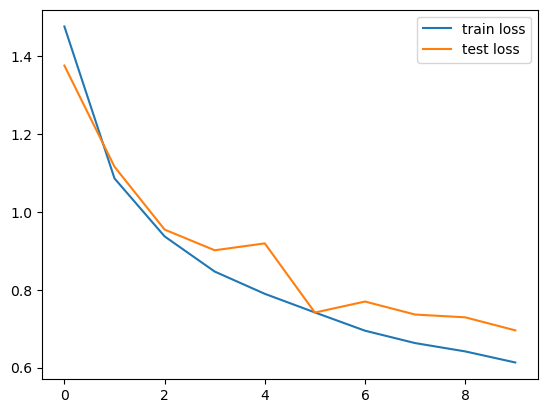

In [44]:
#plot the train loss and test loss per iteration
plt.plot(train_losses , label = 'train loss')
plt.plot(test_losses , label = 'test loss')
plt.legend()
plt.show()

In [46]:
#Find accuracy
model.eval()
n_correct = 0
n_total = 0
for inputs , targets in train_loader_fixed:
    #move data to cpu
    inputs, targets = inputs.to(device), targets.to(device)
    #forward pass 
    outputs = model(inputs)
    #get prediction
    _, predictions = torch.max(outputs, 1)
    #update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
train_acc = n_correct / n_total

n_correct = 0
n_total = 0
for inputs, targets in test_loader:
    #move data to cpu
    inputs, targets = inputs.to(device) , targets.to(device)
    #forward pass
    outputs = model(inputs)
    #get prediction
    _, predictions = torch.max(outputs, 1)
    #update counts
    n_correct += (predictions == targets).sum().item()
    n_total = targets.shape[0]
test_acc = n_correct / n_total
print(f'Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')
    

Train Accuracy: 0.8084, Test Accuracy: 482.0625


In [51]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion Matrix',cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('normalized confusion matrix')
    else:
        print('Confusion matrix', 'without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                horizontalalignment = 'center',
                color = 'white' if cm[i,j]>thresh else 'black')

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
        

Confusion matrix without normalization
[[834  15  15   6  11   0   3  19  80  17]
 [ 23 895   2   5   1   1   1   1  26  45]
 [110   3 616  56  76  50  31  32  15  11]
 [ 33   4  37 546  67 182  28  49  34  20]
 [ 25   2  37  39 773  28  17  67  10   2]
 [ 14   3  32 121  27 718   9  58  10   8]
 [ 15   8  46  65  86  27 724  13   7   9]
 [ 14   3  18  23  31  43   4 848   3  13]
 [ 52  15   3   8   2   1   3   2 903  11]
 [ 36  67   4   4   0   1   1   9  37 841]]


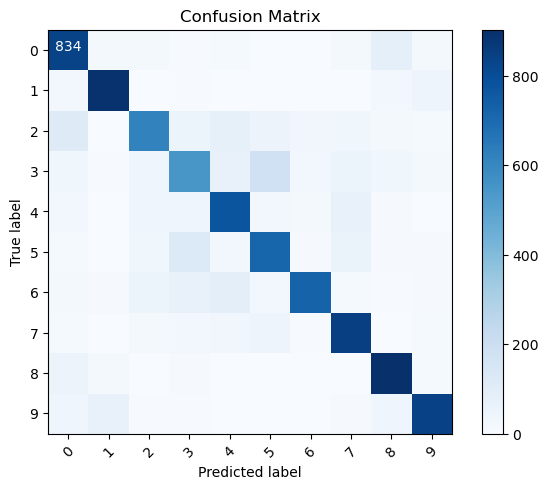

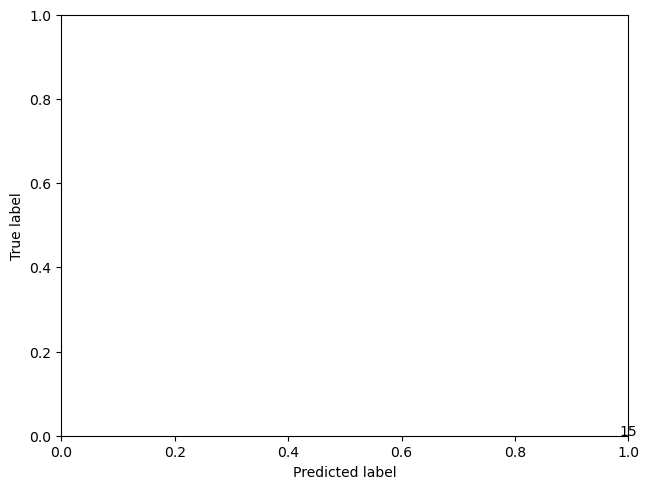

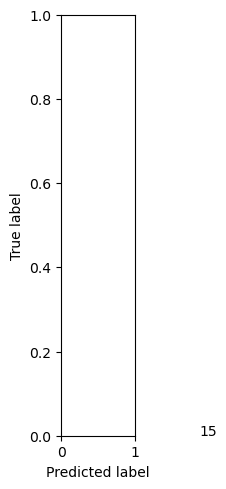

/var/folders/tr/96x2fhf966z17tmtzx0bls5h0000gn/T/ipykernel_4578/2370503515.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


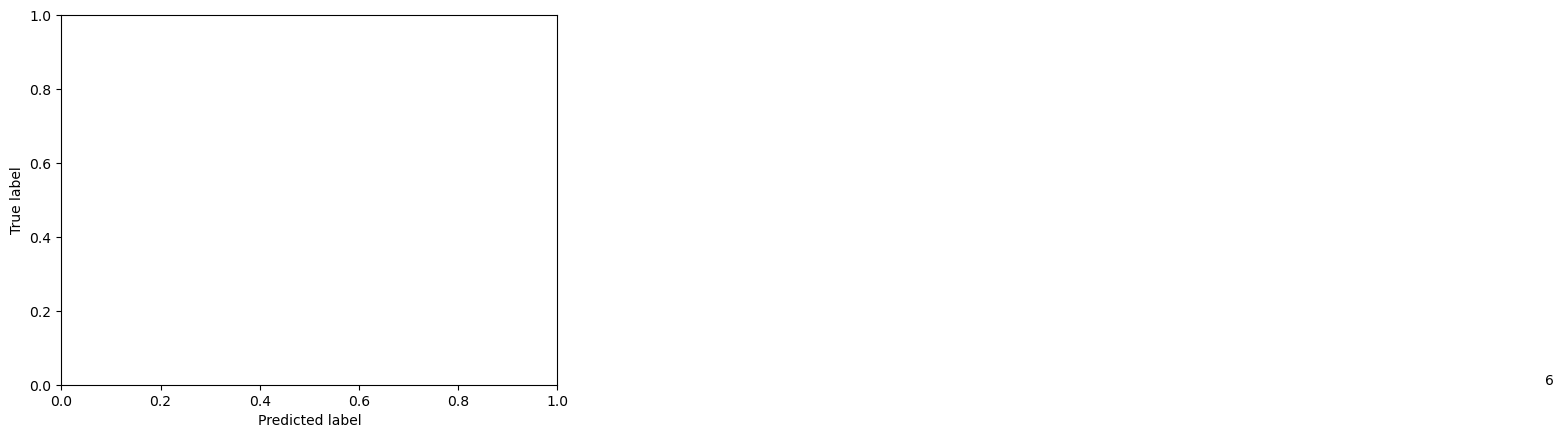

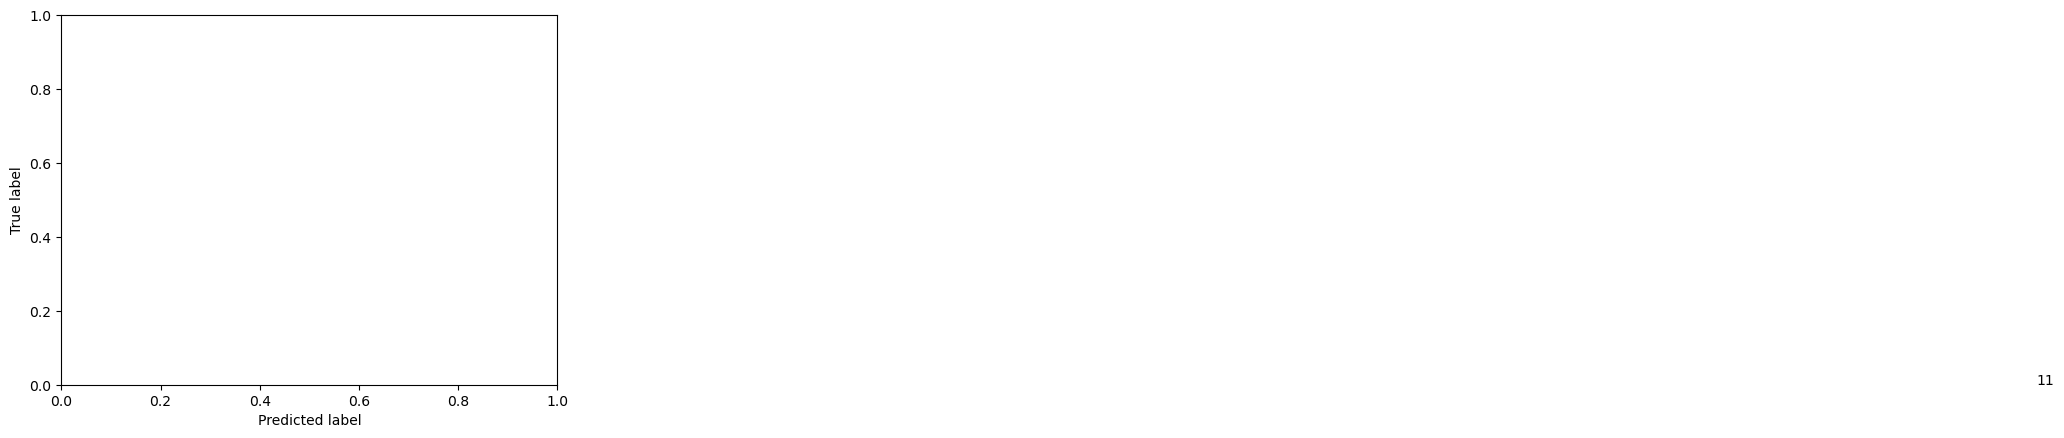

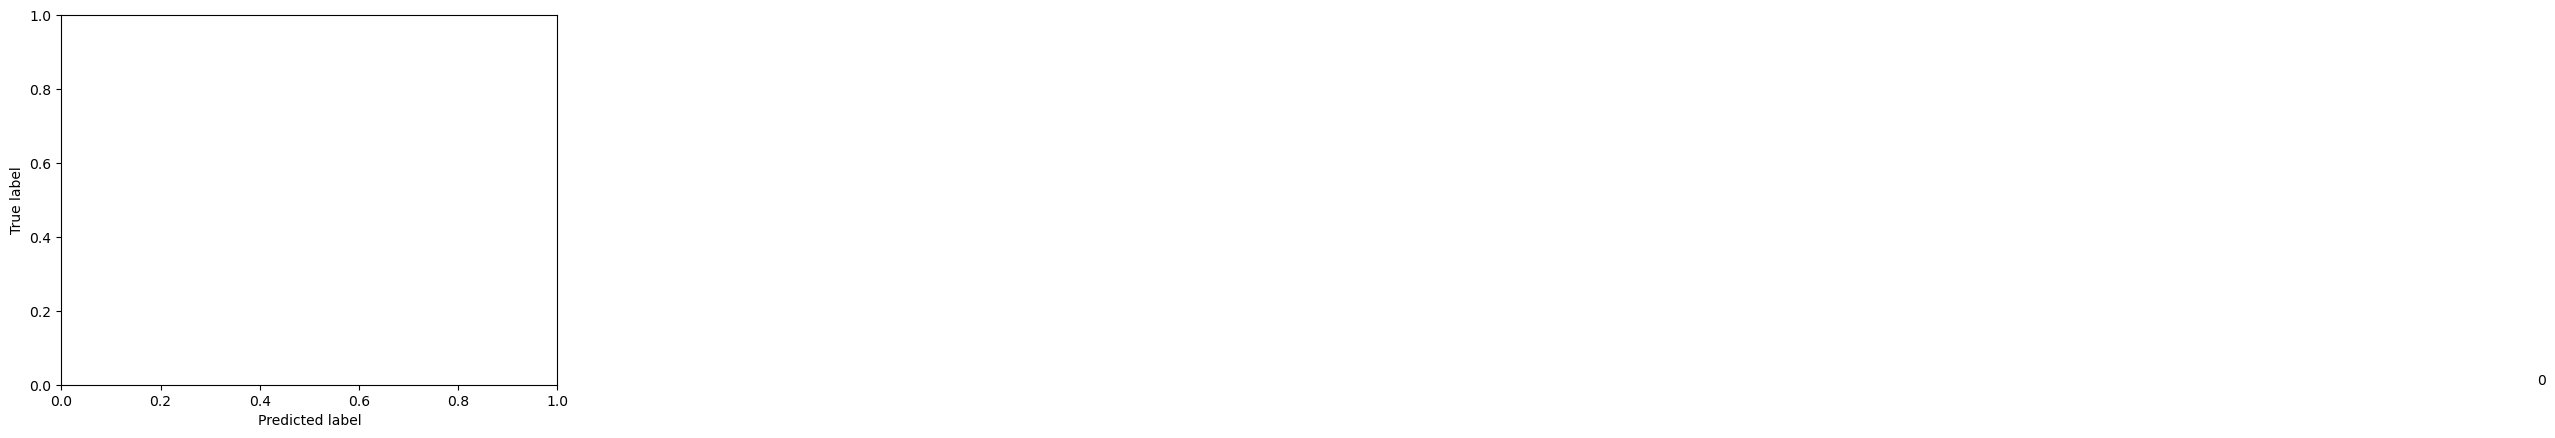

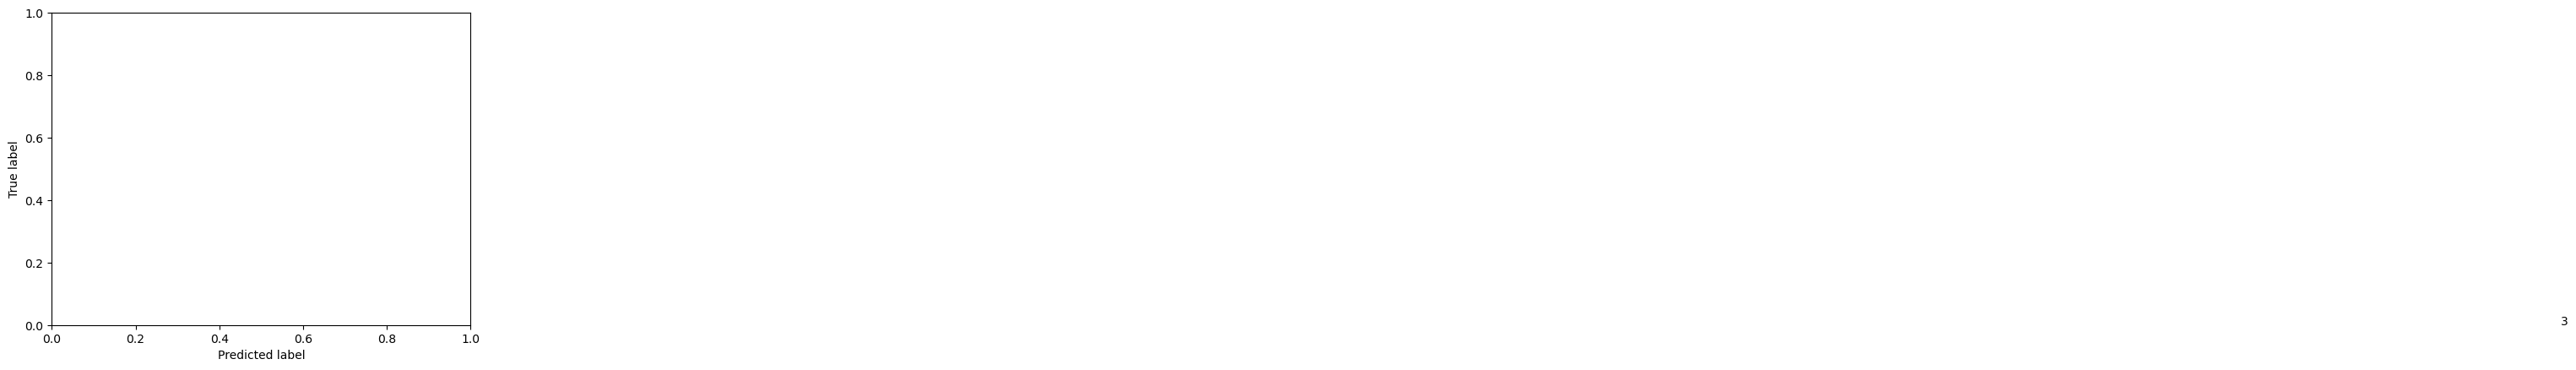

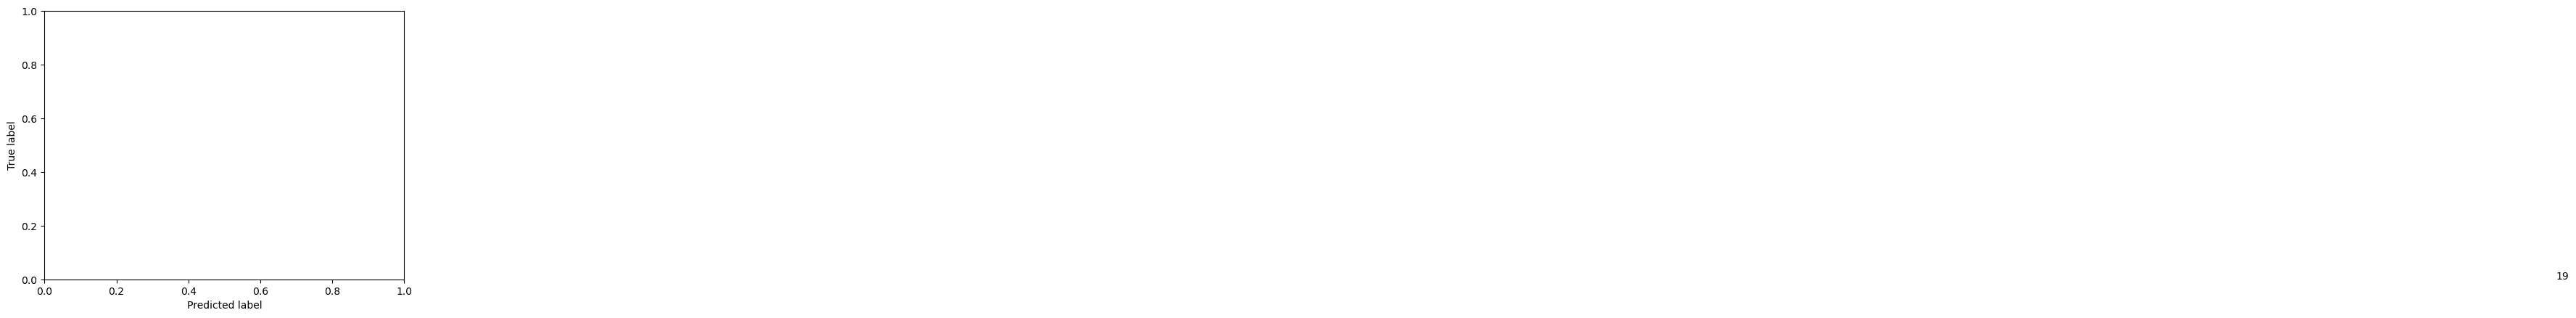

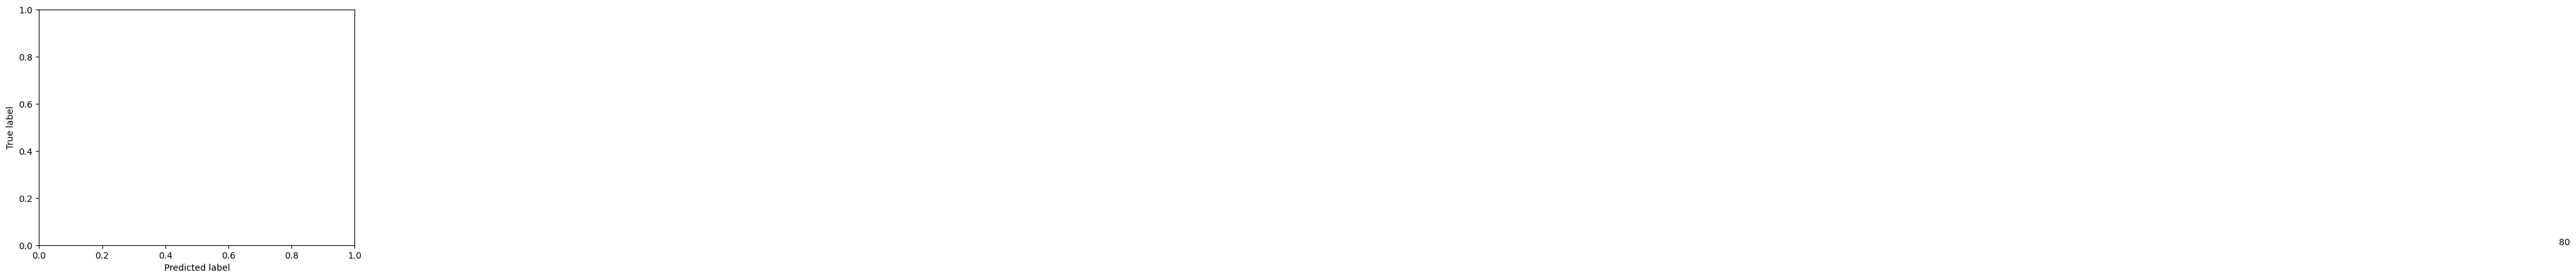

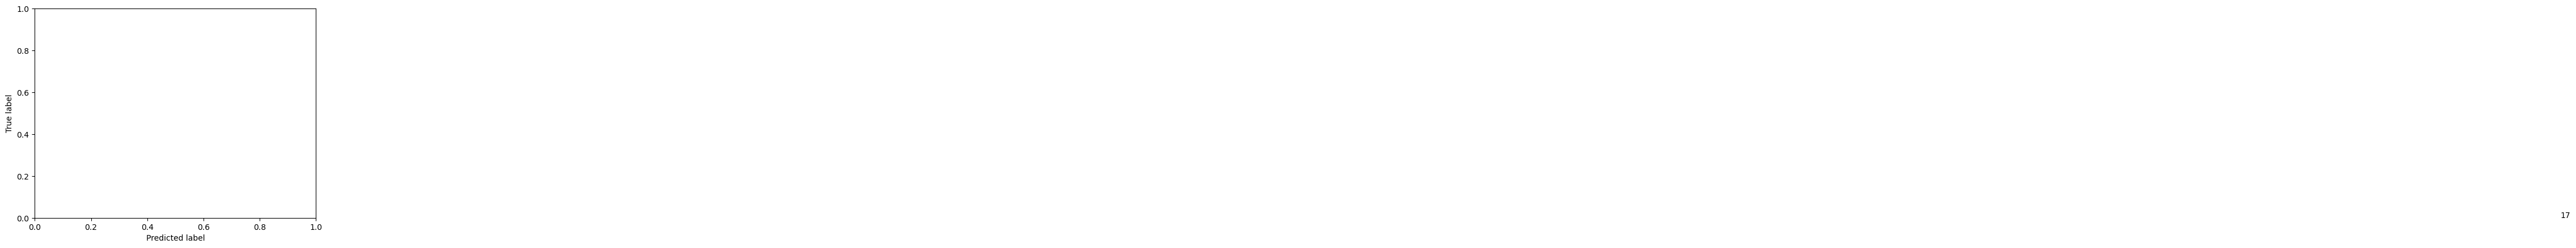

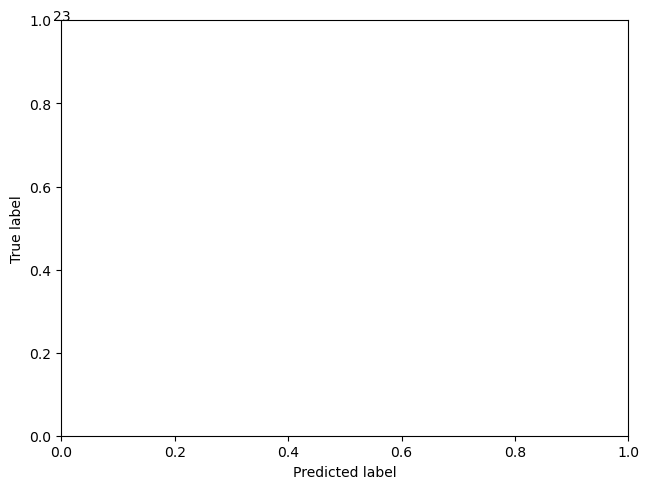

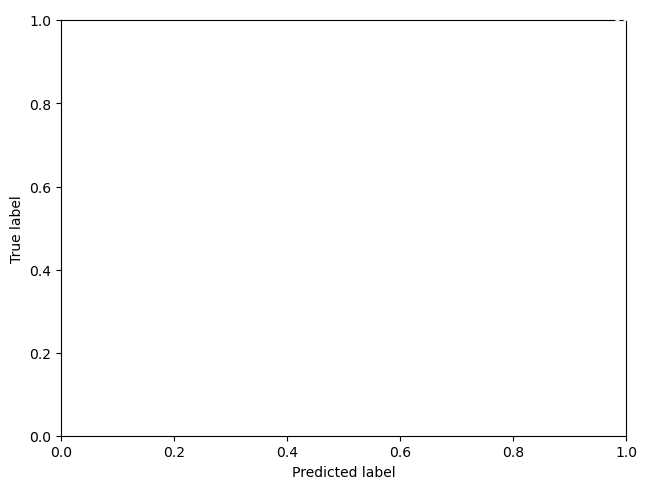

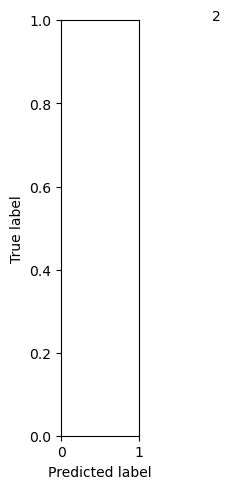

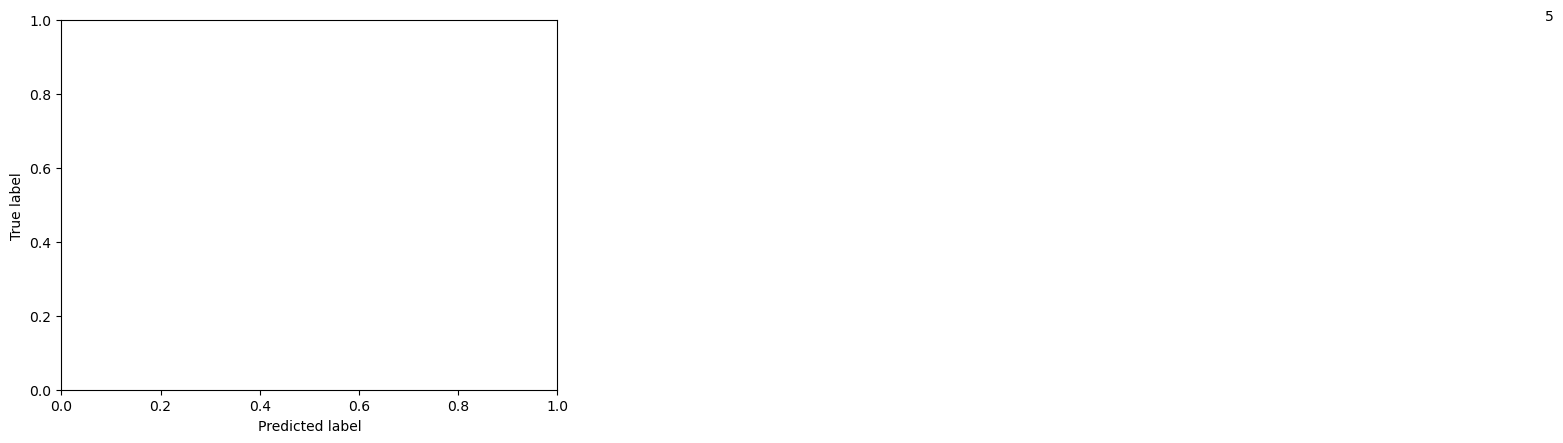

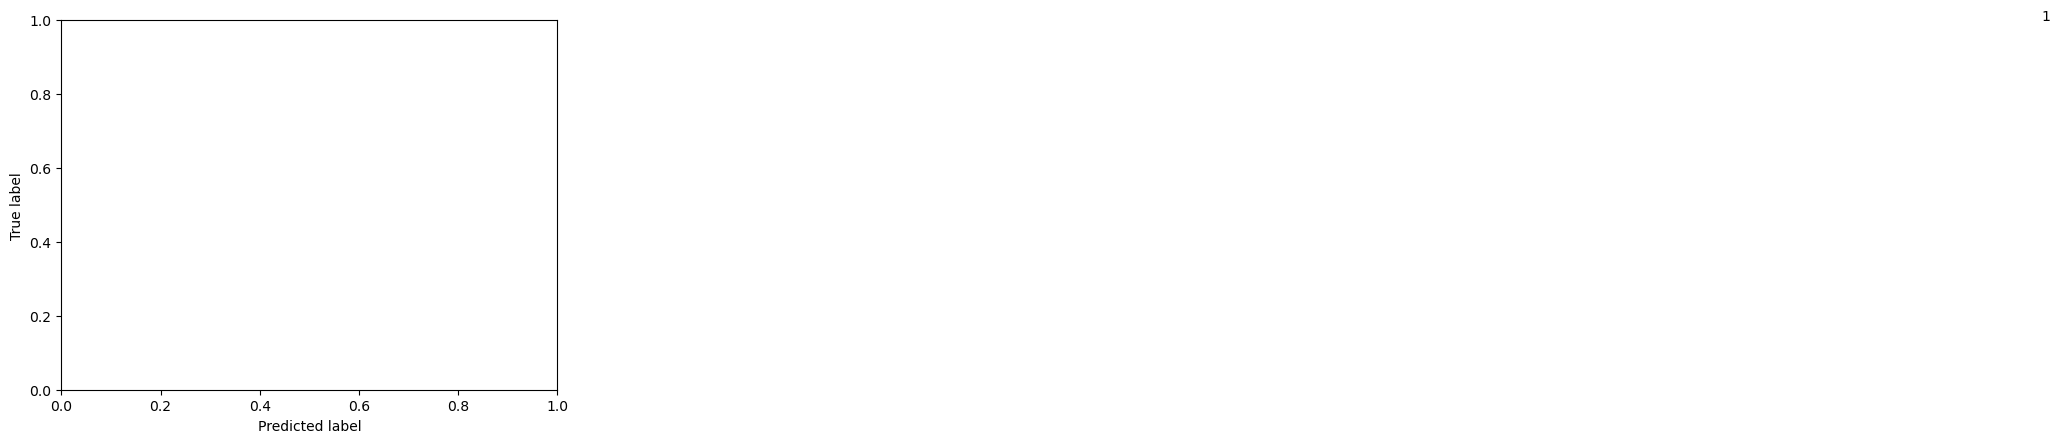

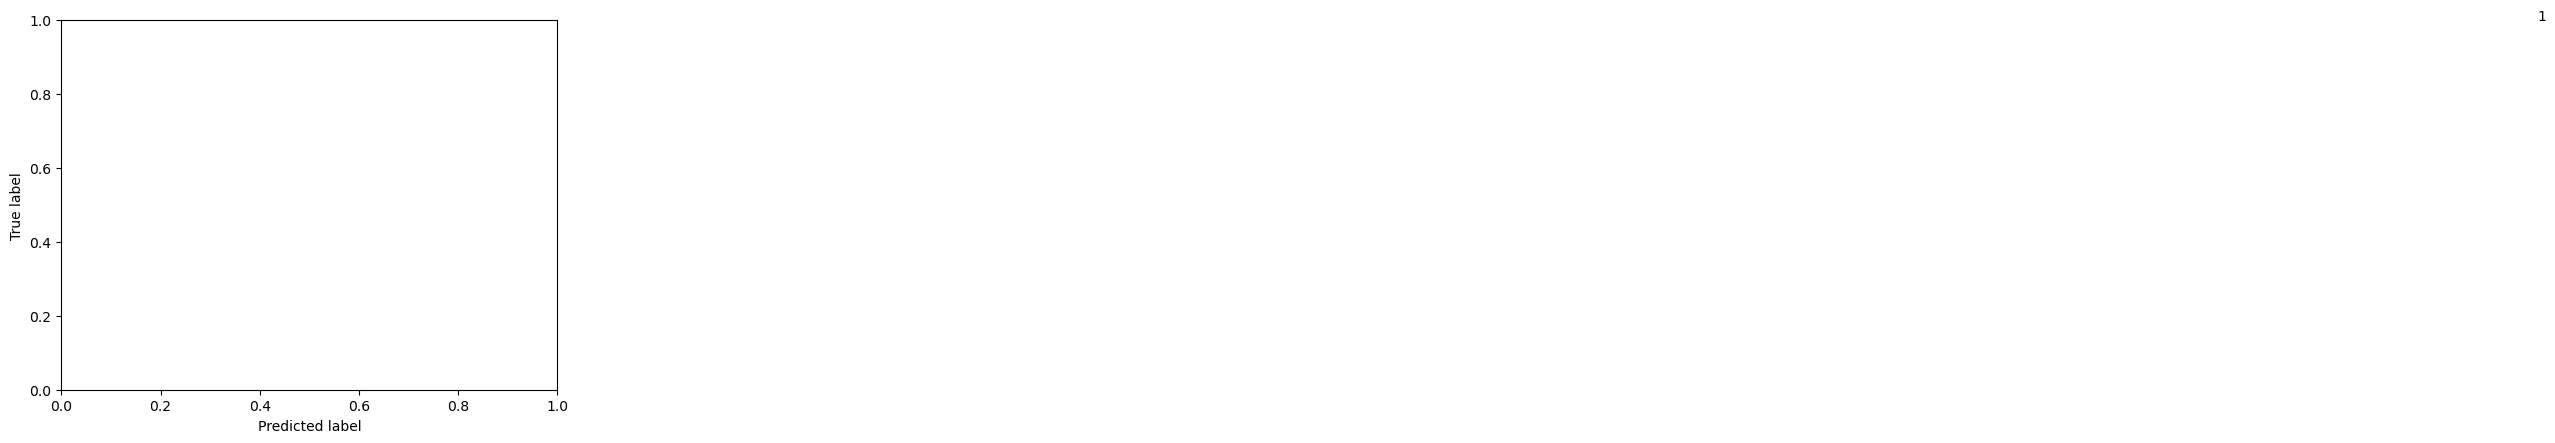

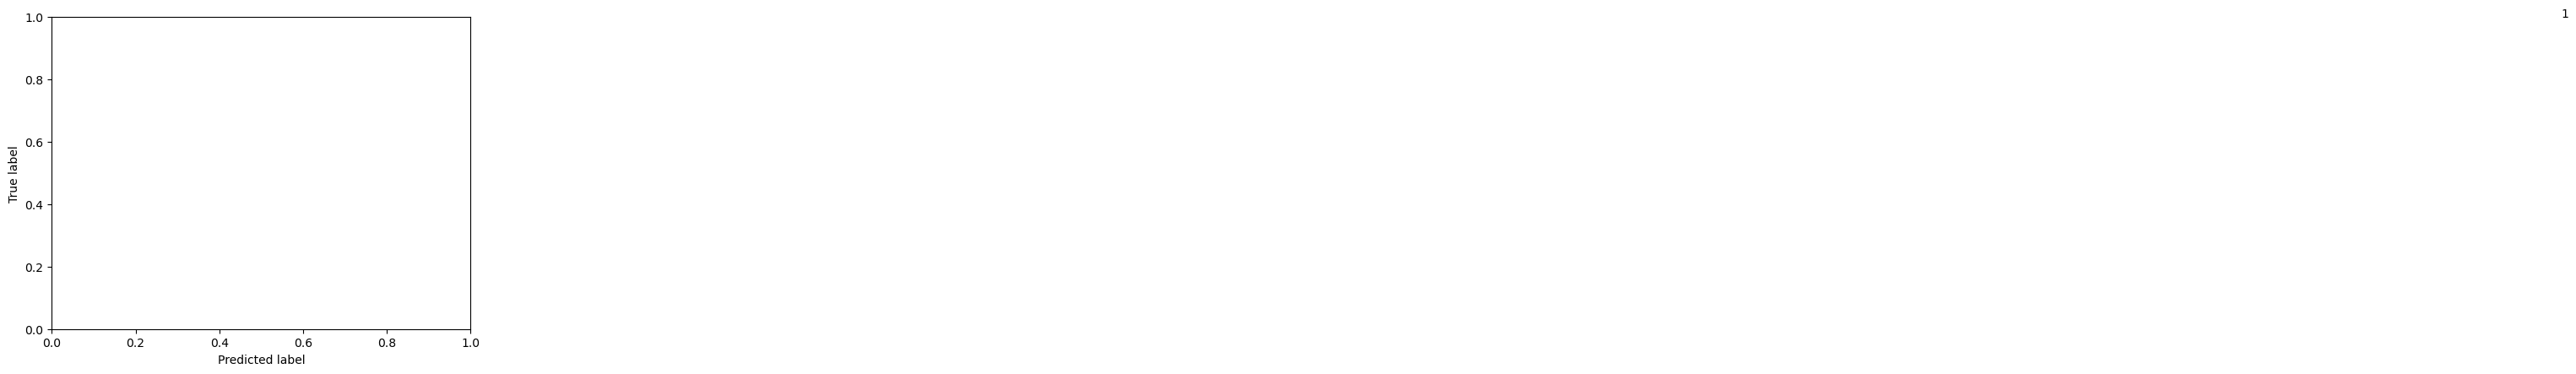

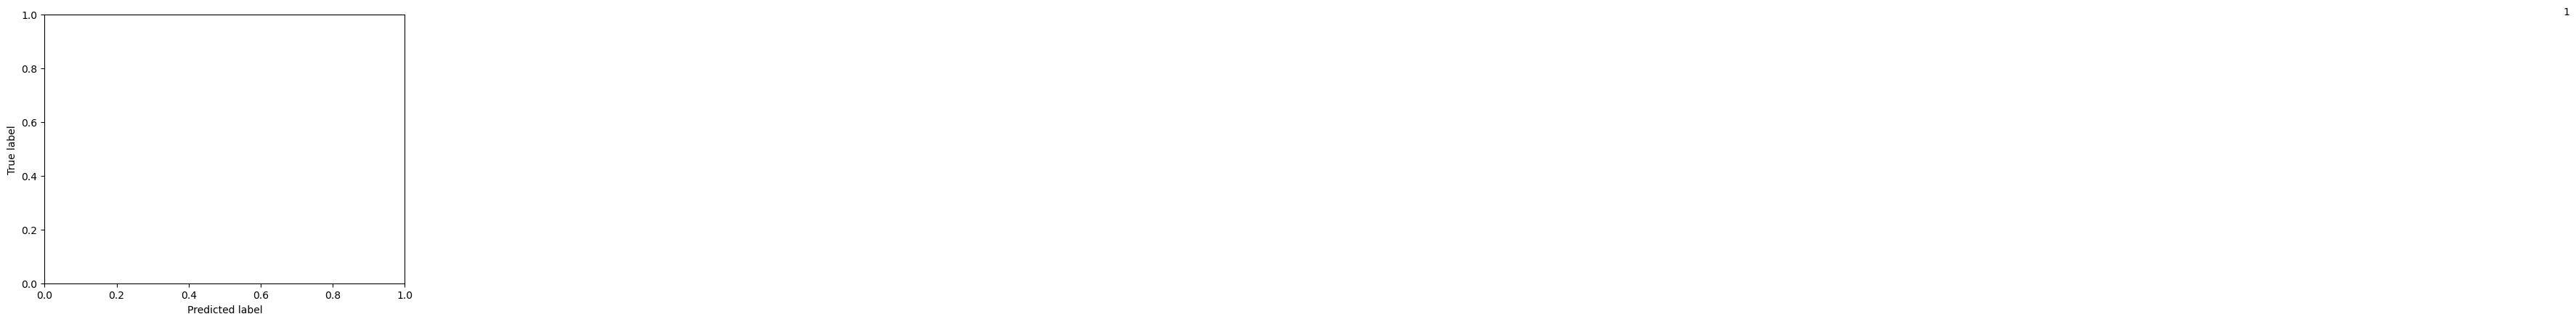

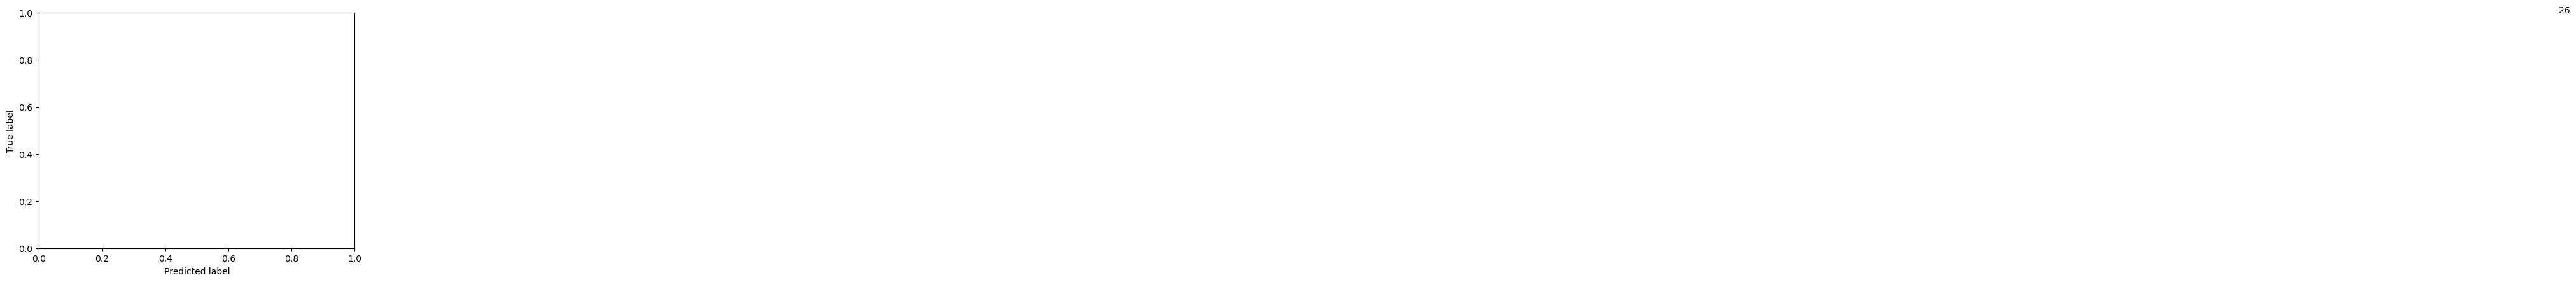

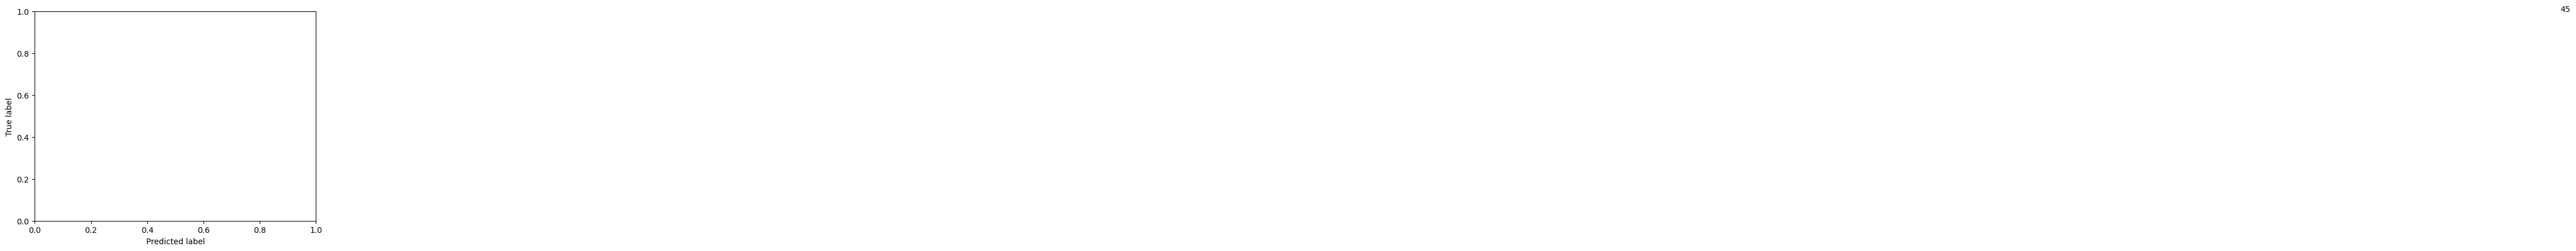

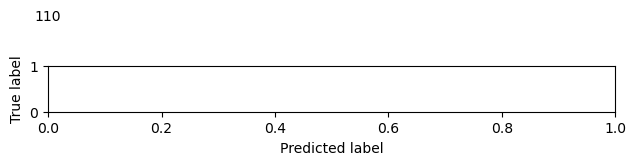

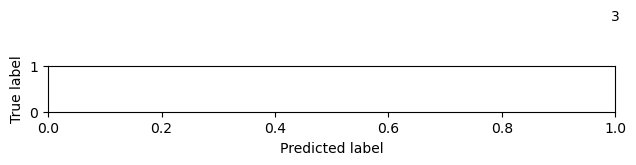

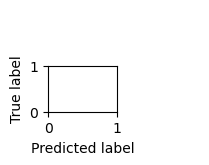

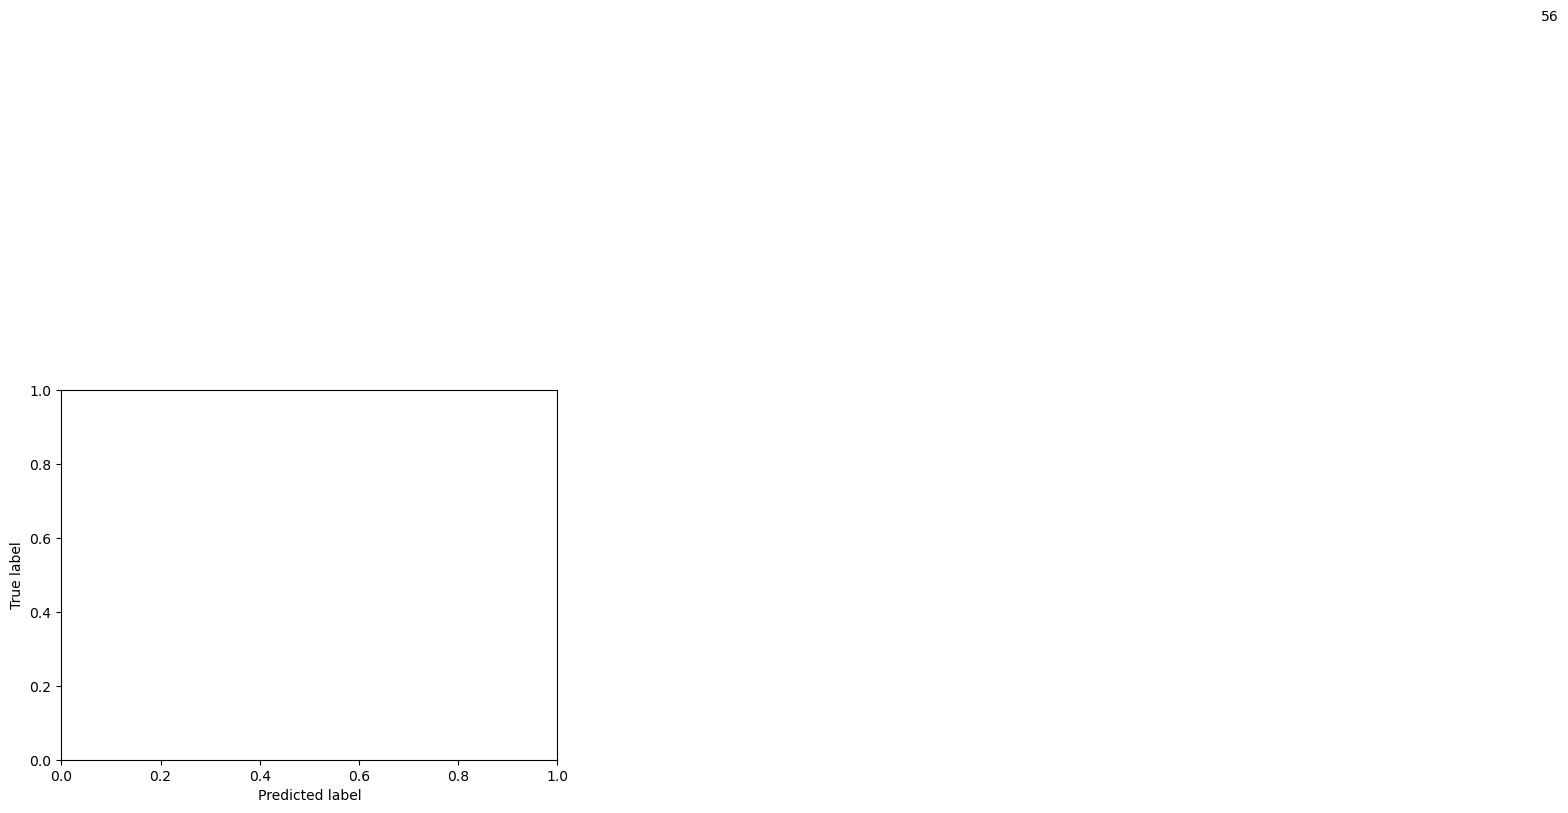

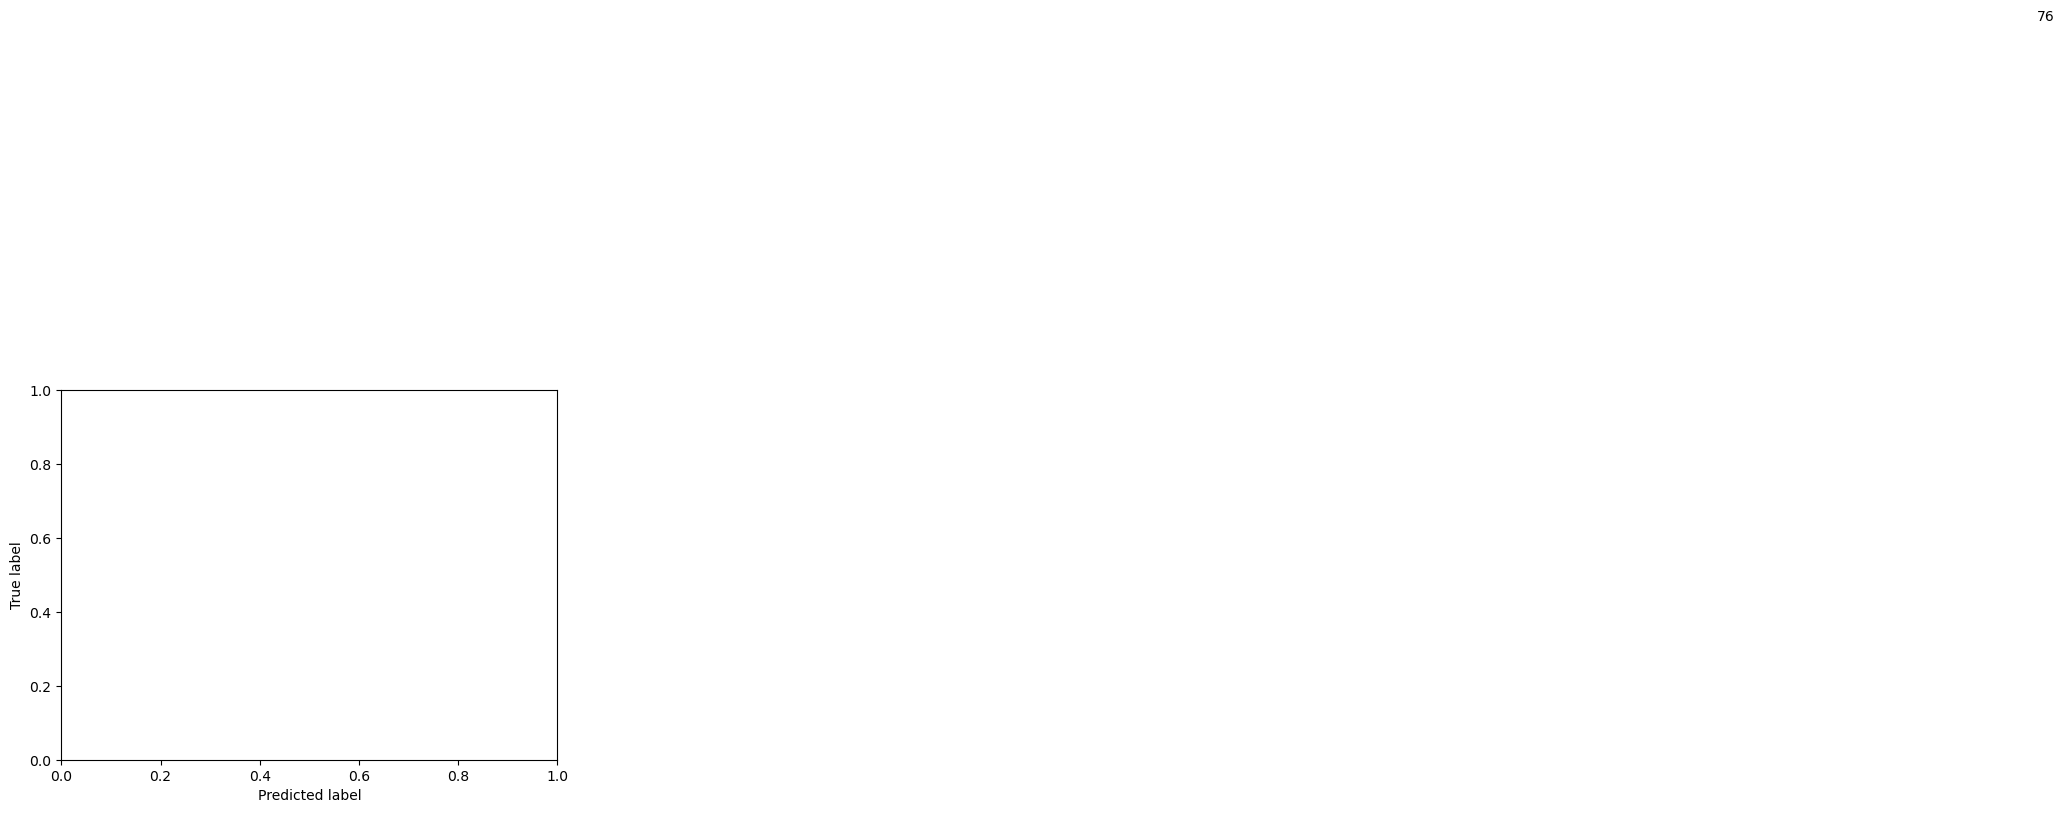

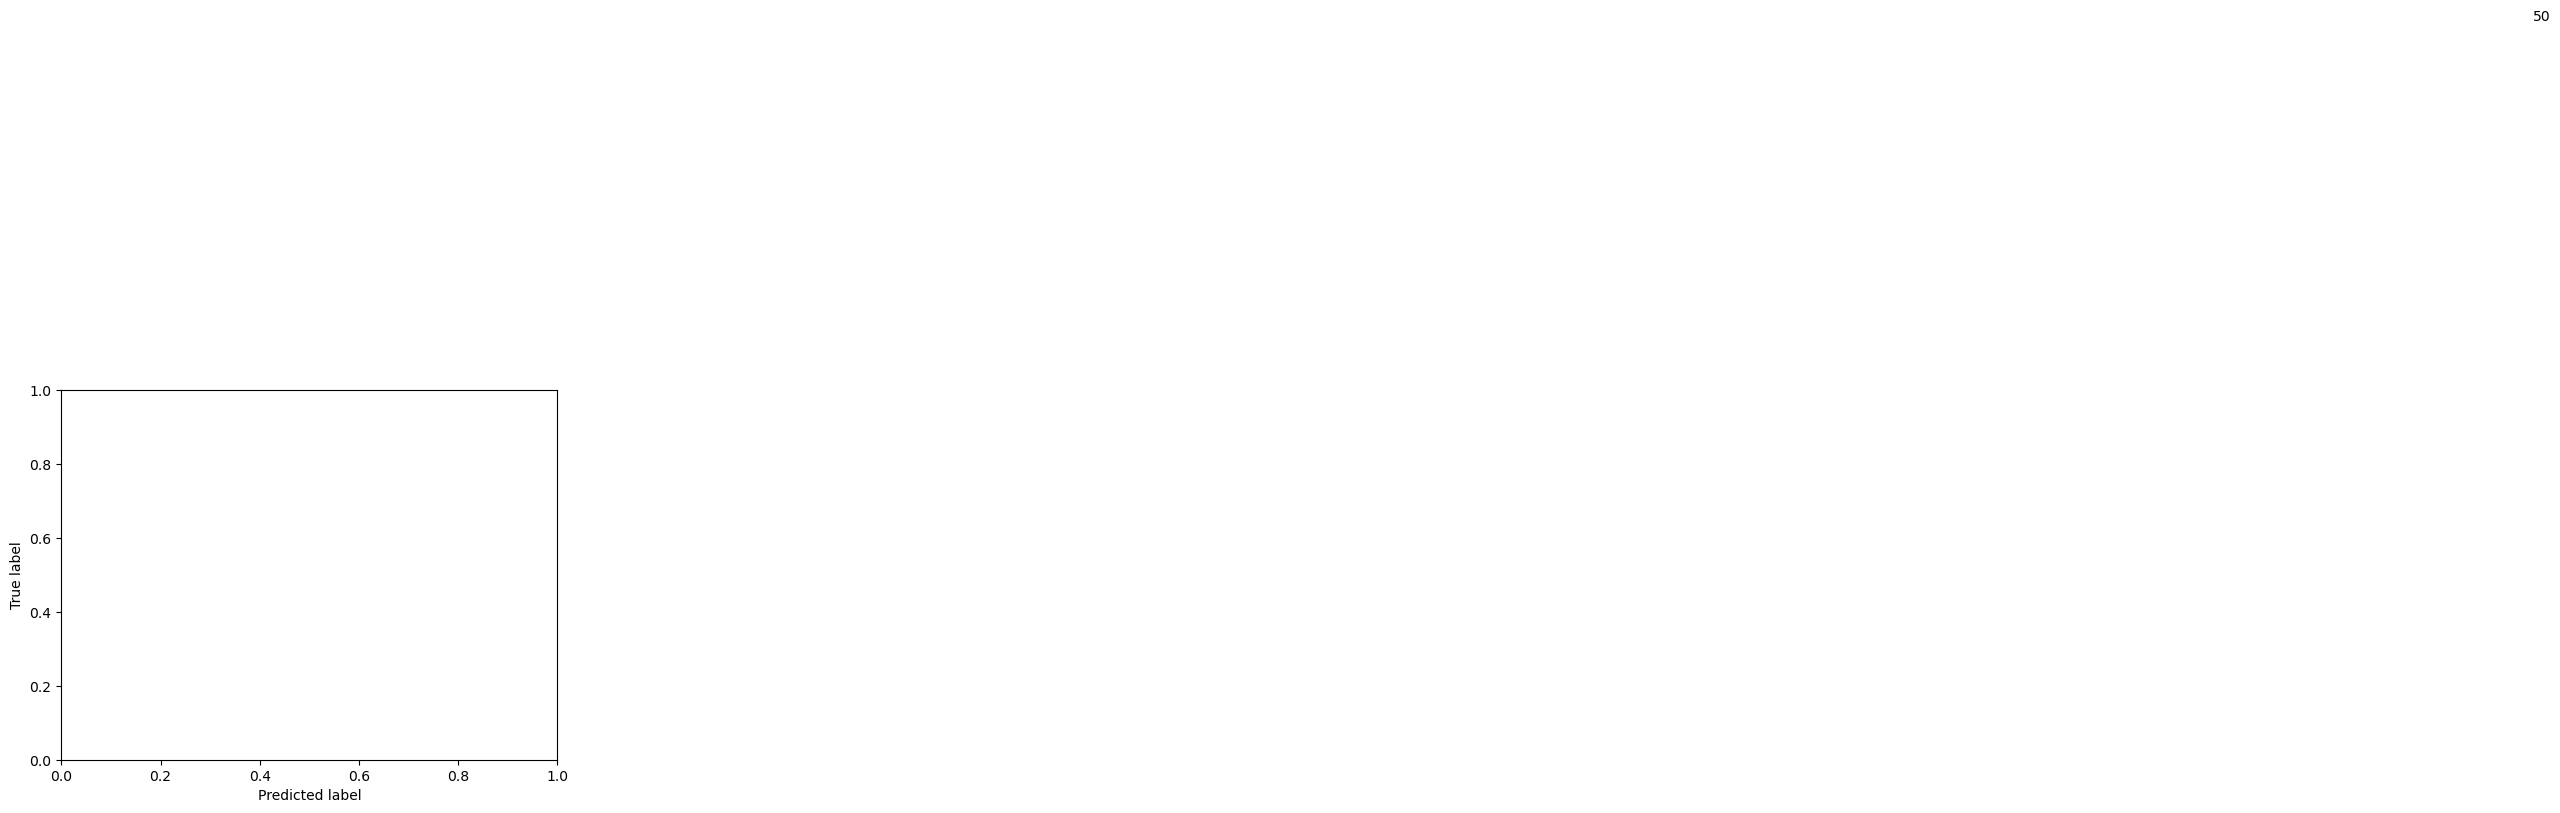

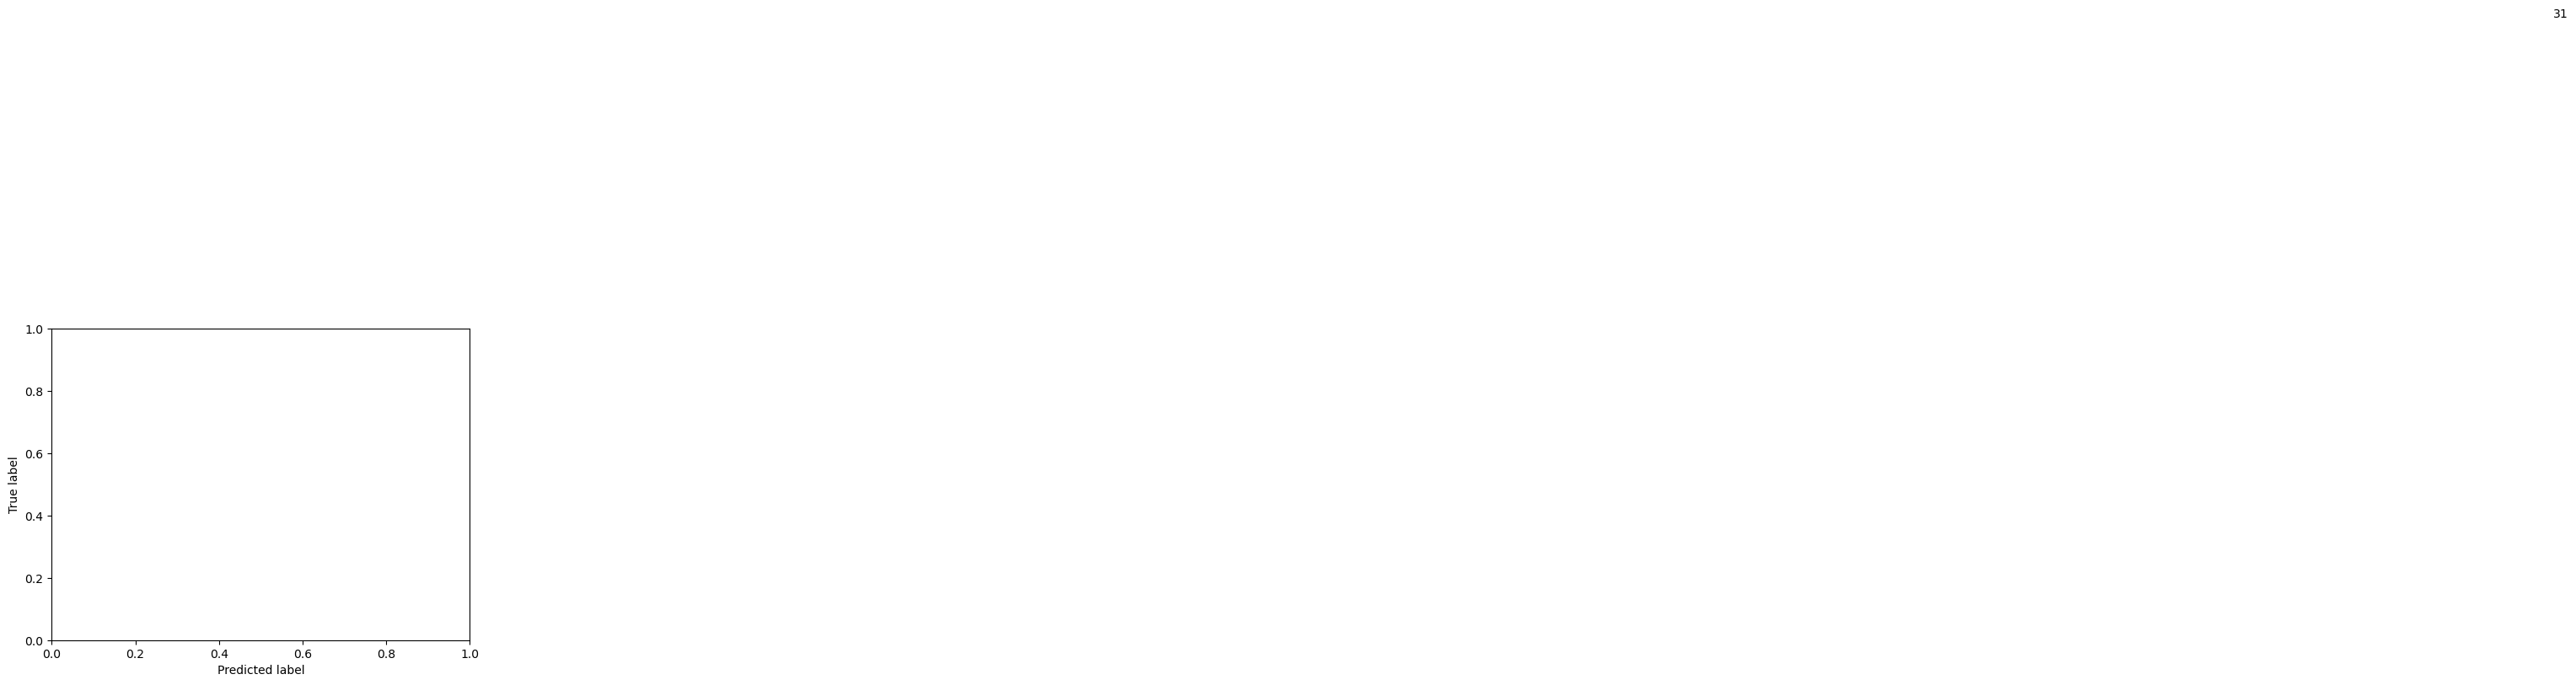

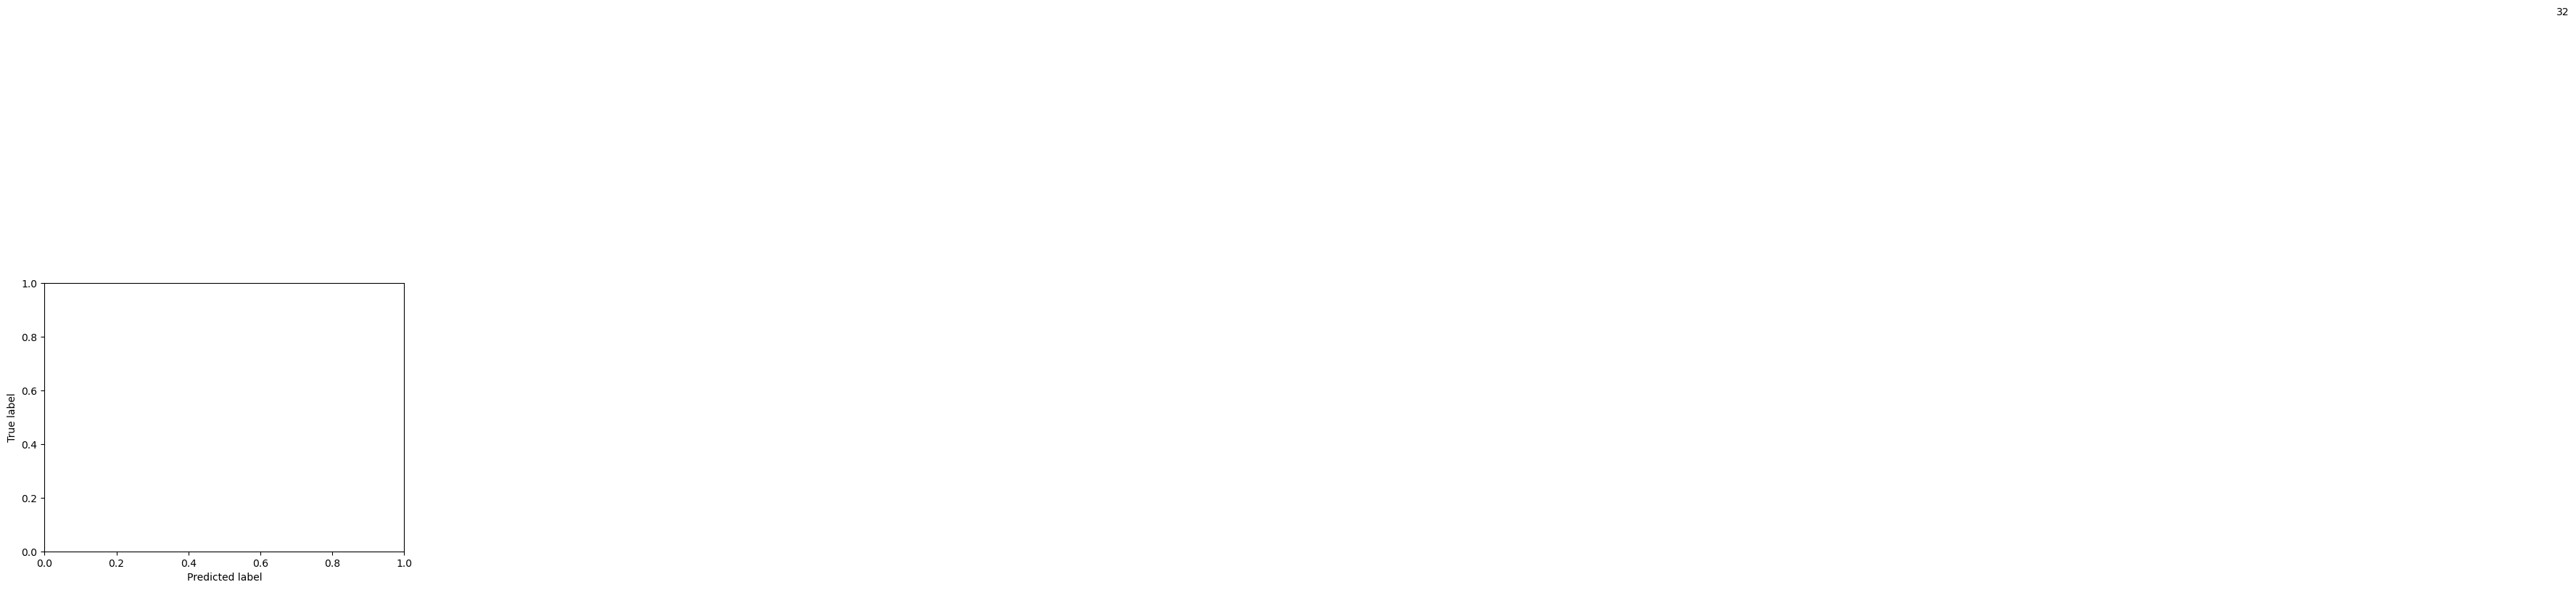

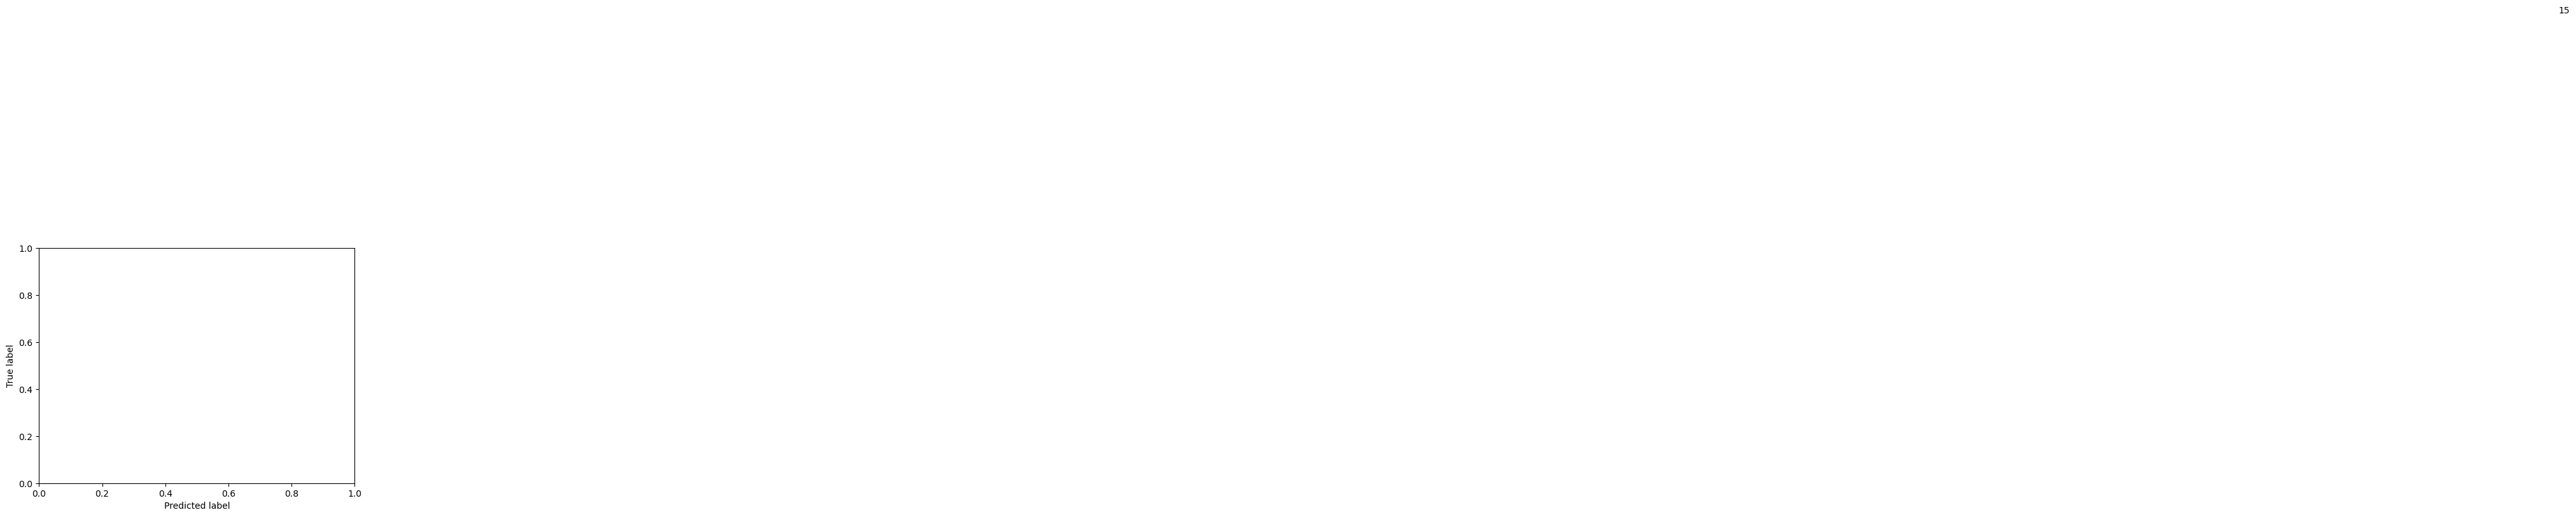

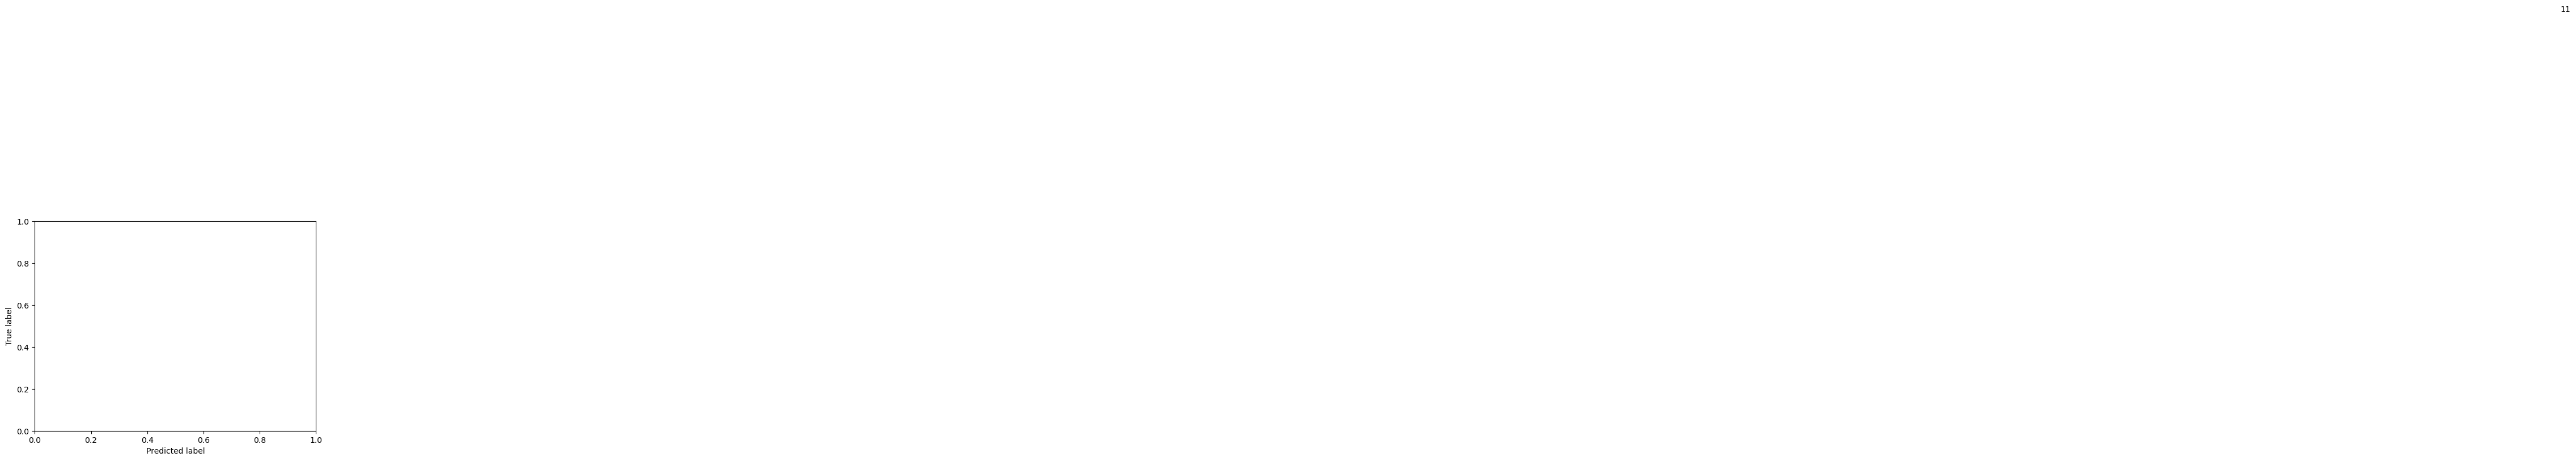

/var/folders/tr/96x2fhf966z17tmtzx0bls5h0000gn/T/ipykernel_4578/2370503515.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


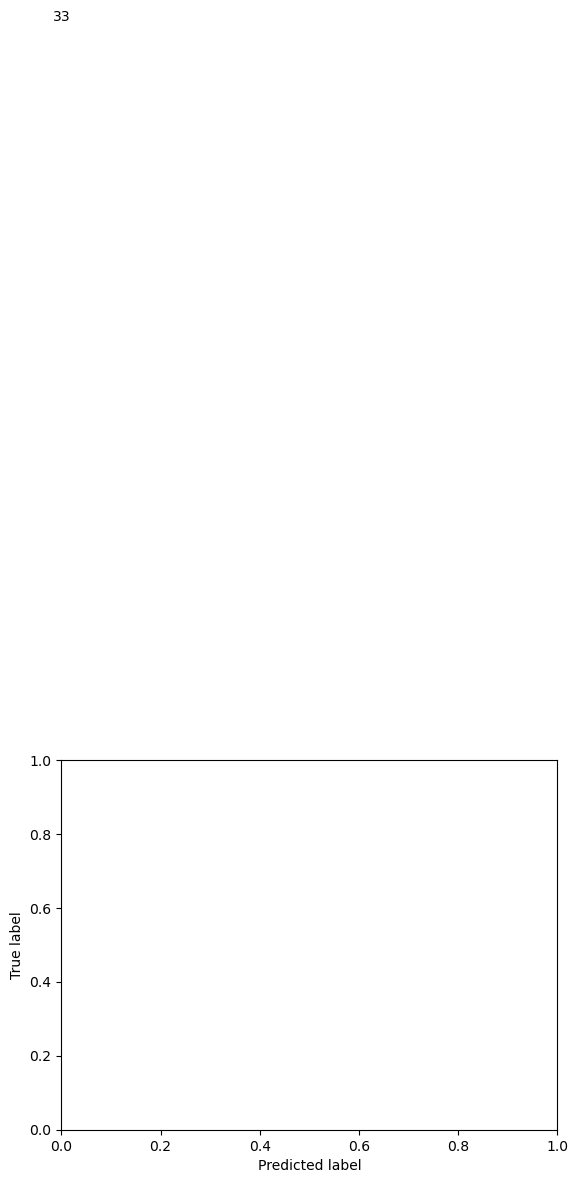

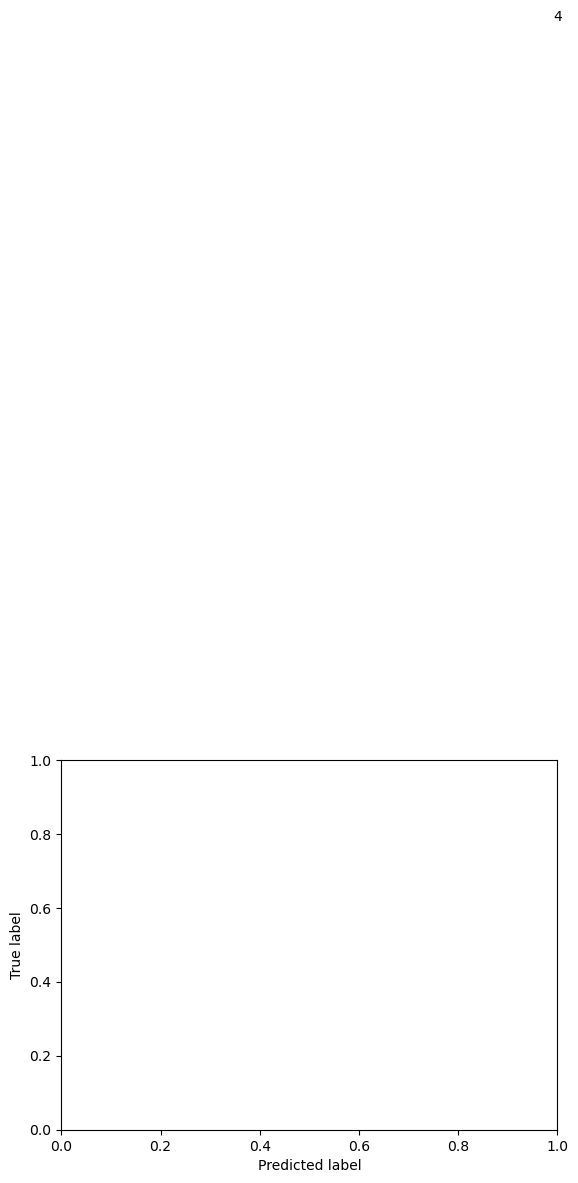

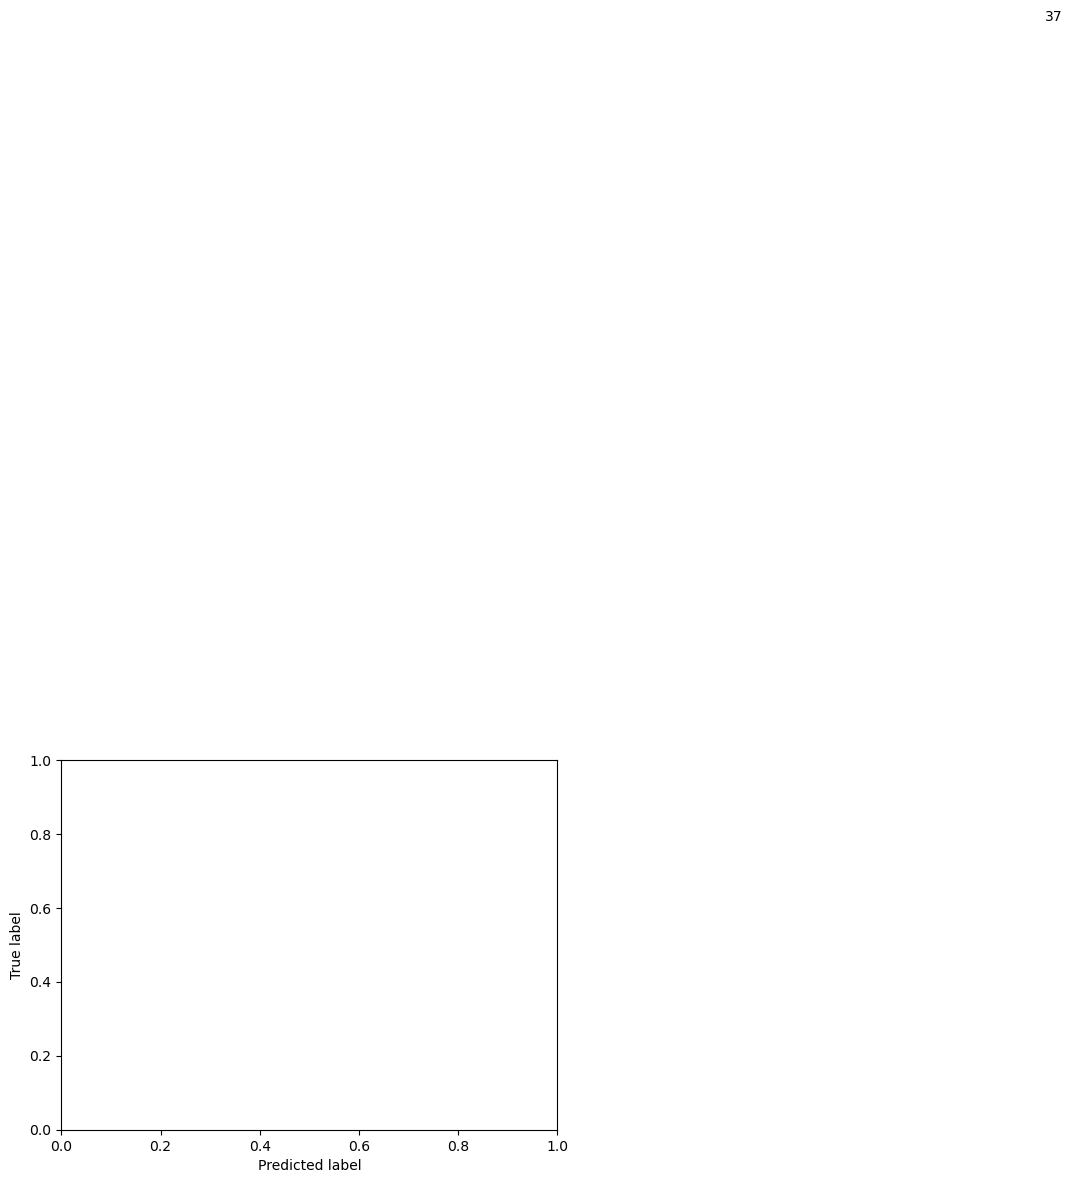

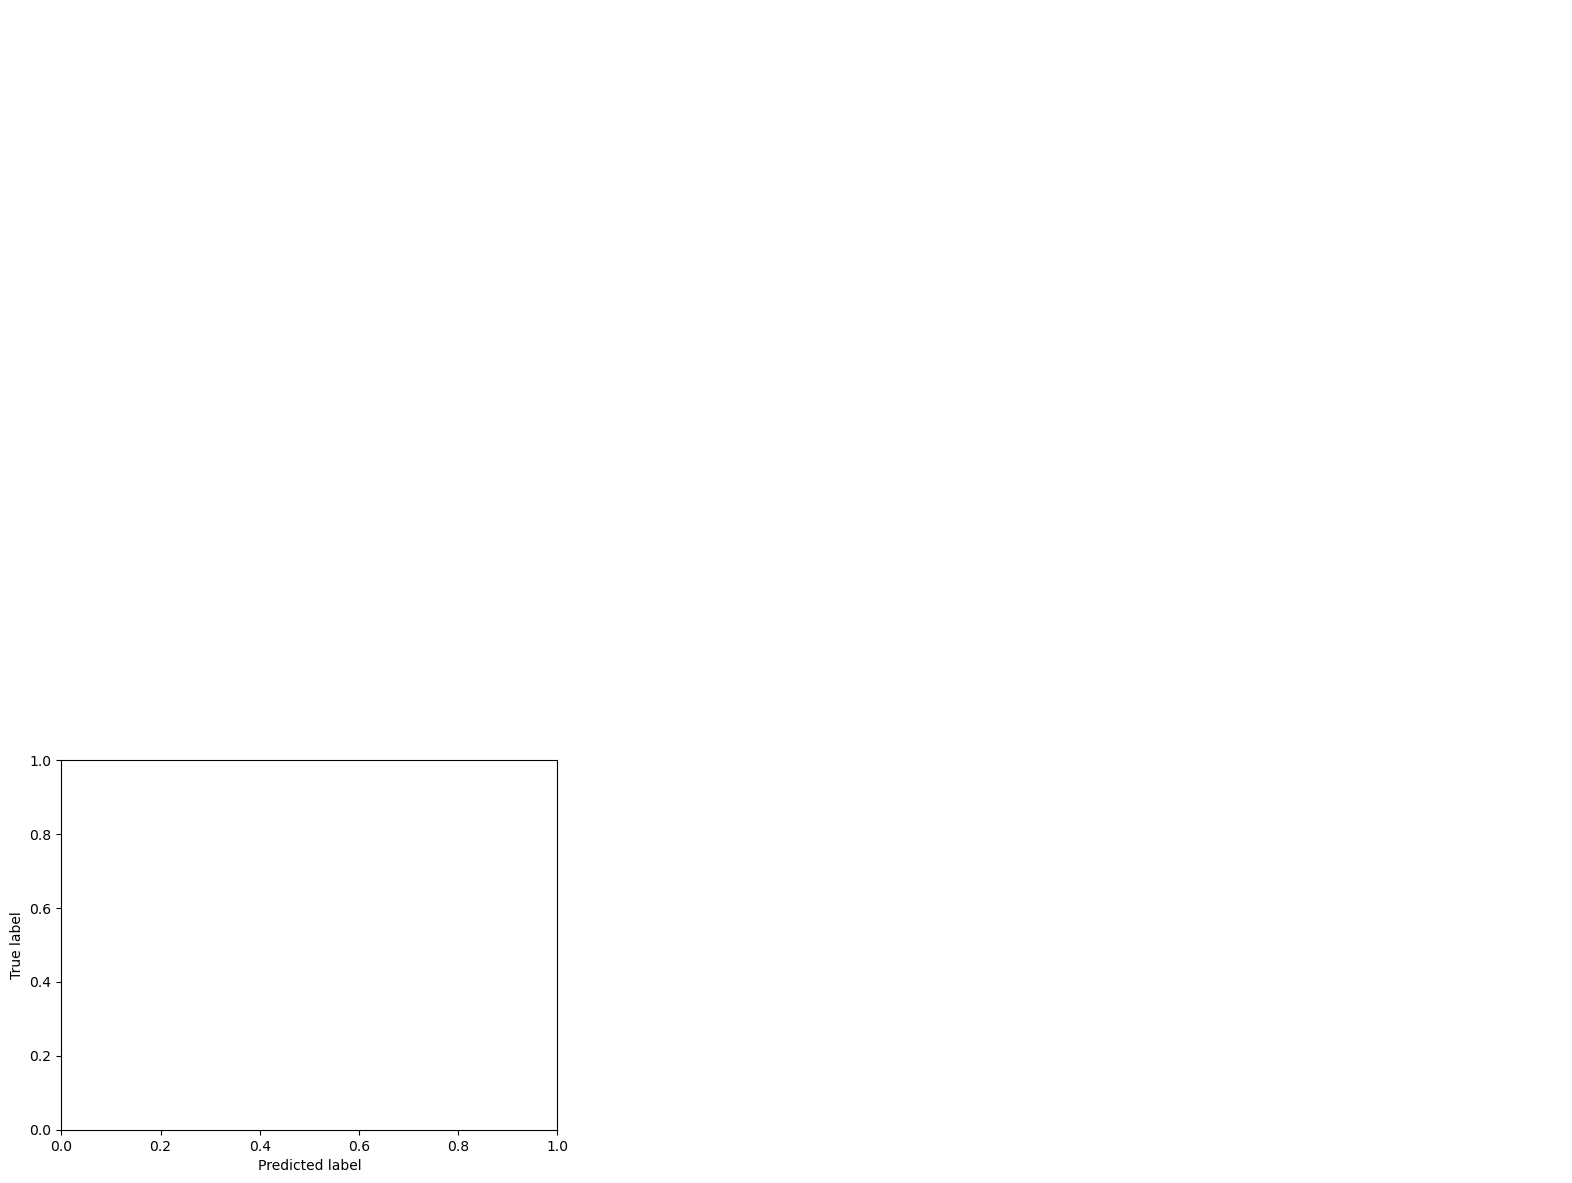

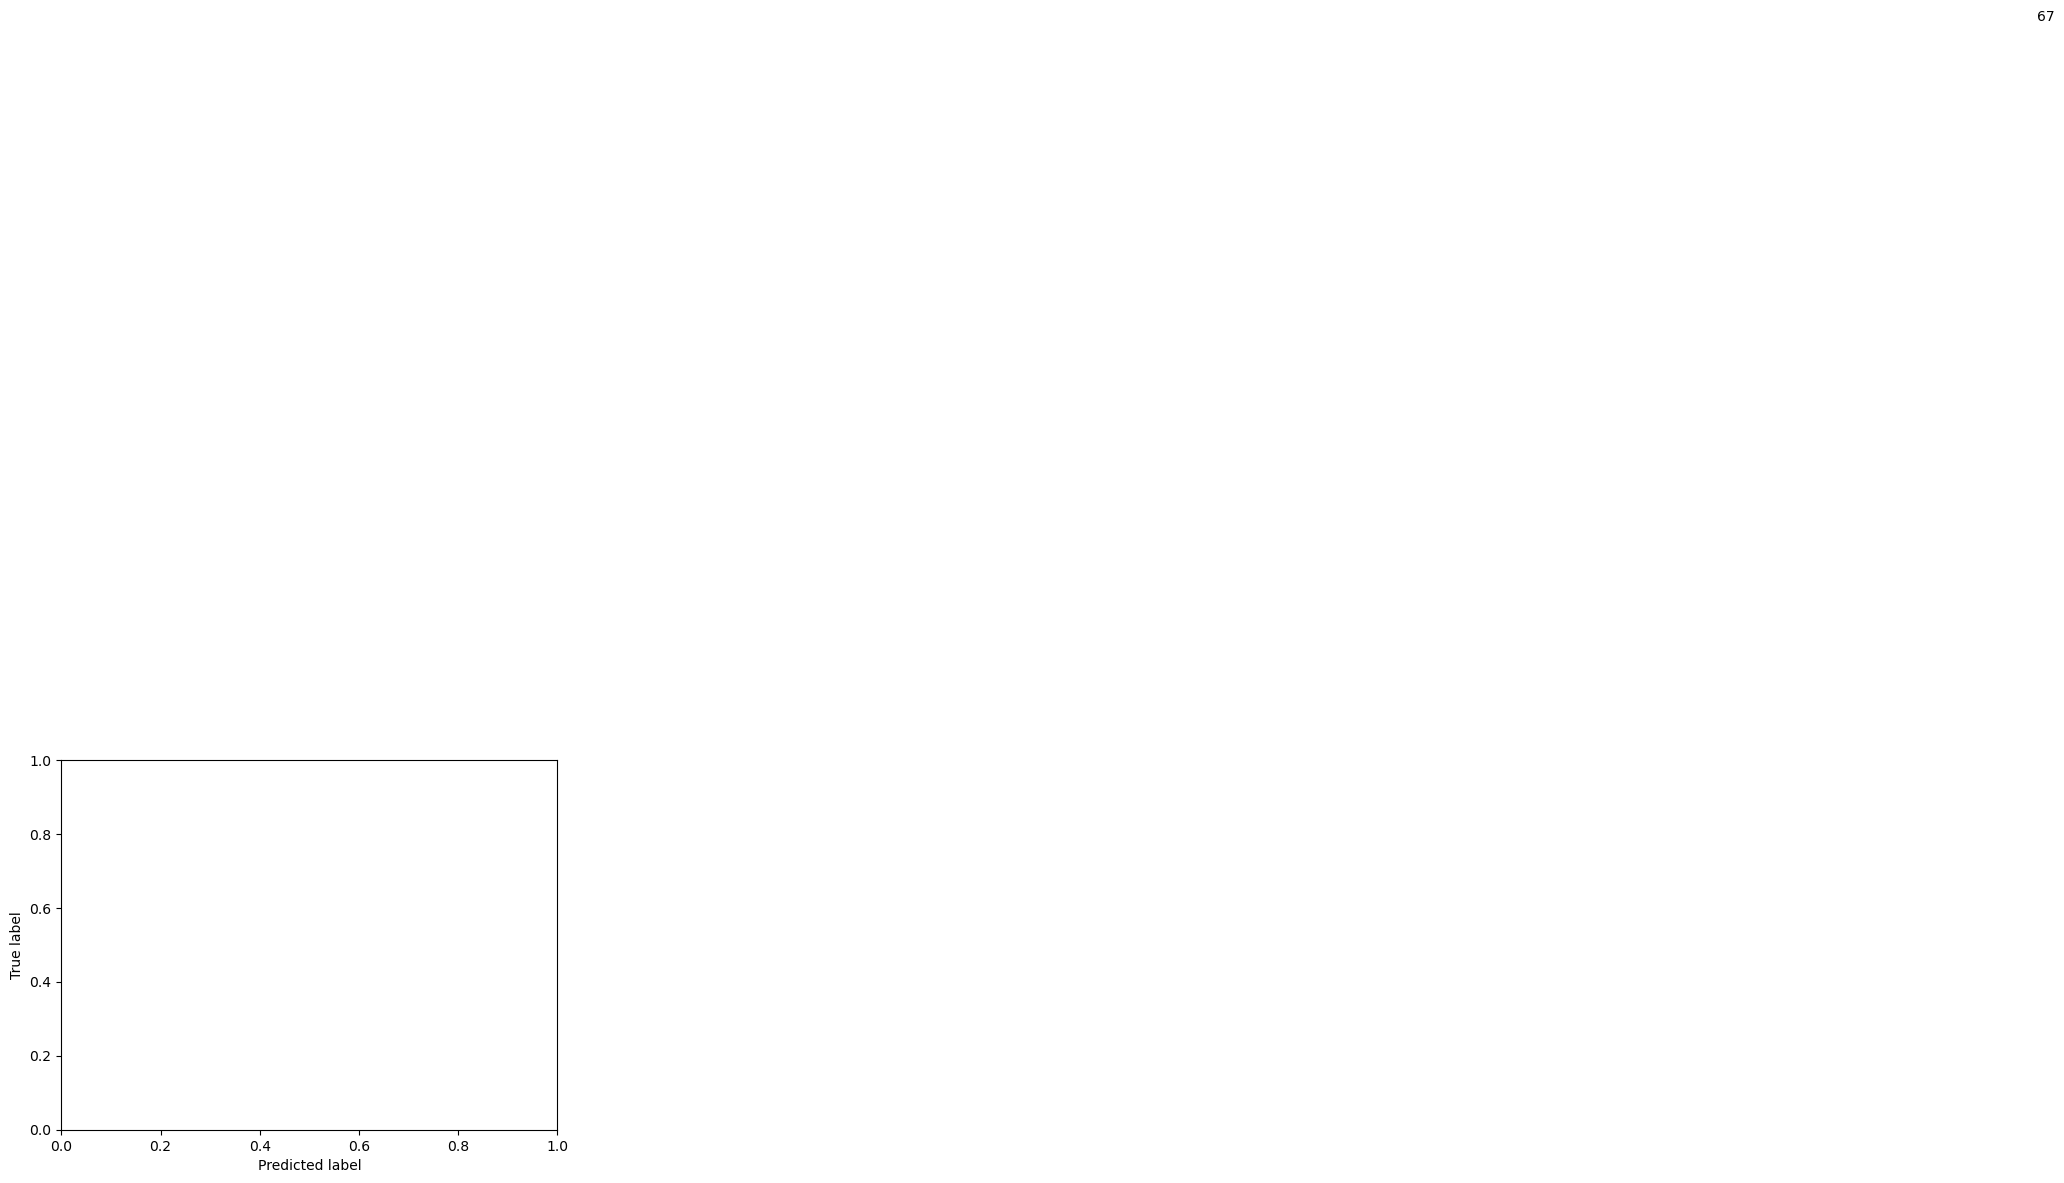

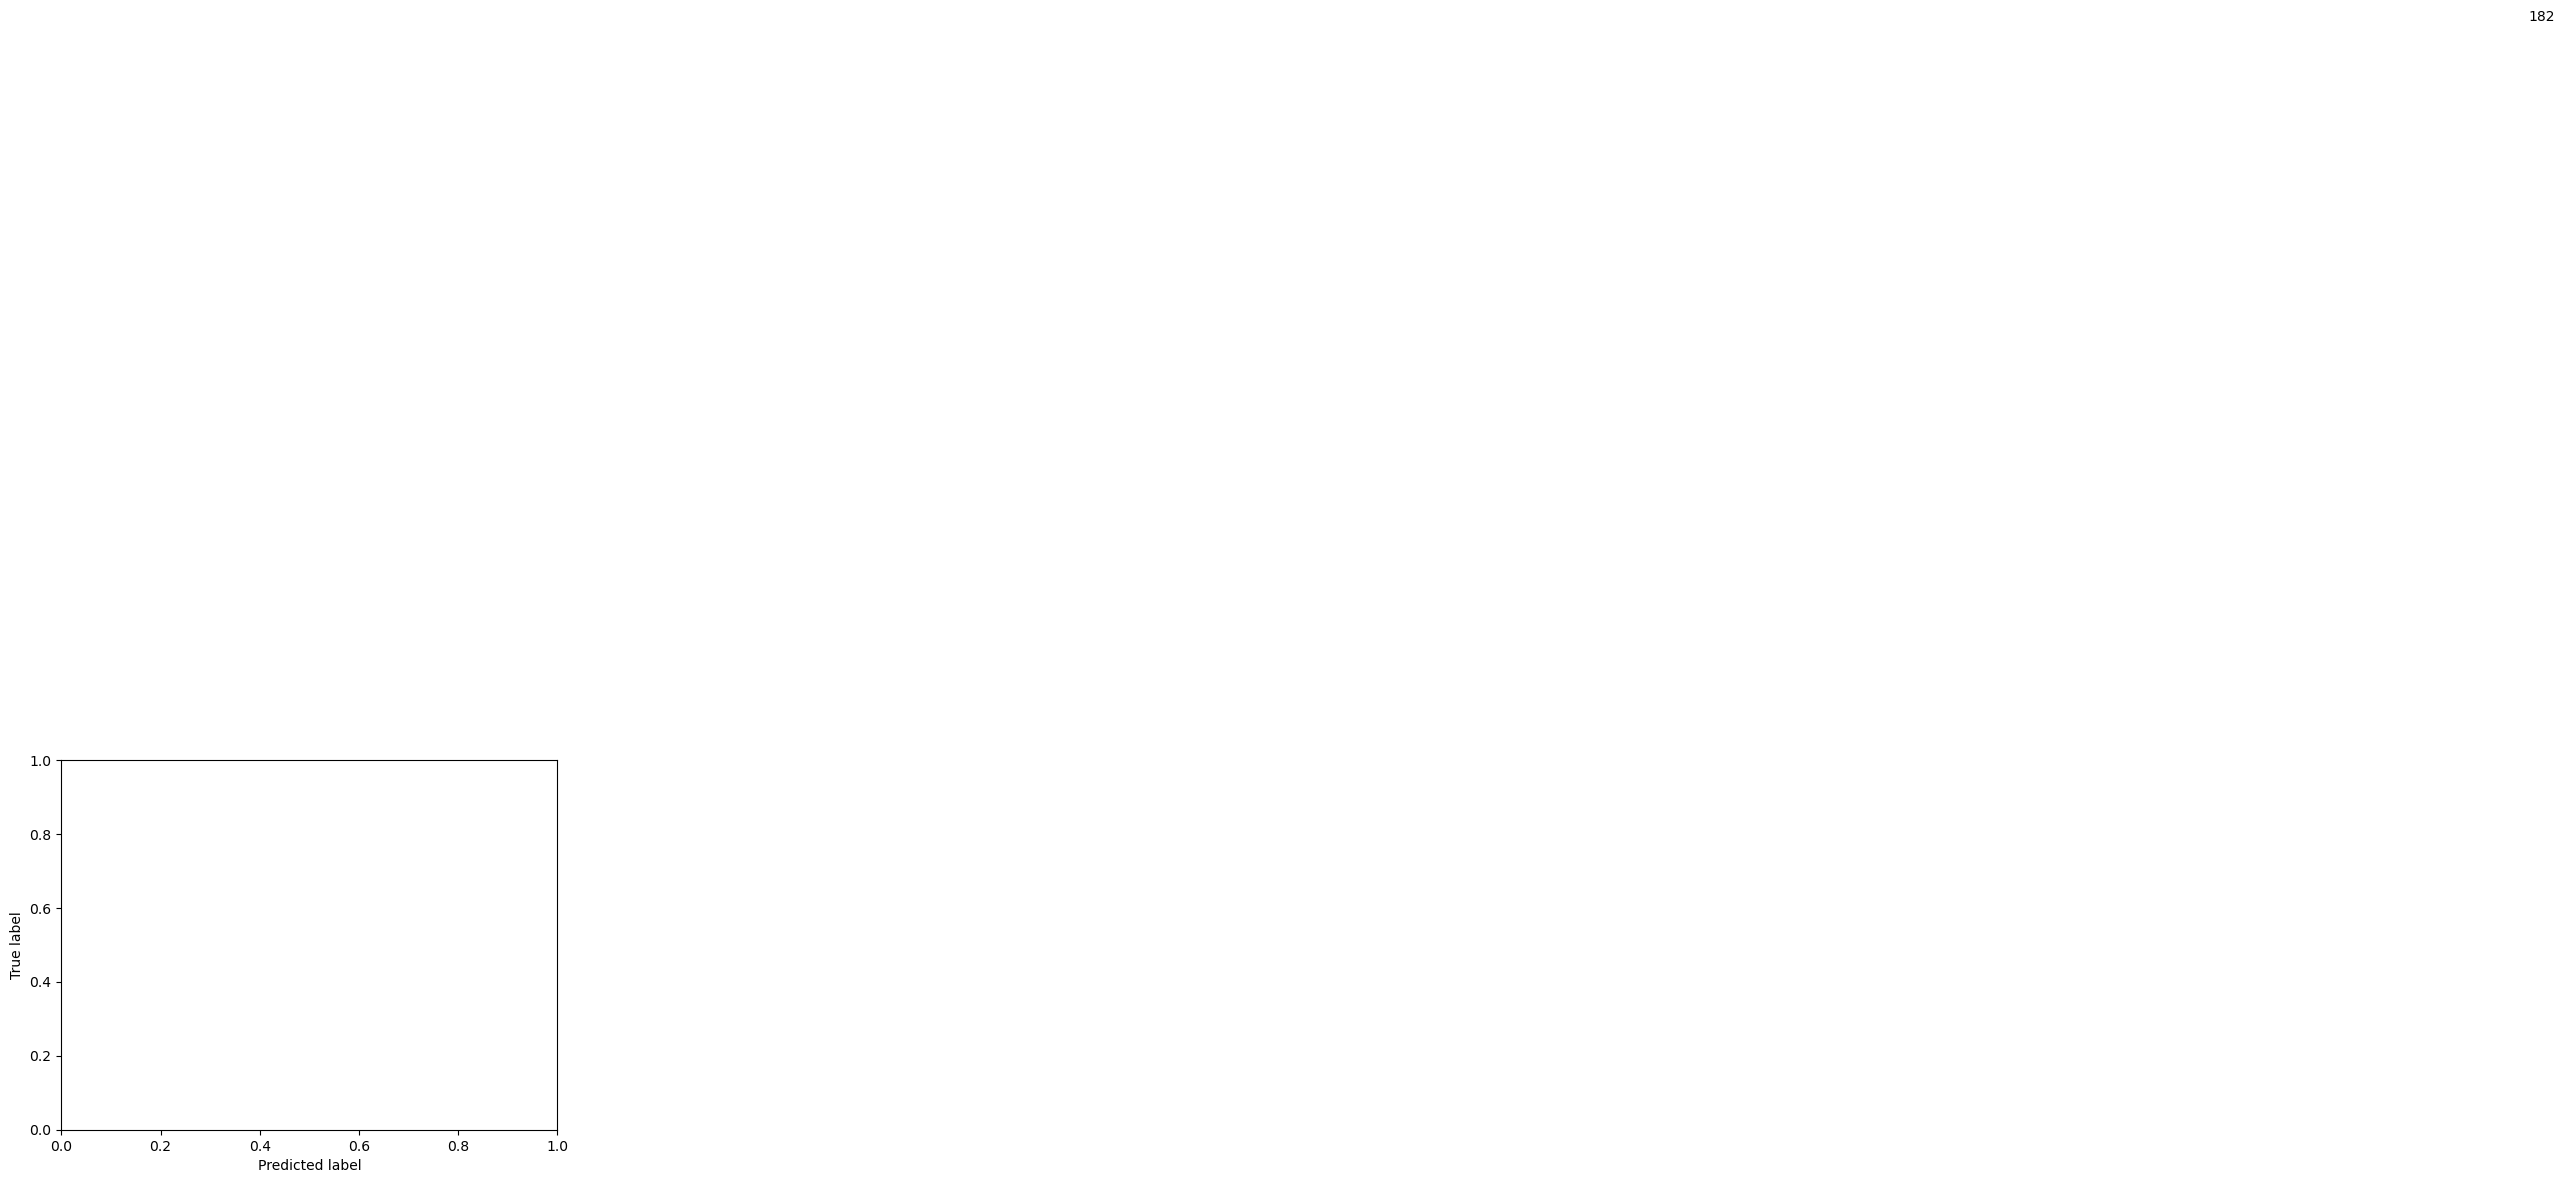

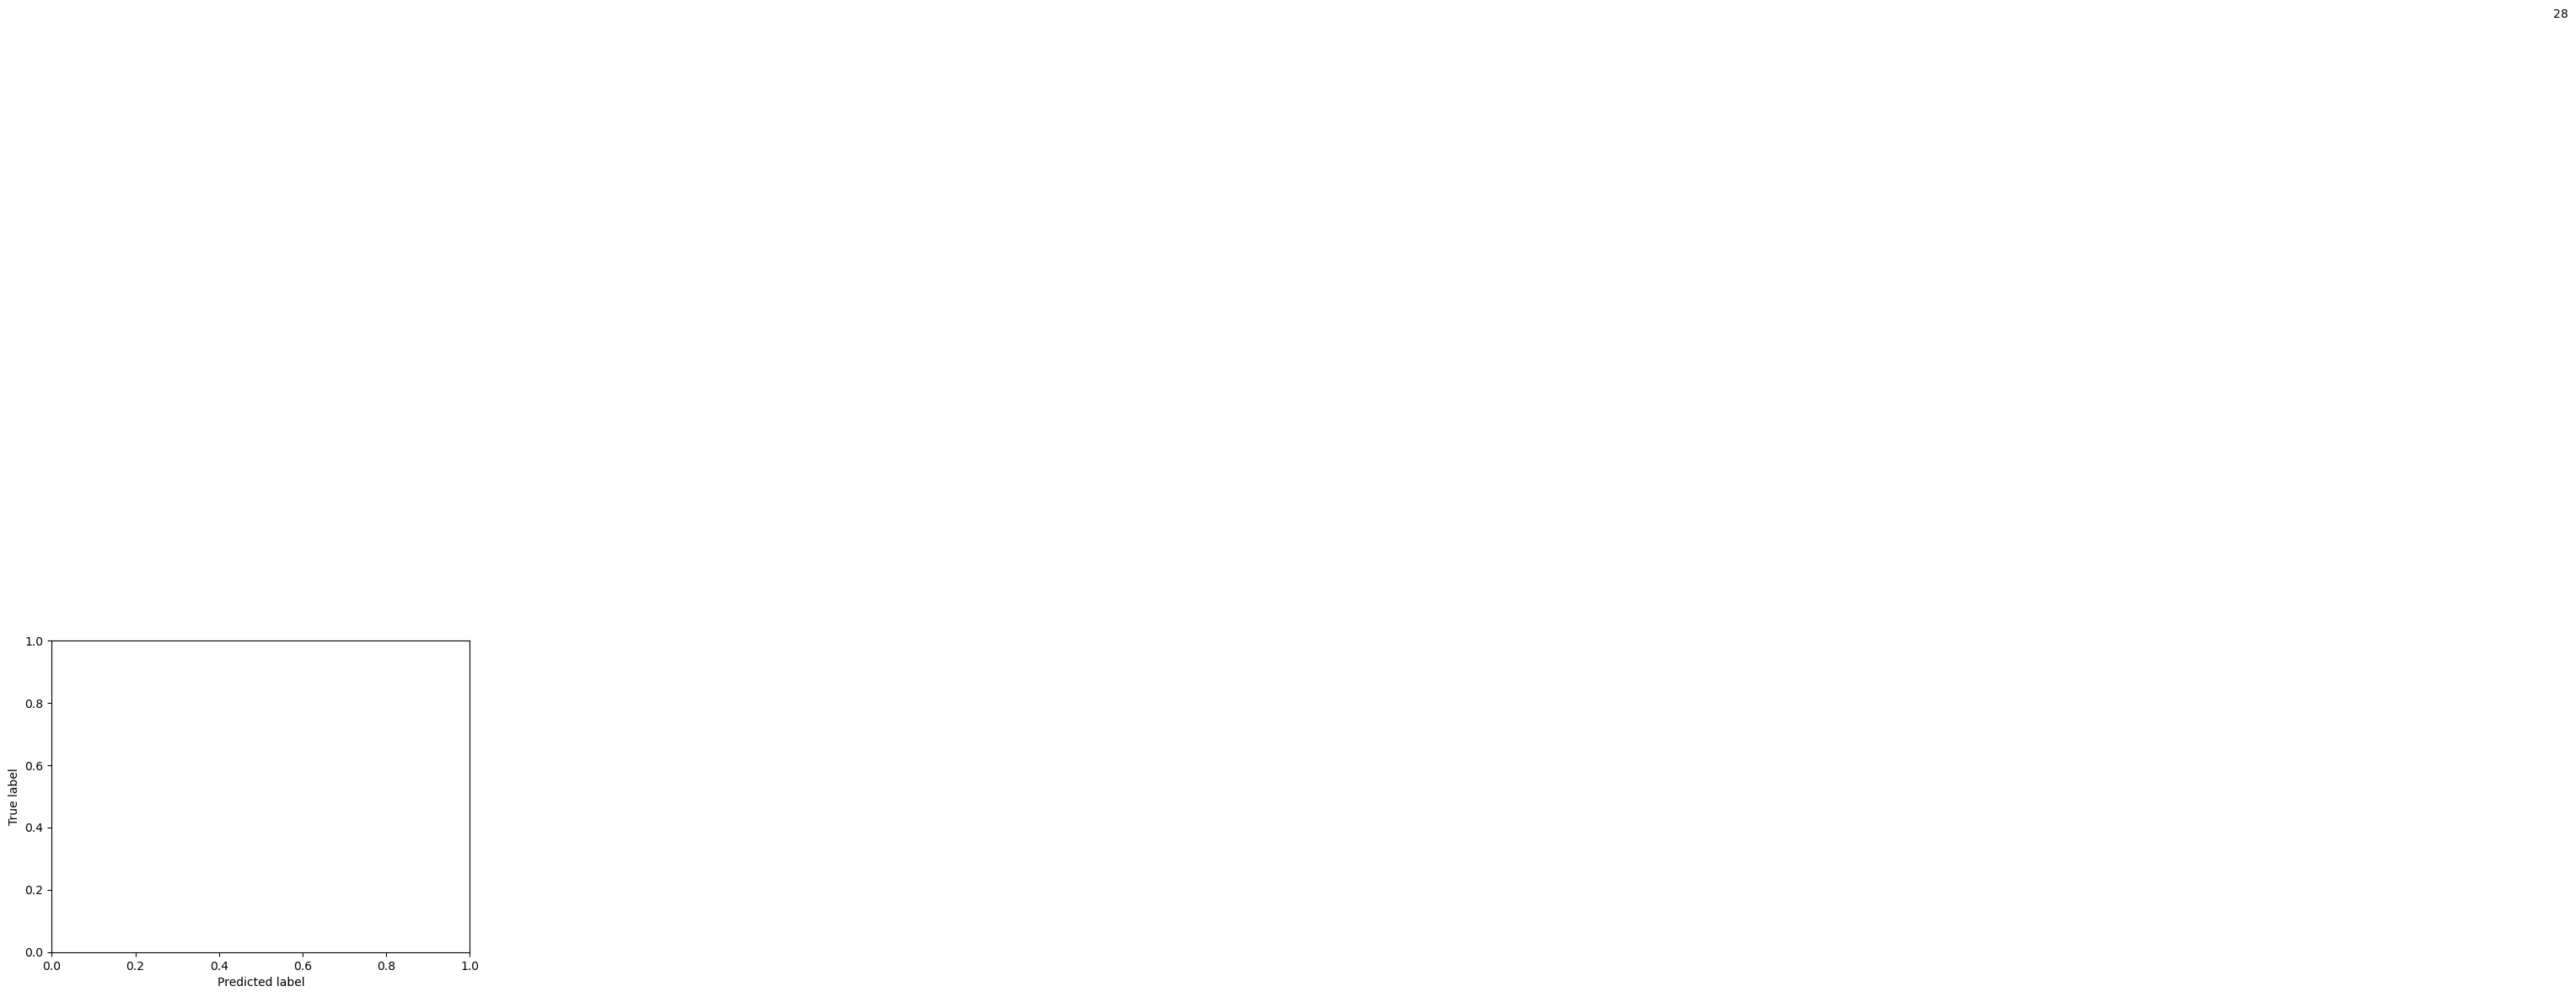

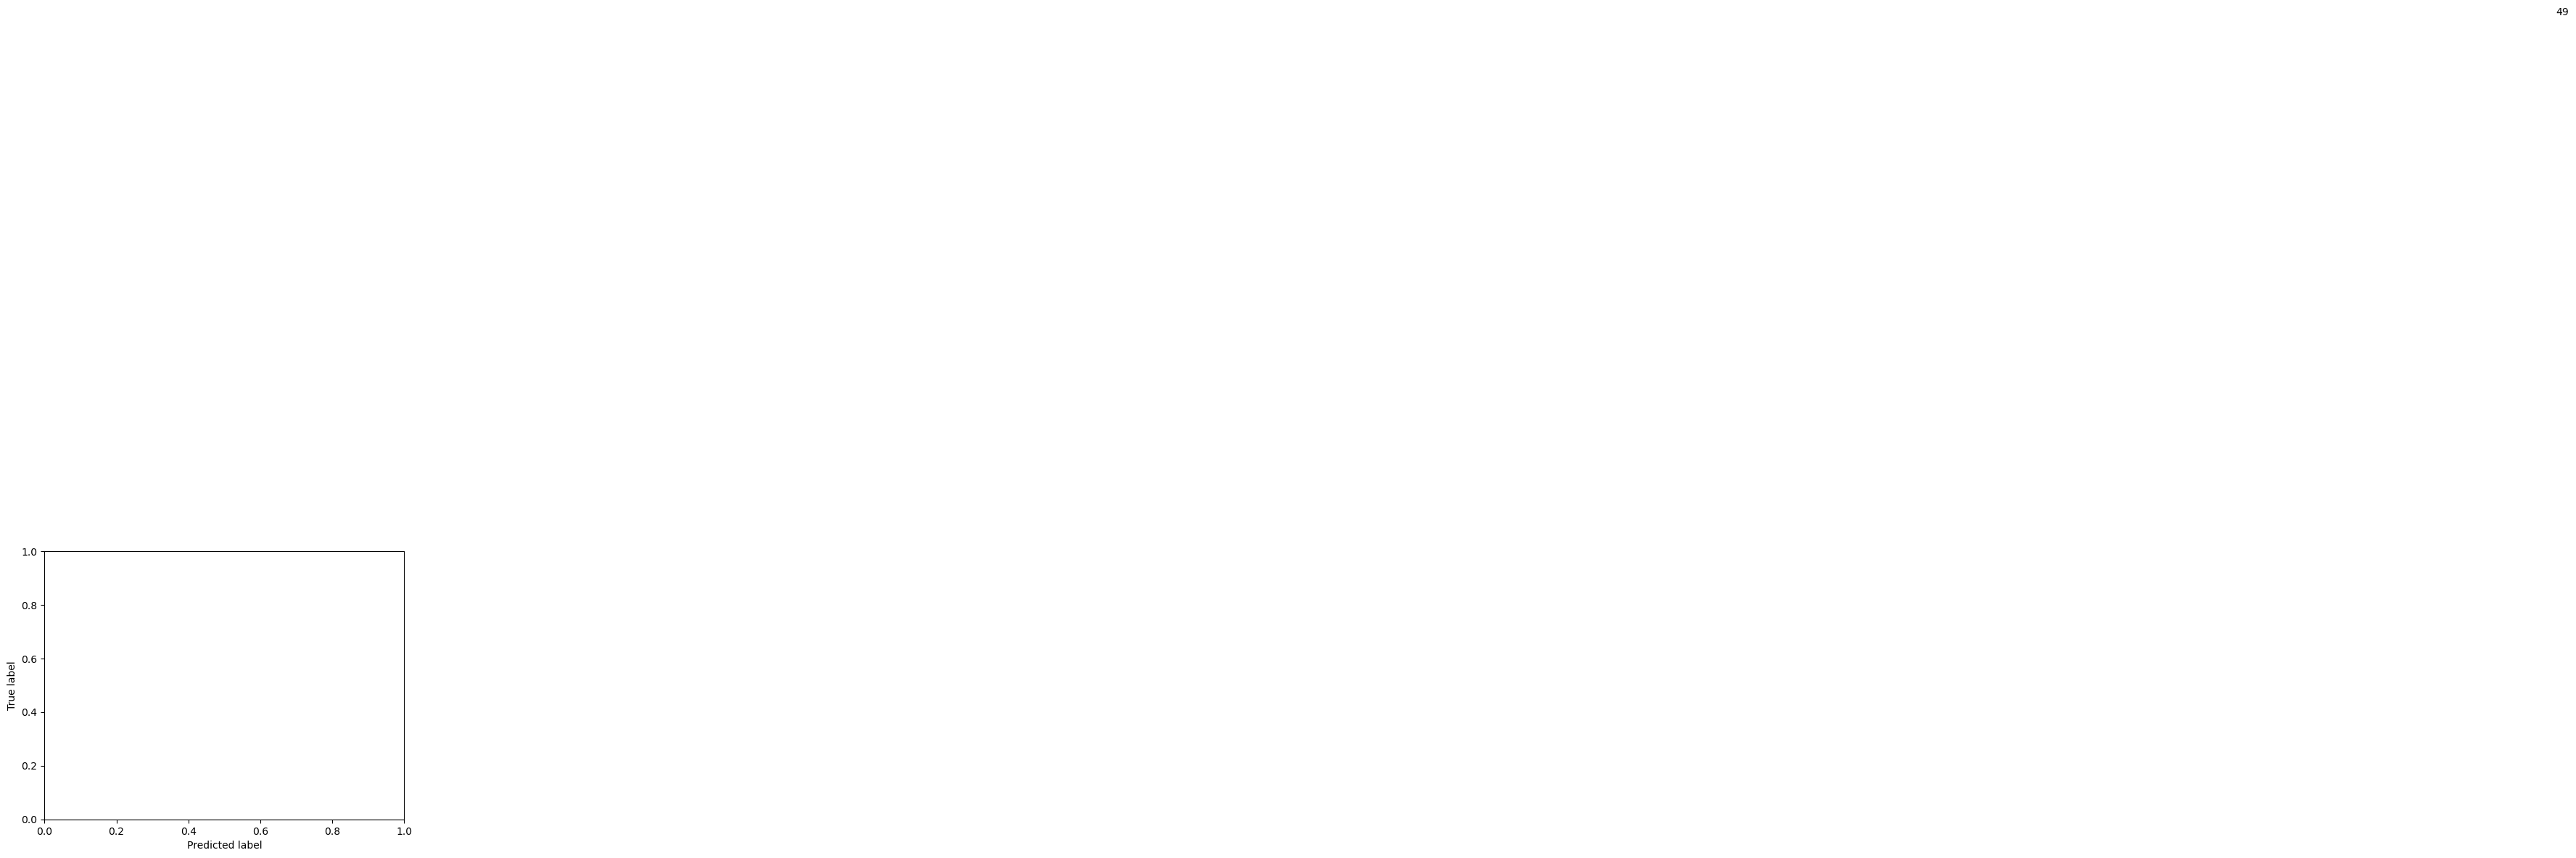

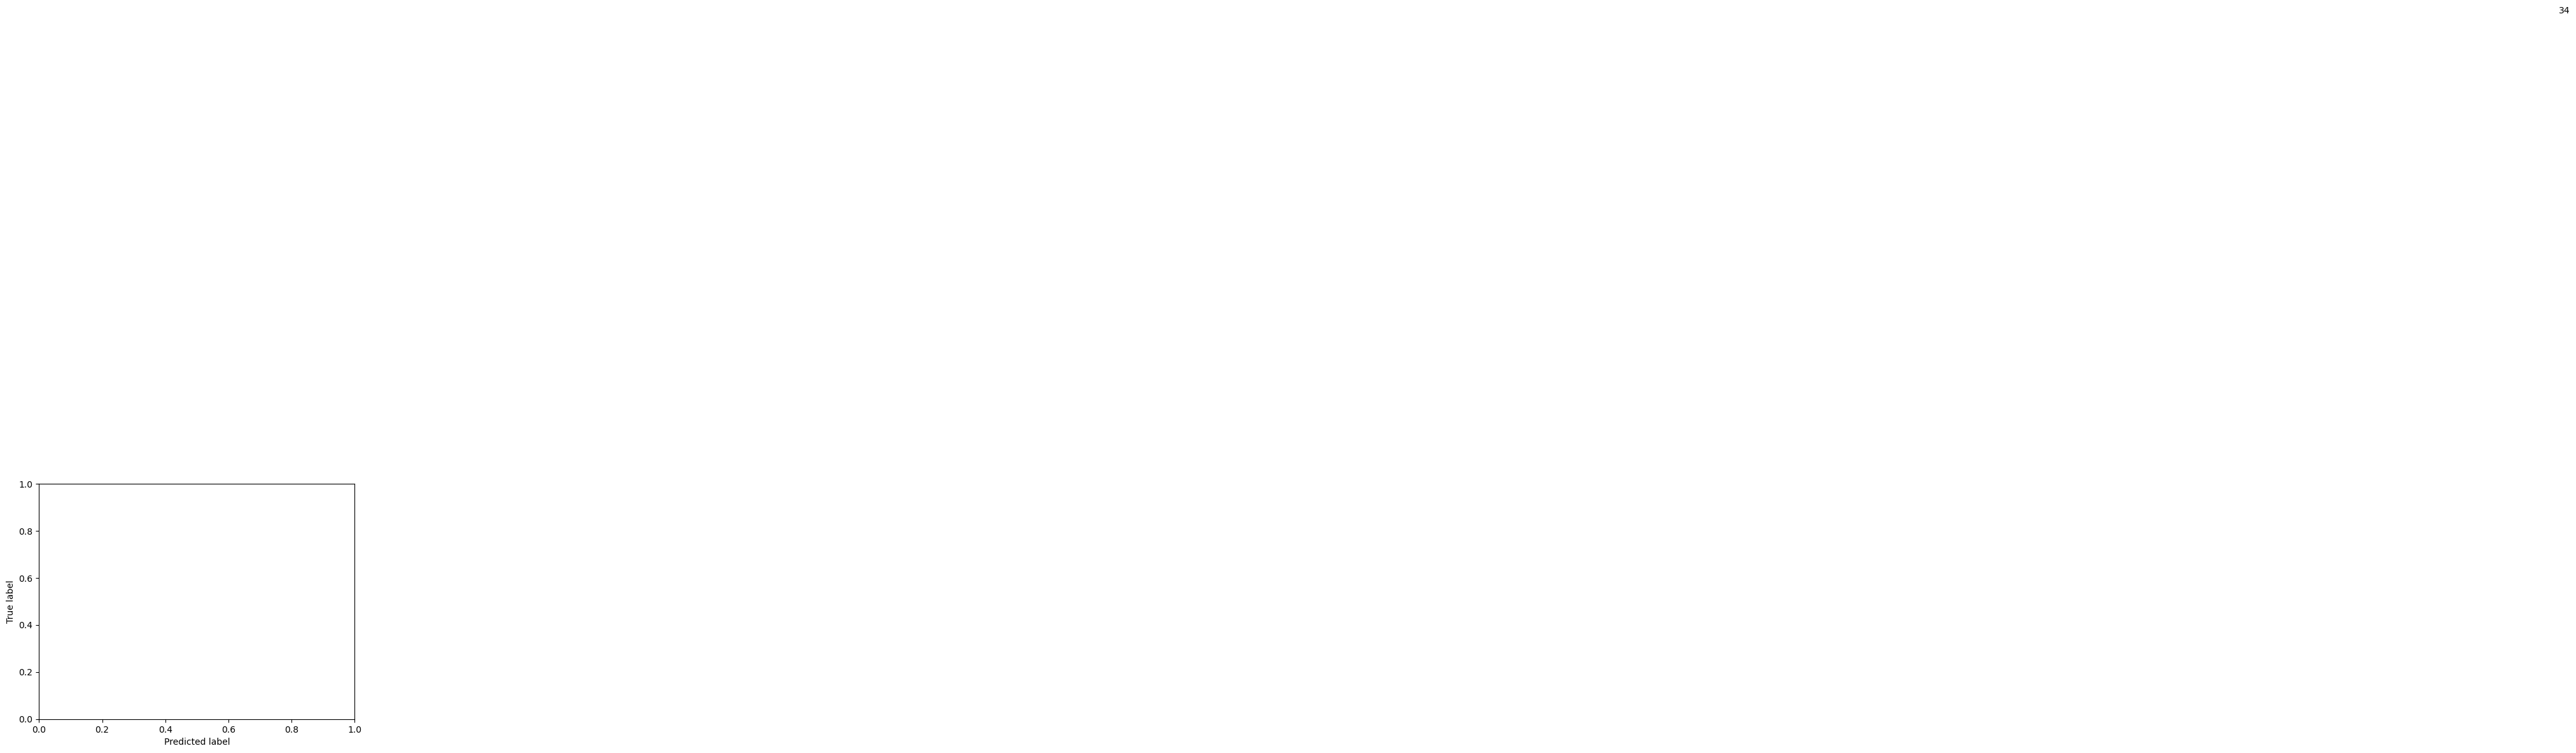

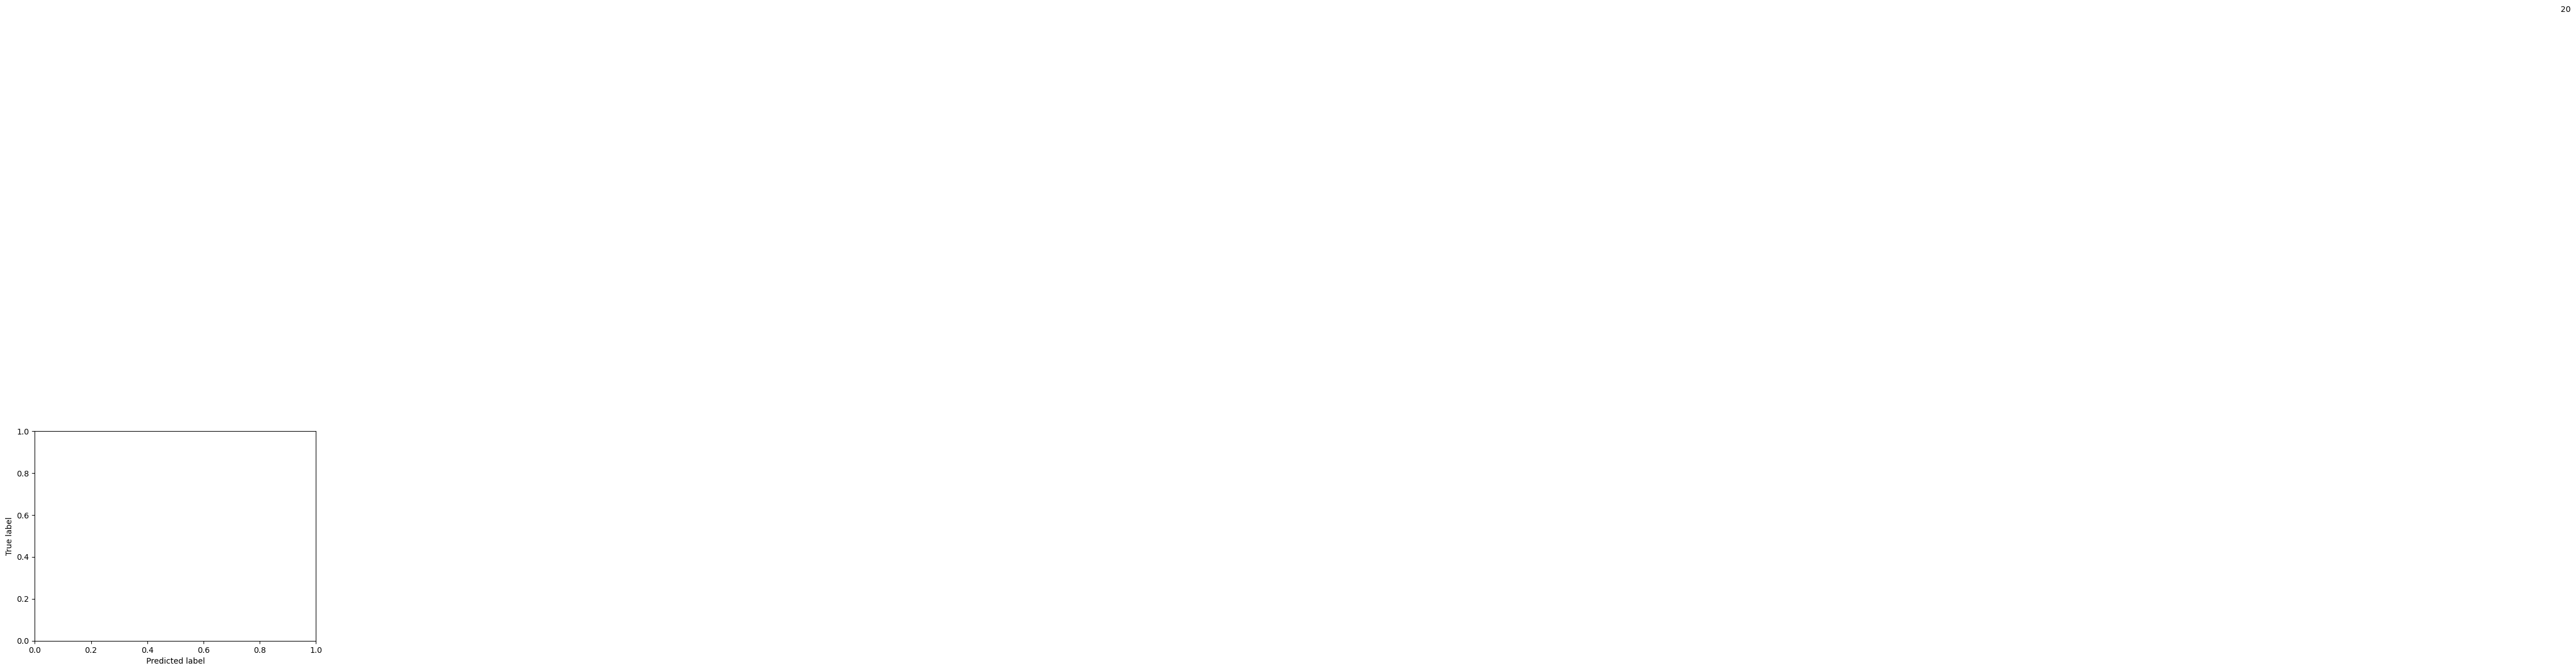

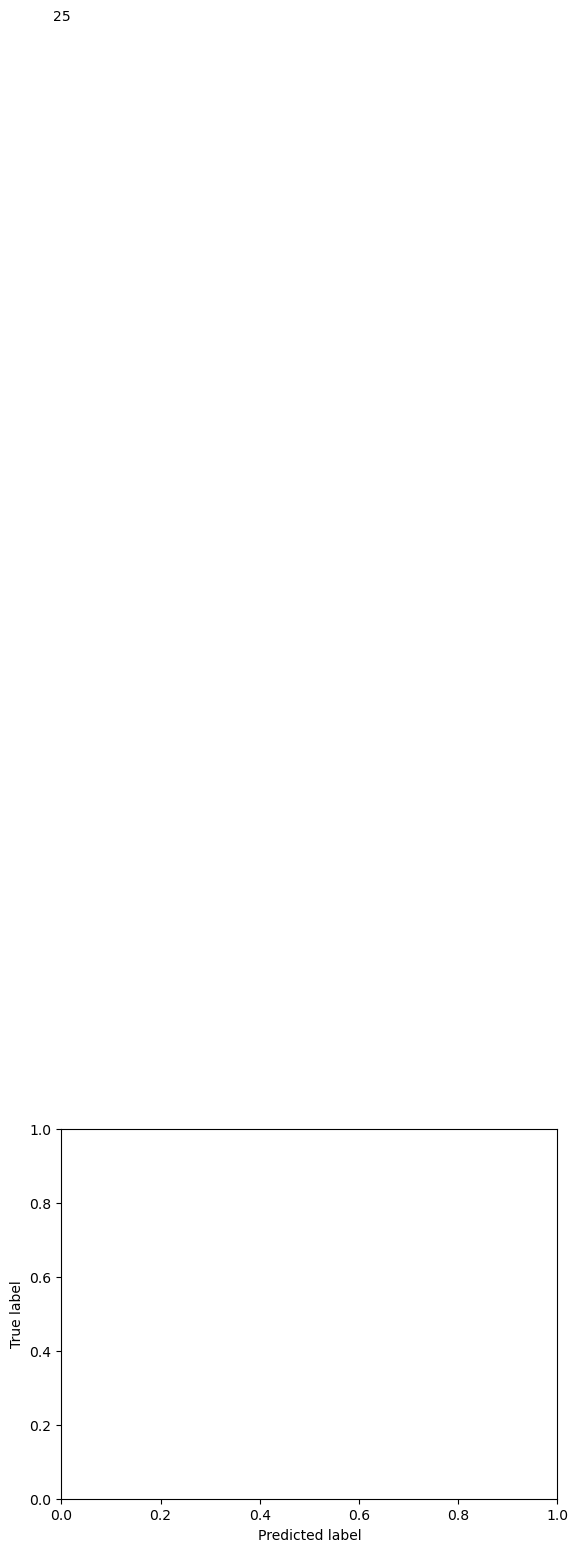

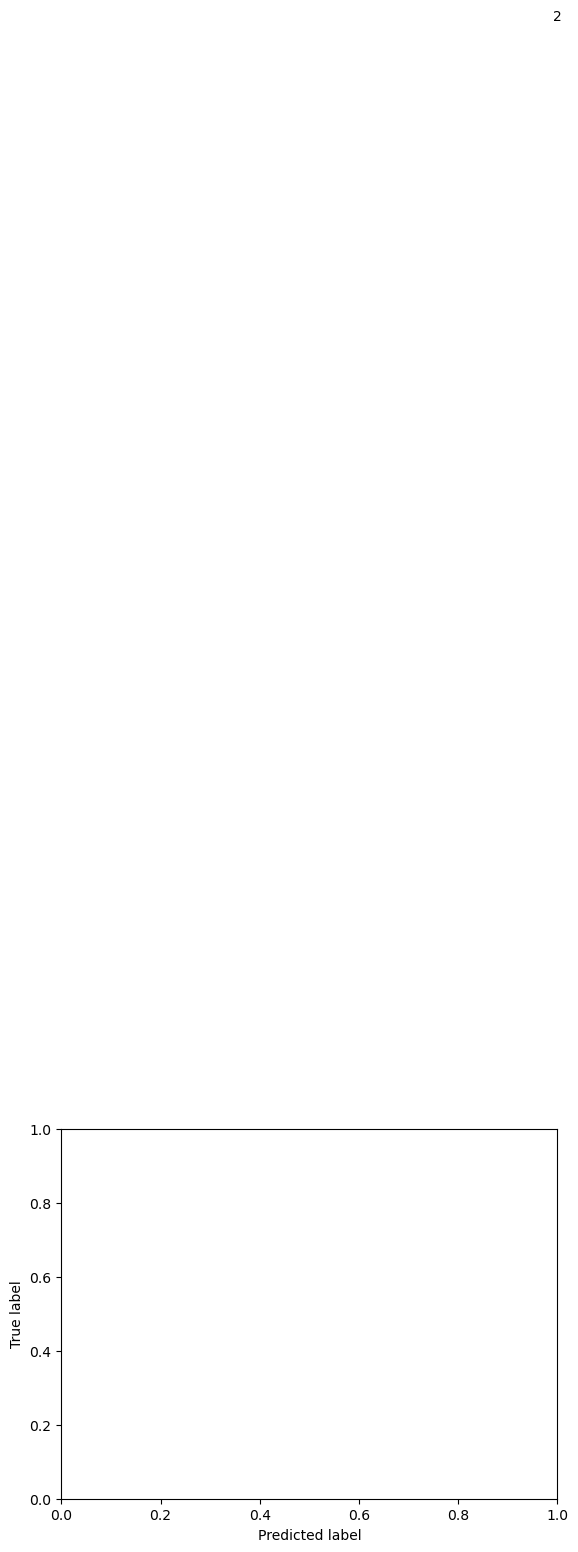

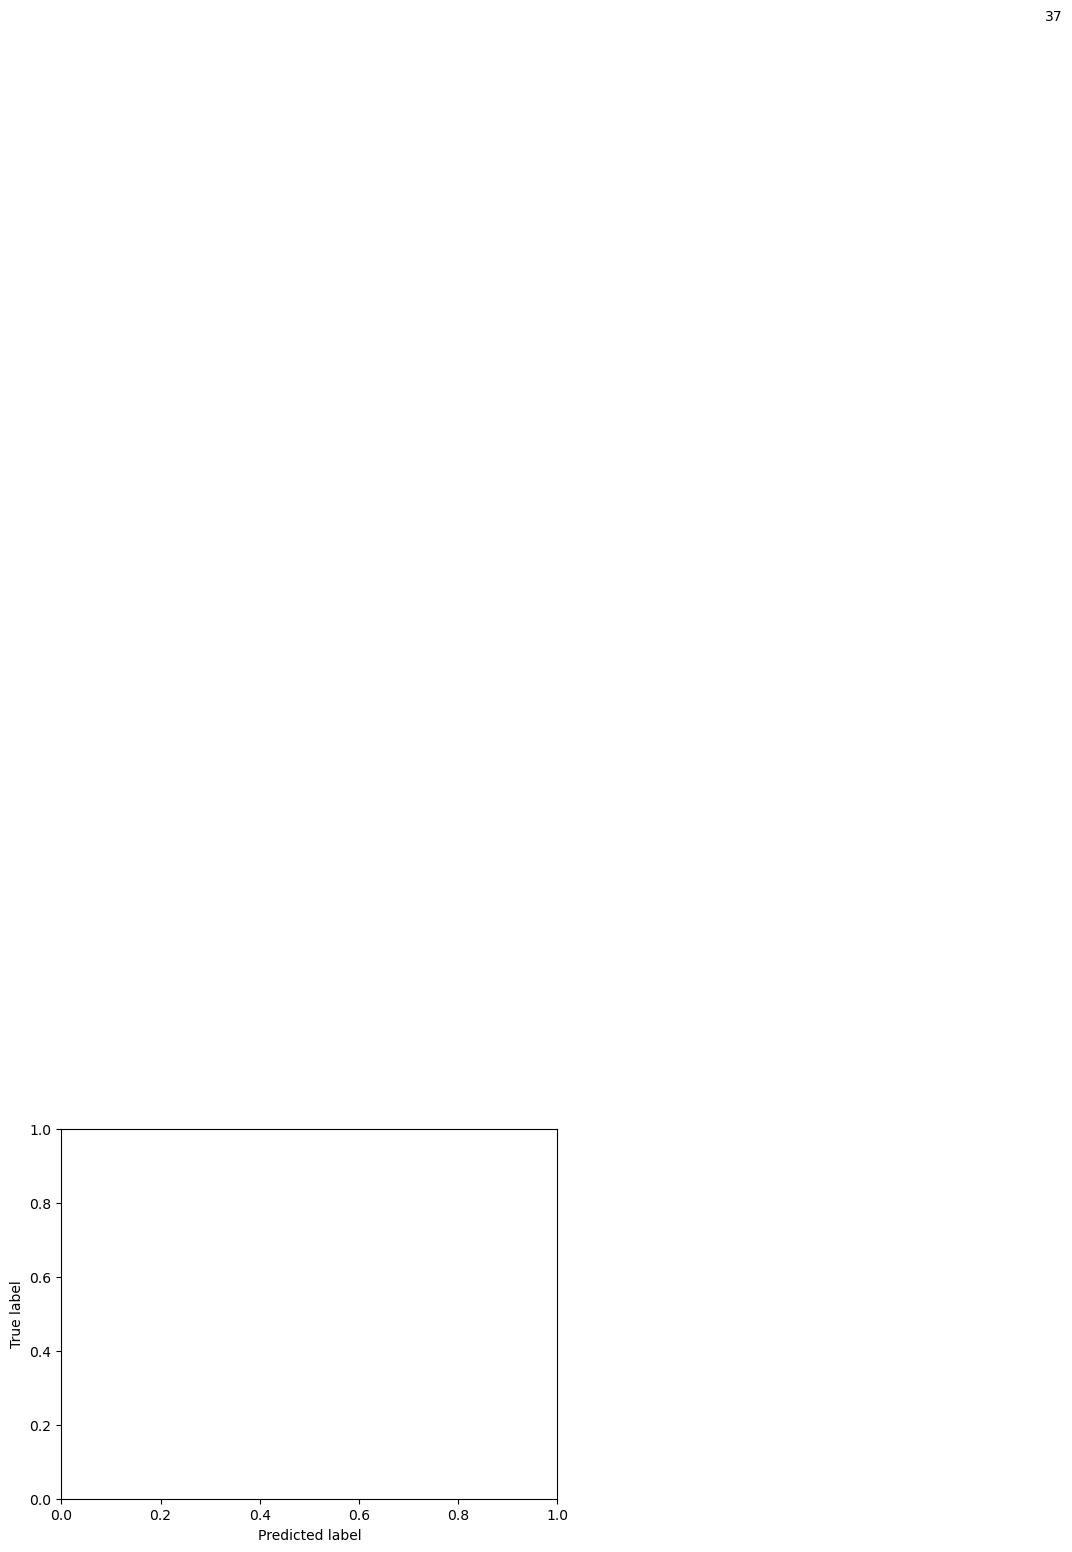

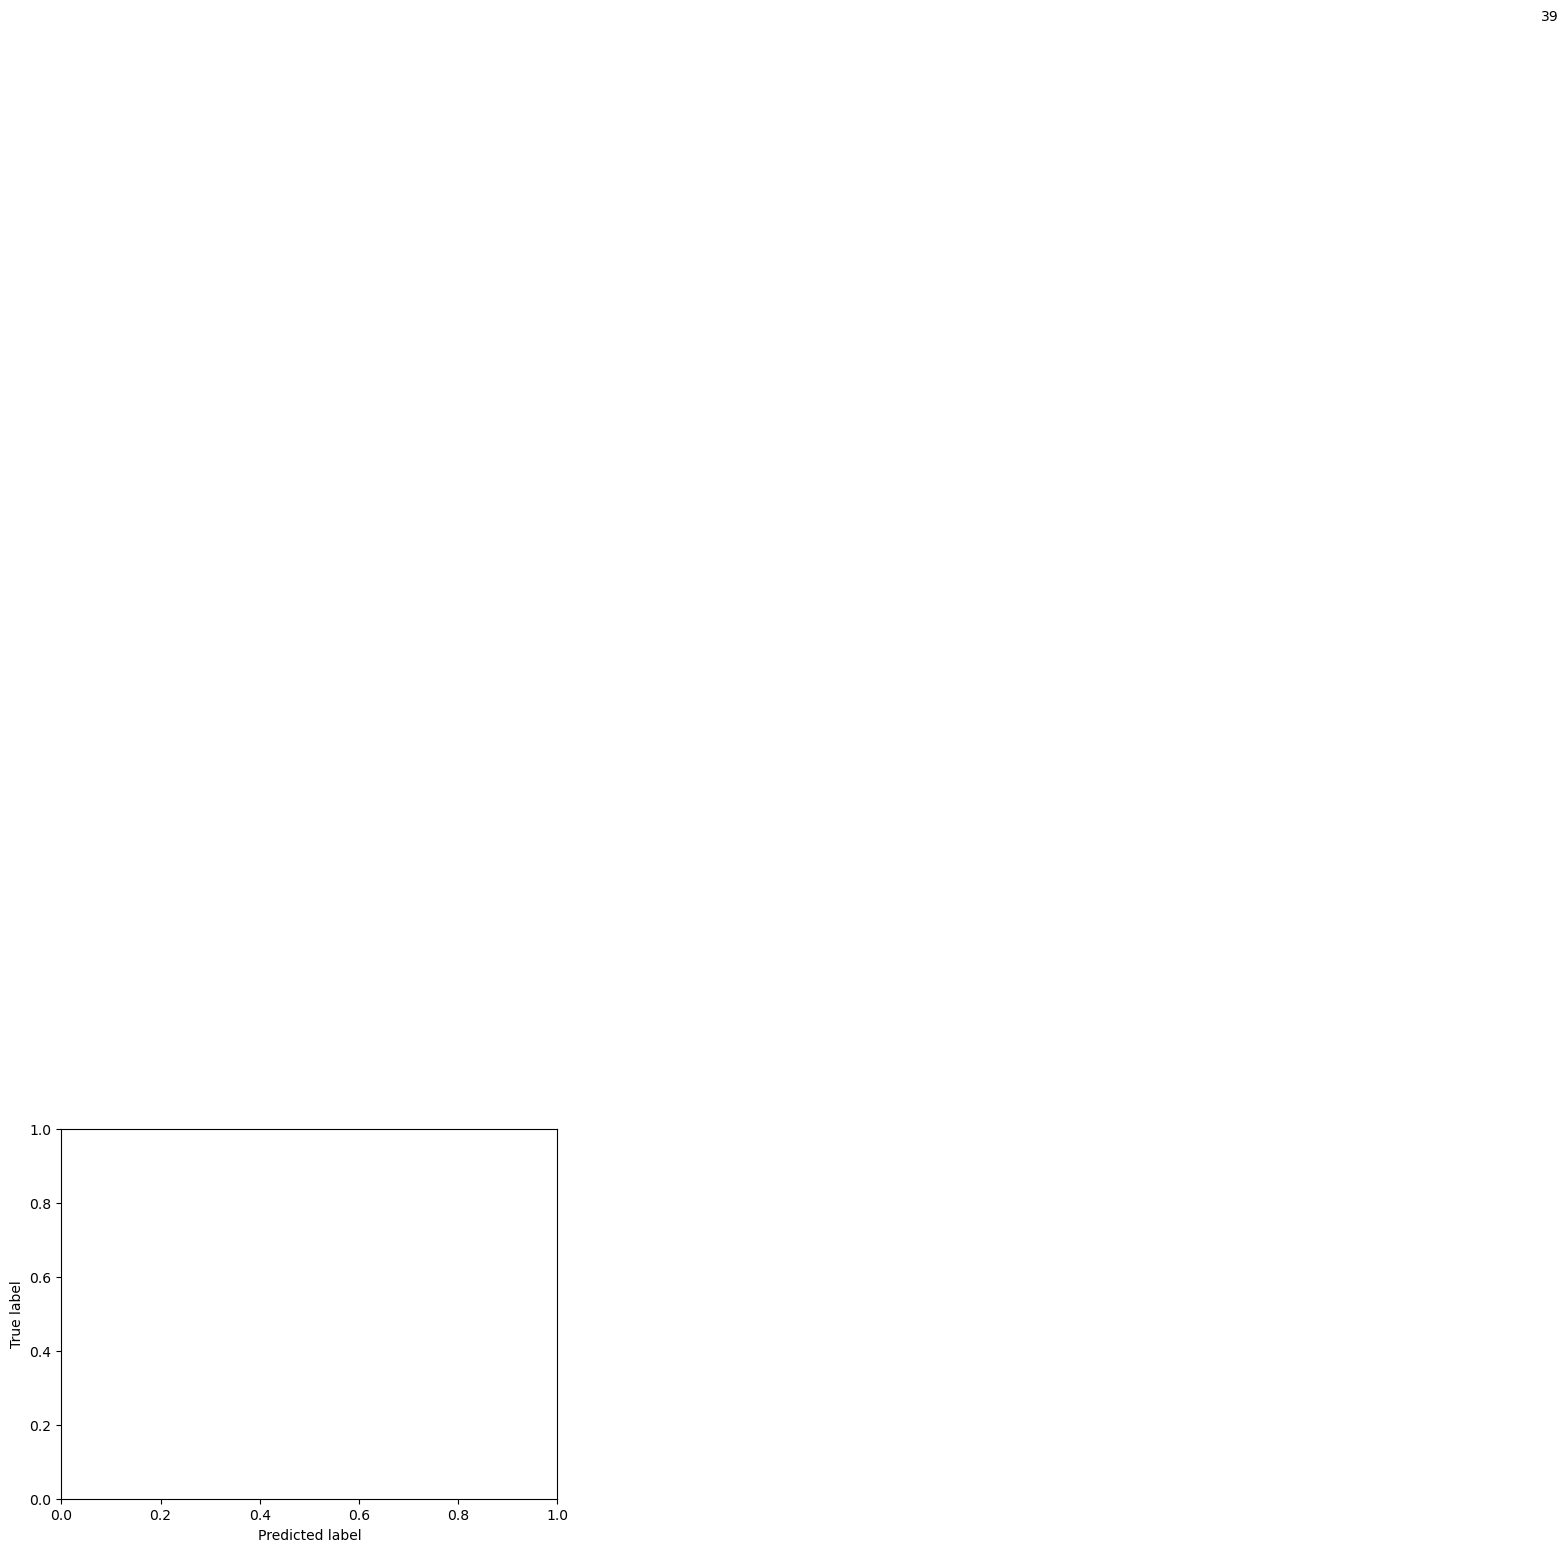

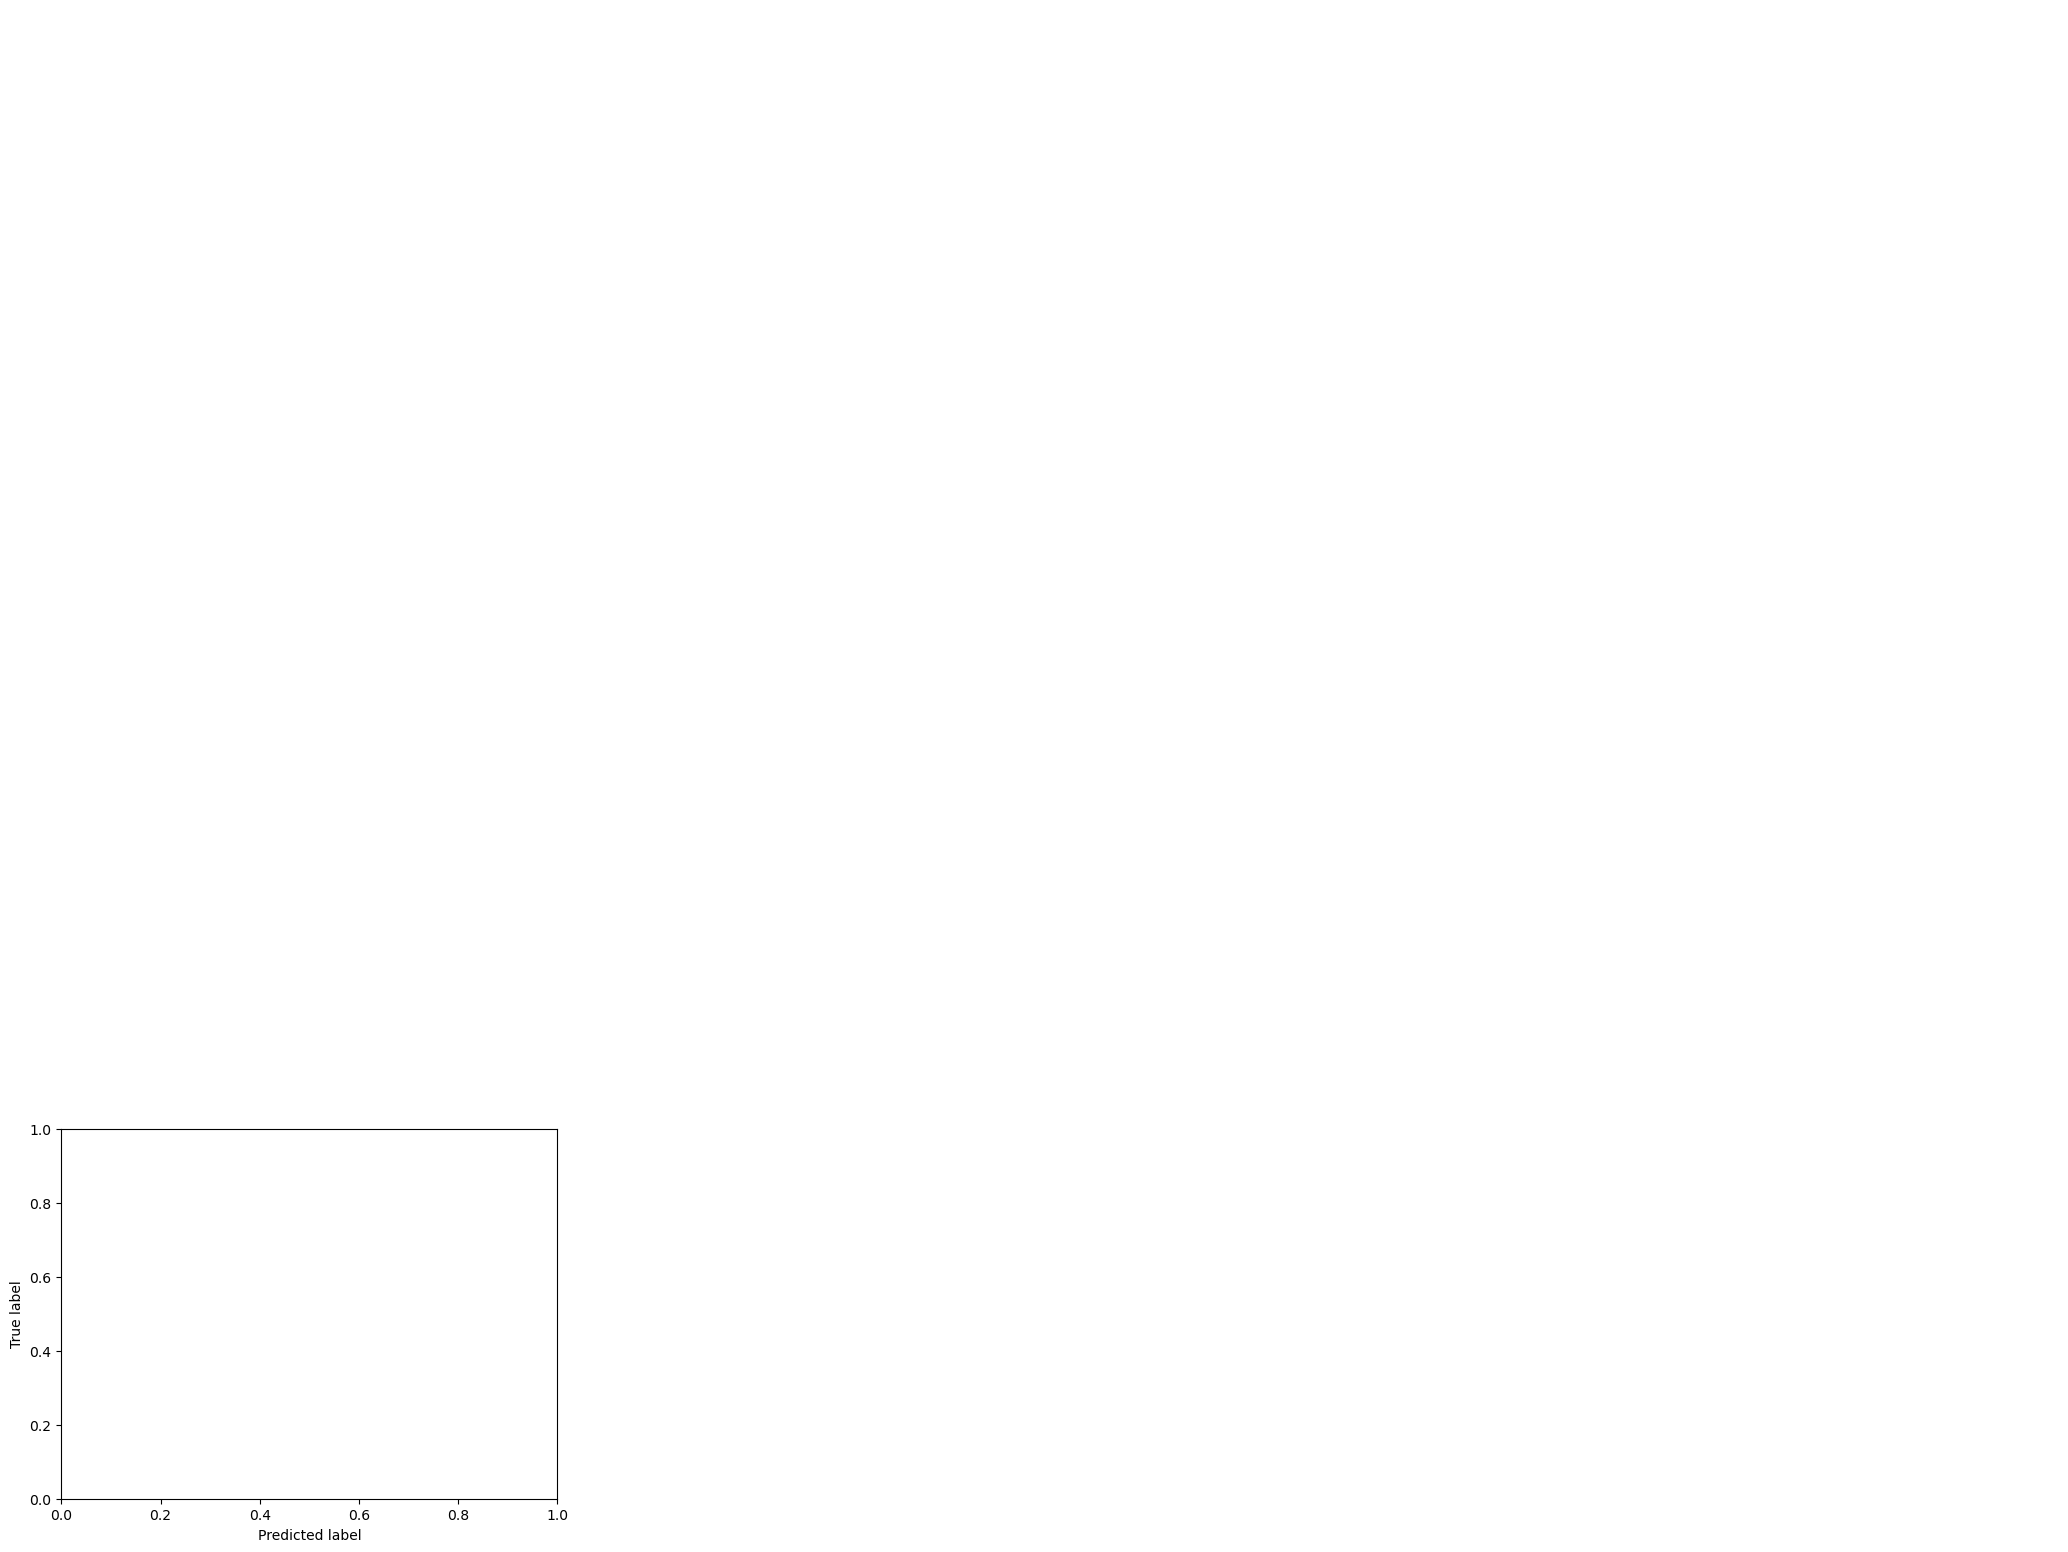

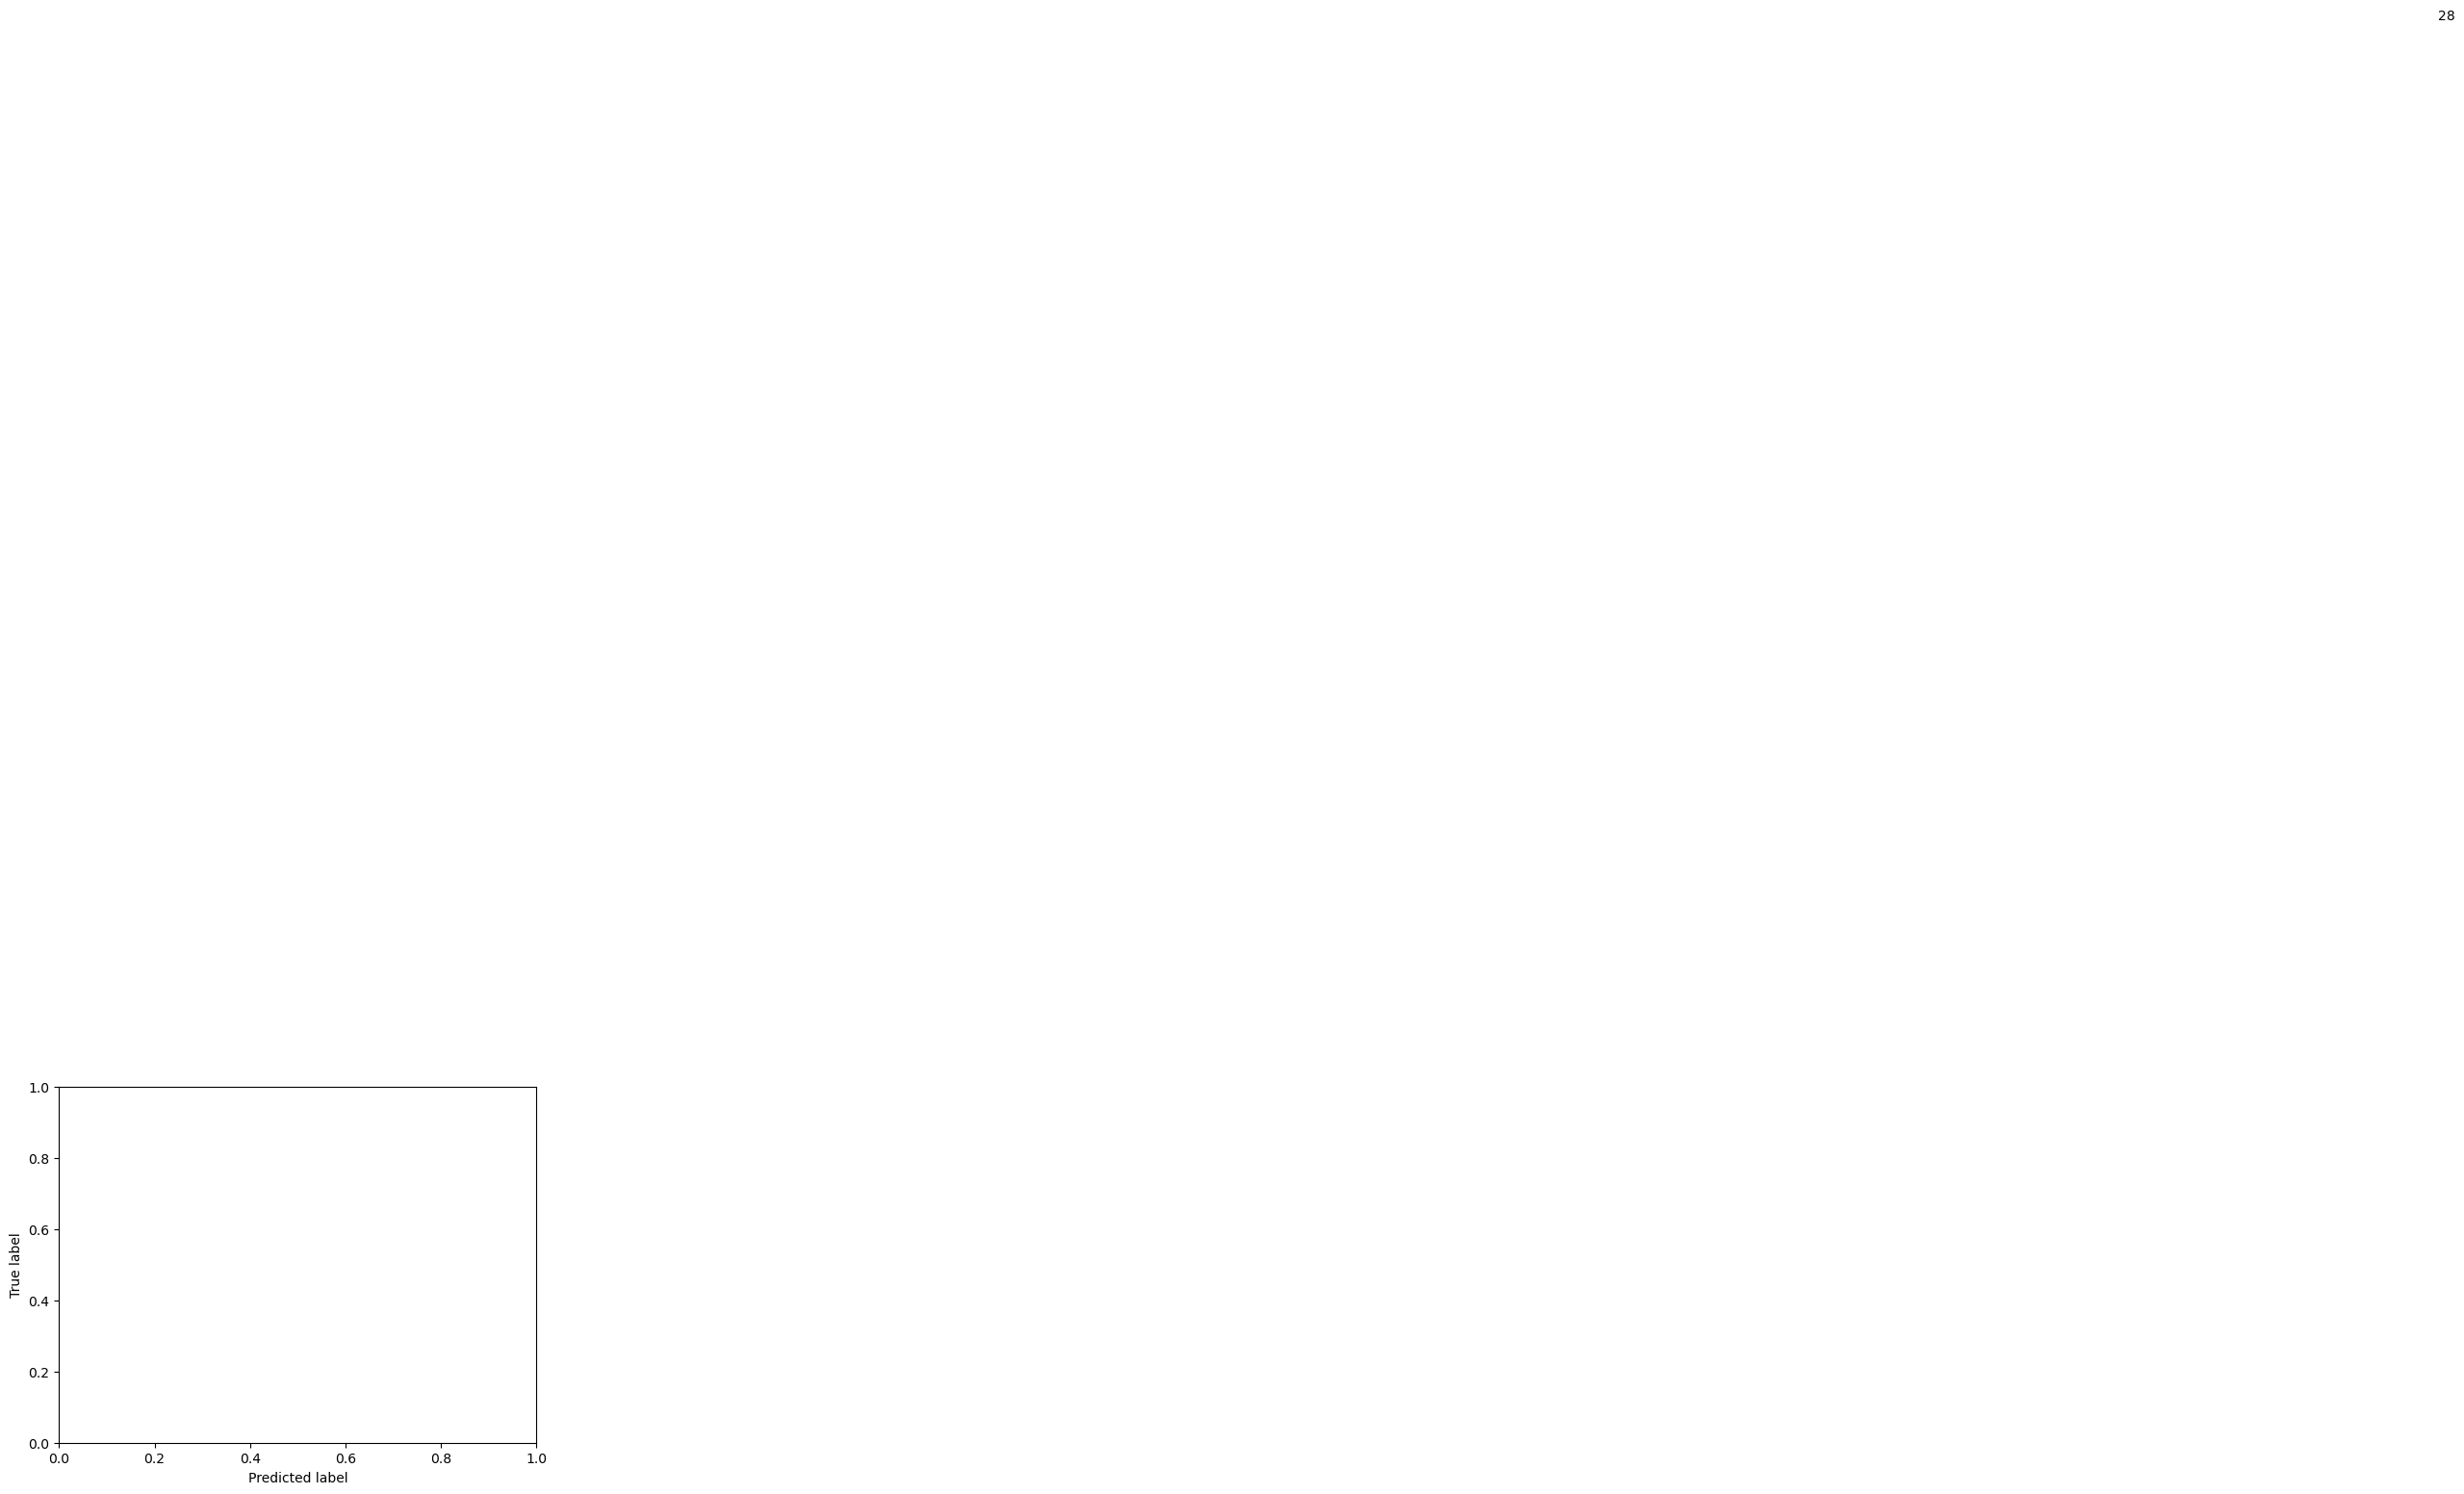

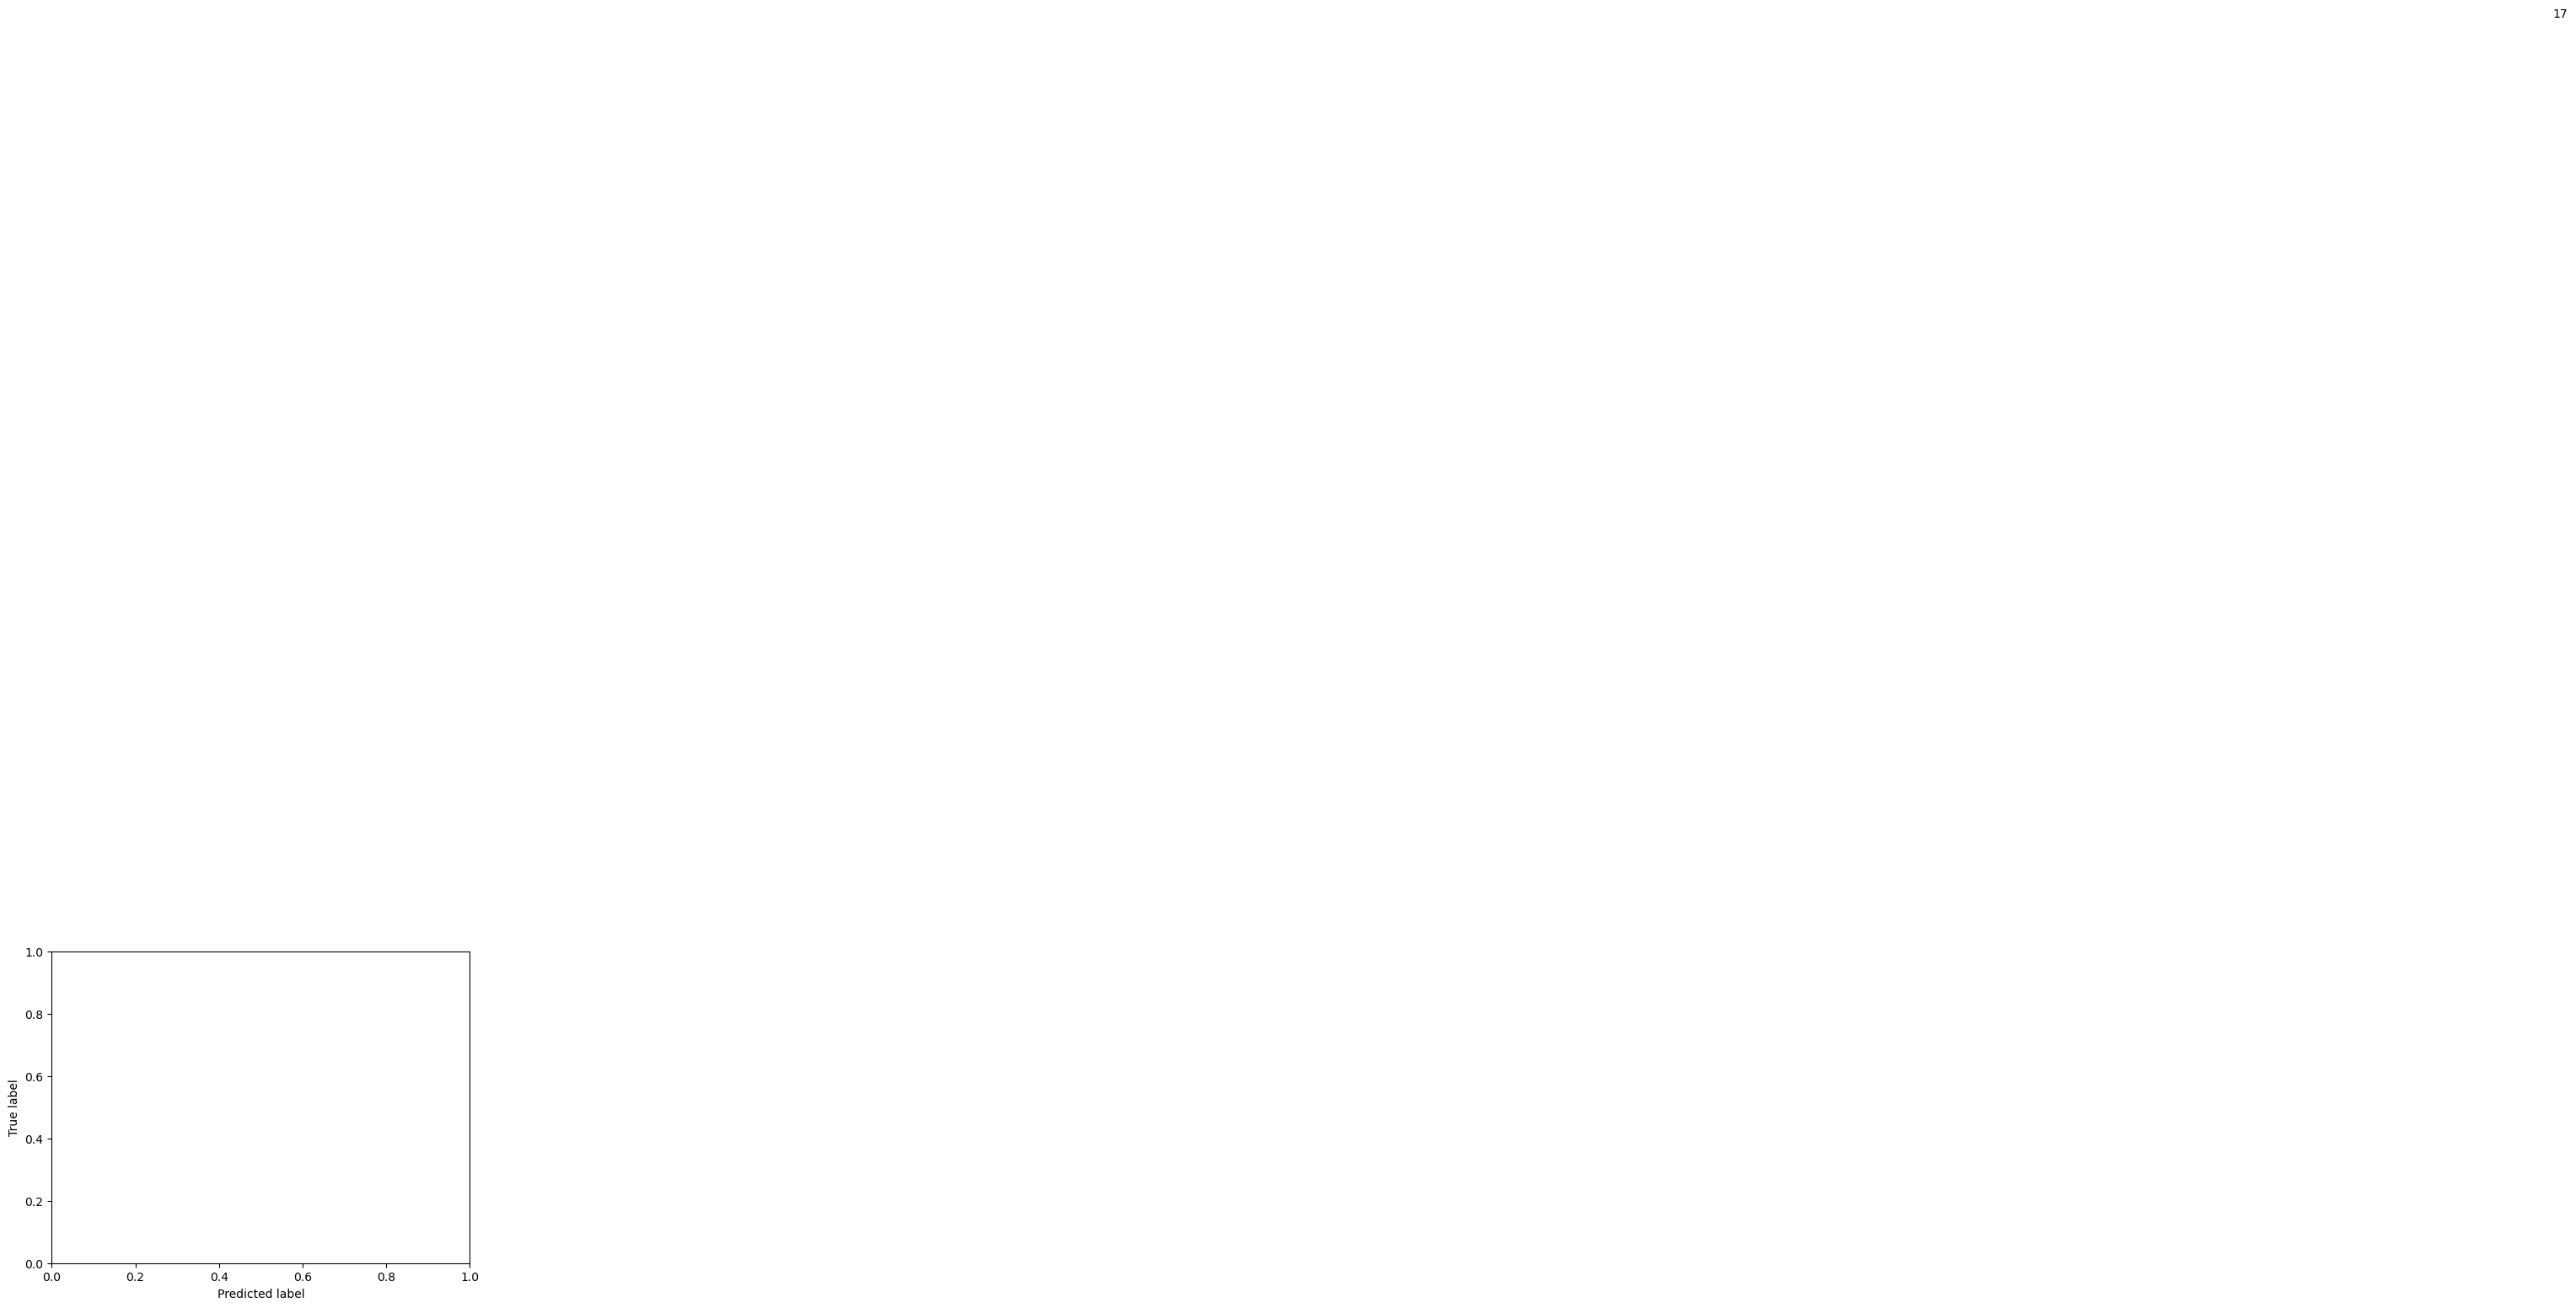

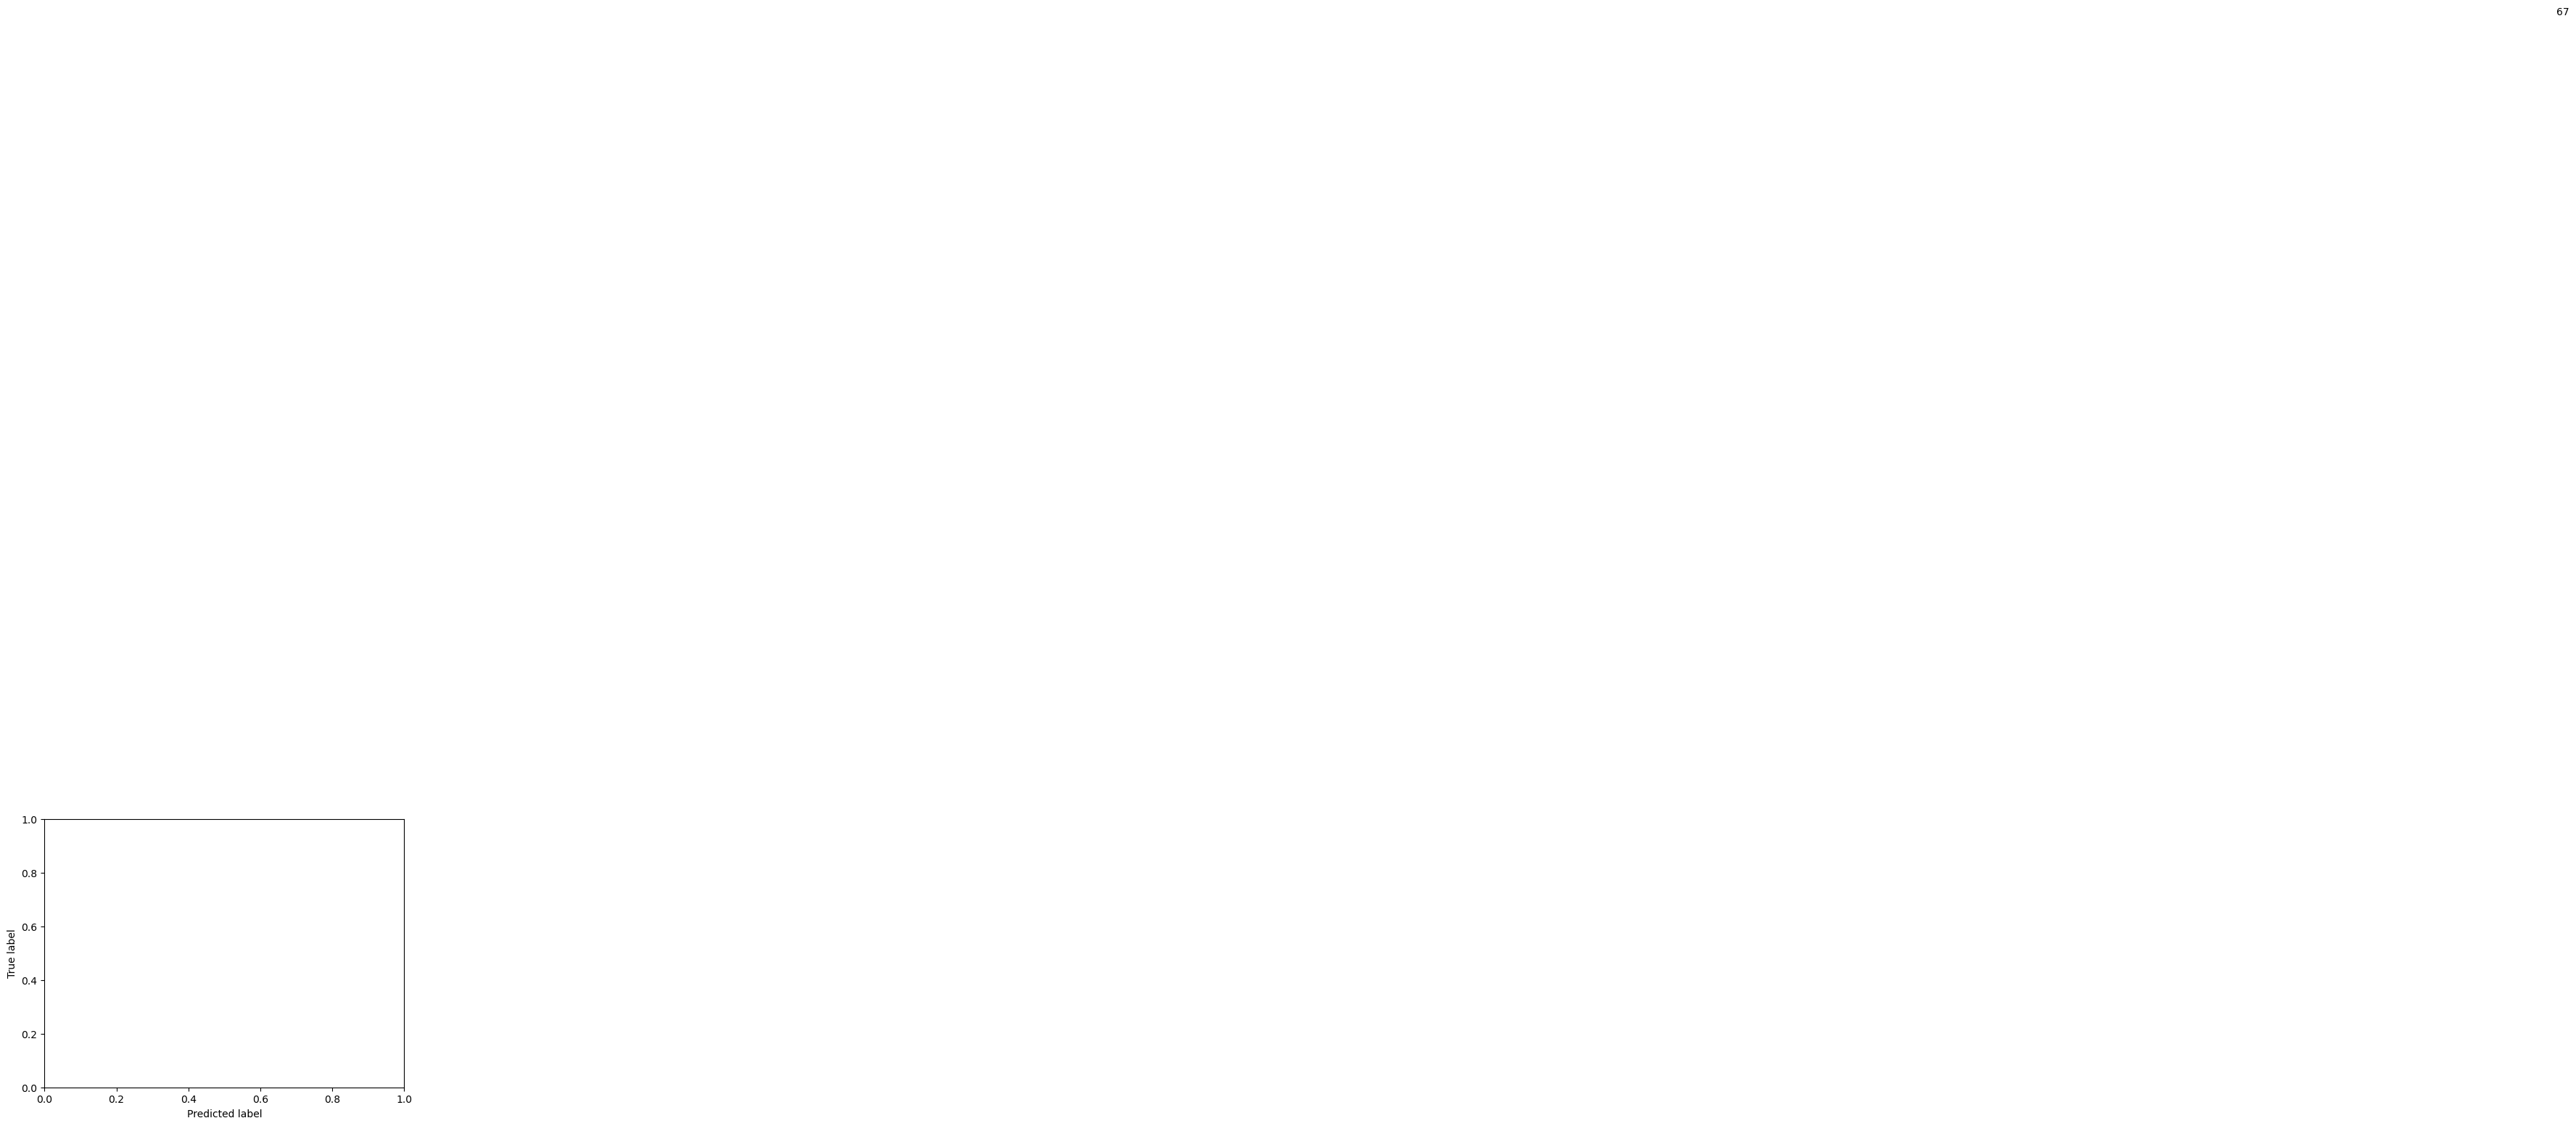

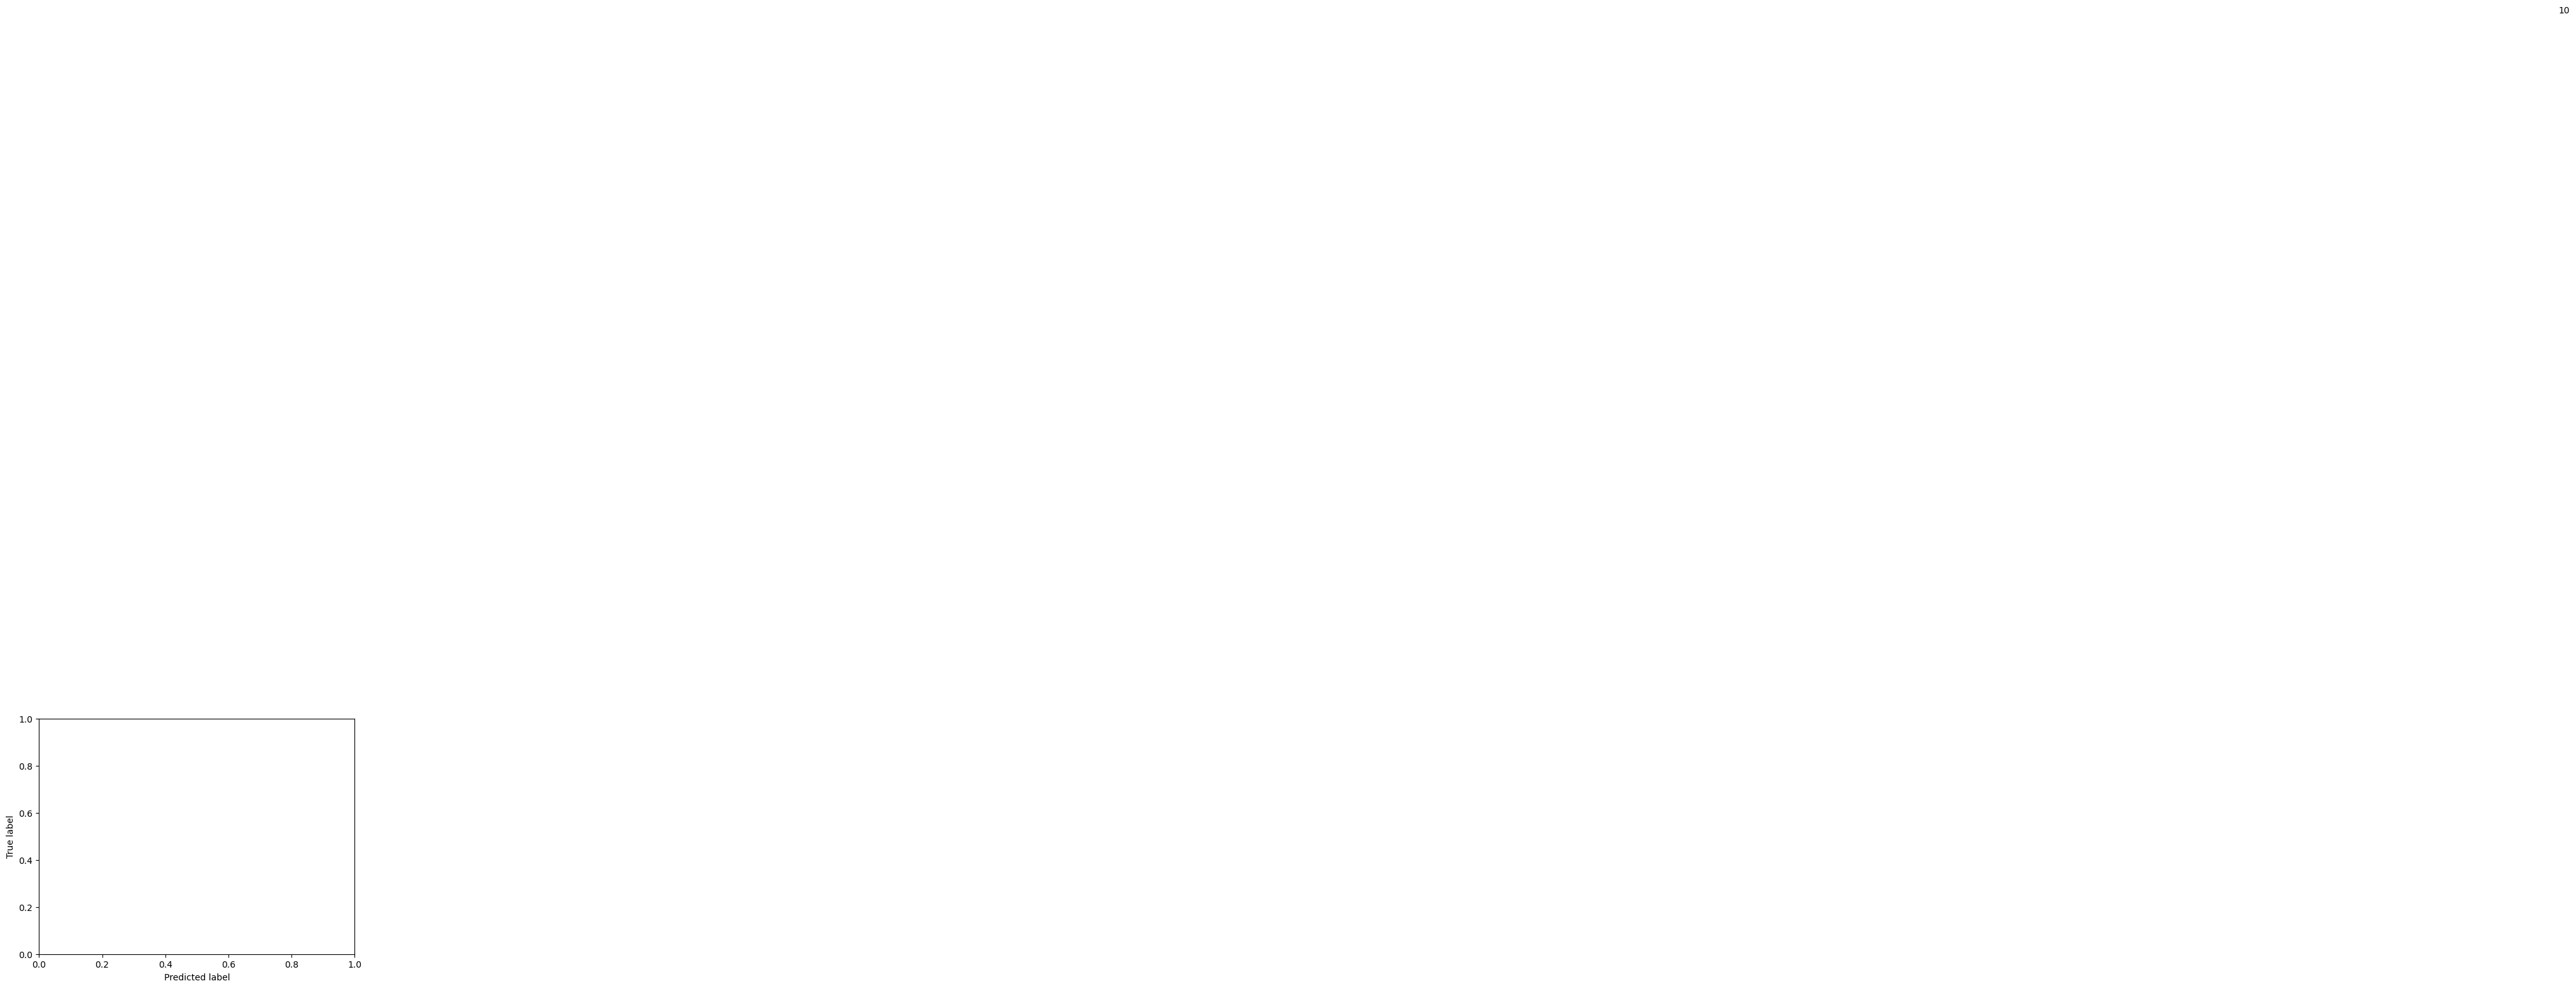

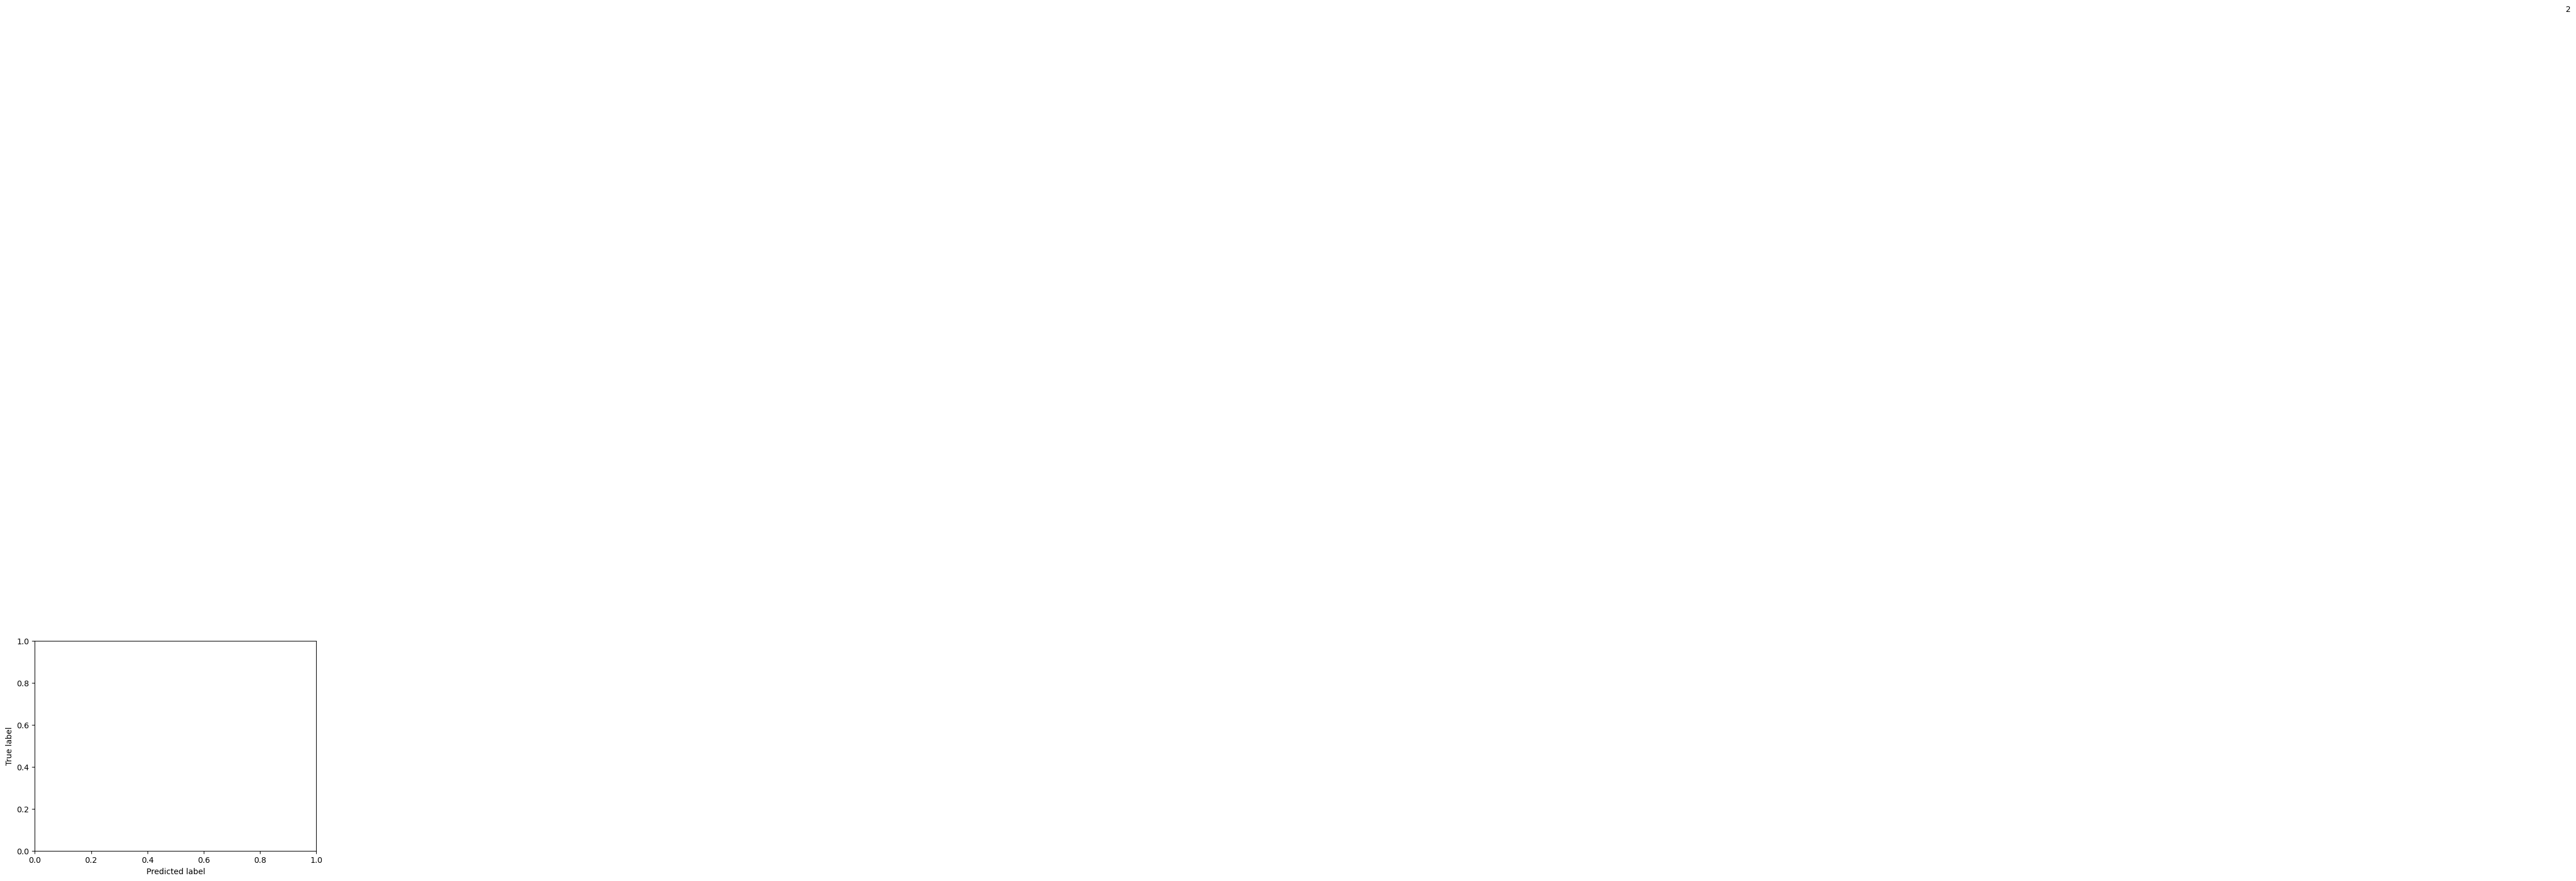

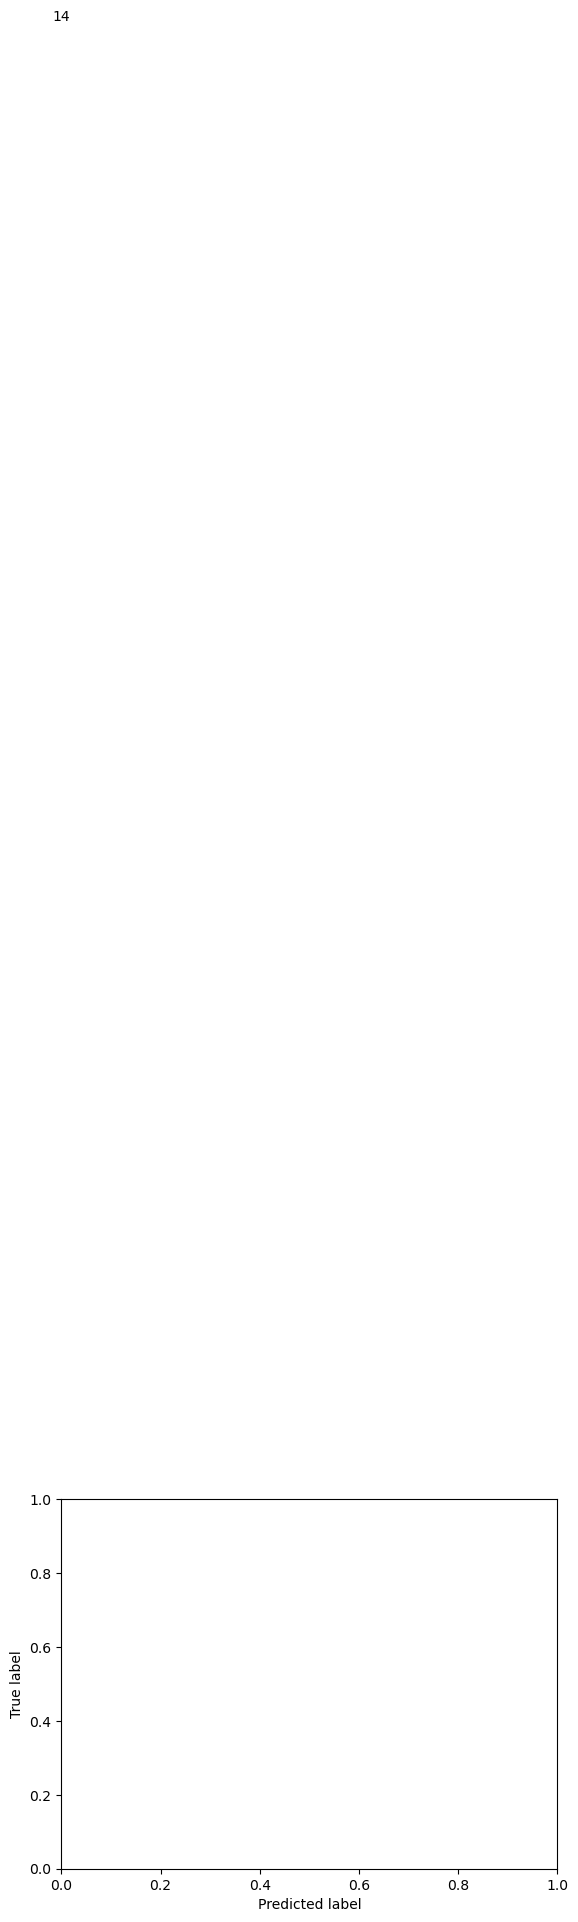

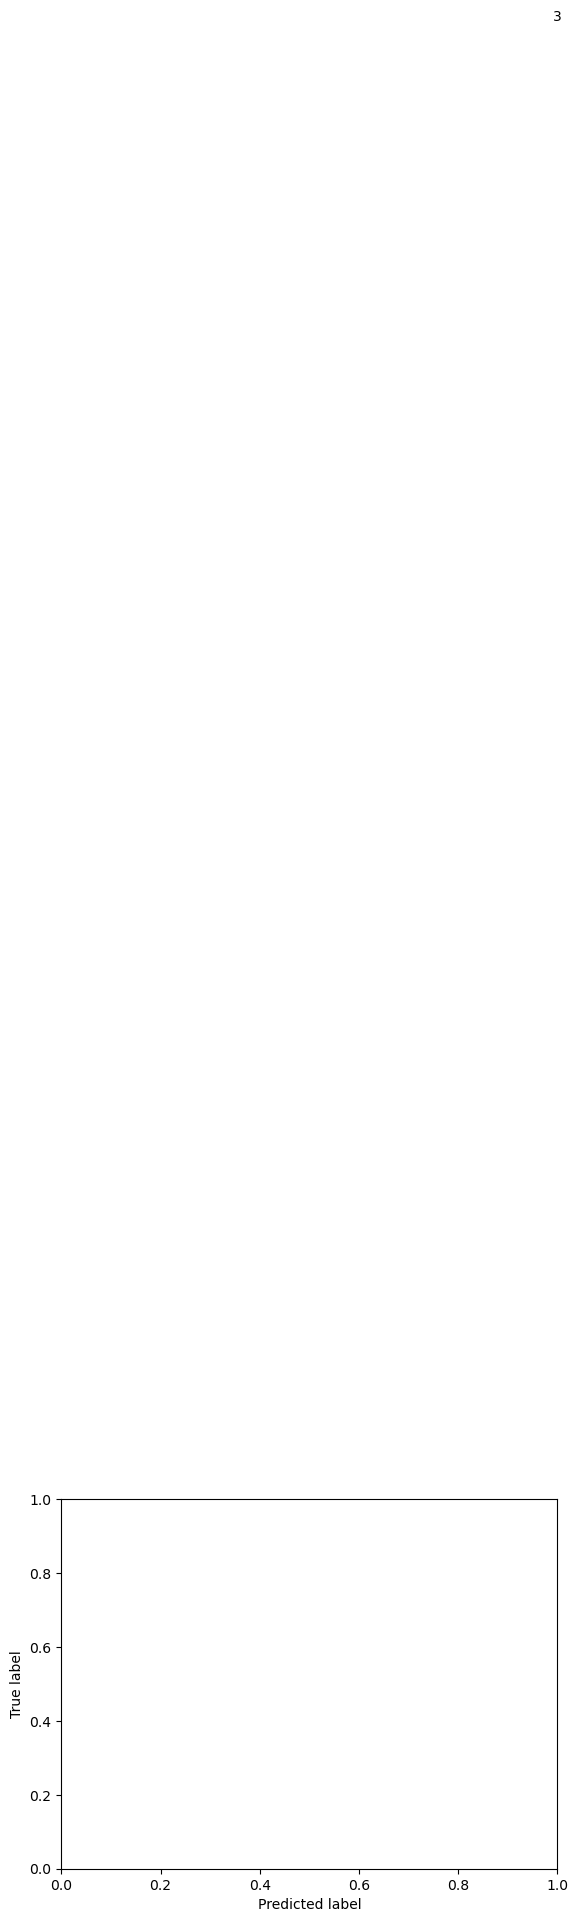

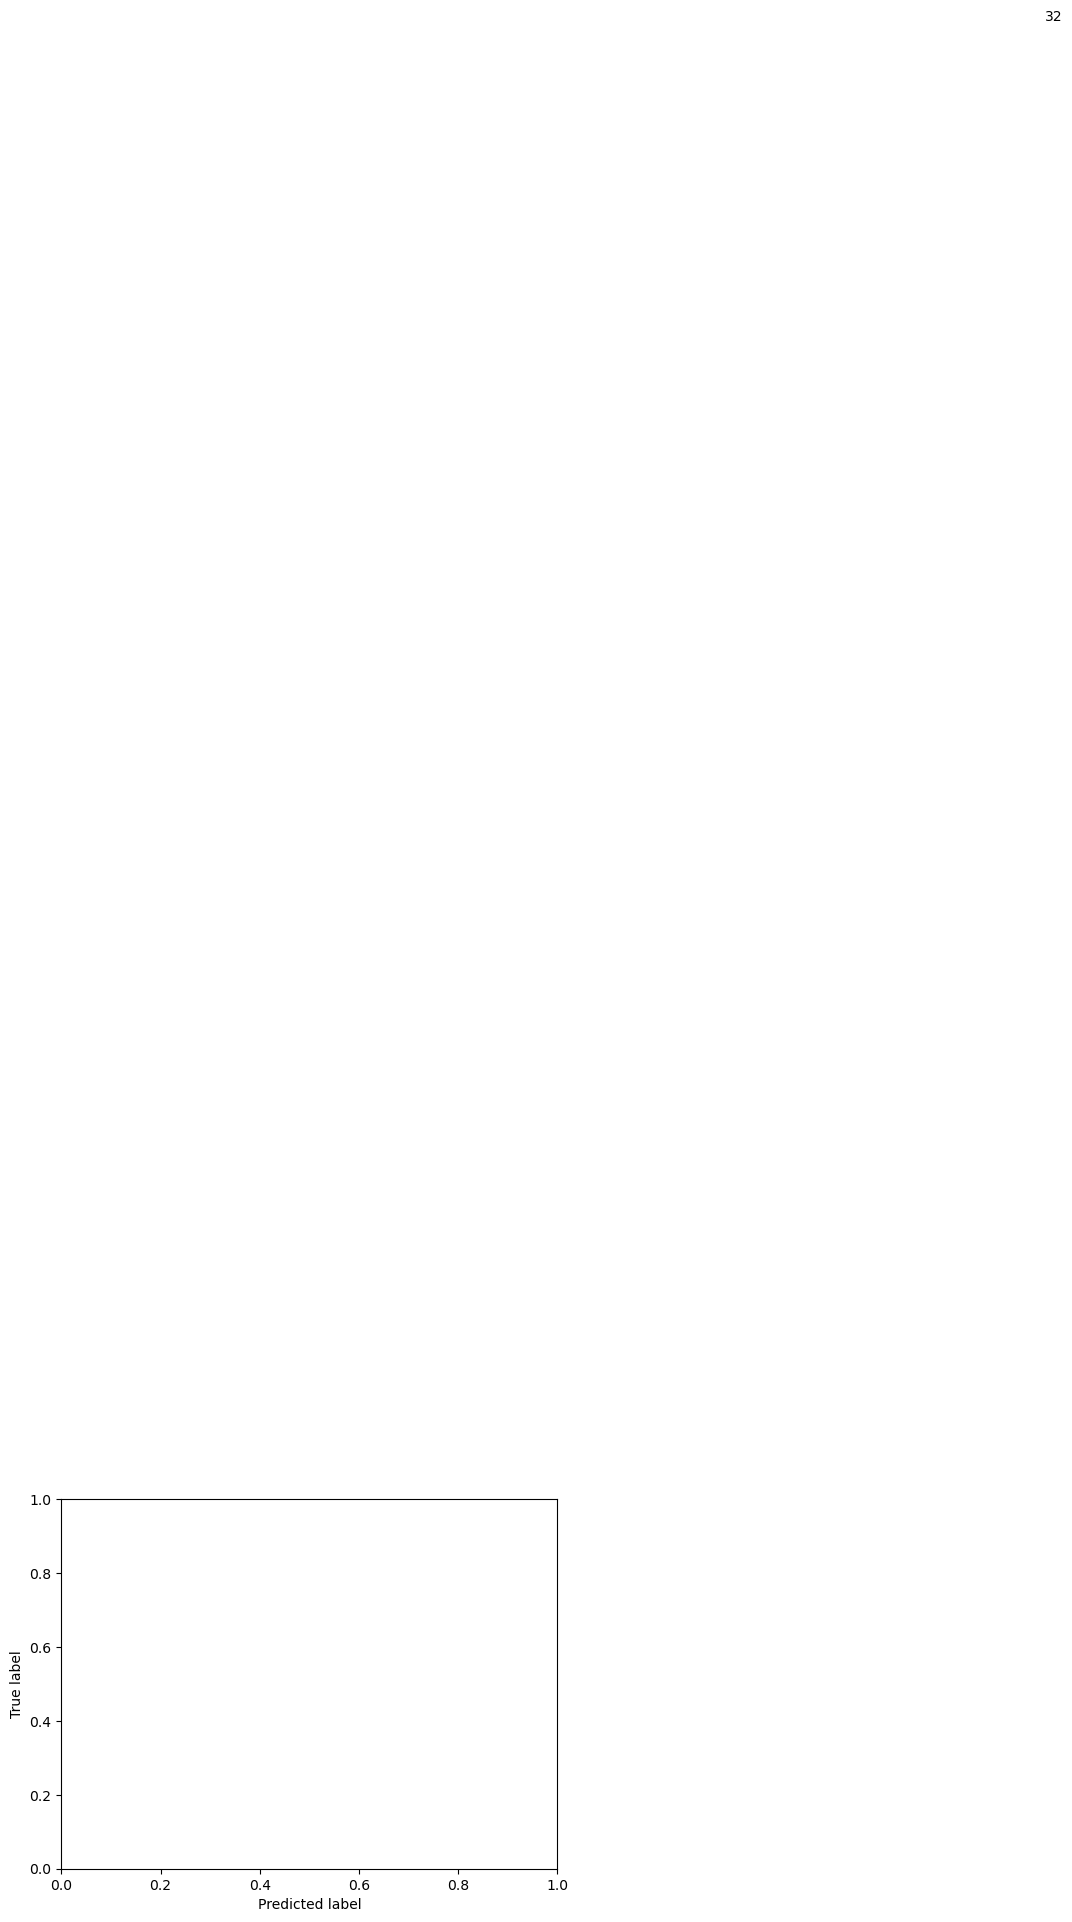

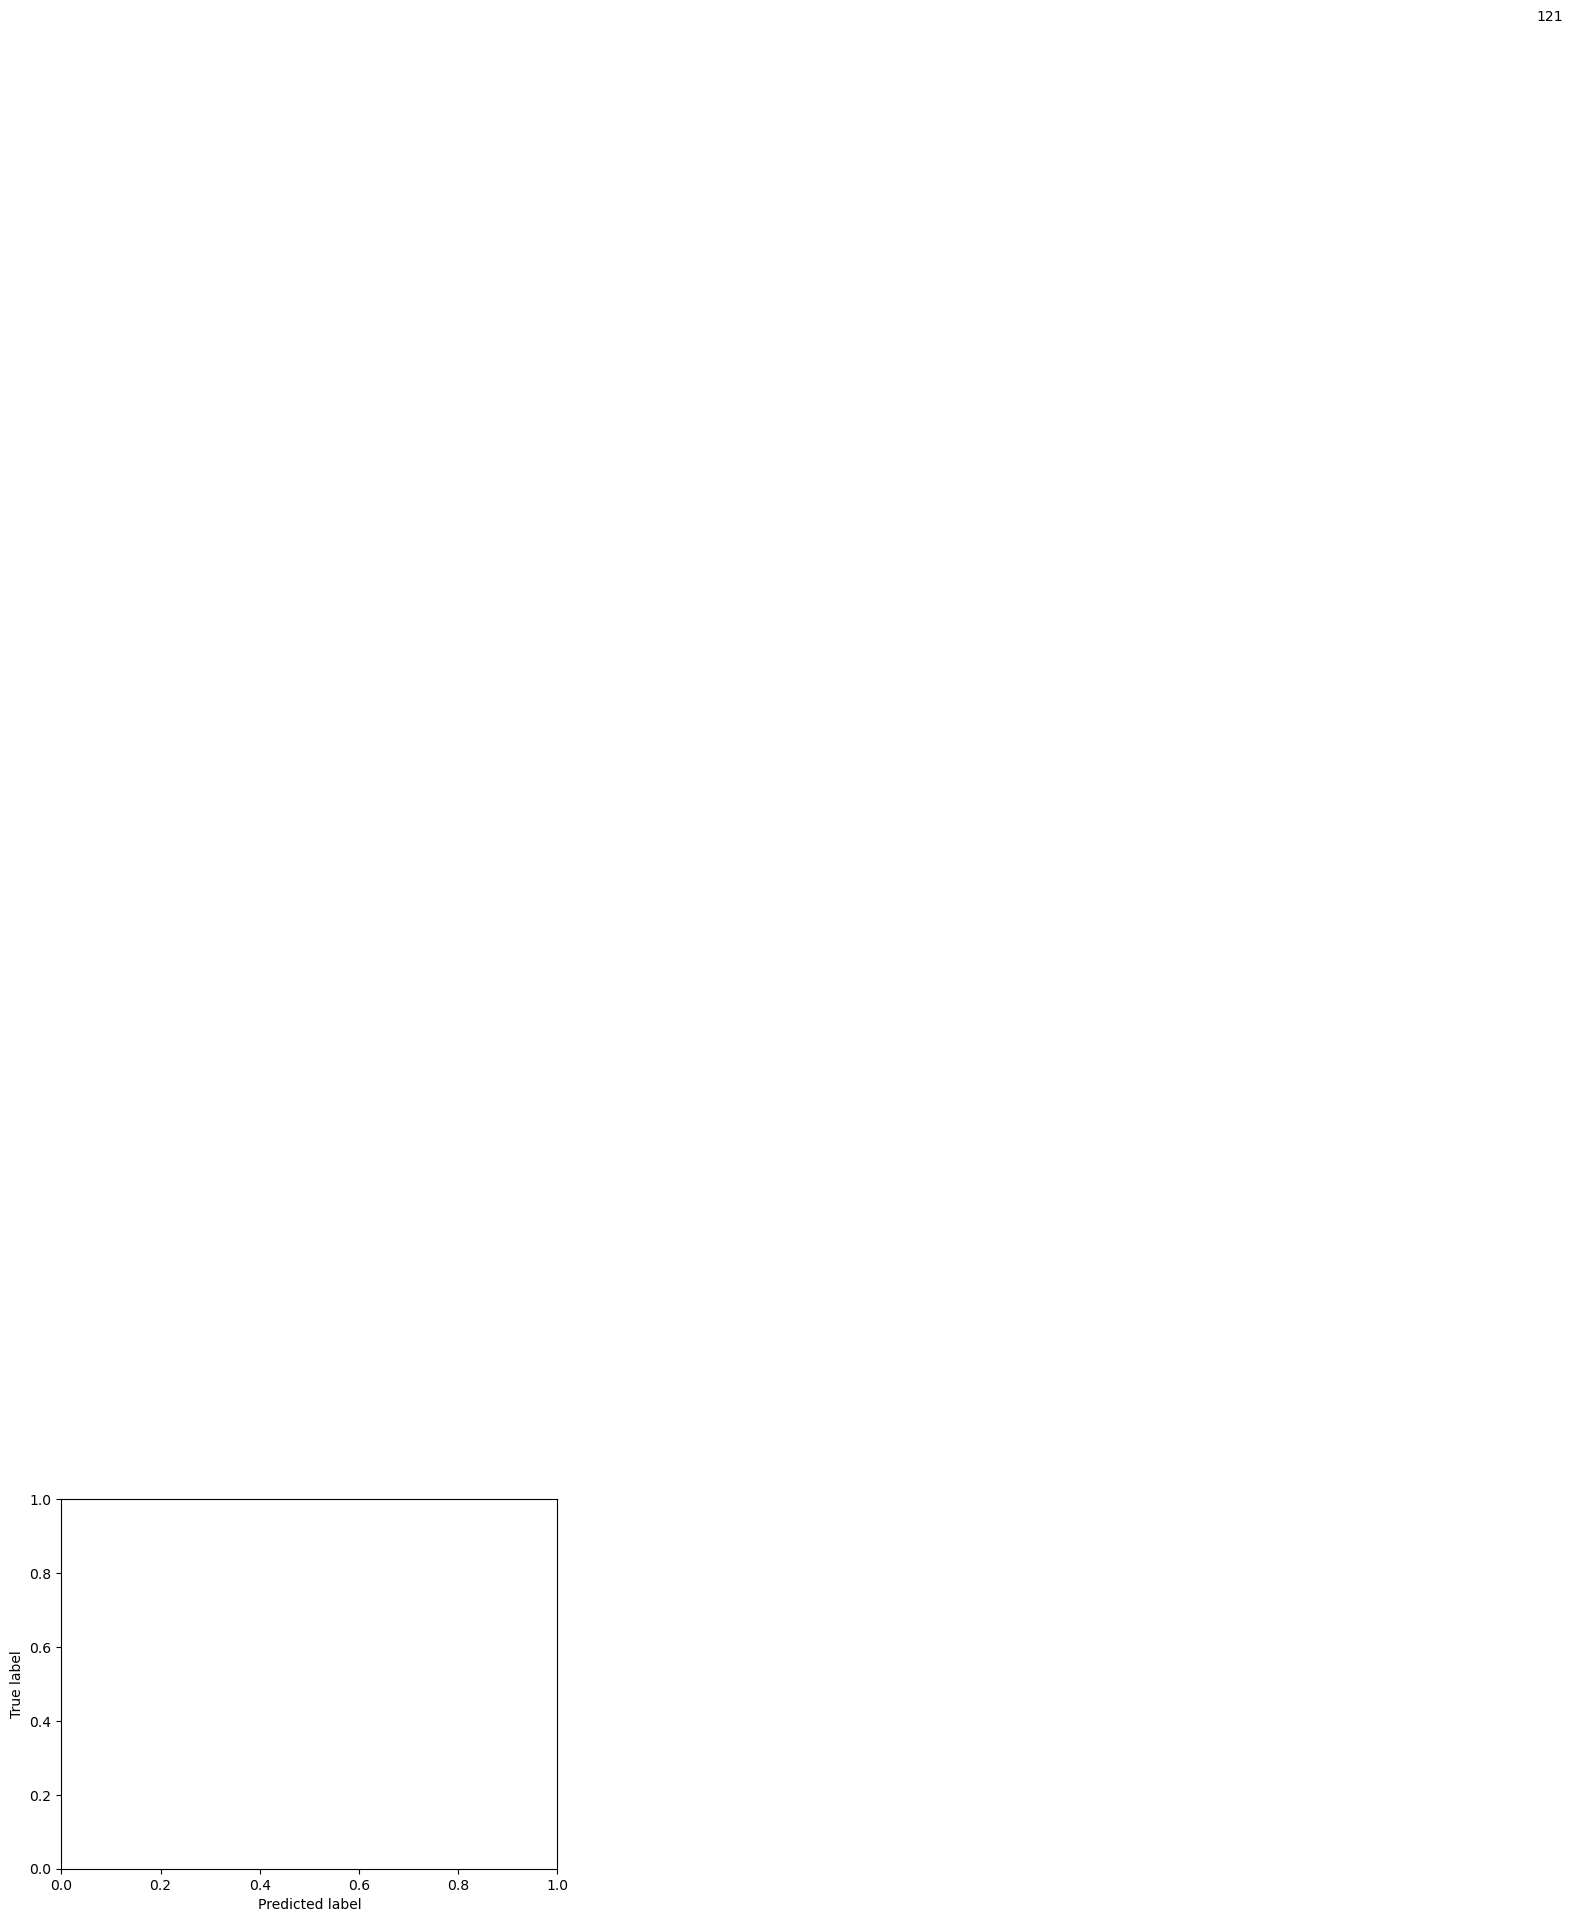

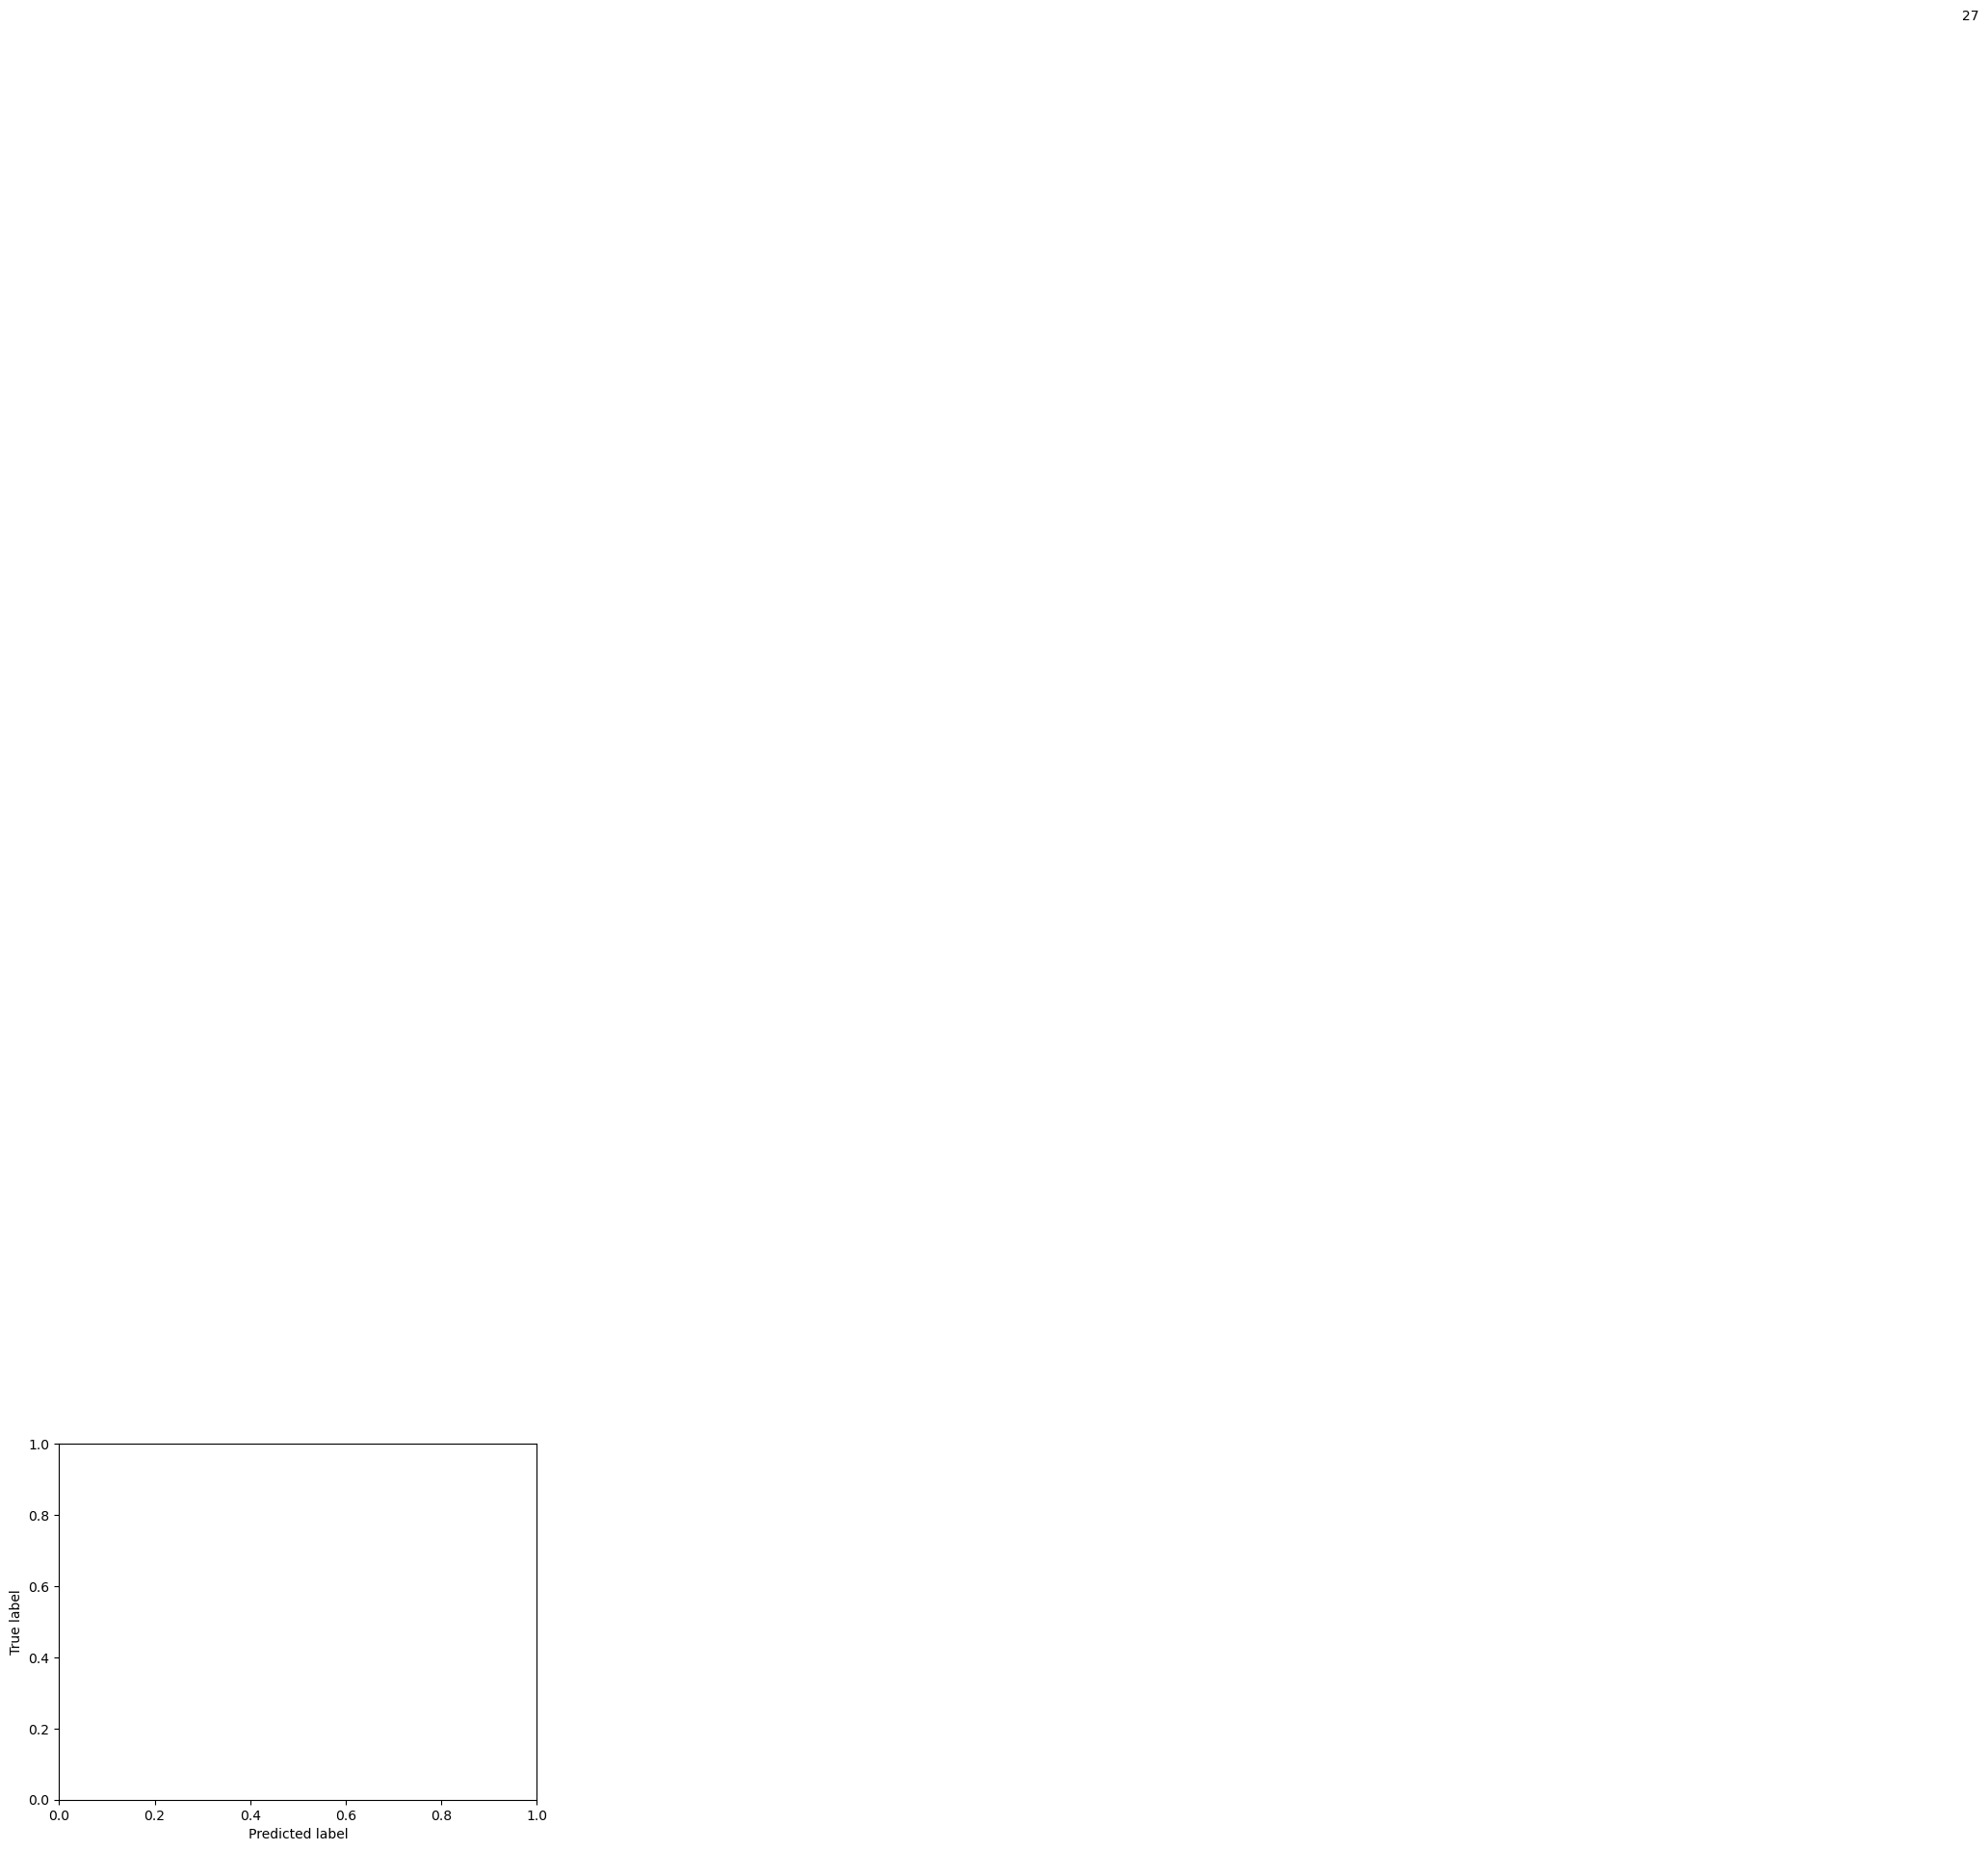

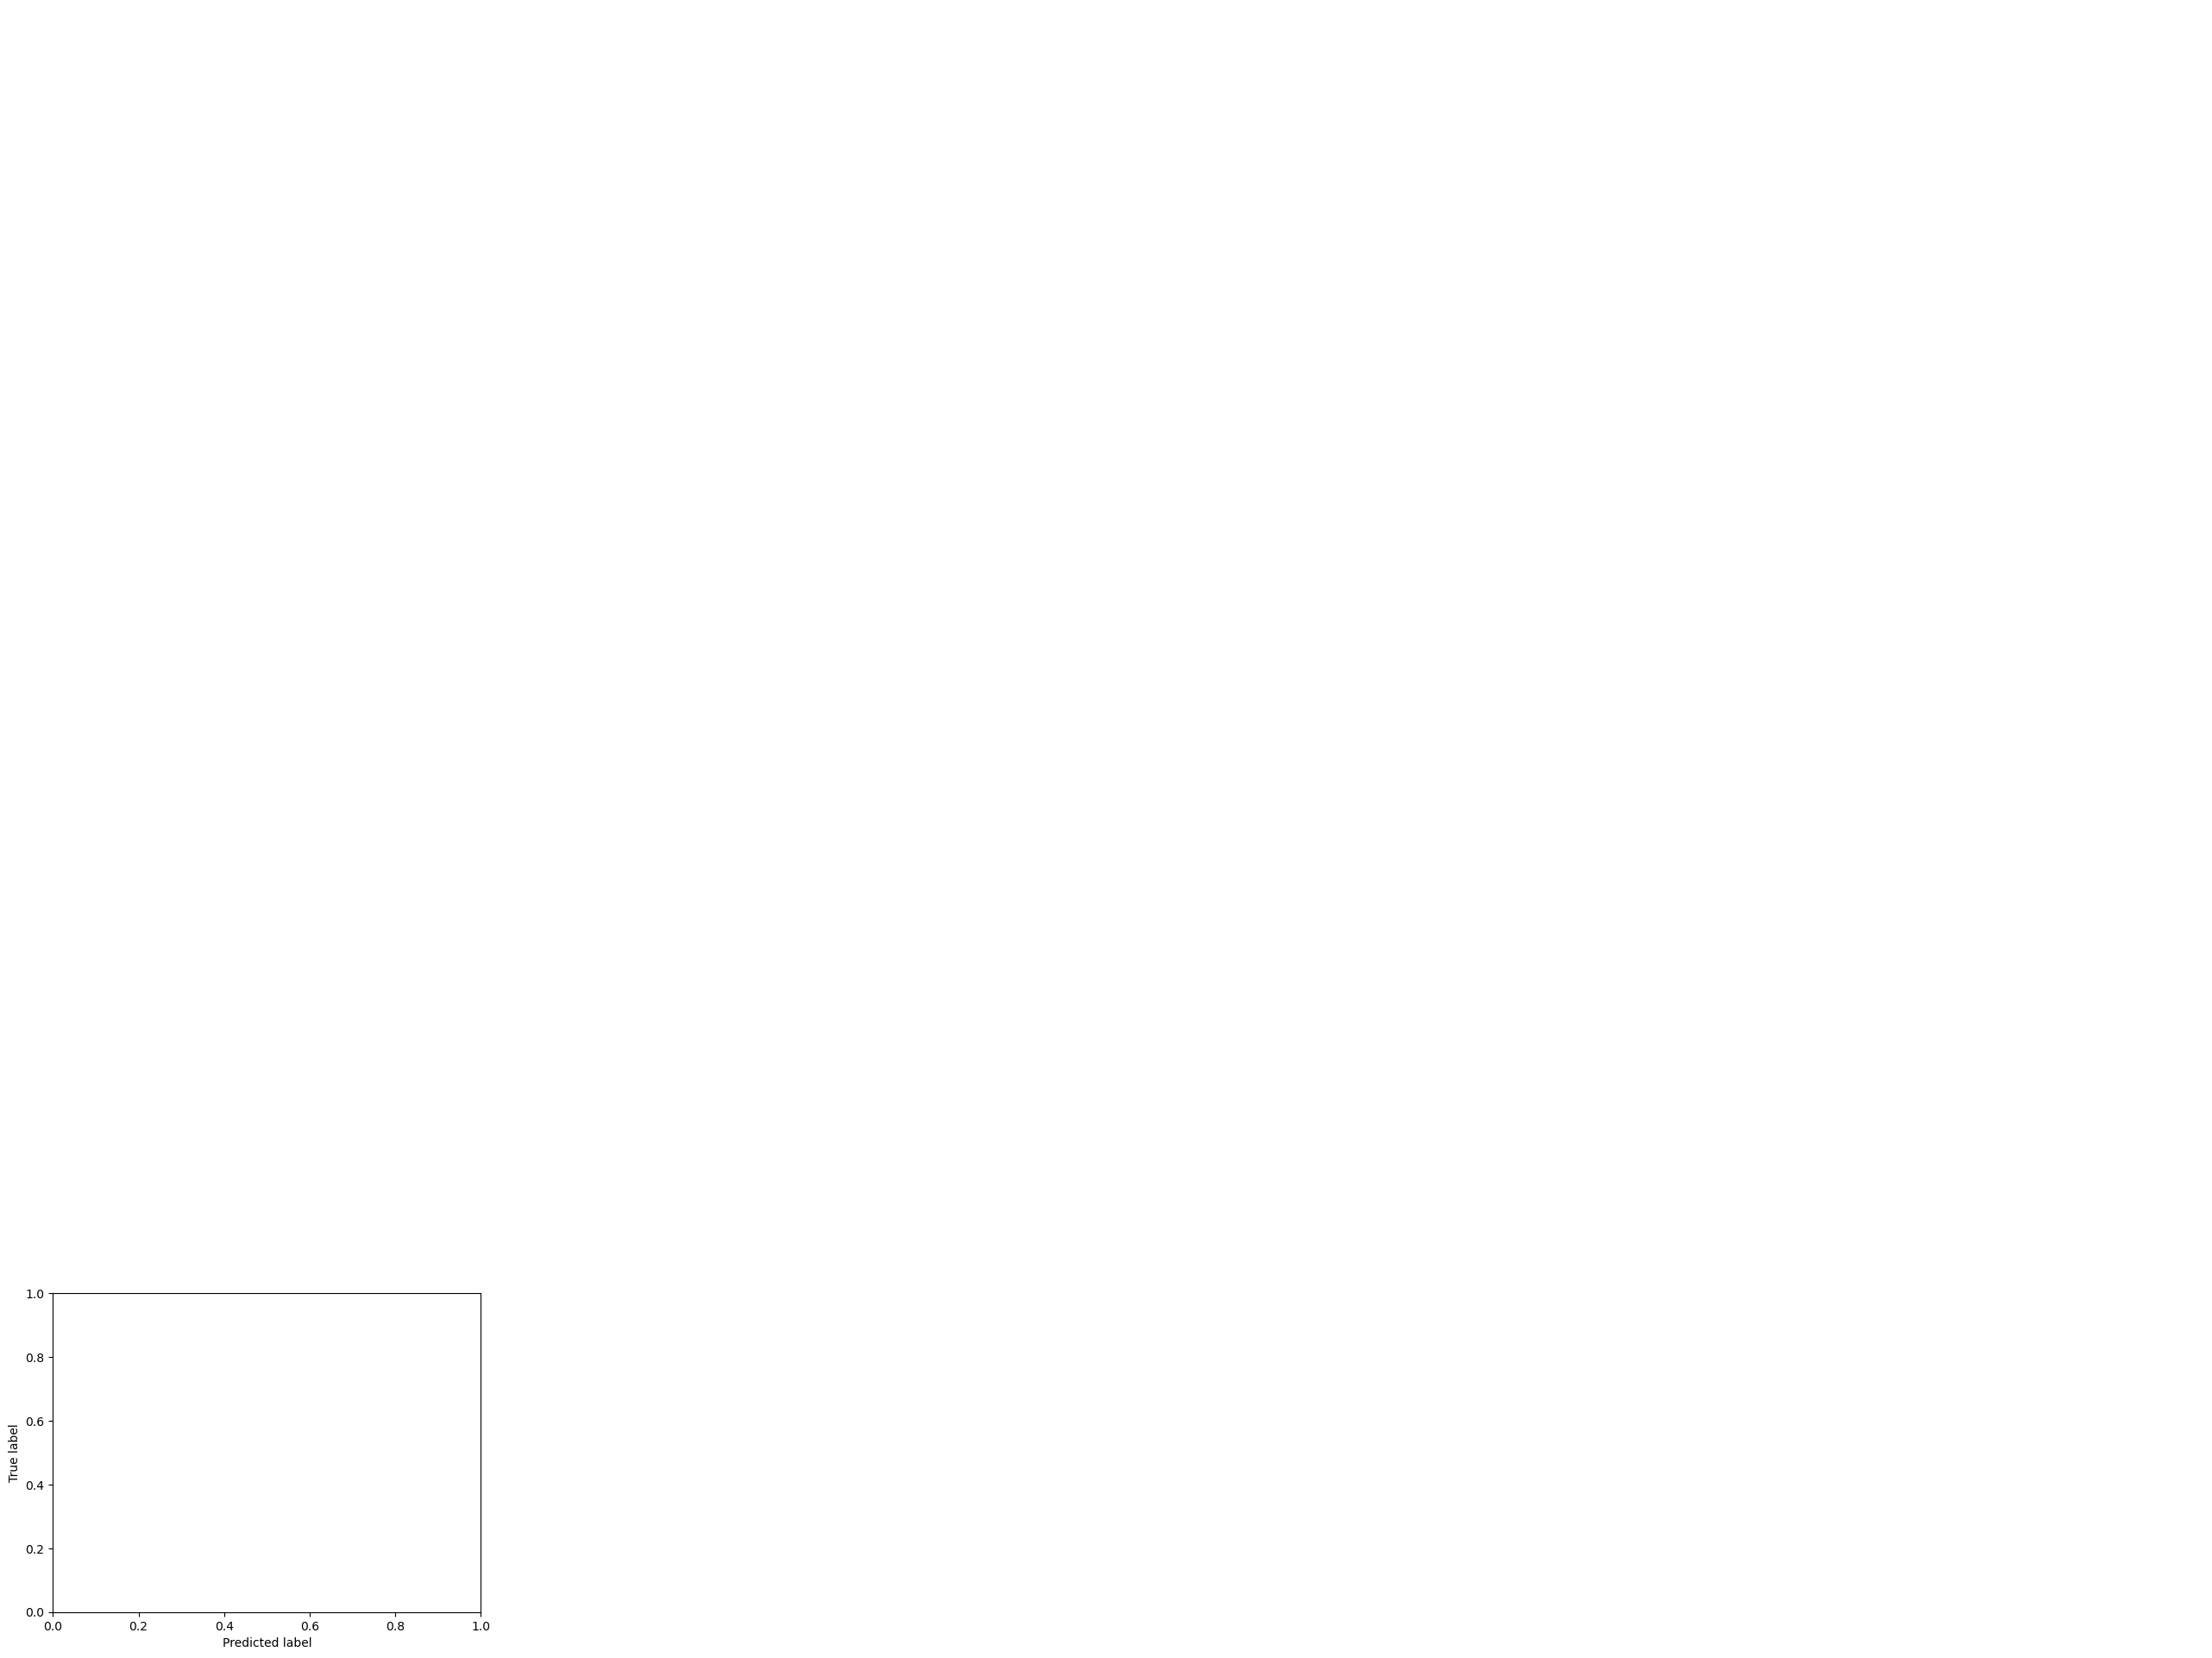

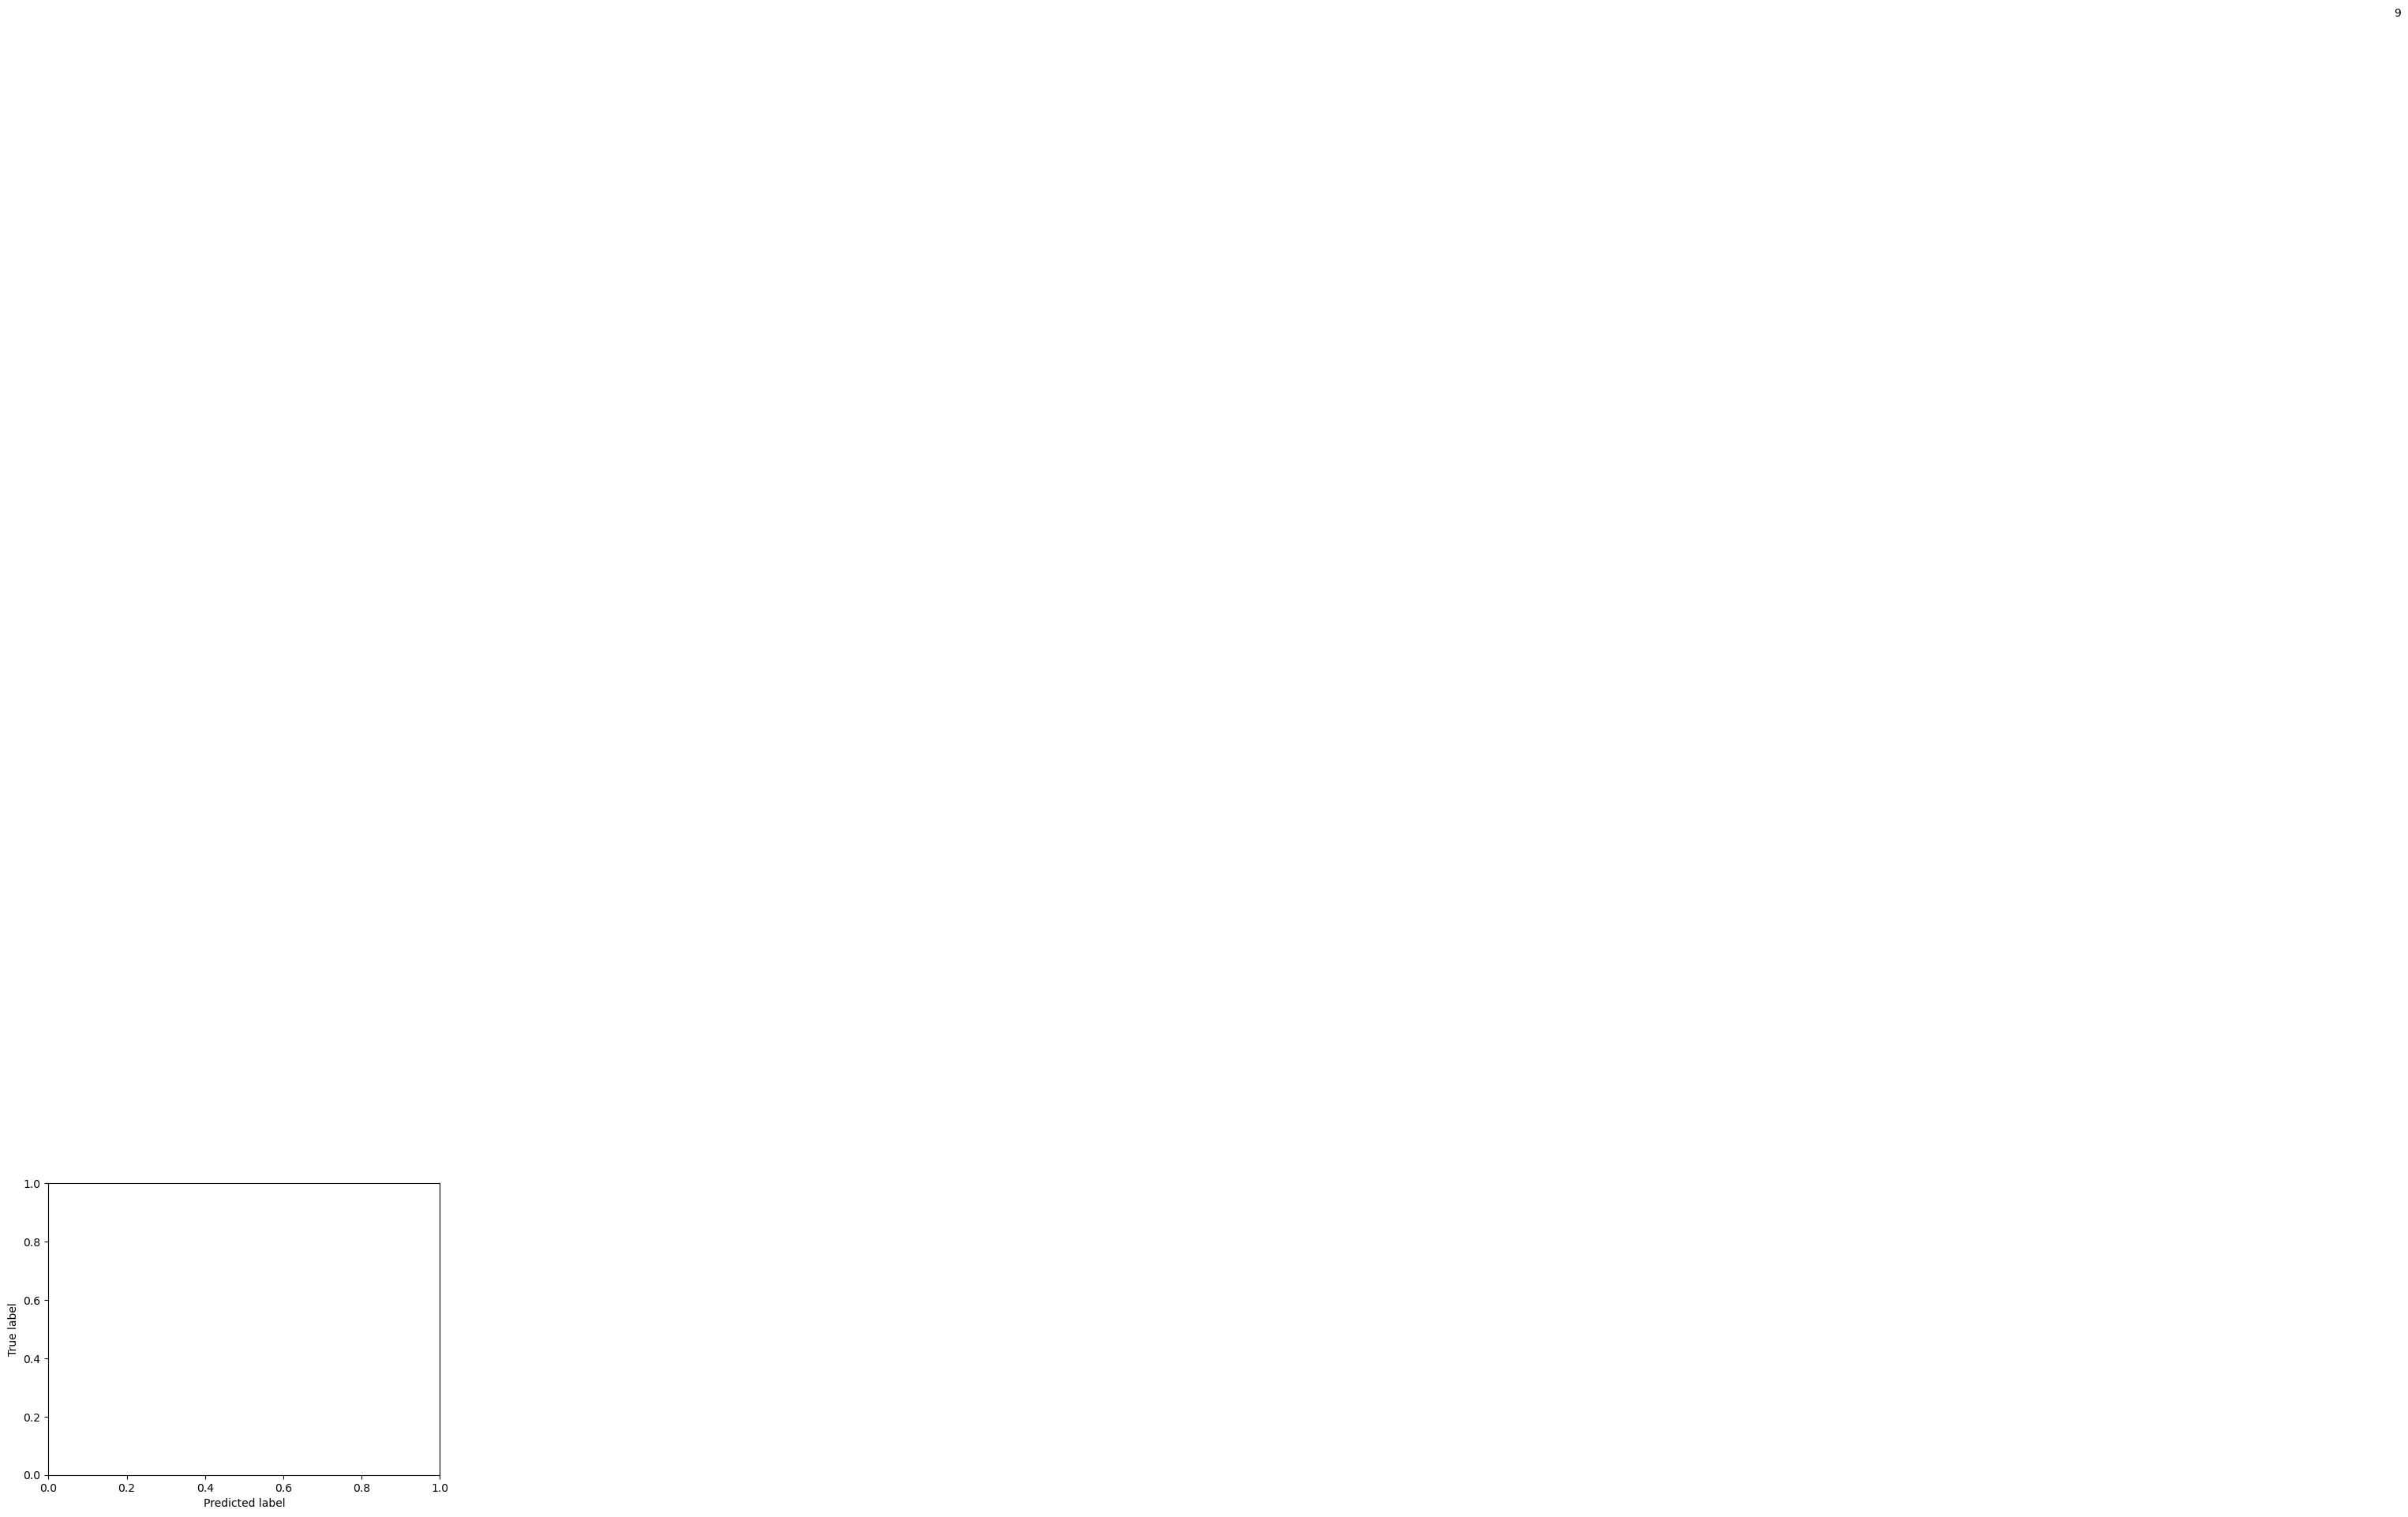

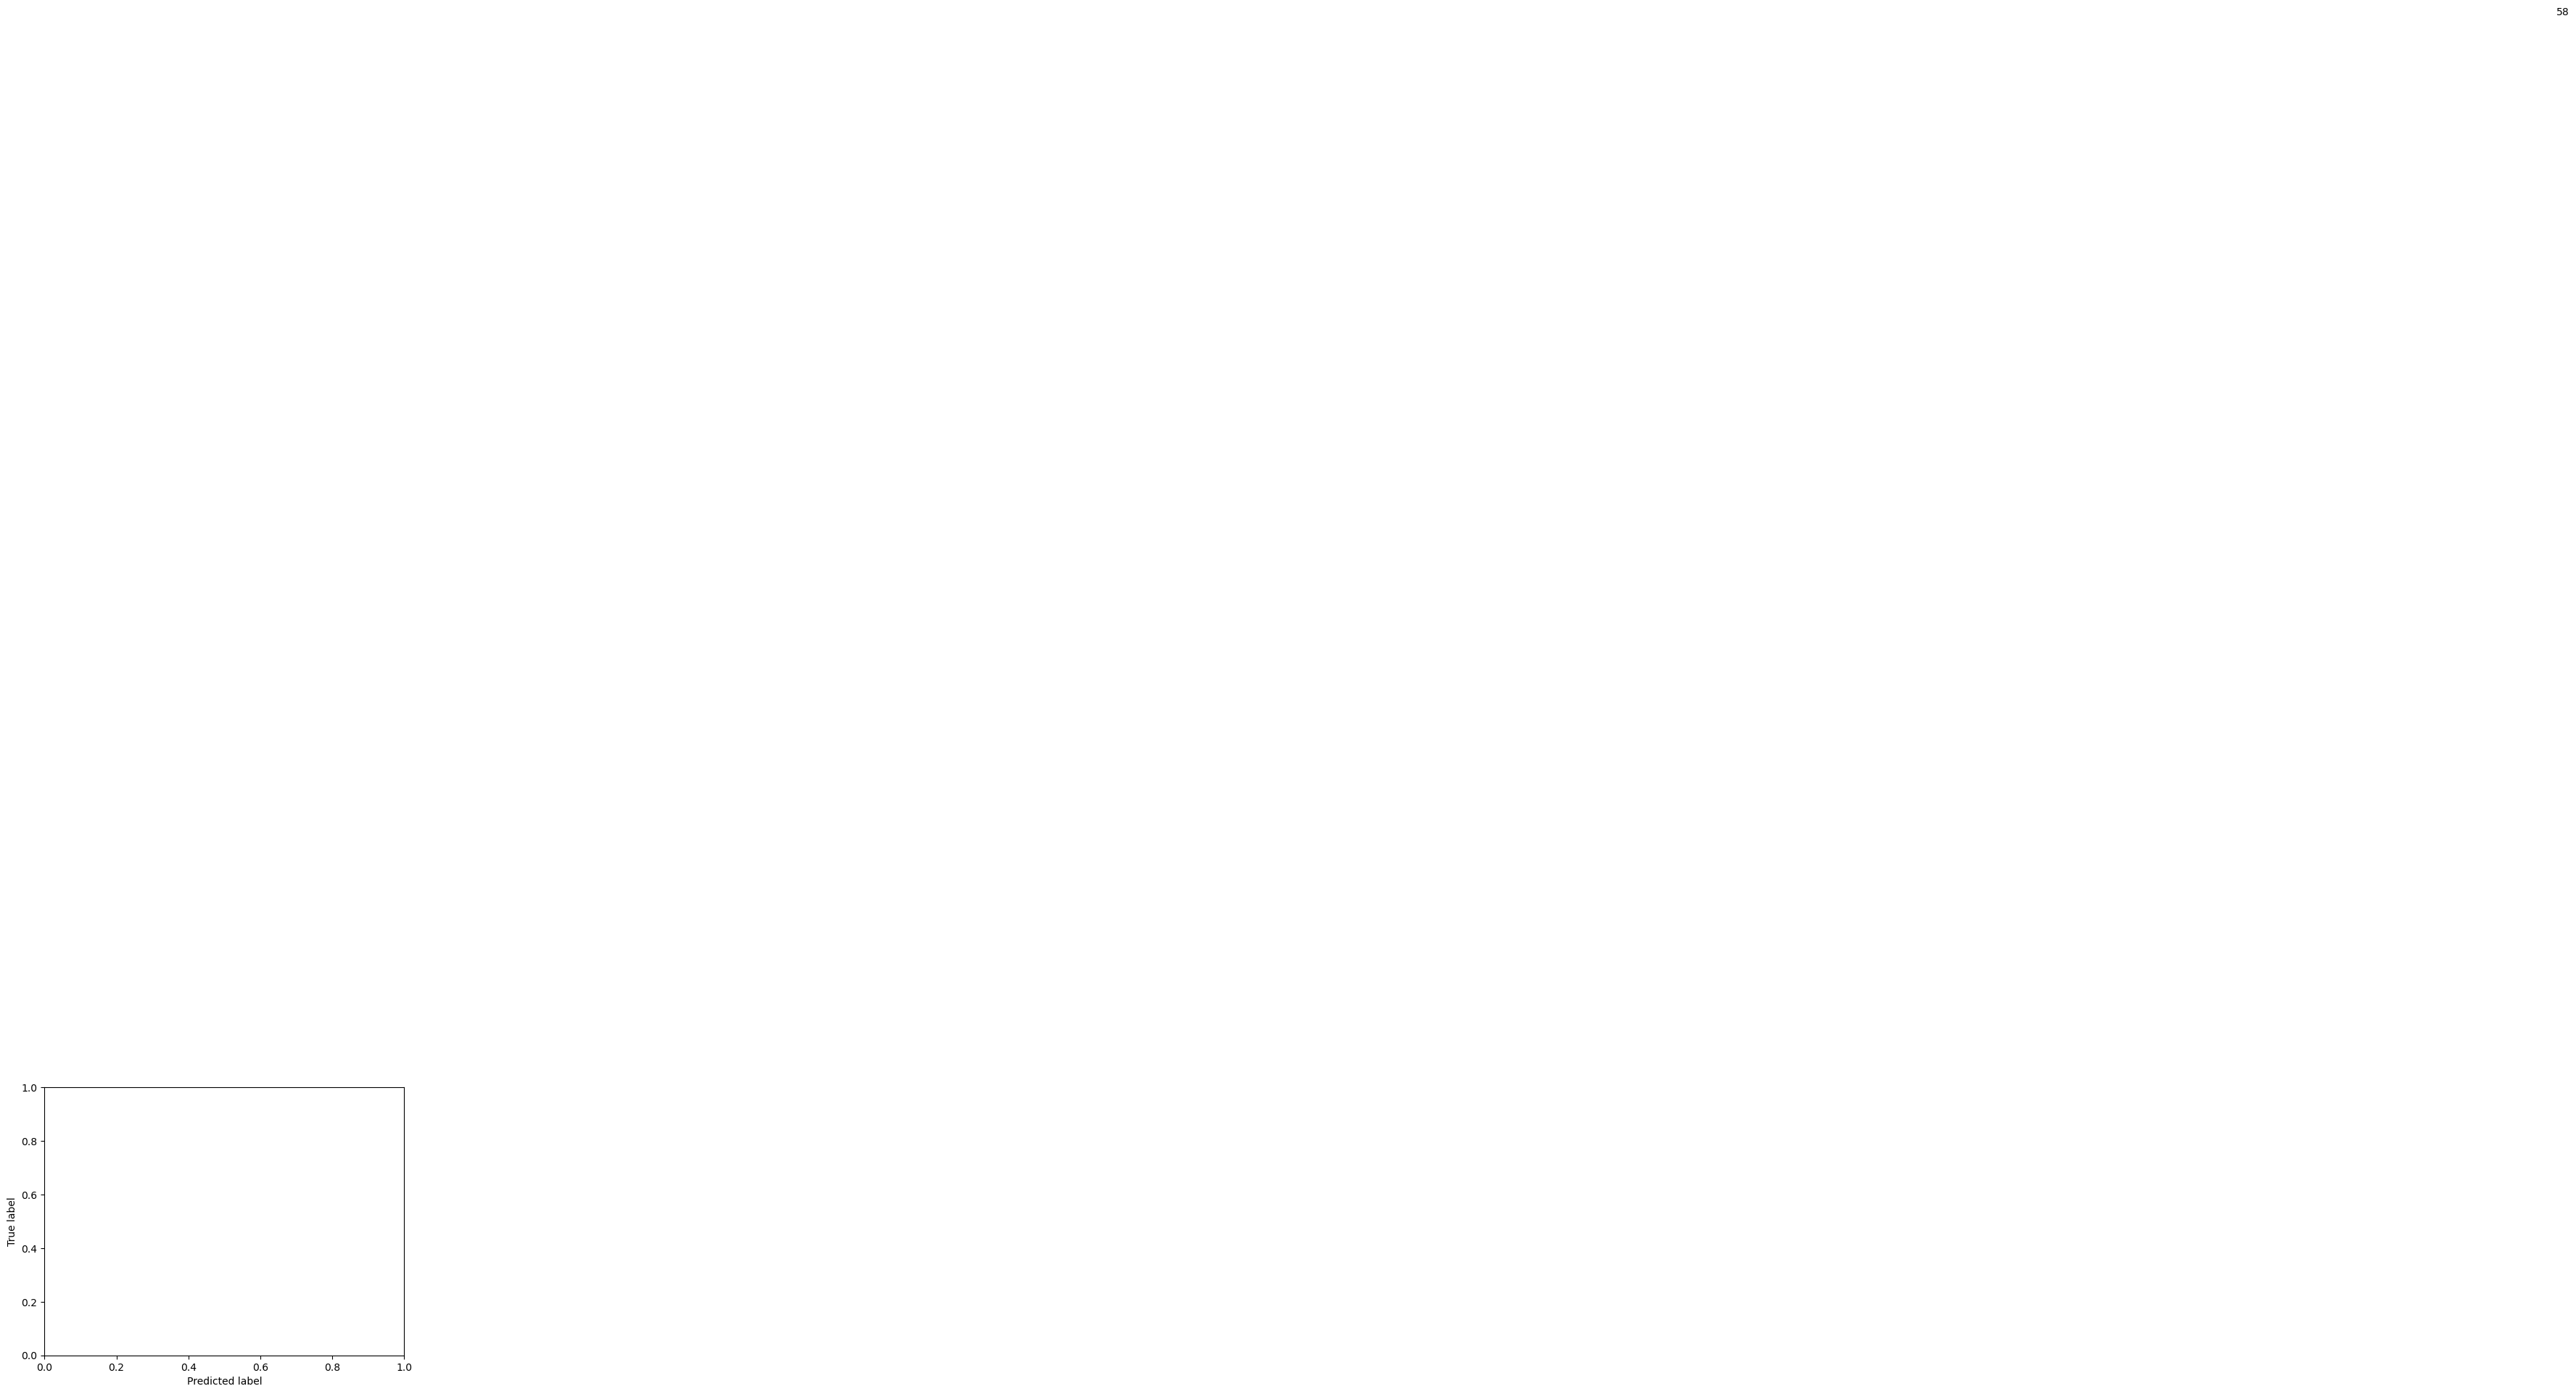

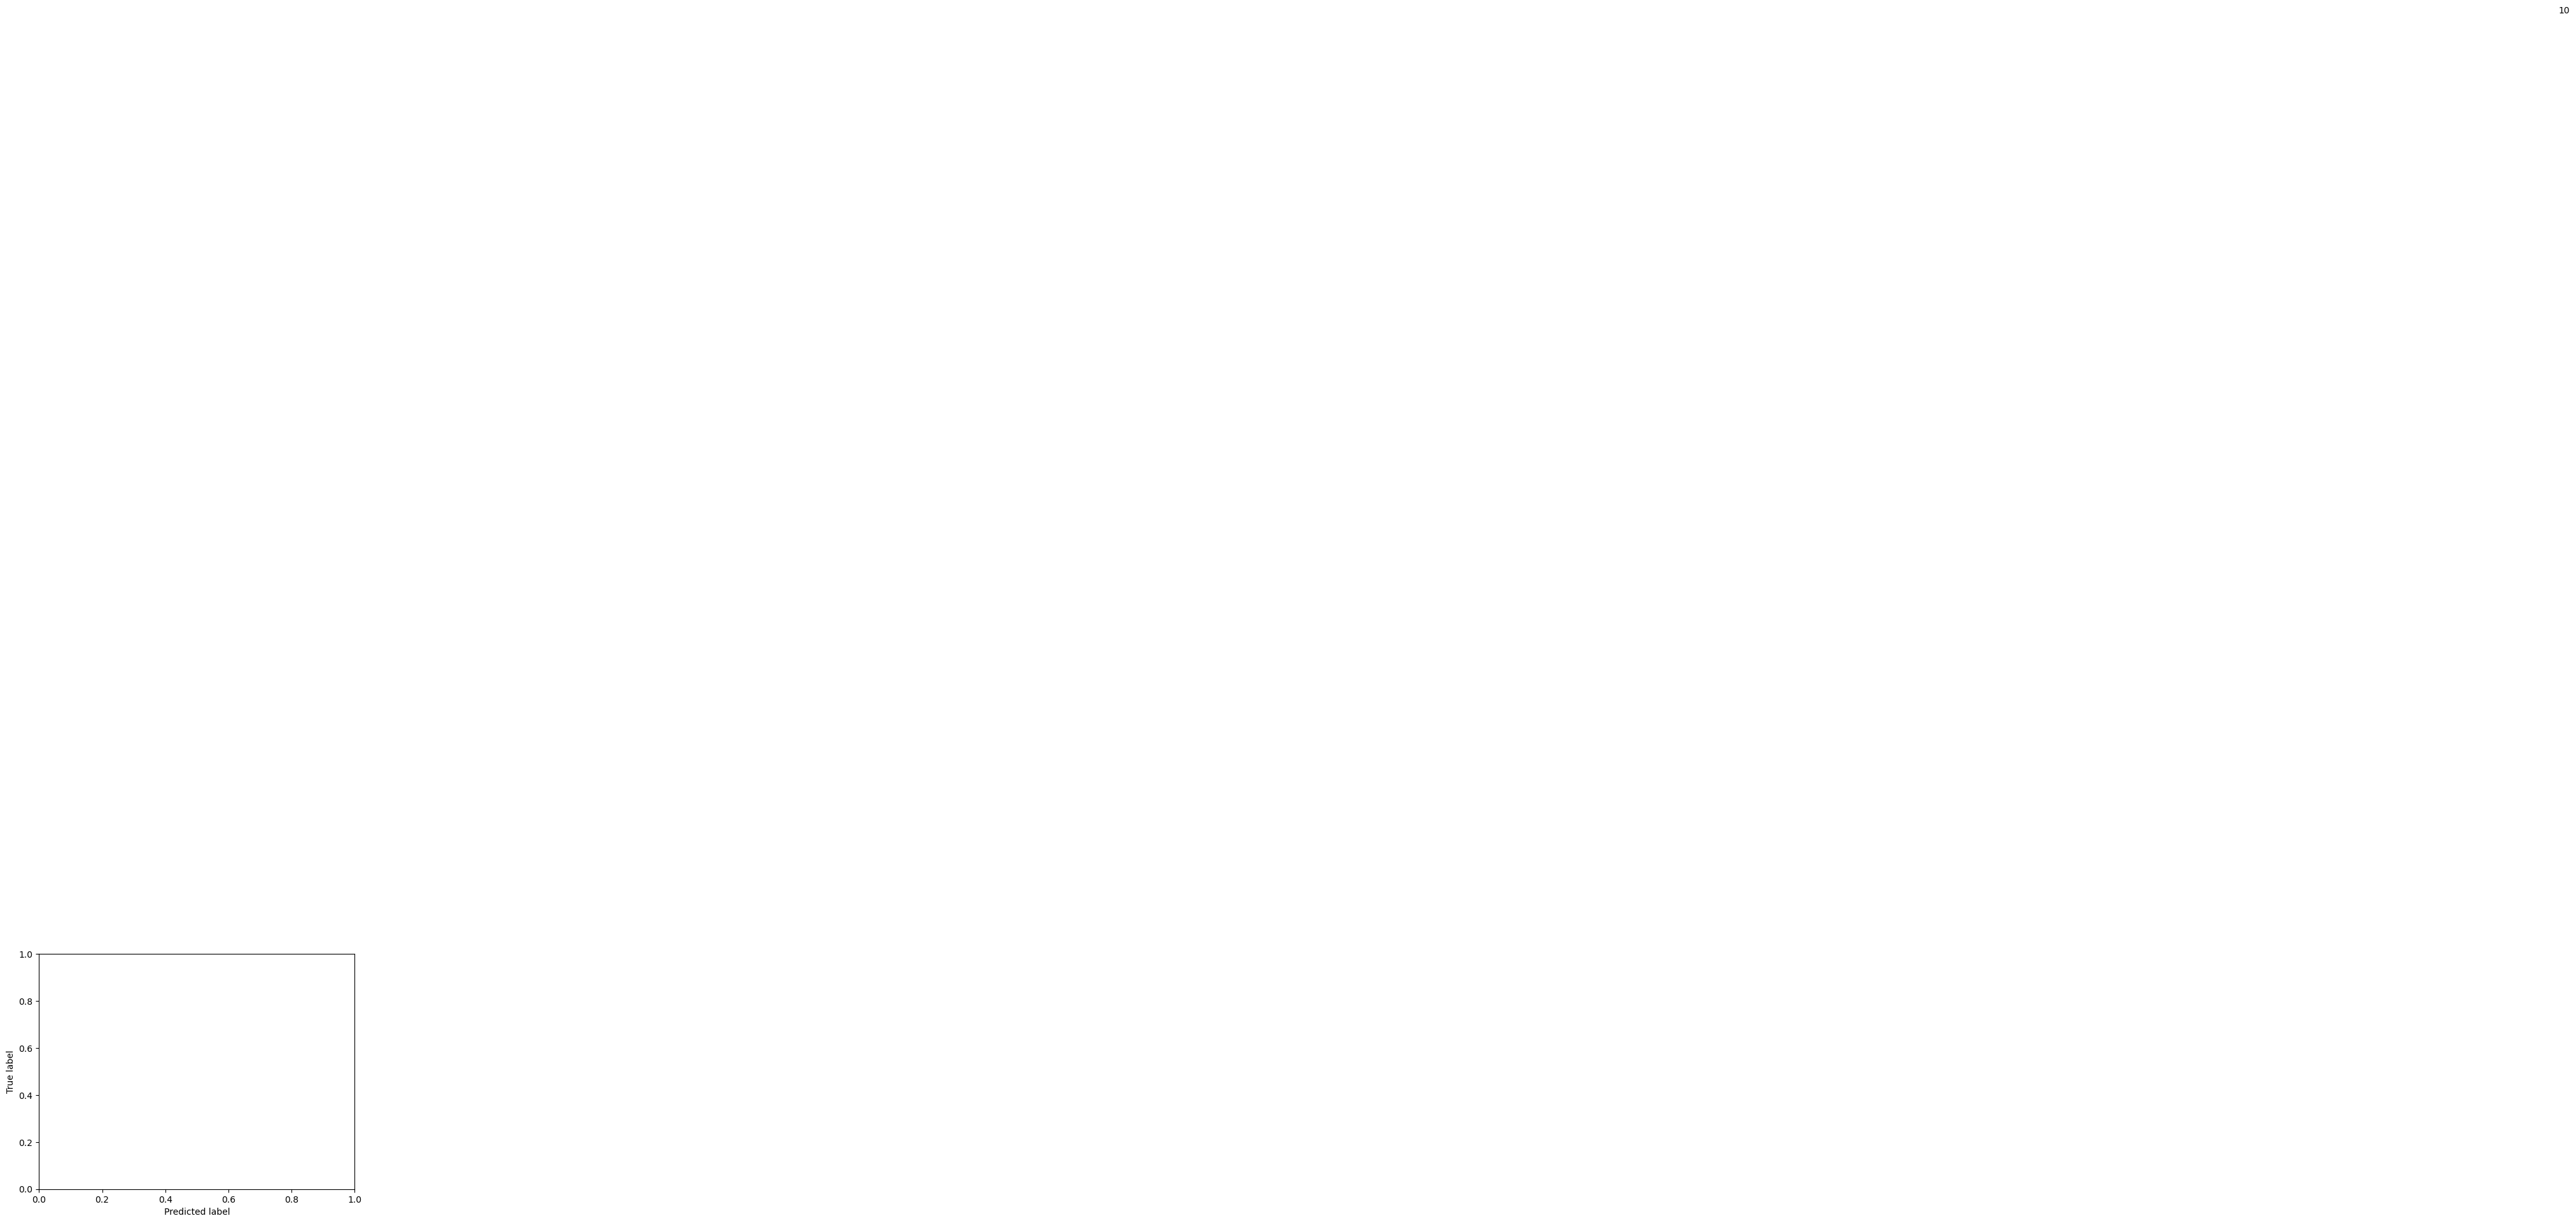

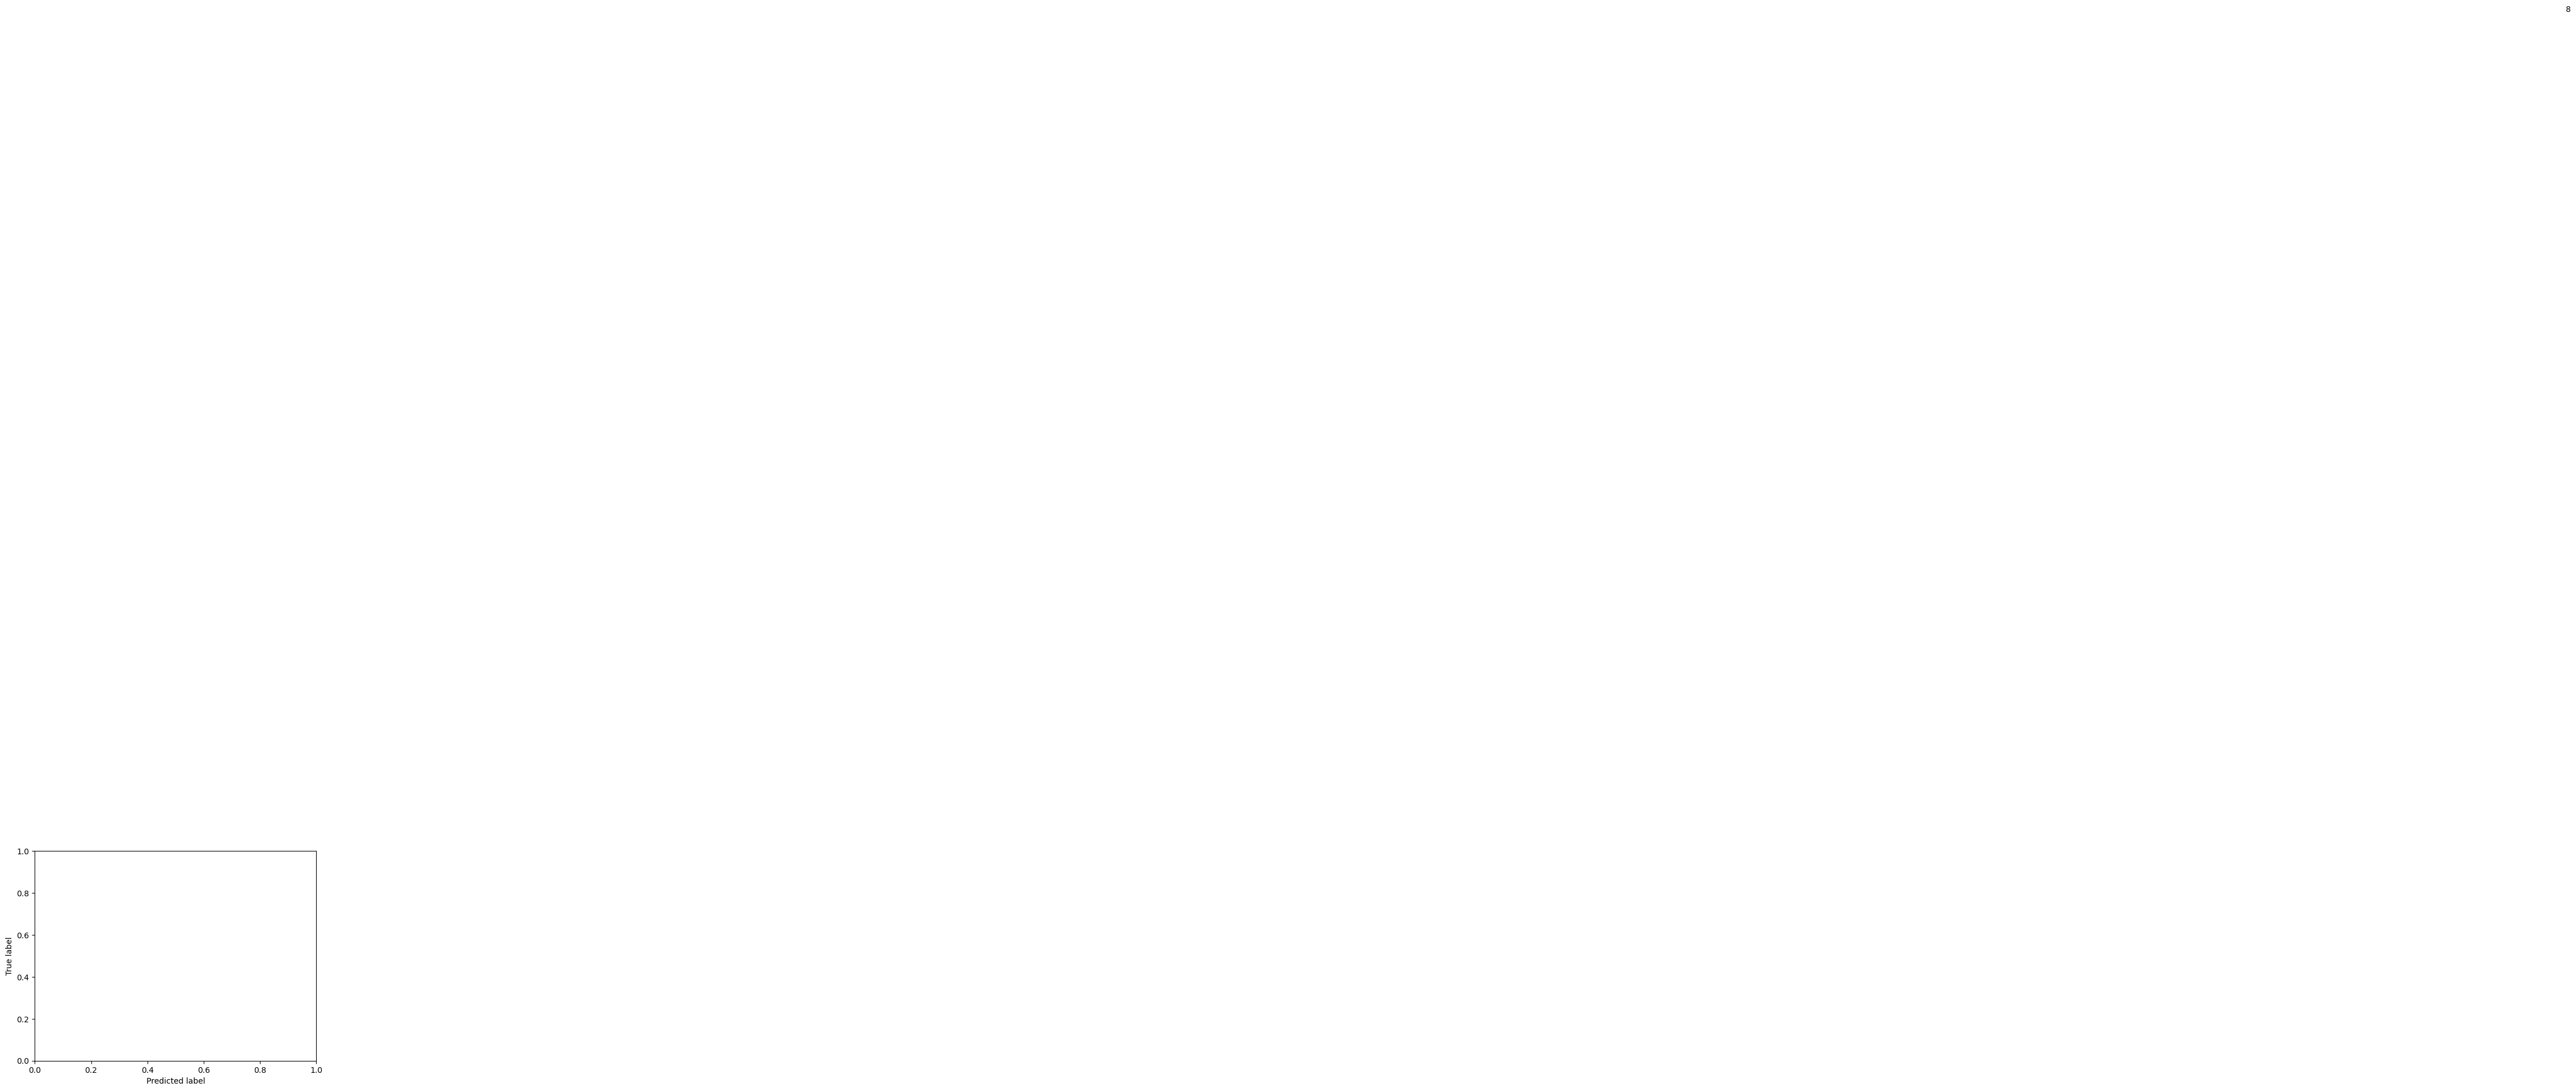

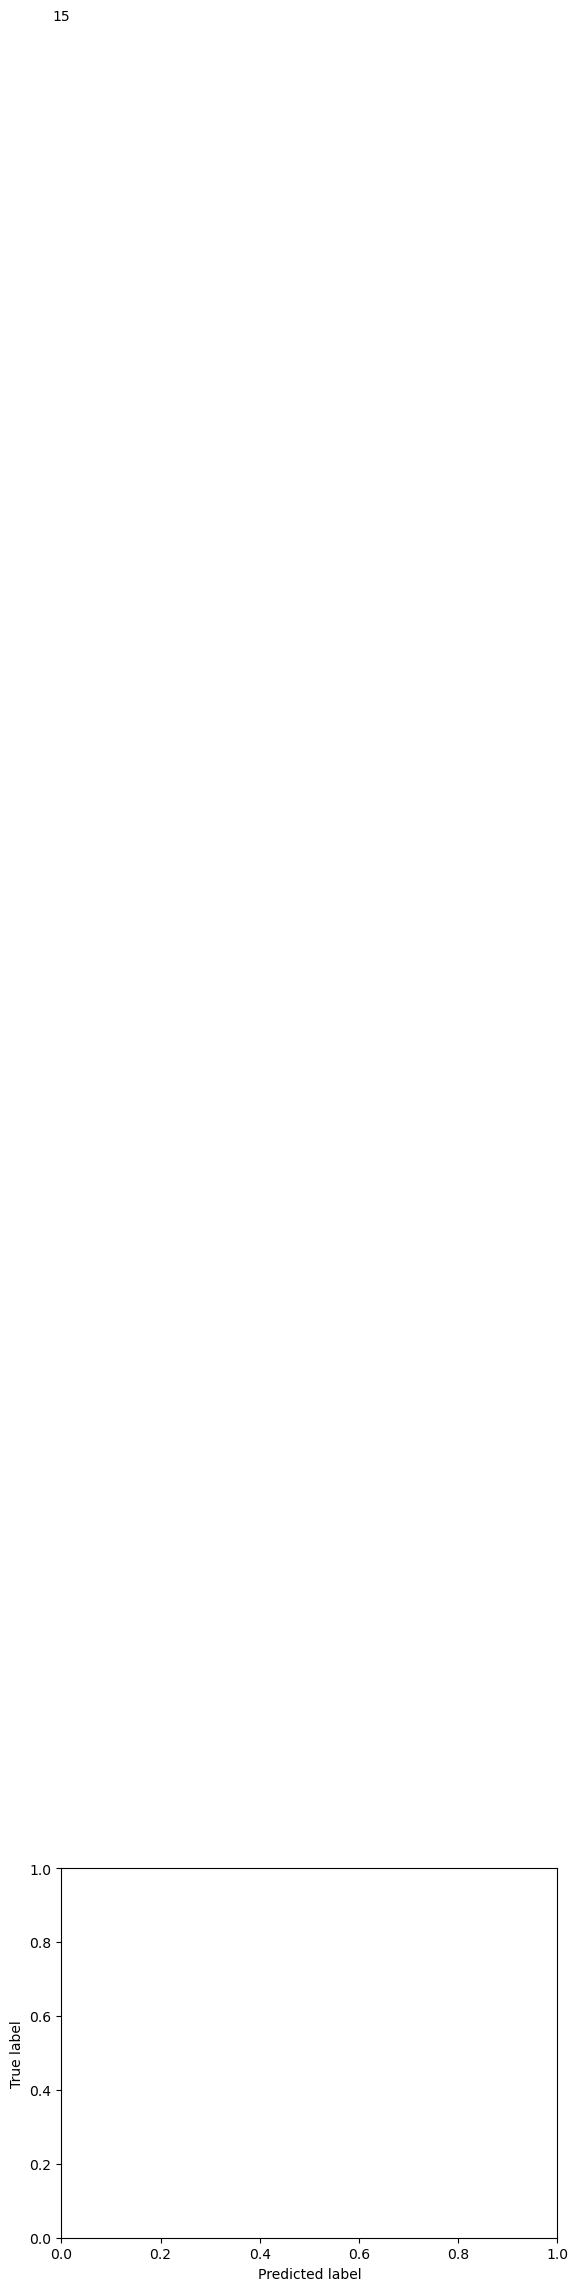

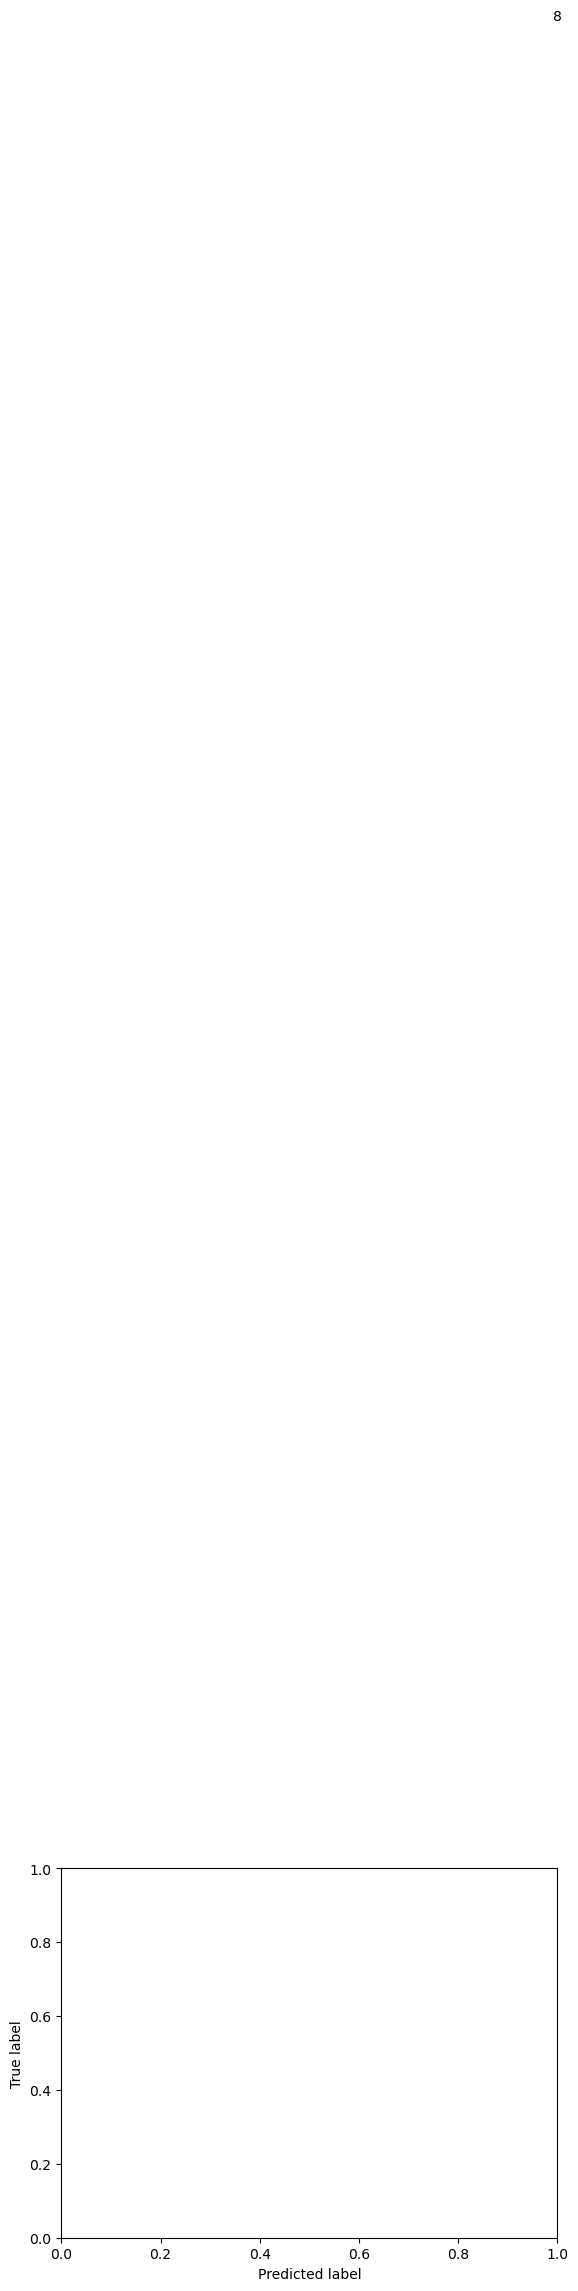

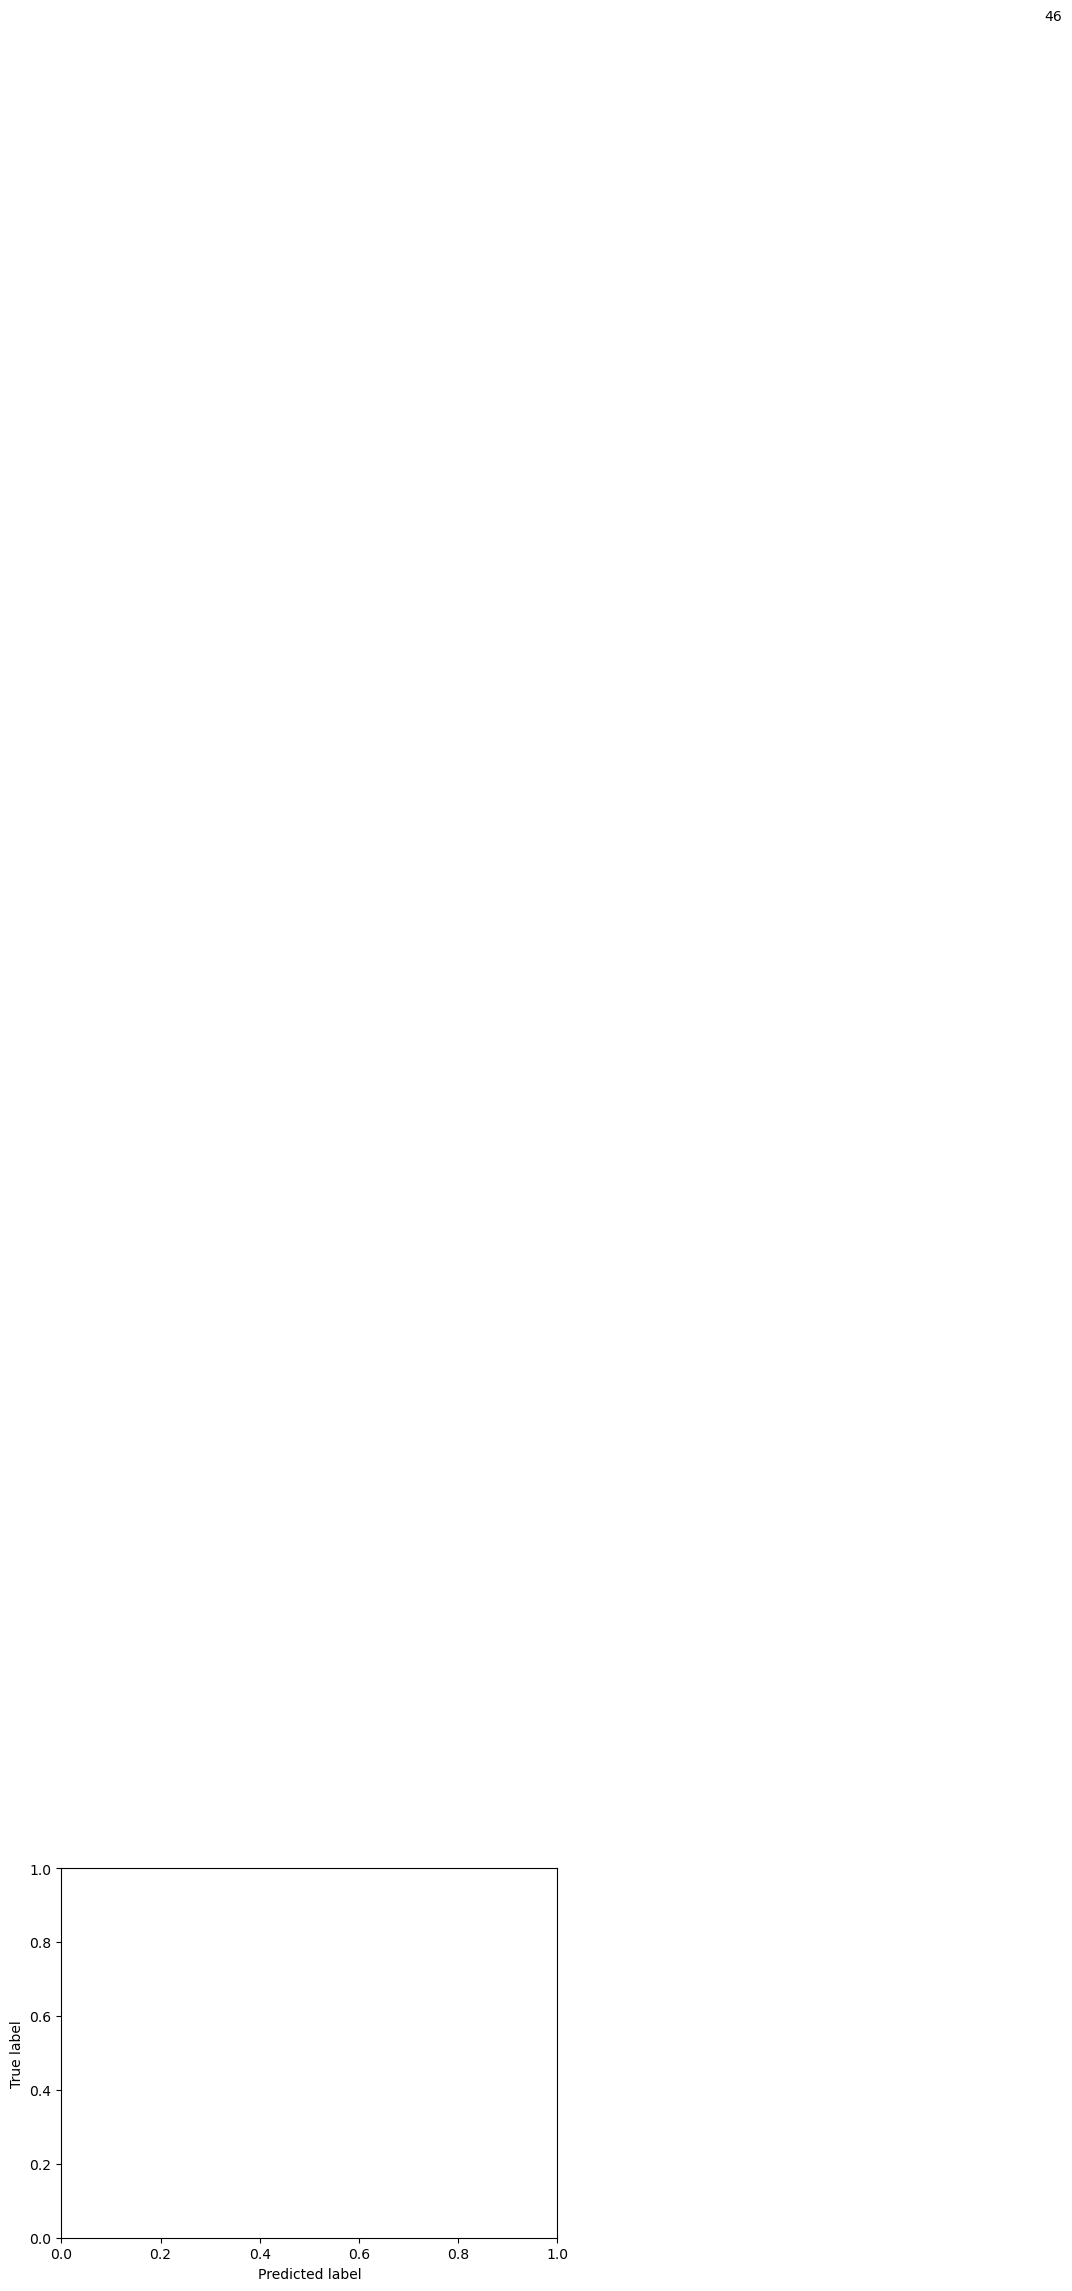

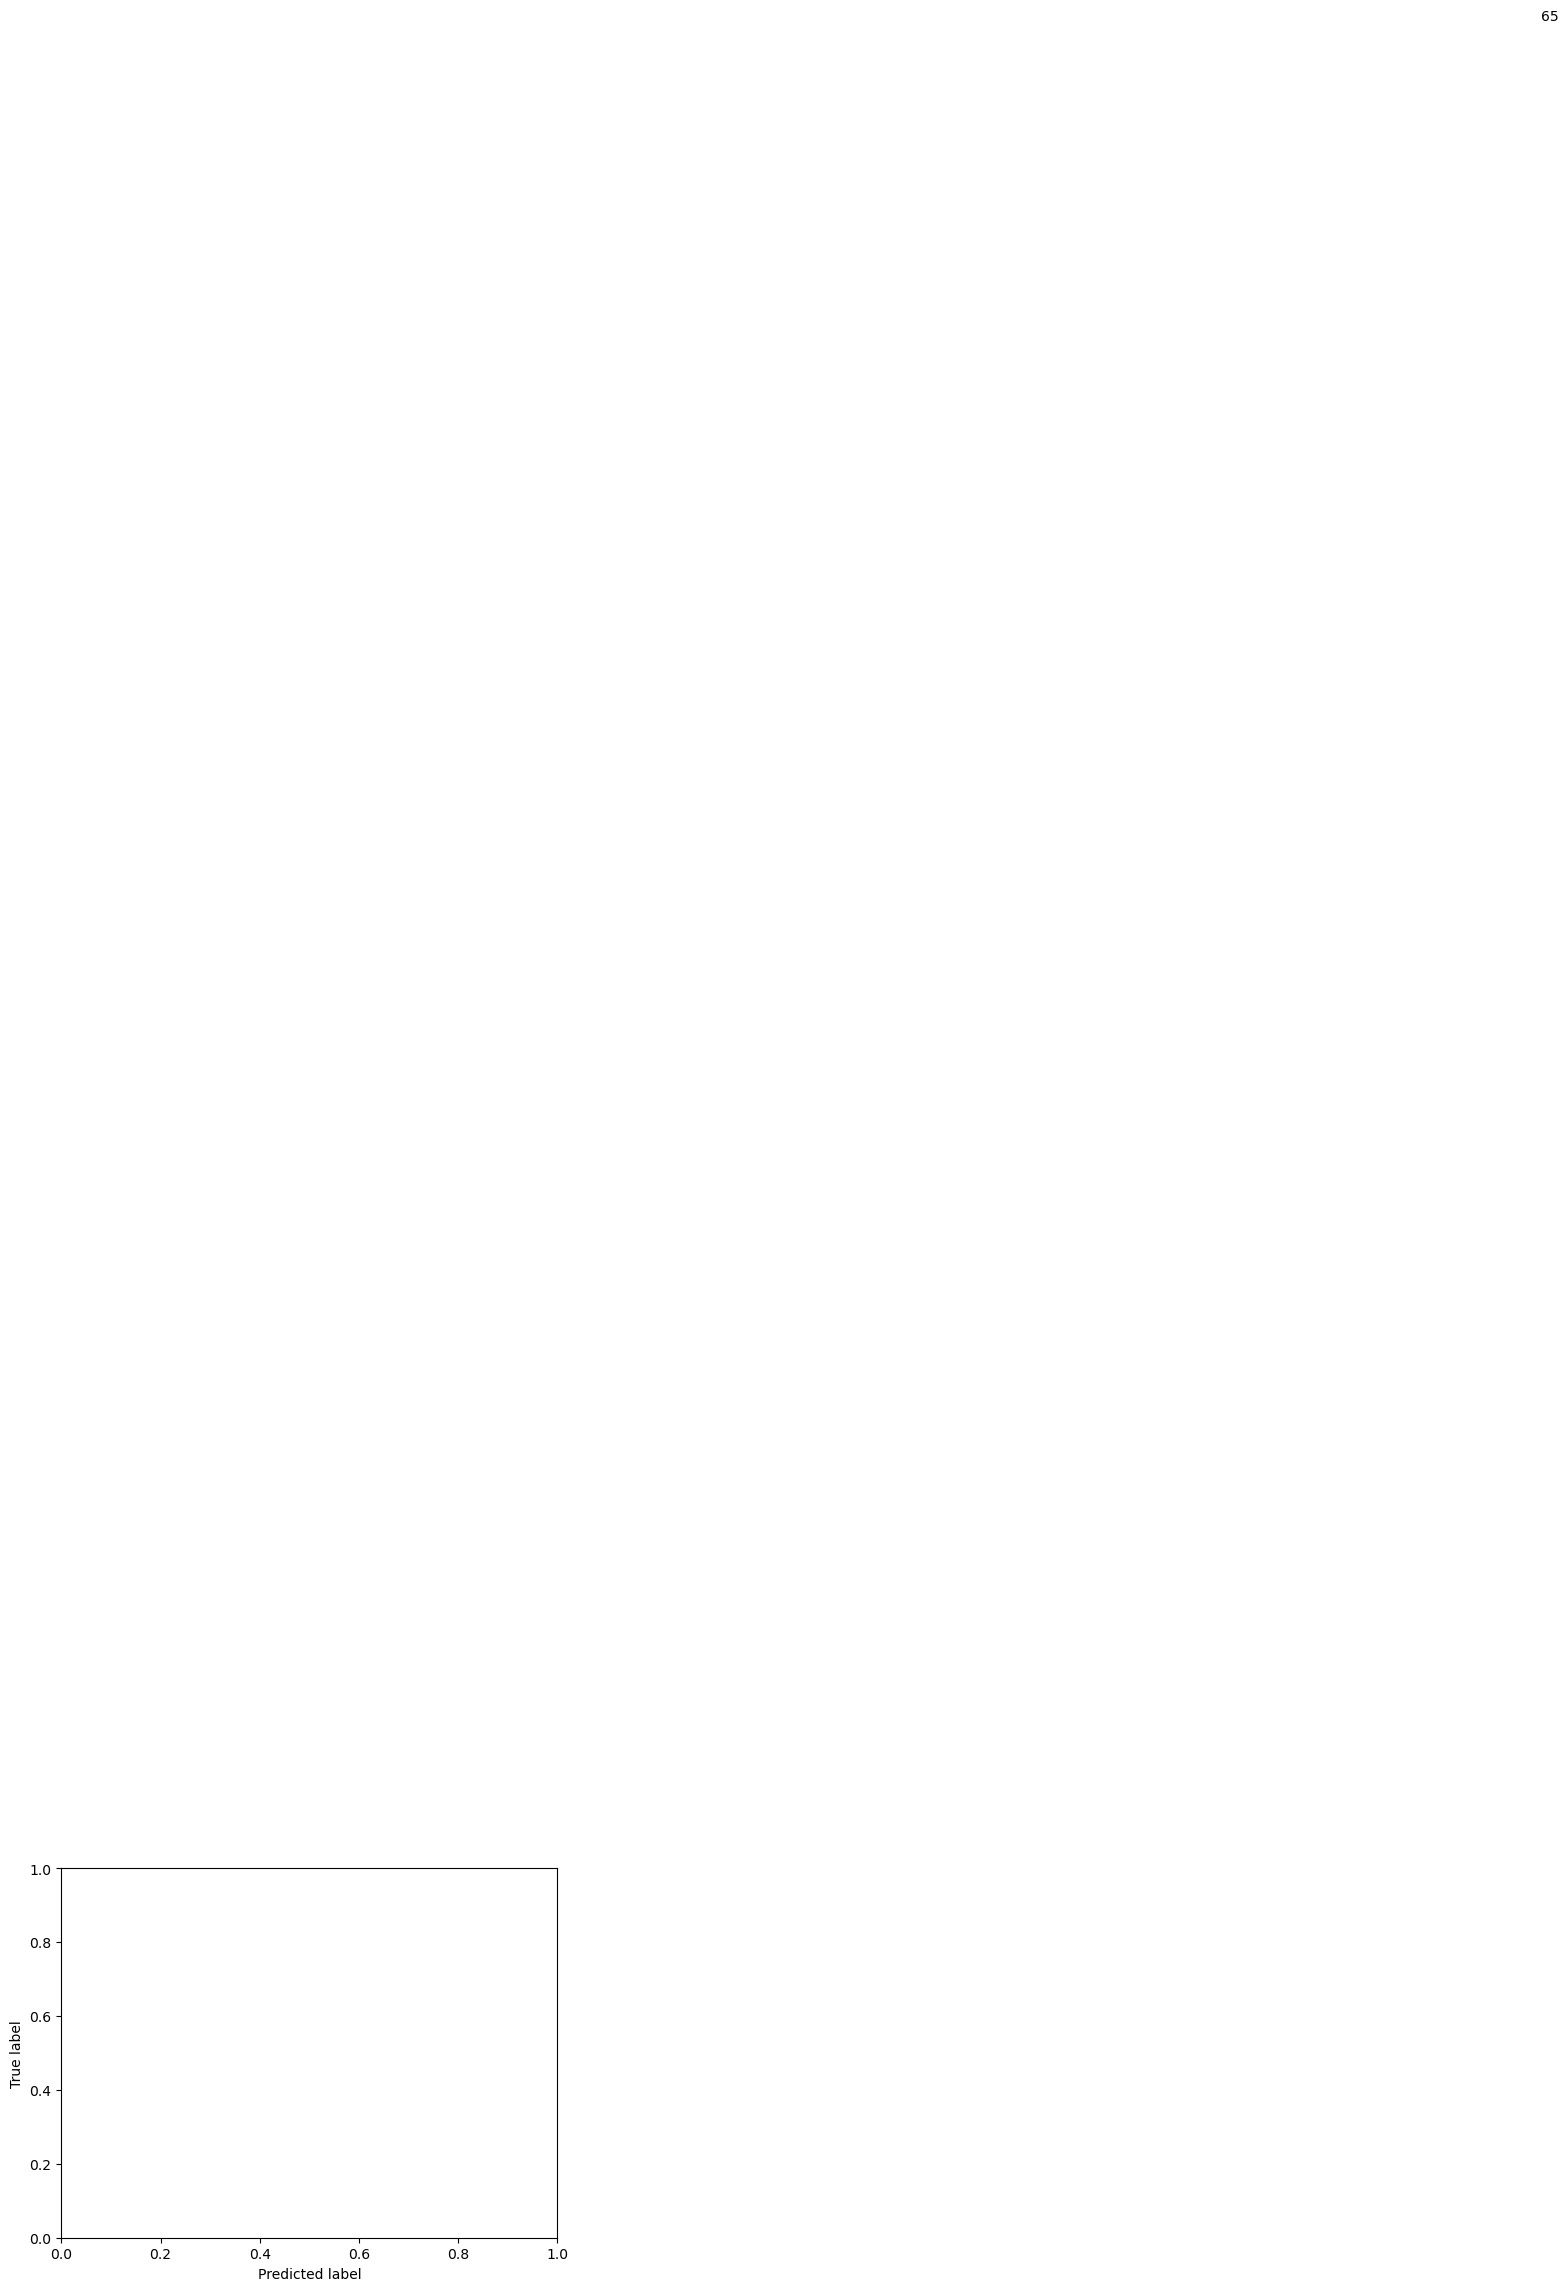

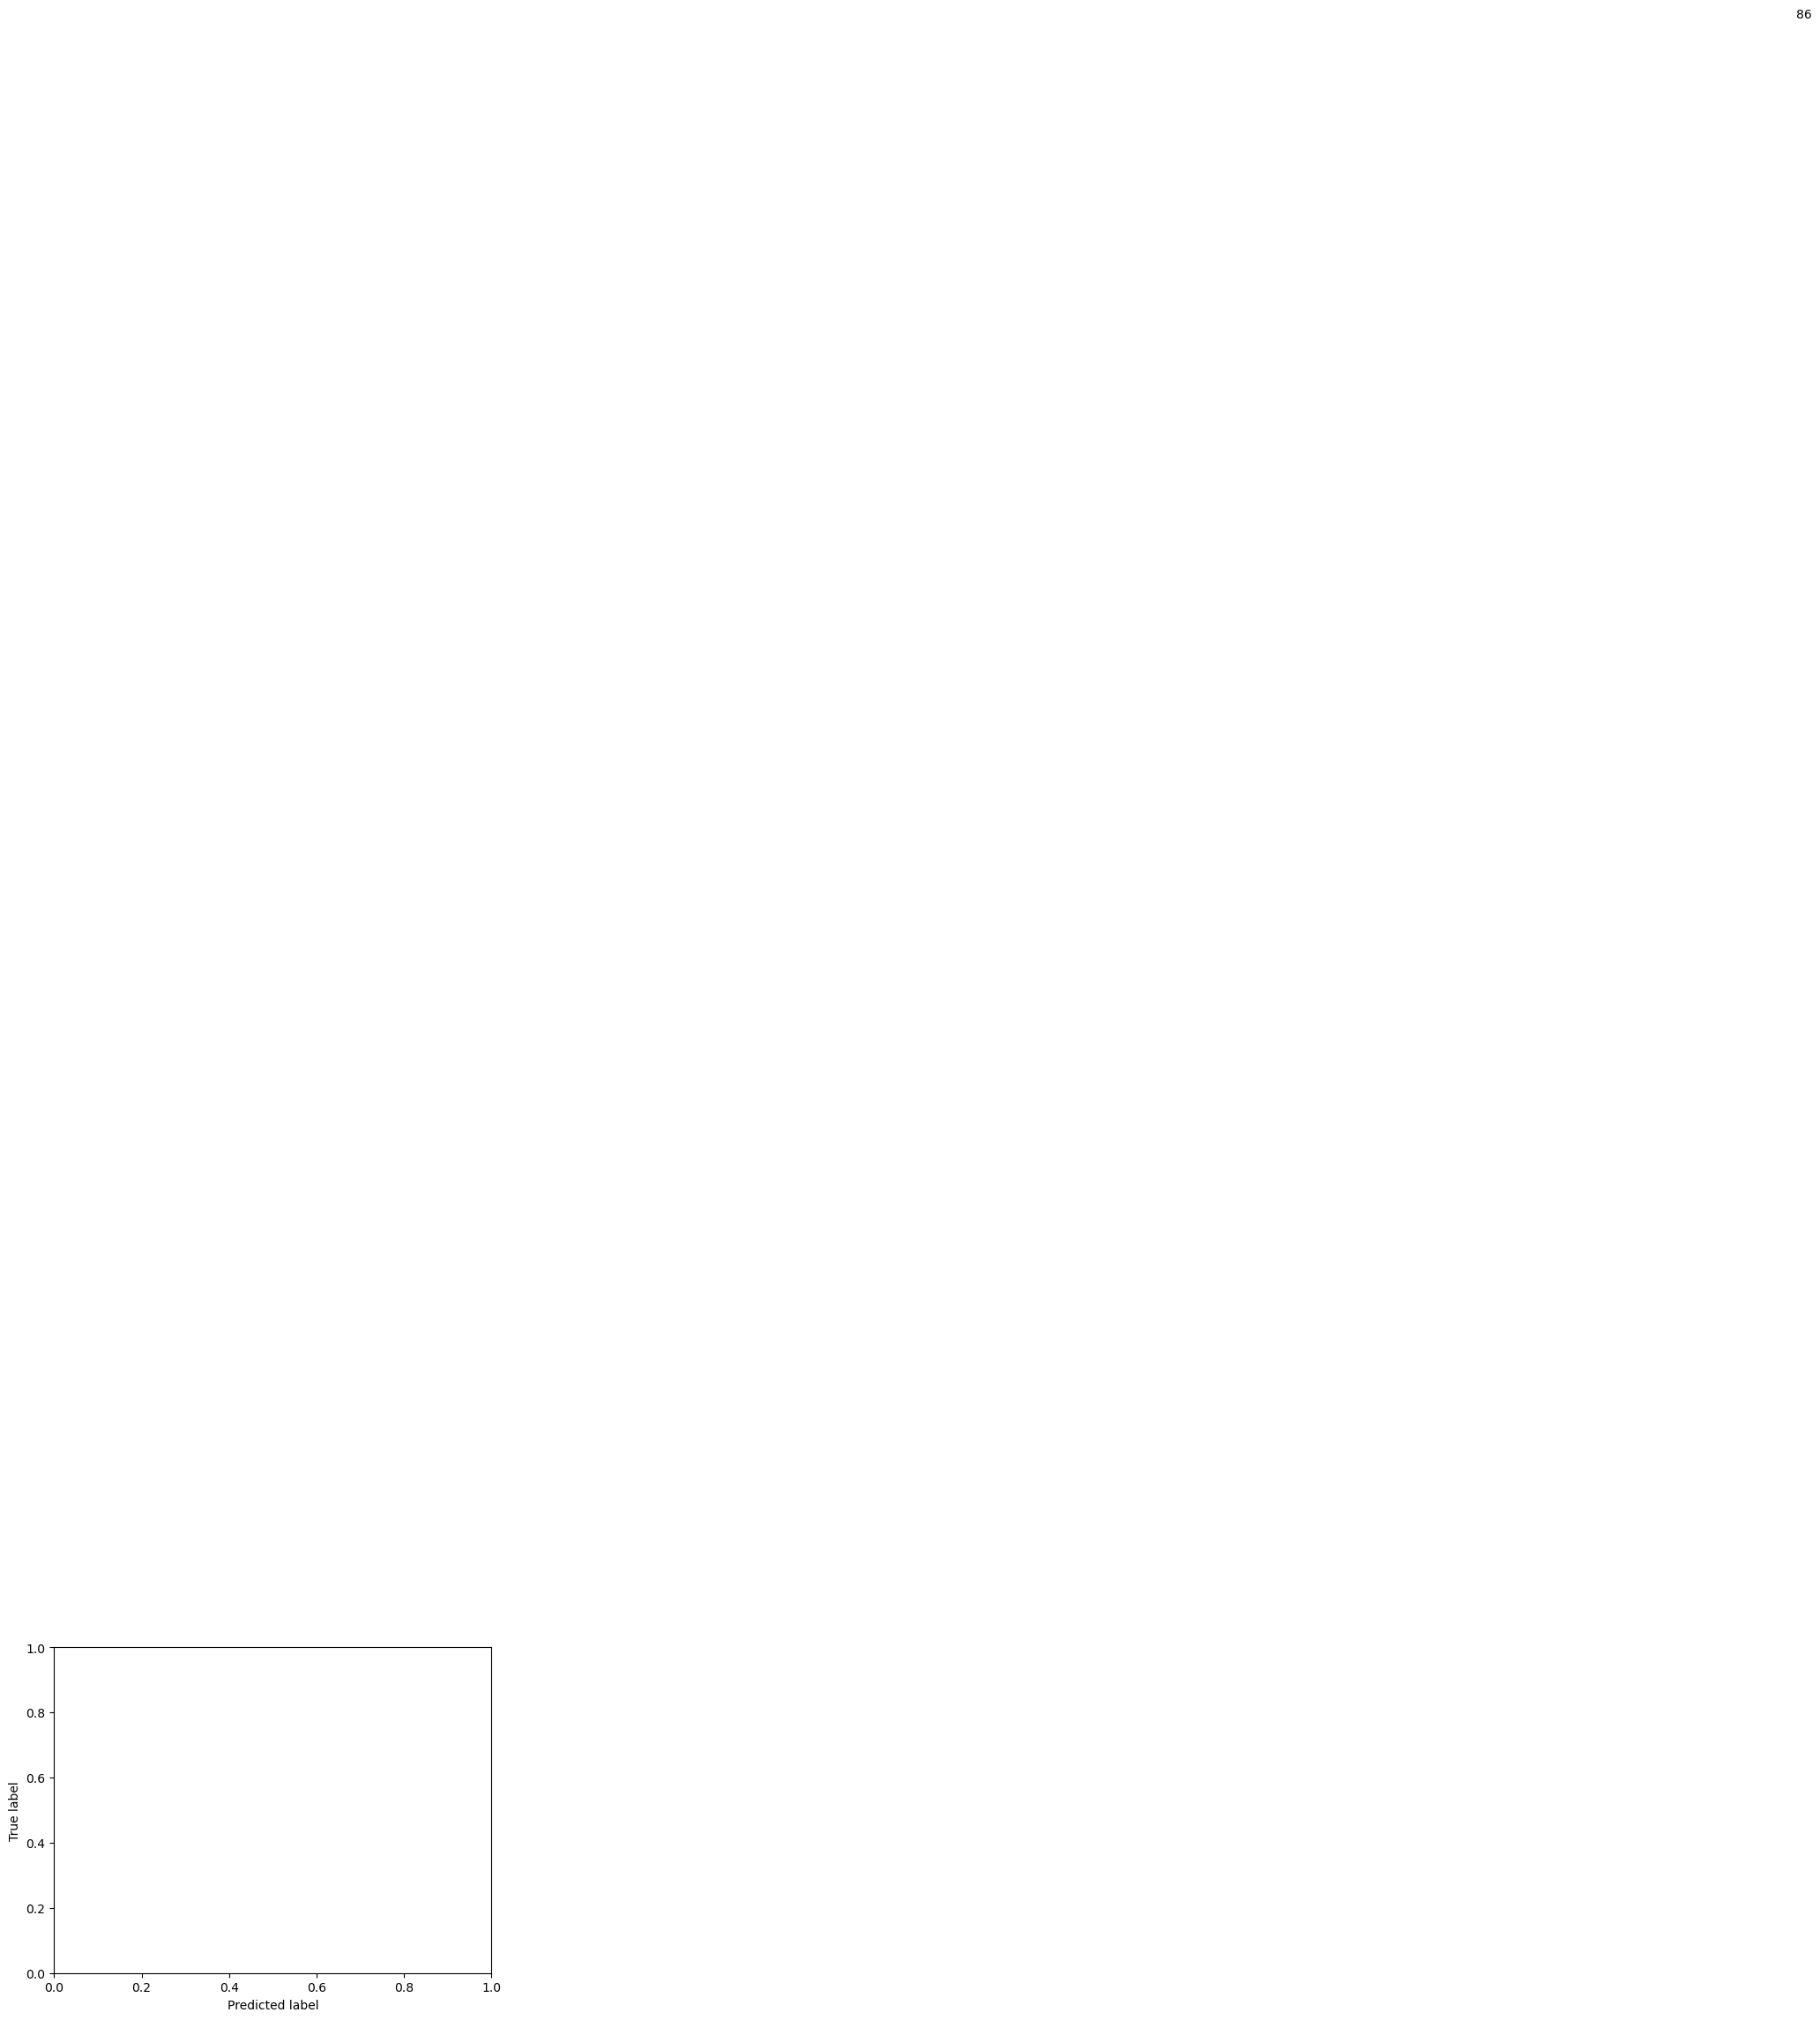

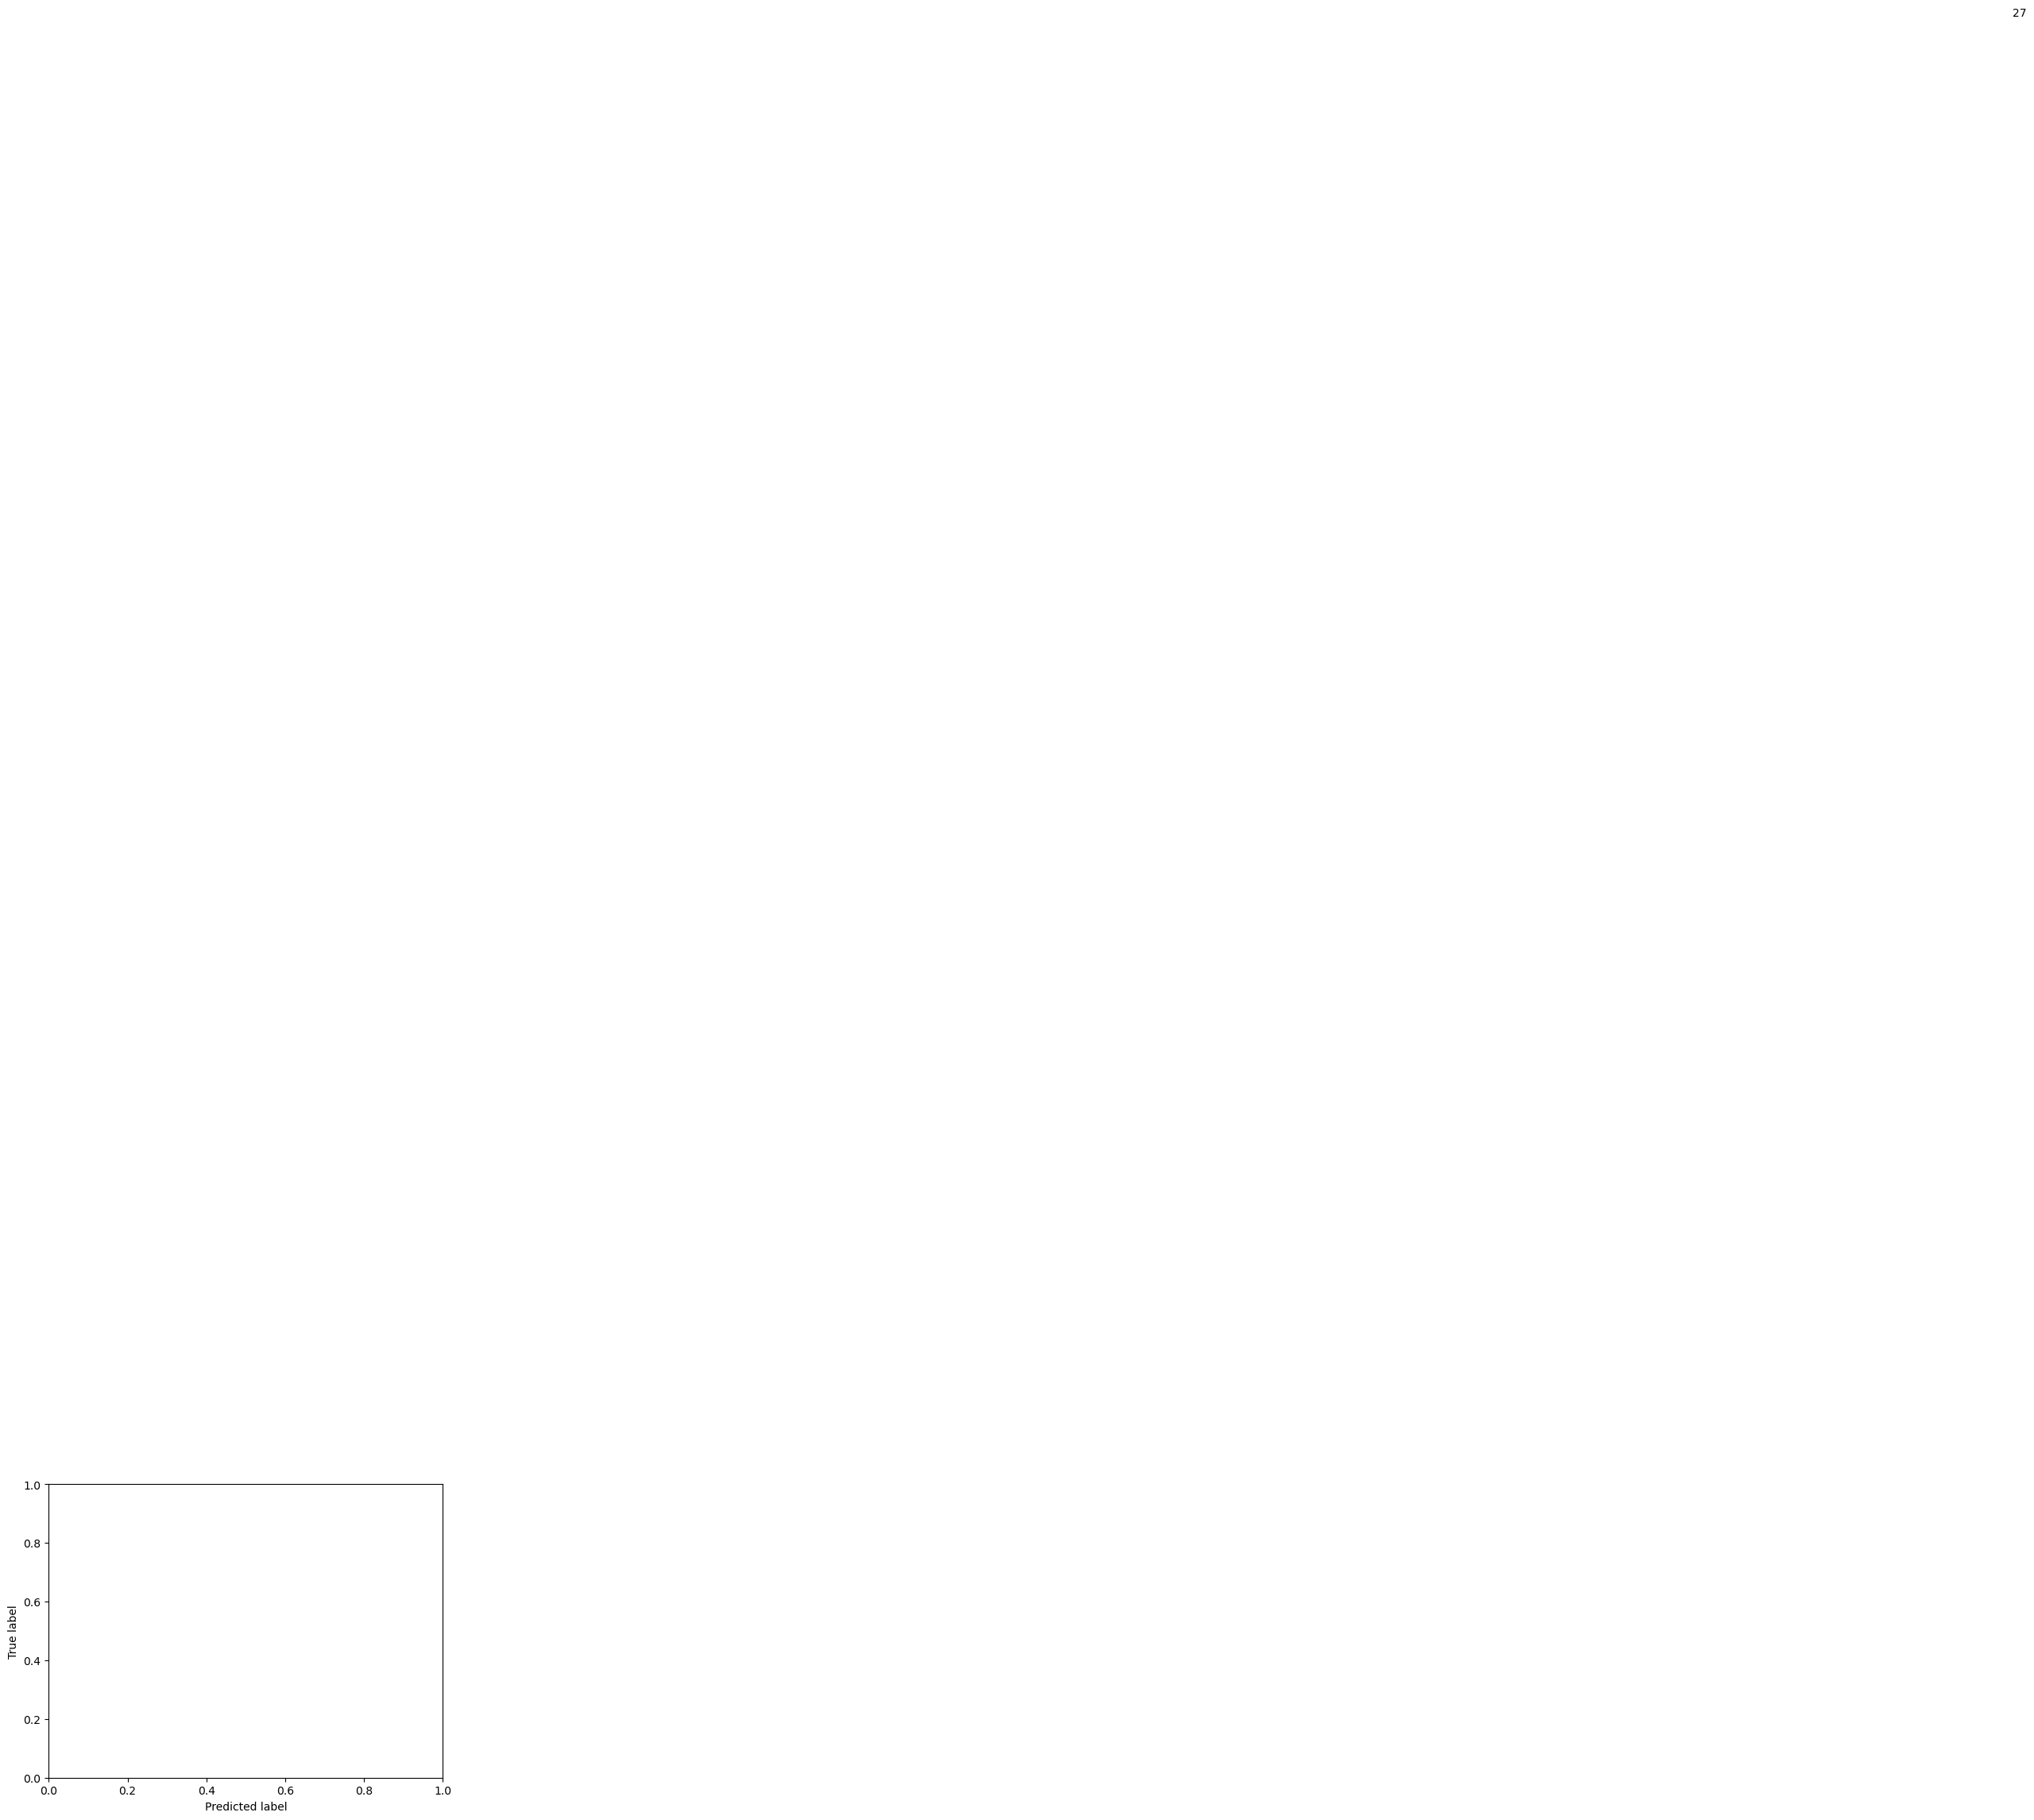

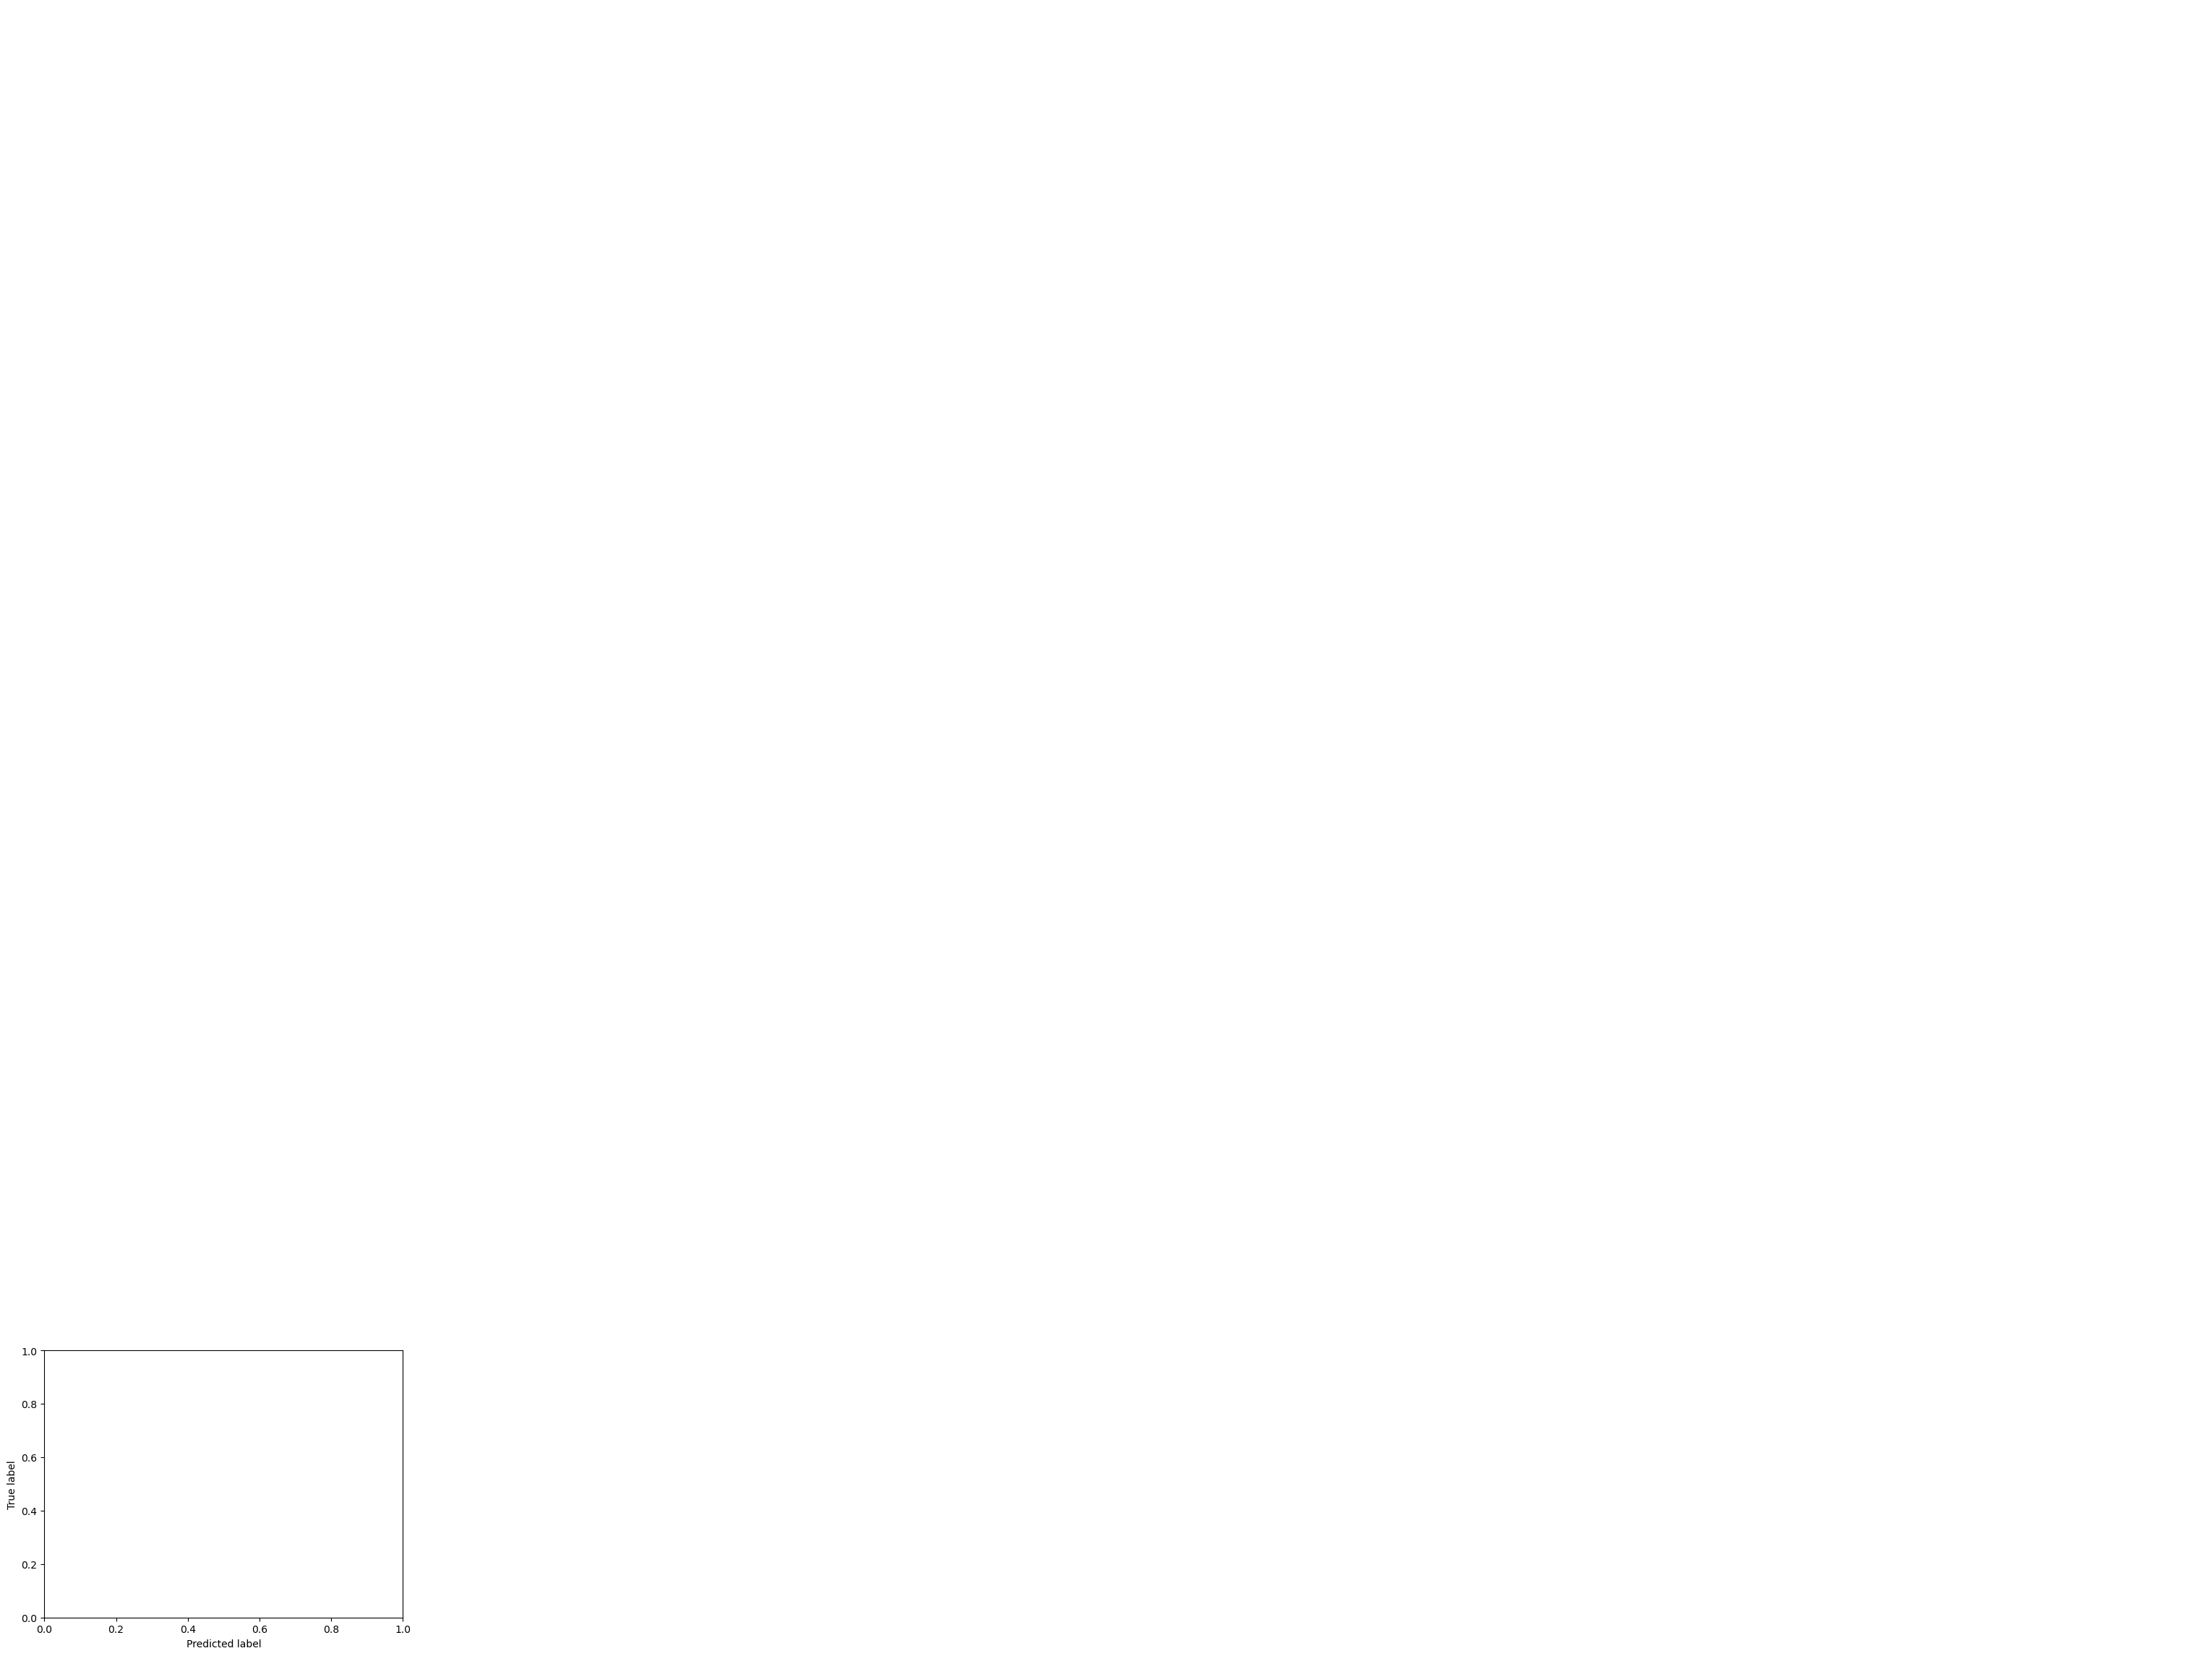

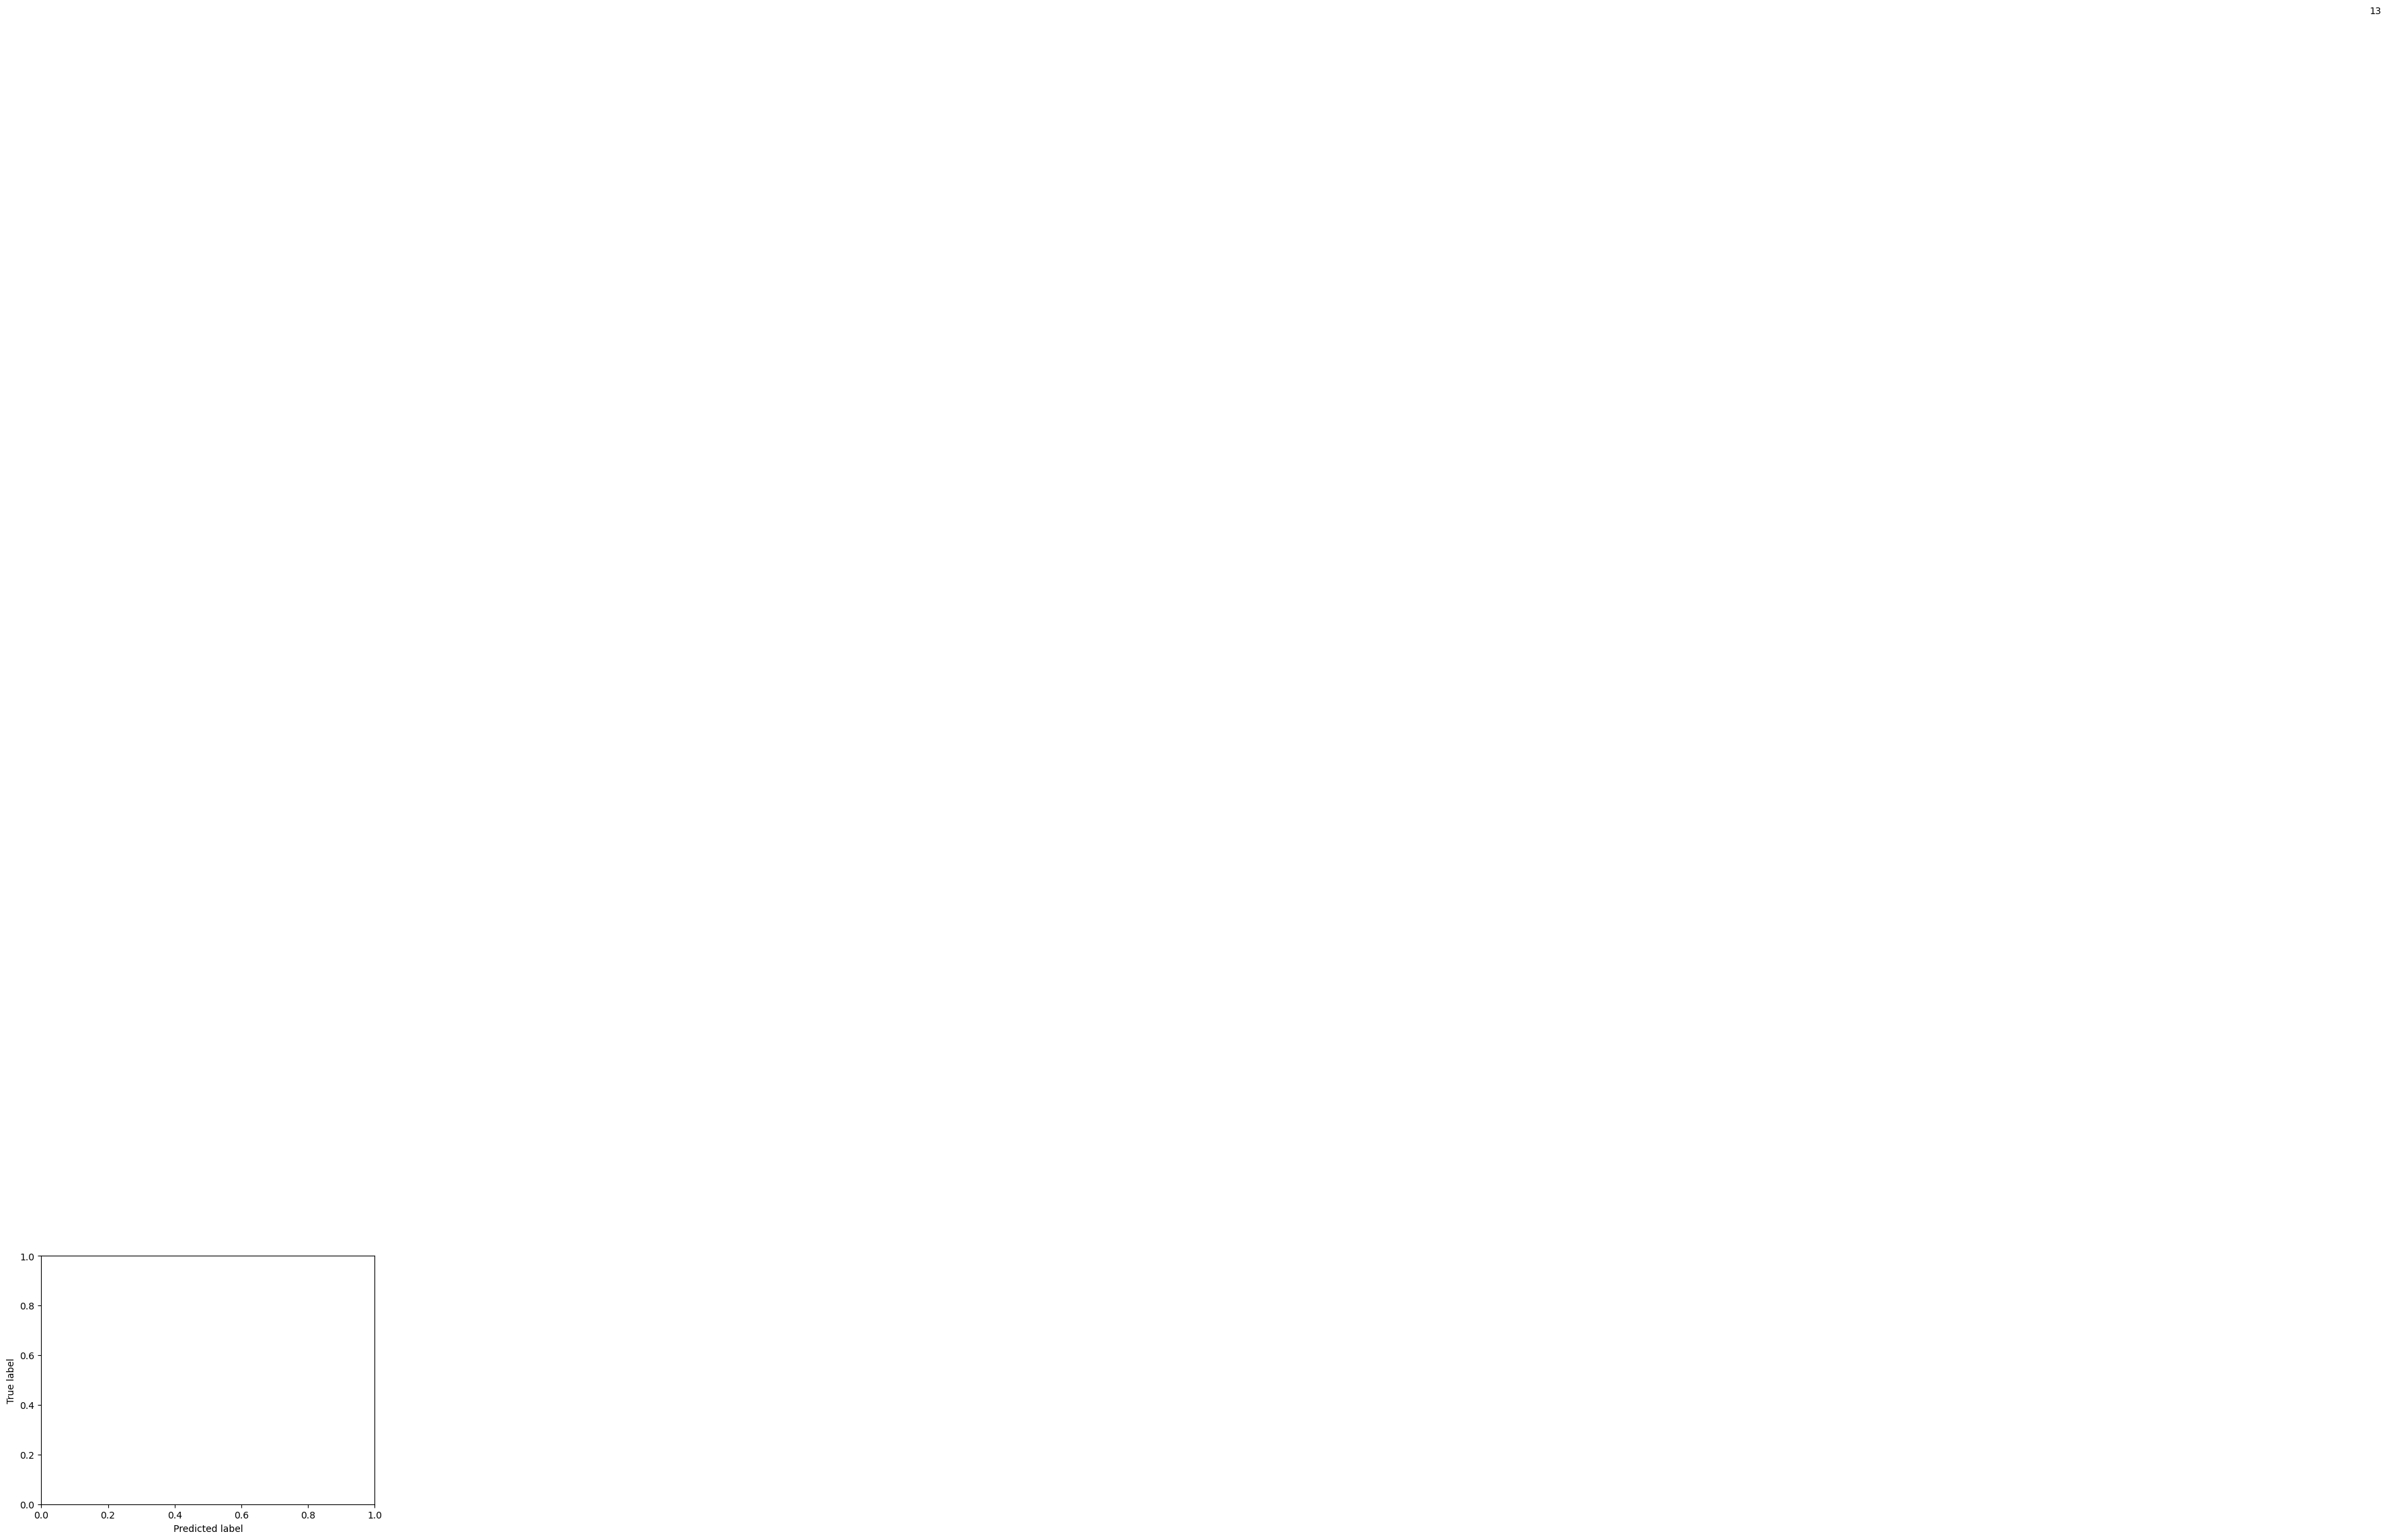

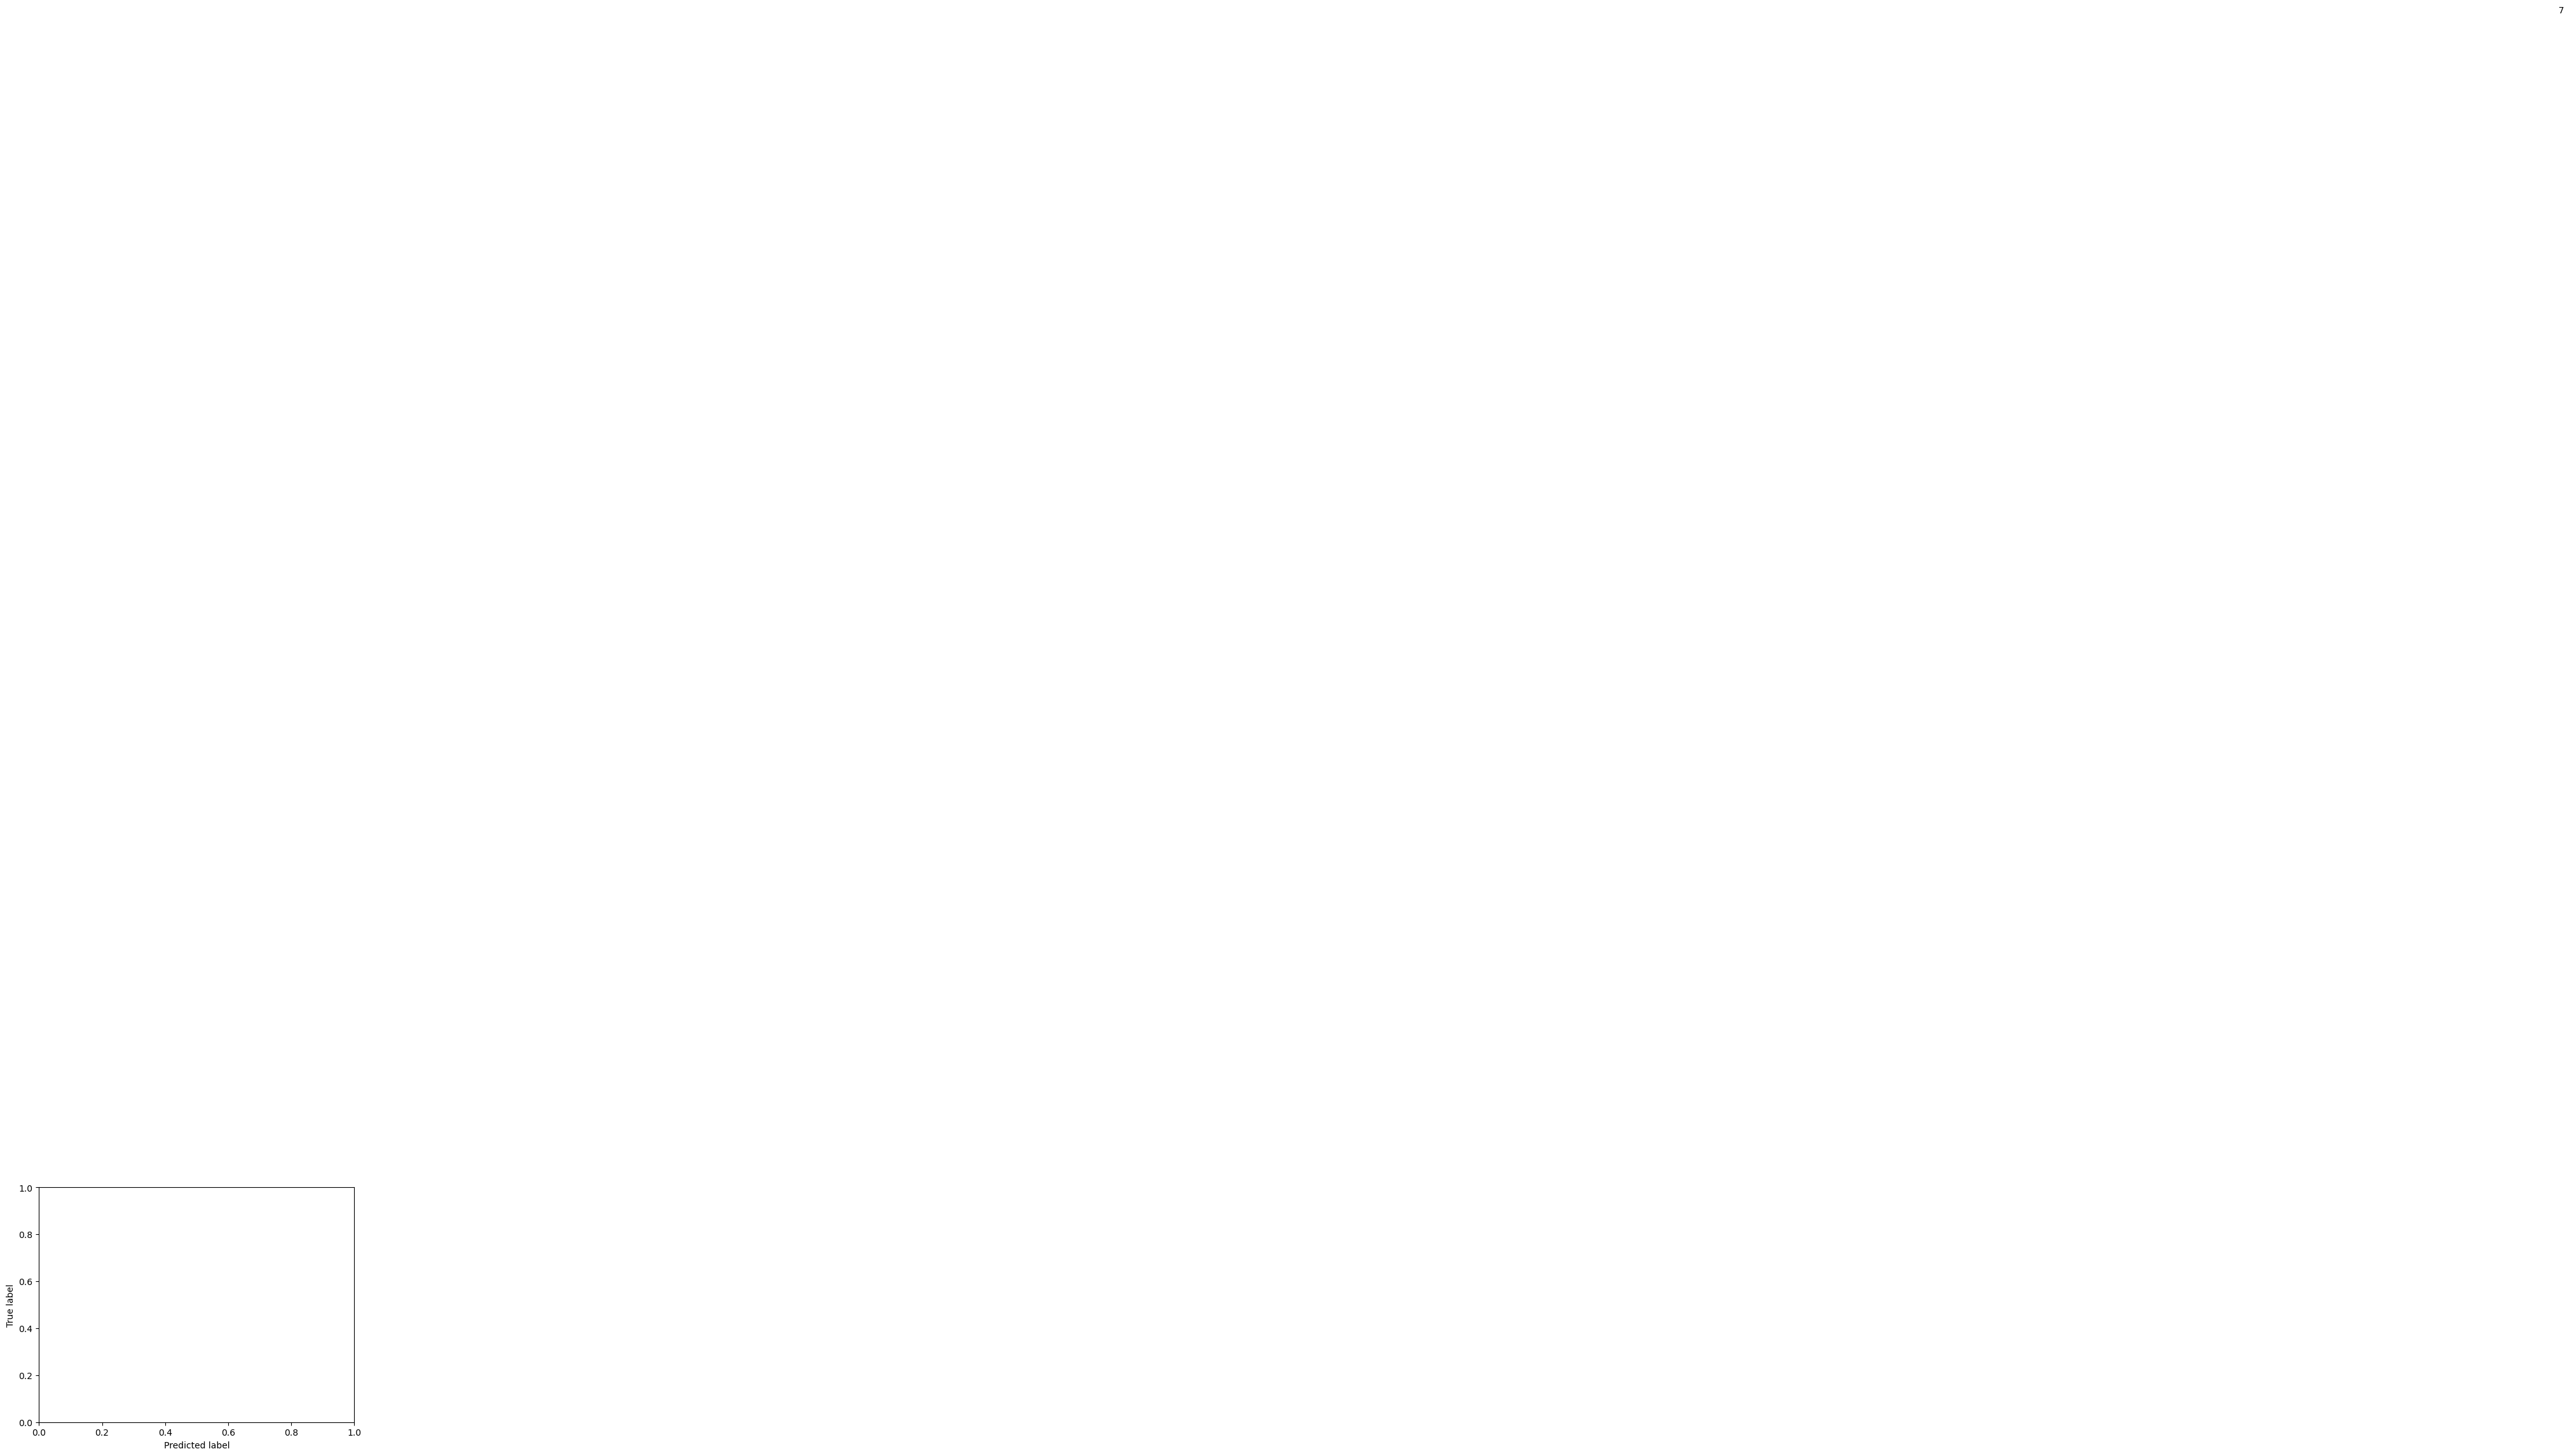

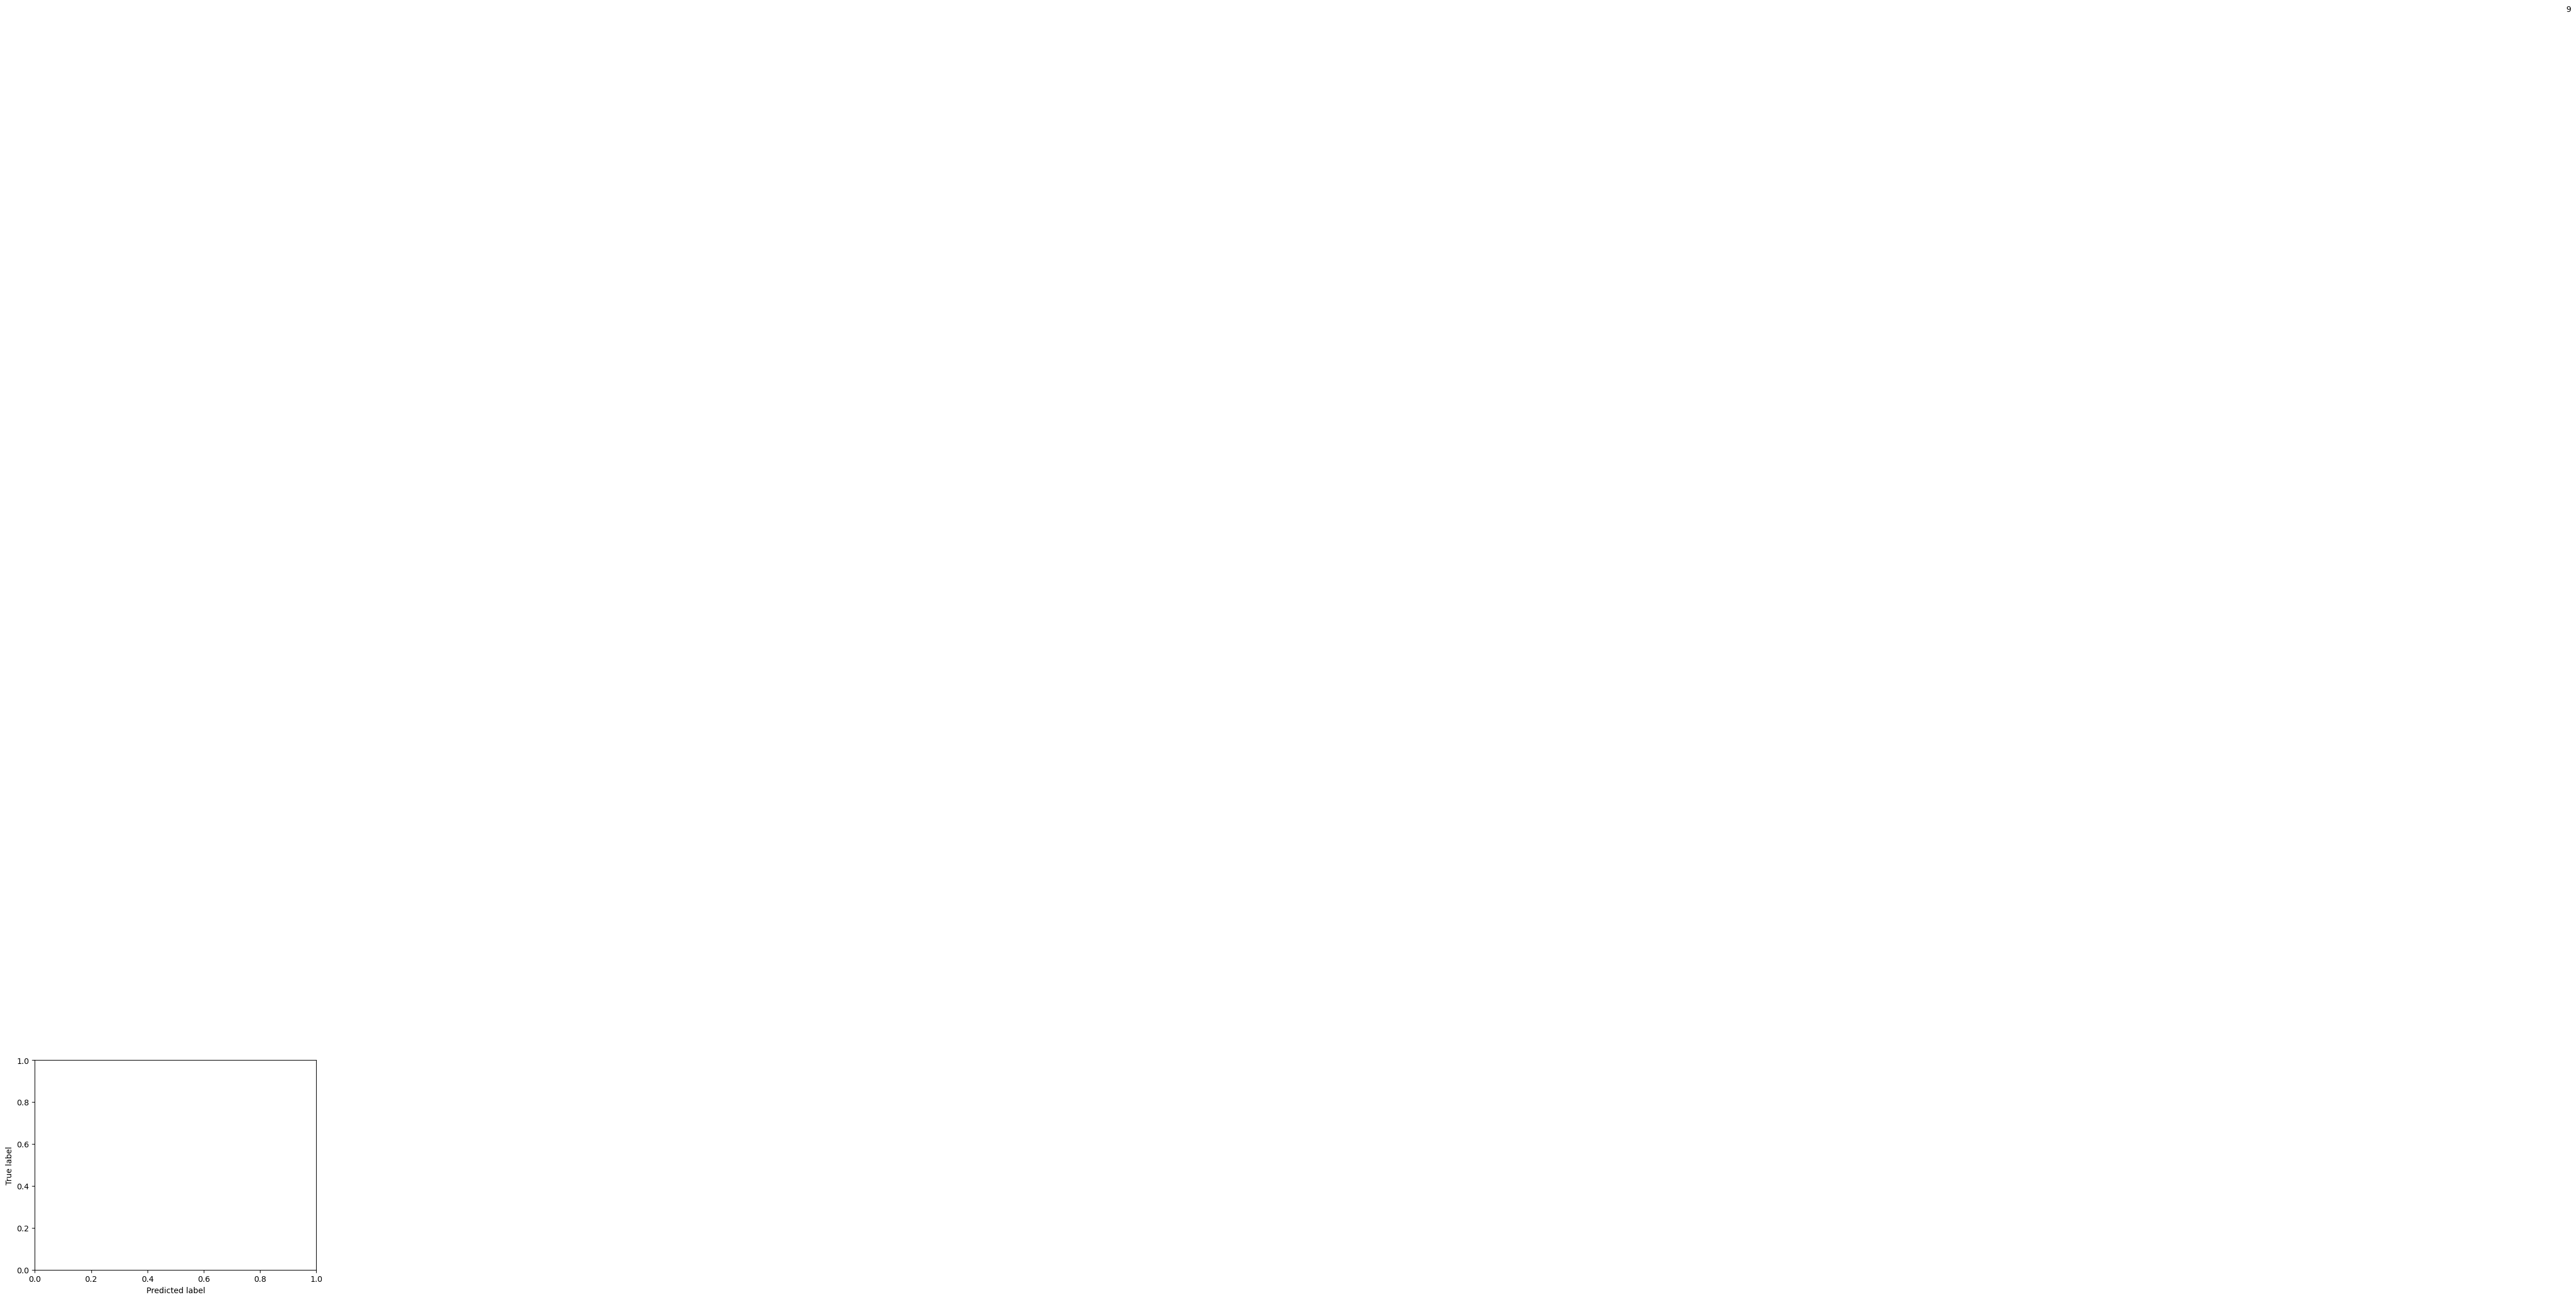

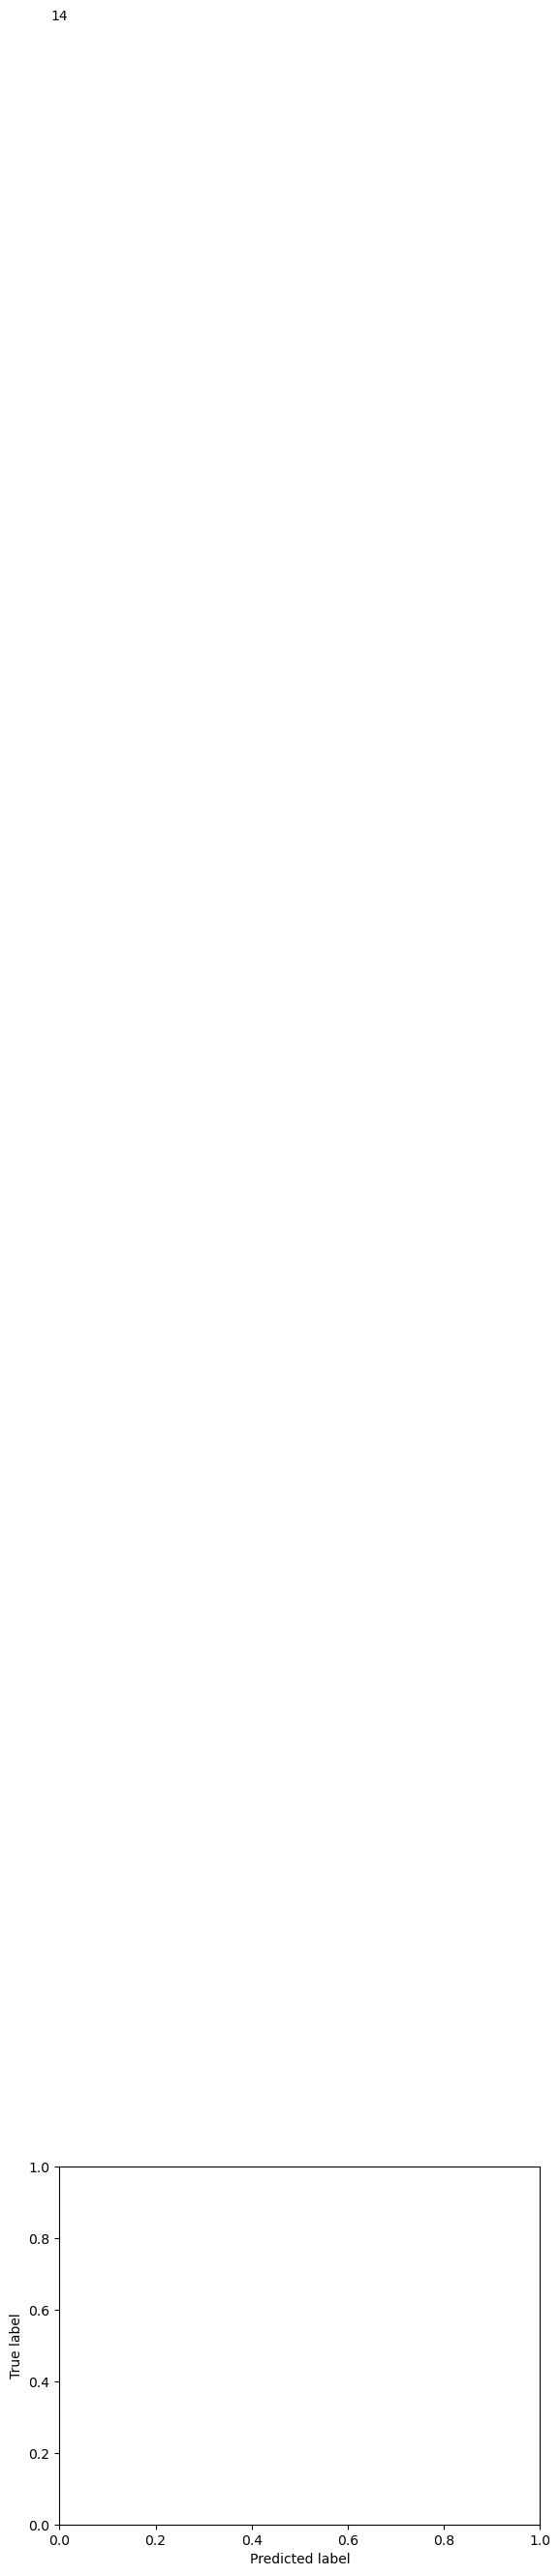

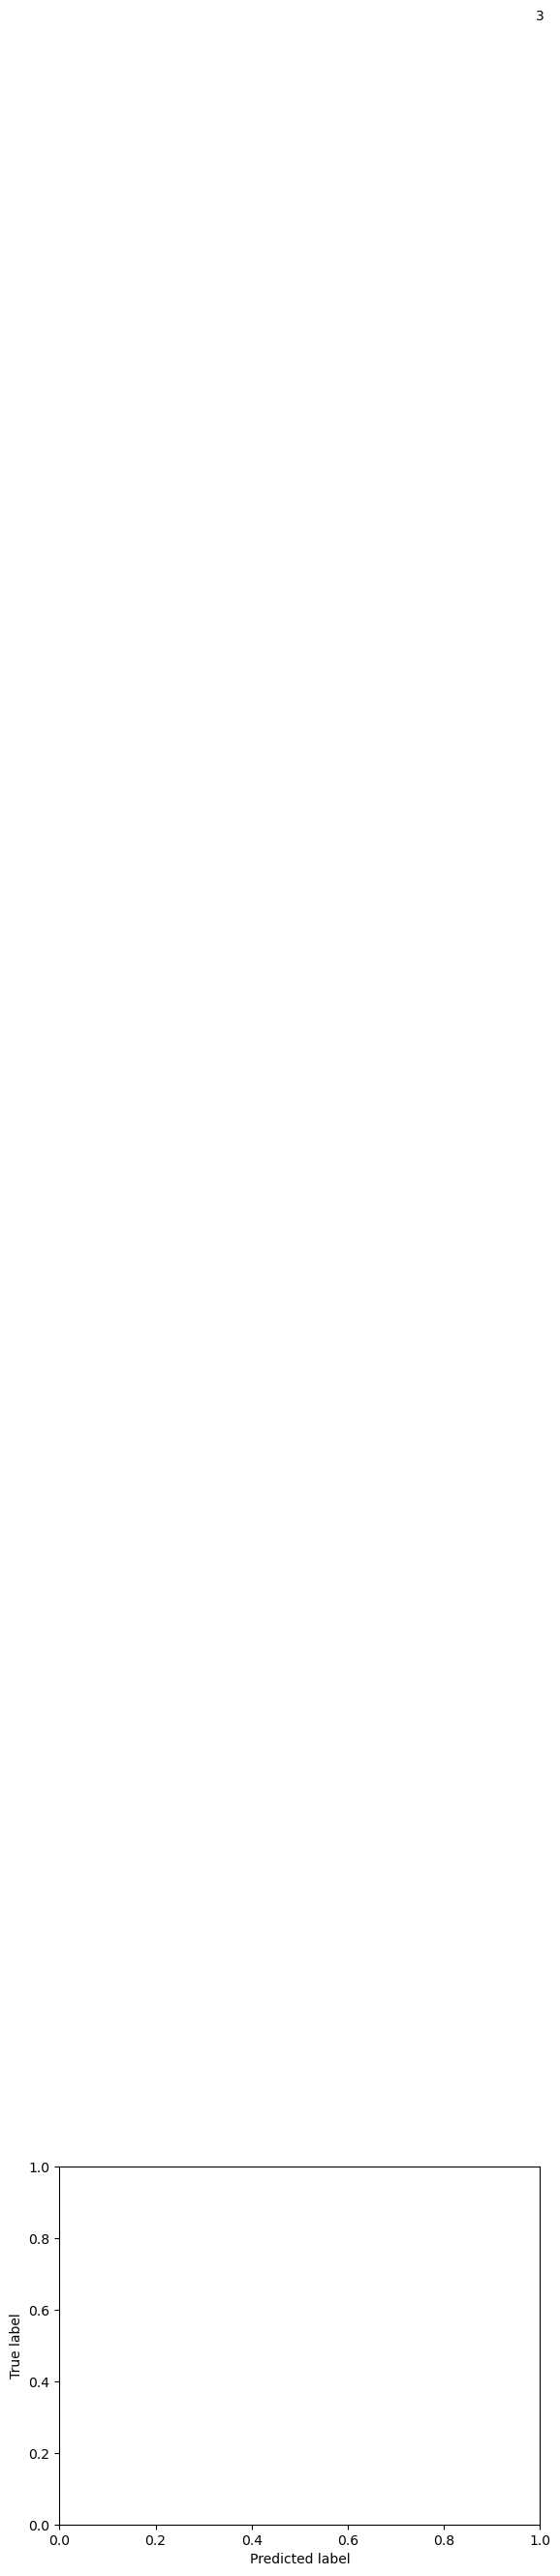

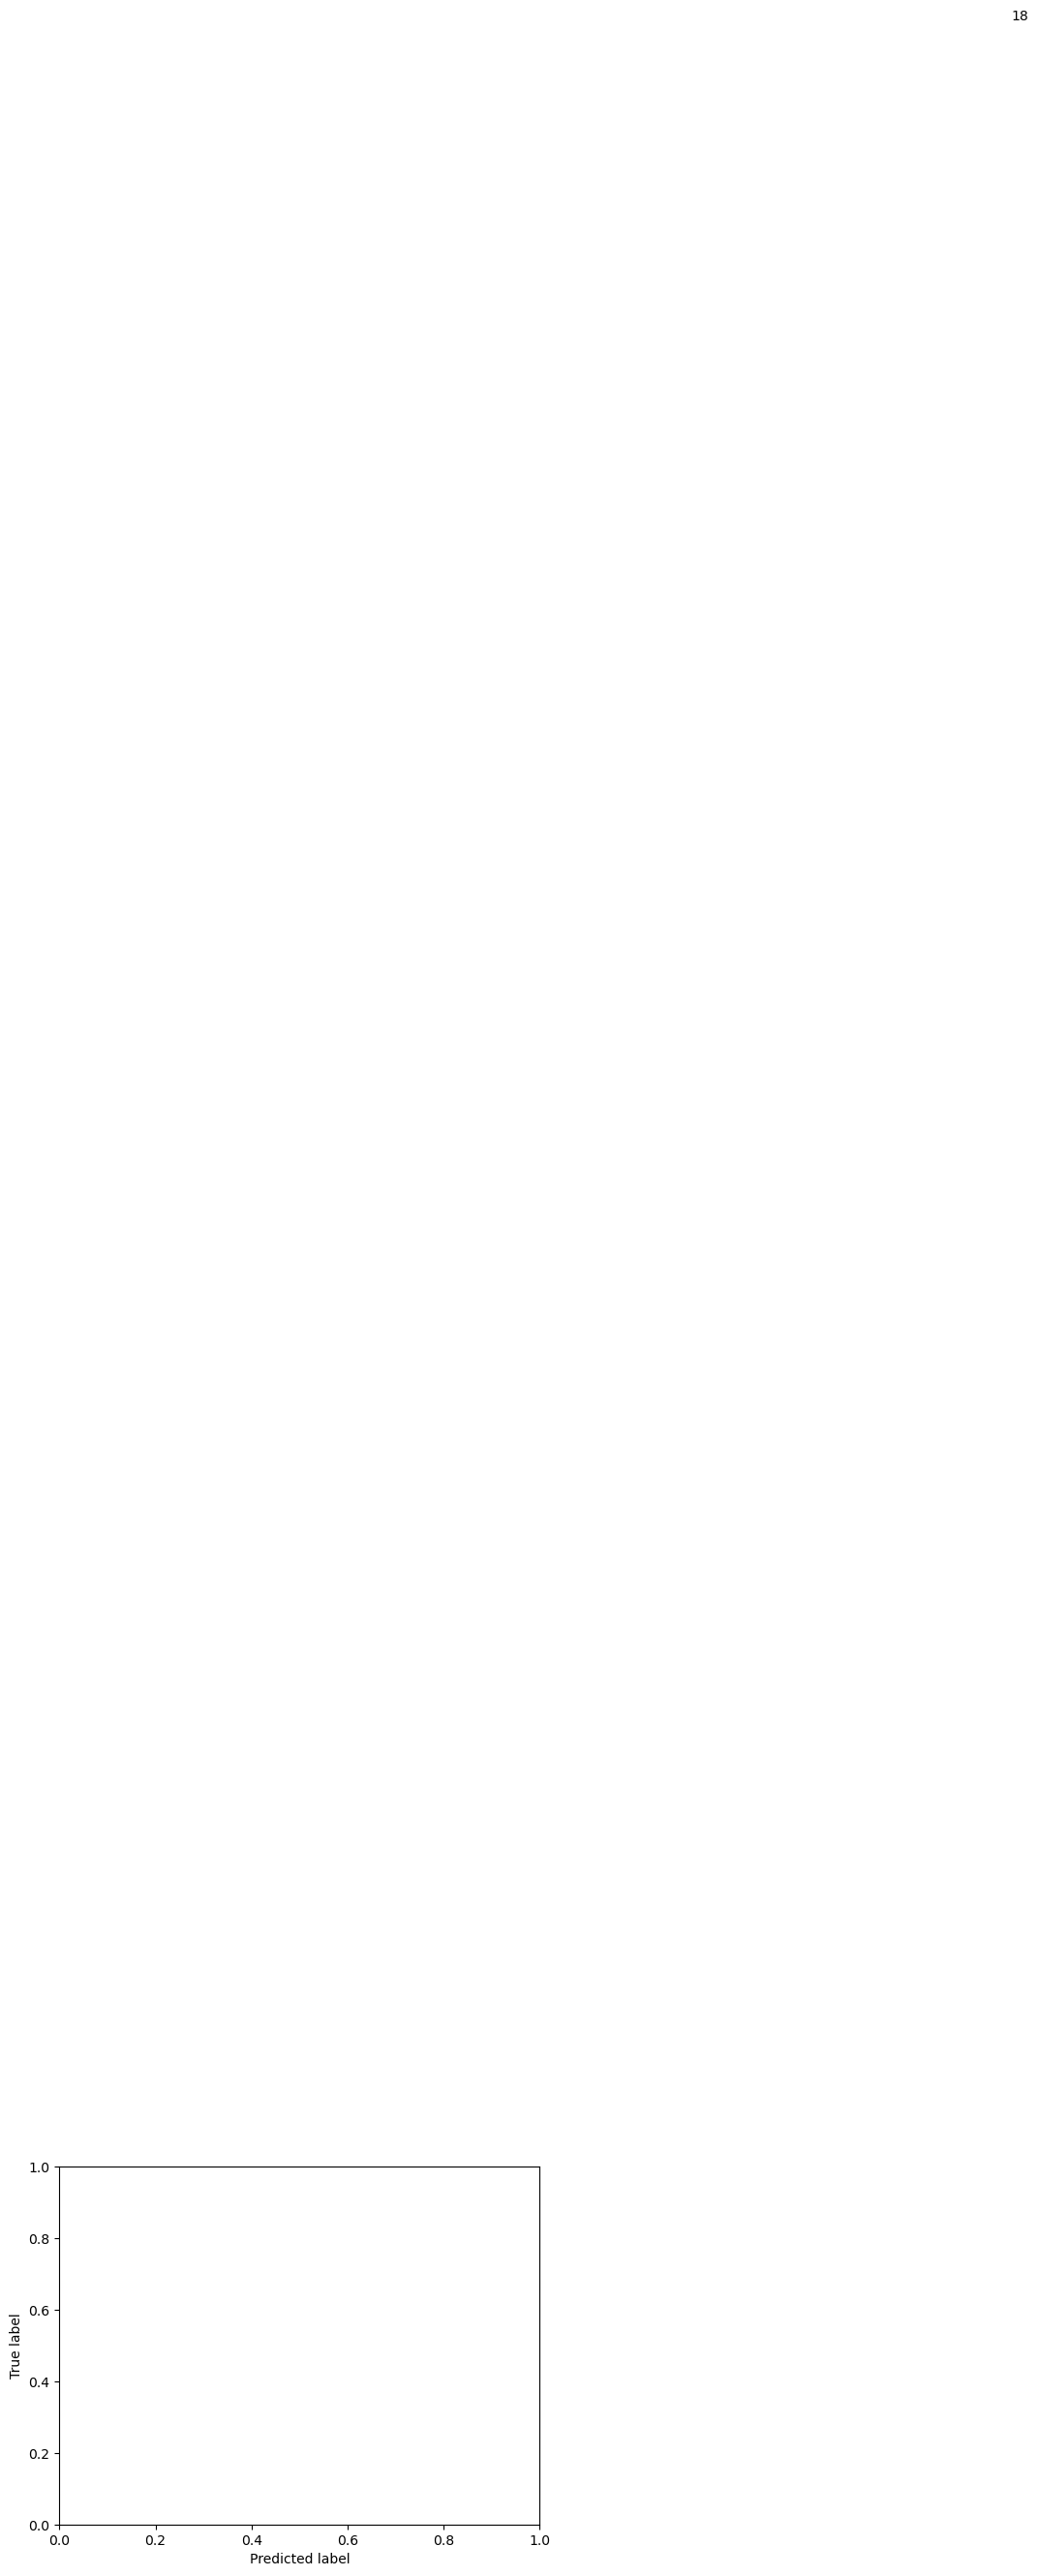

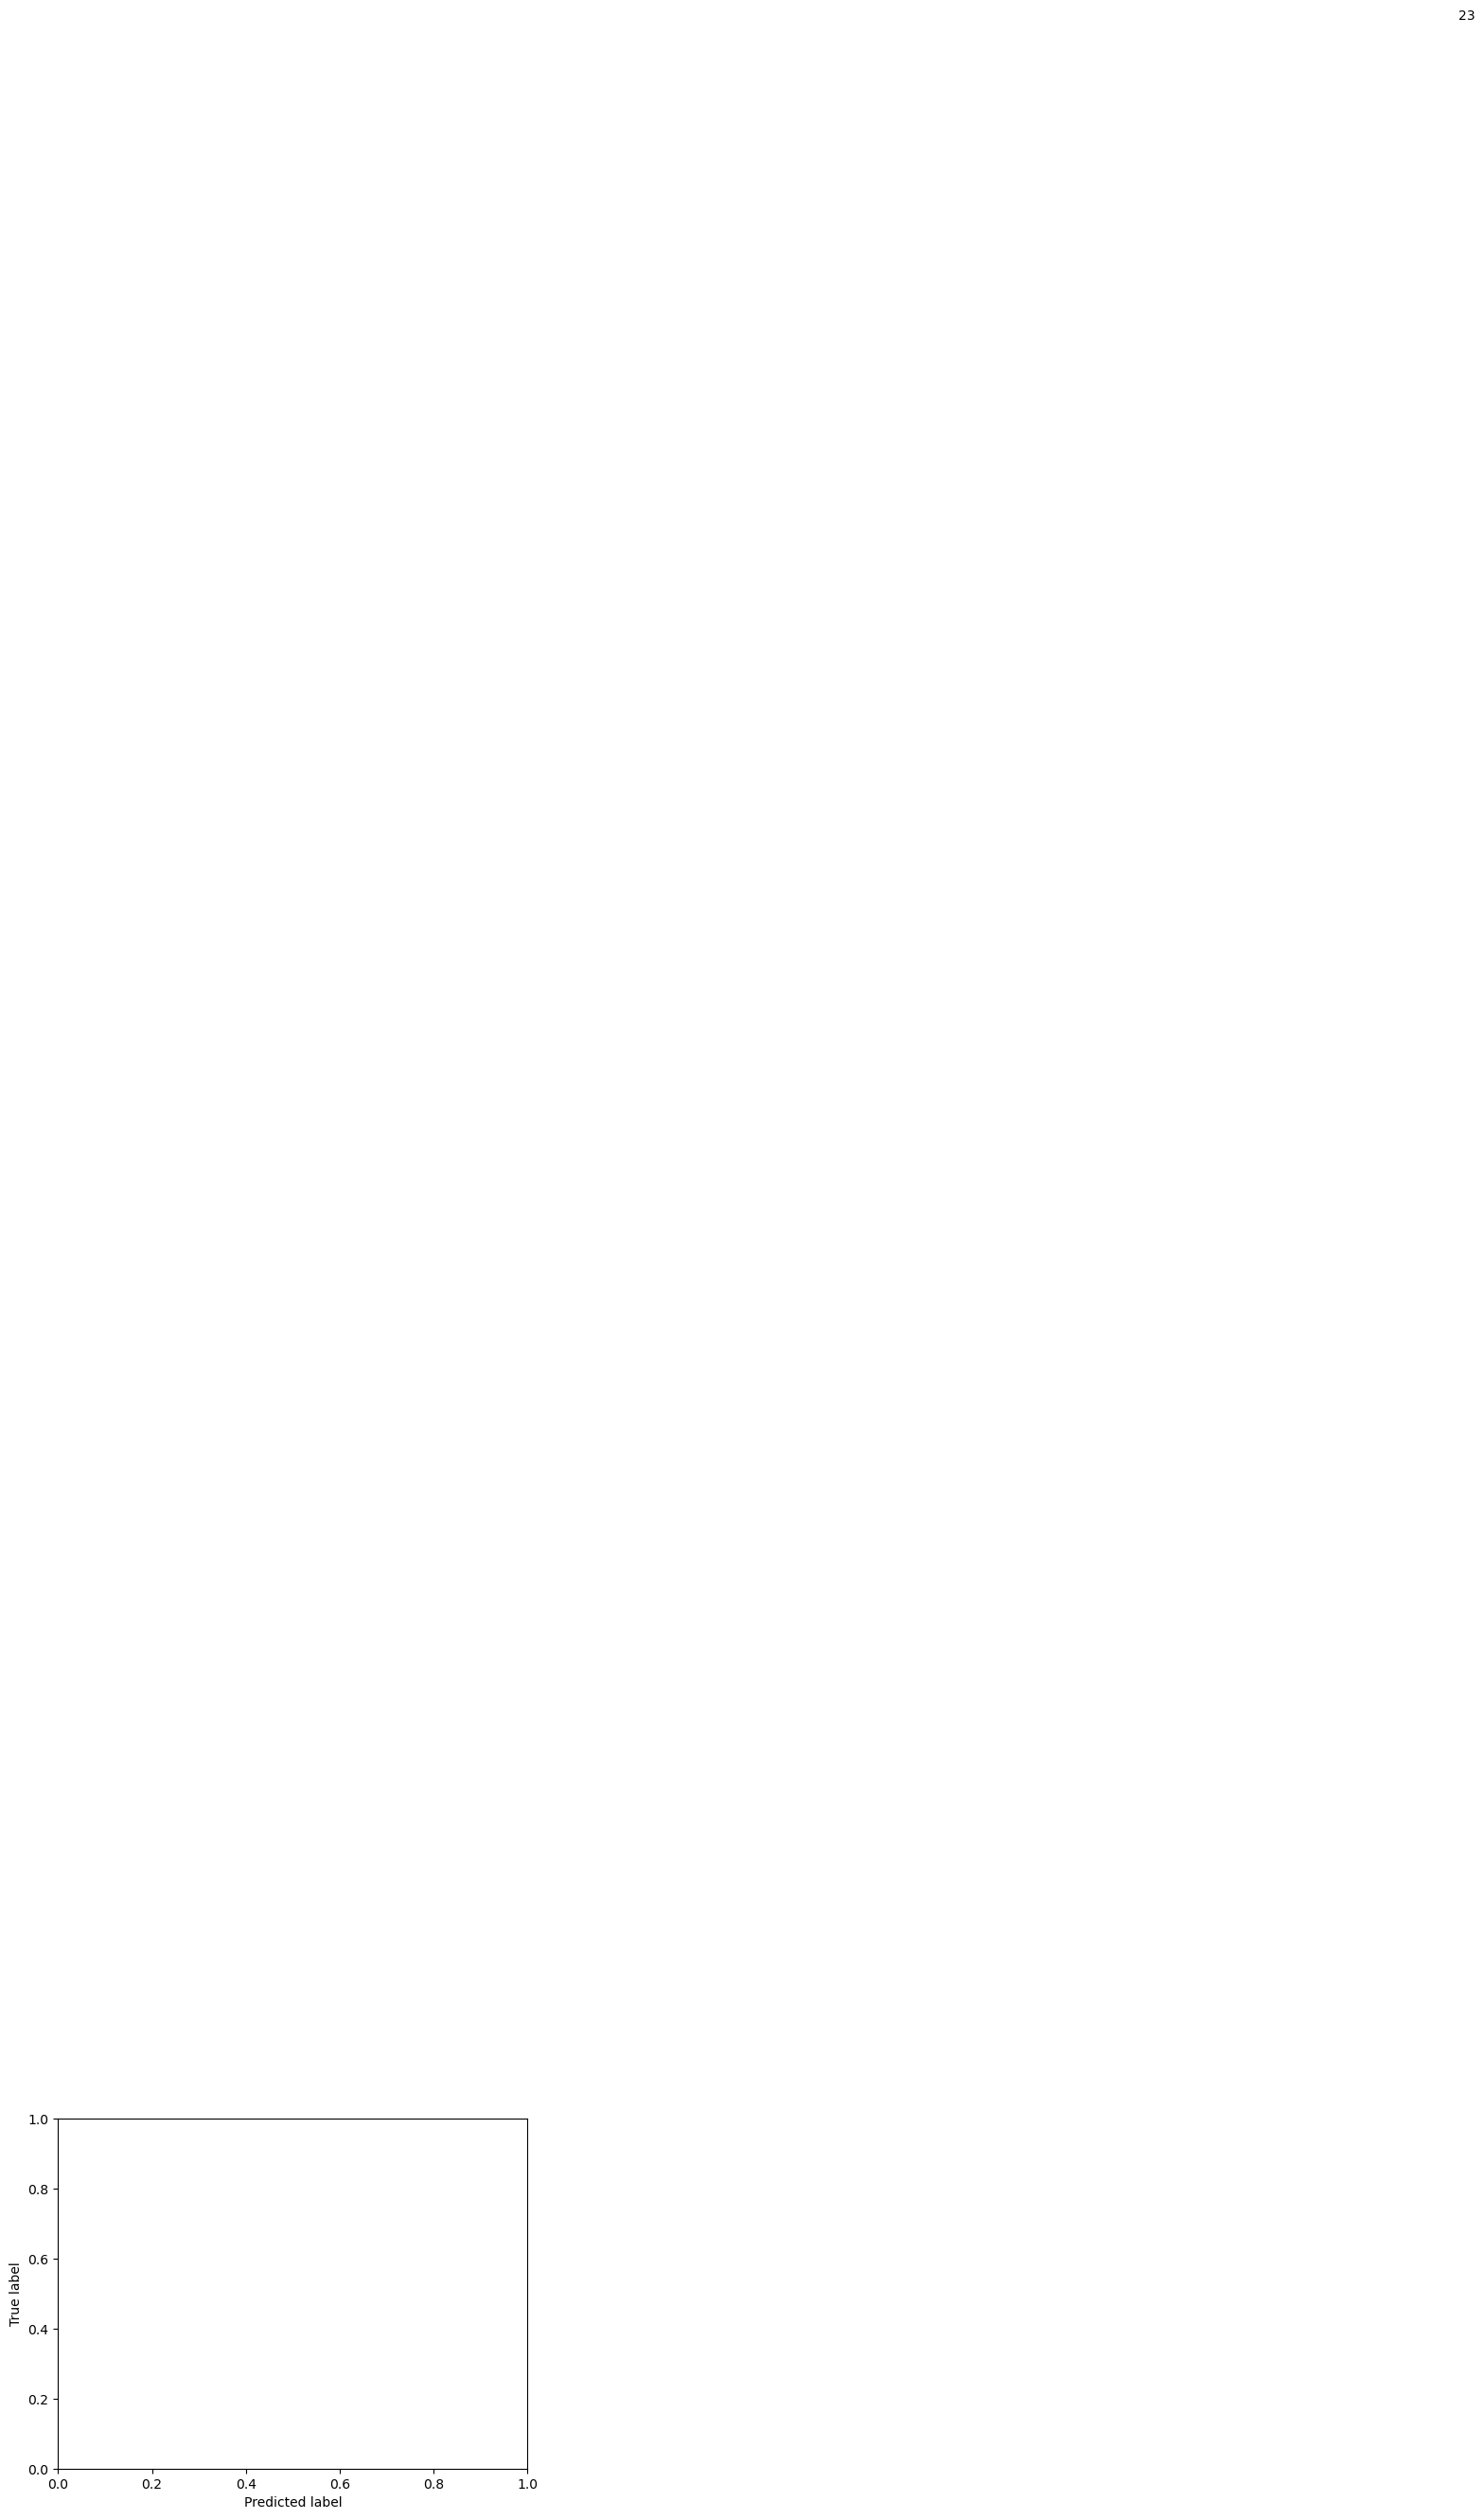

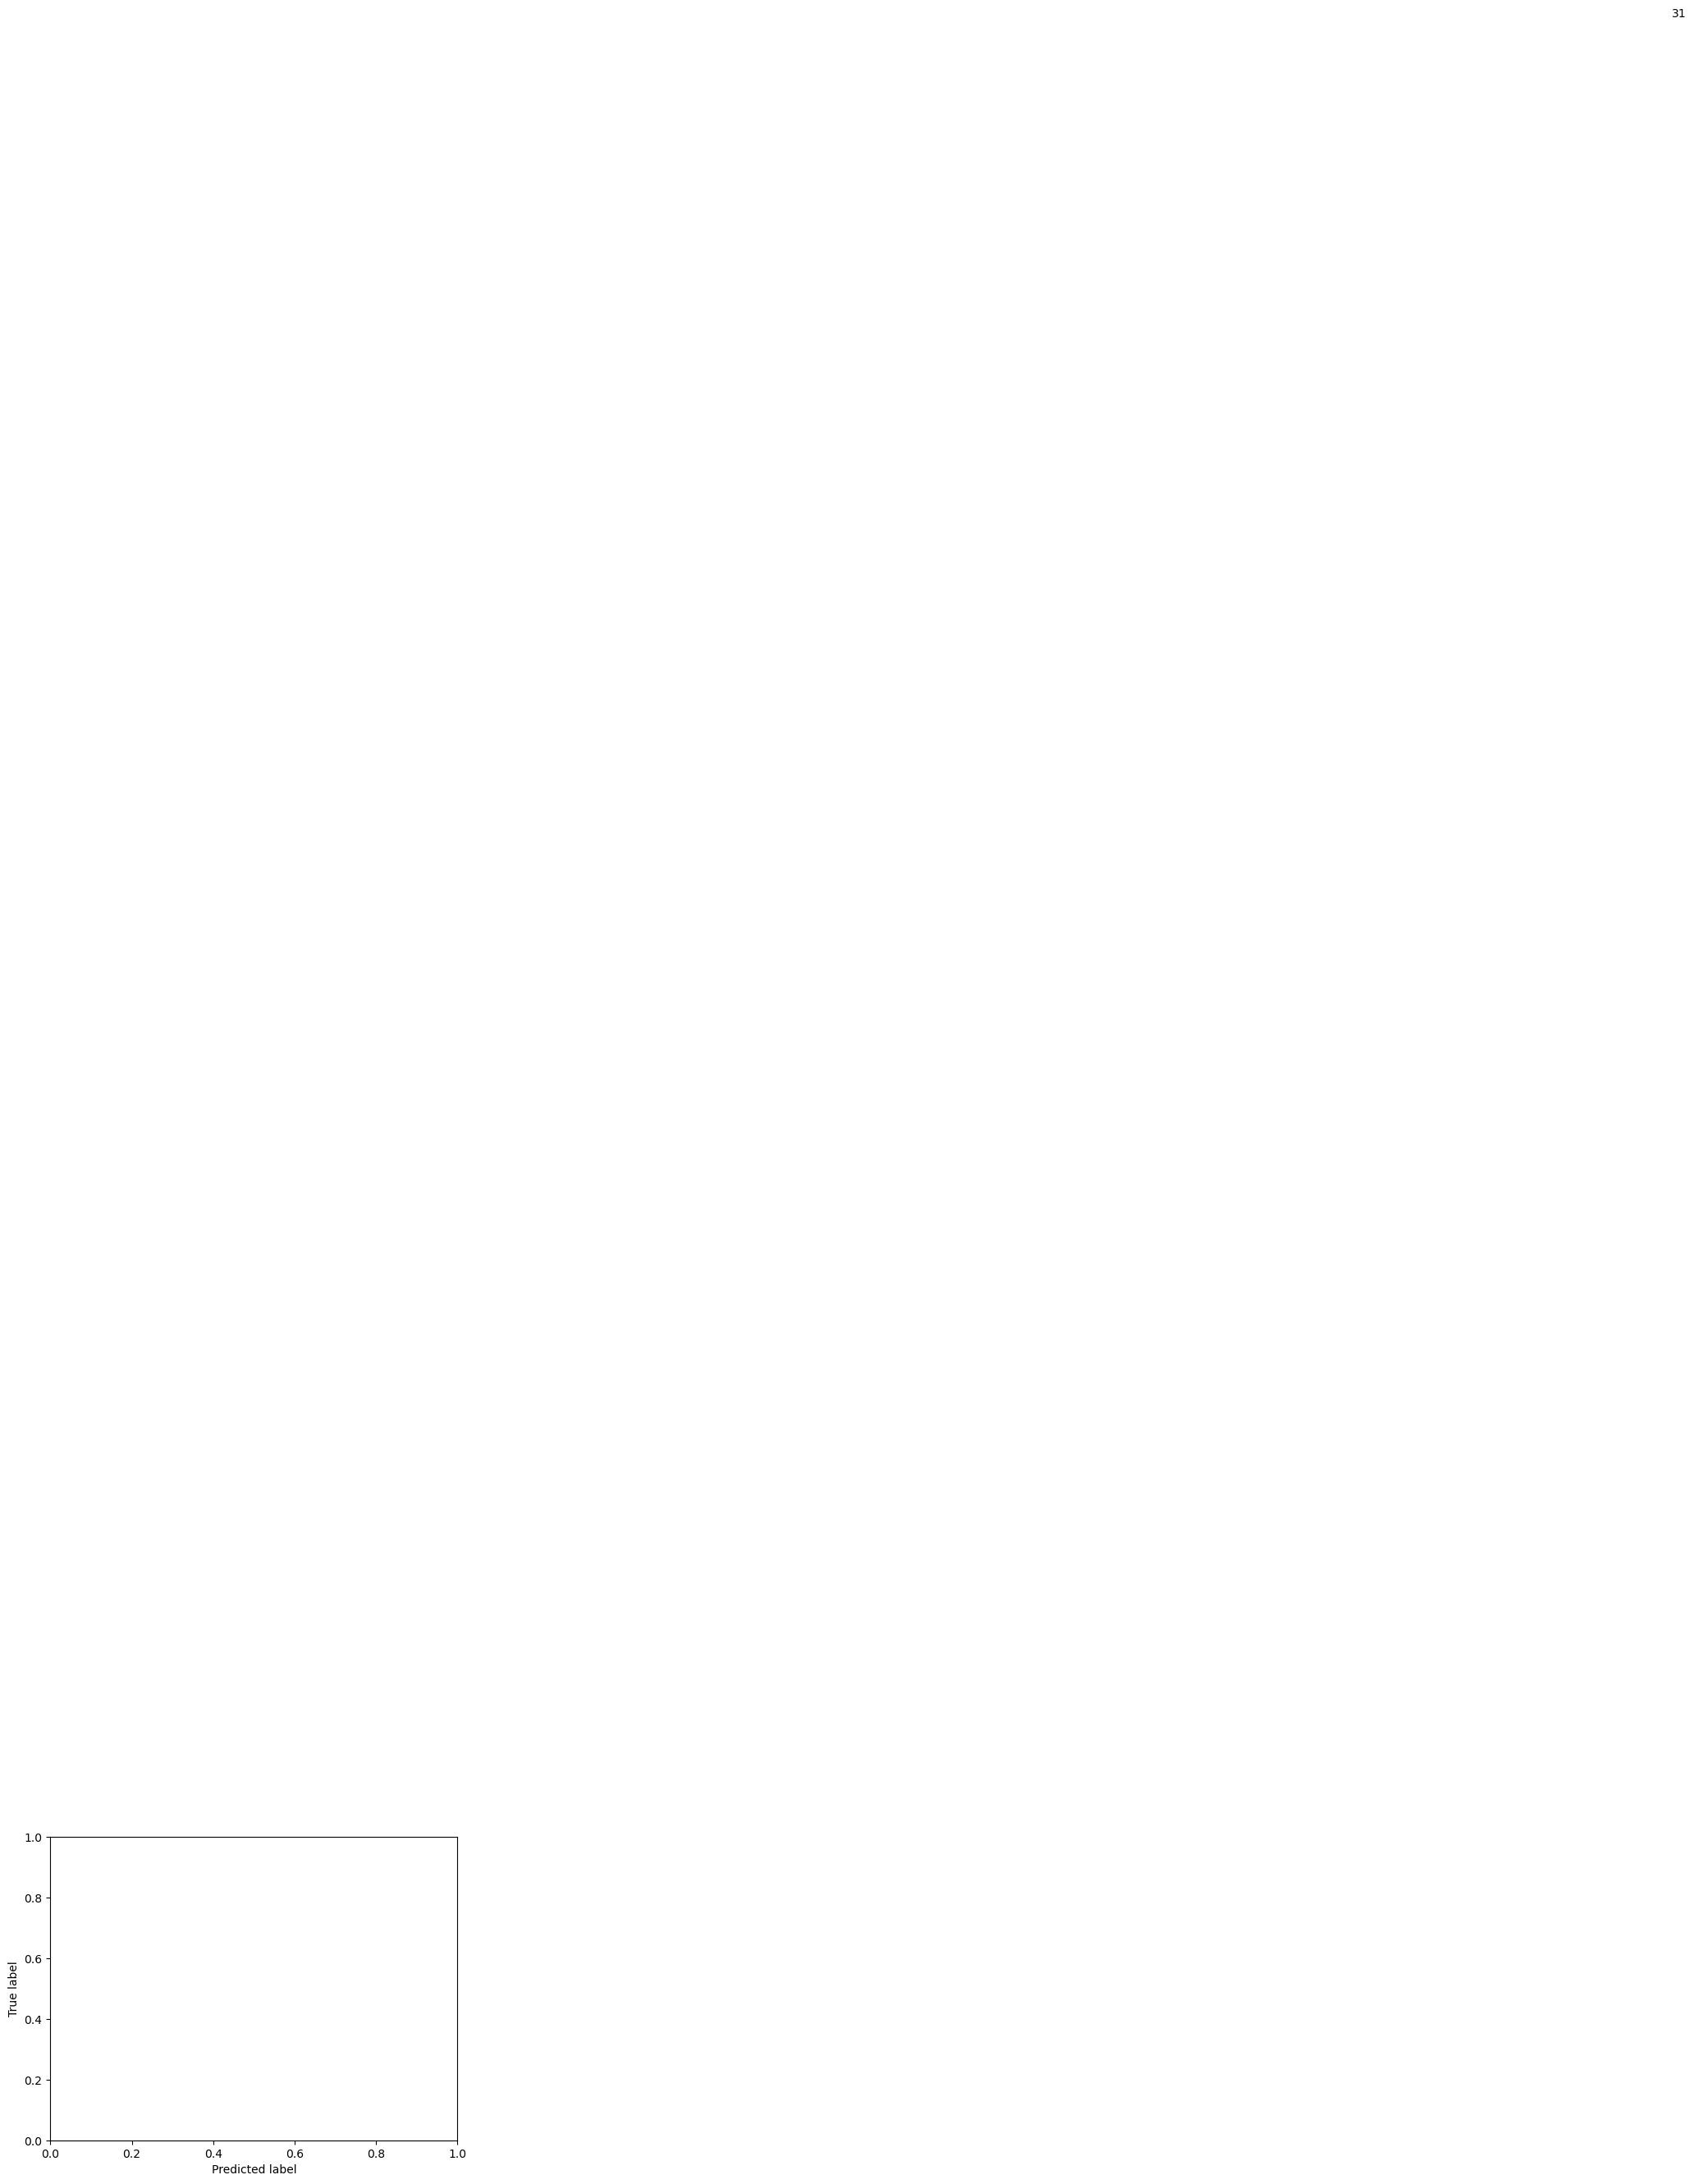

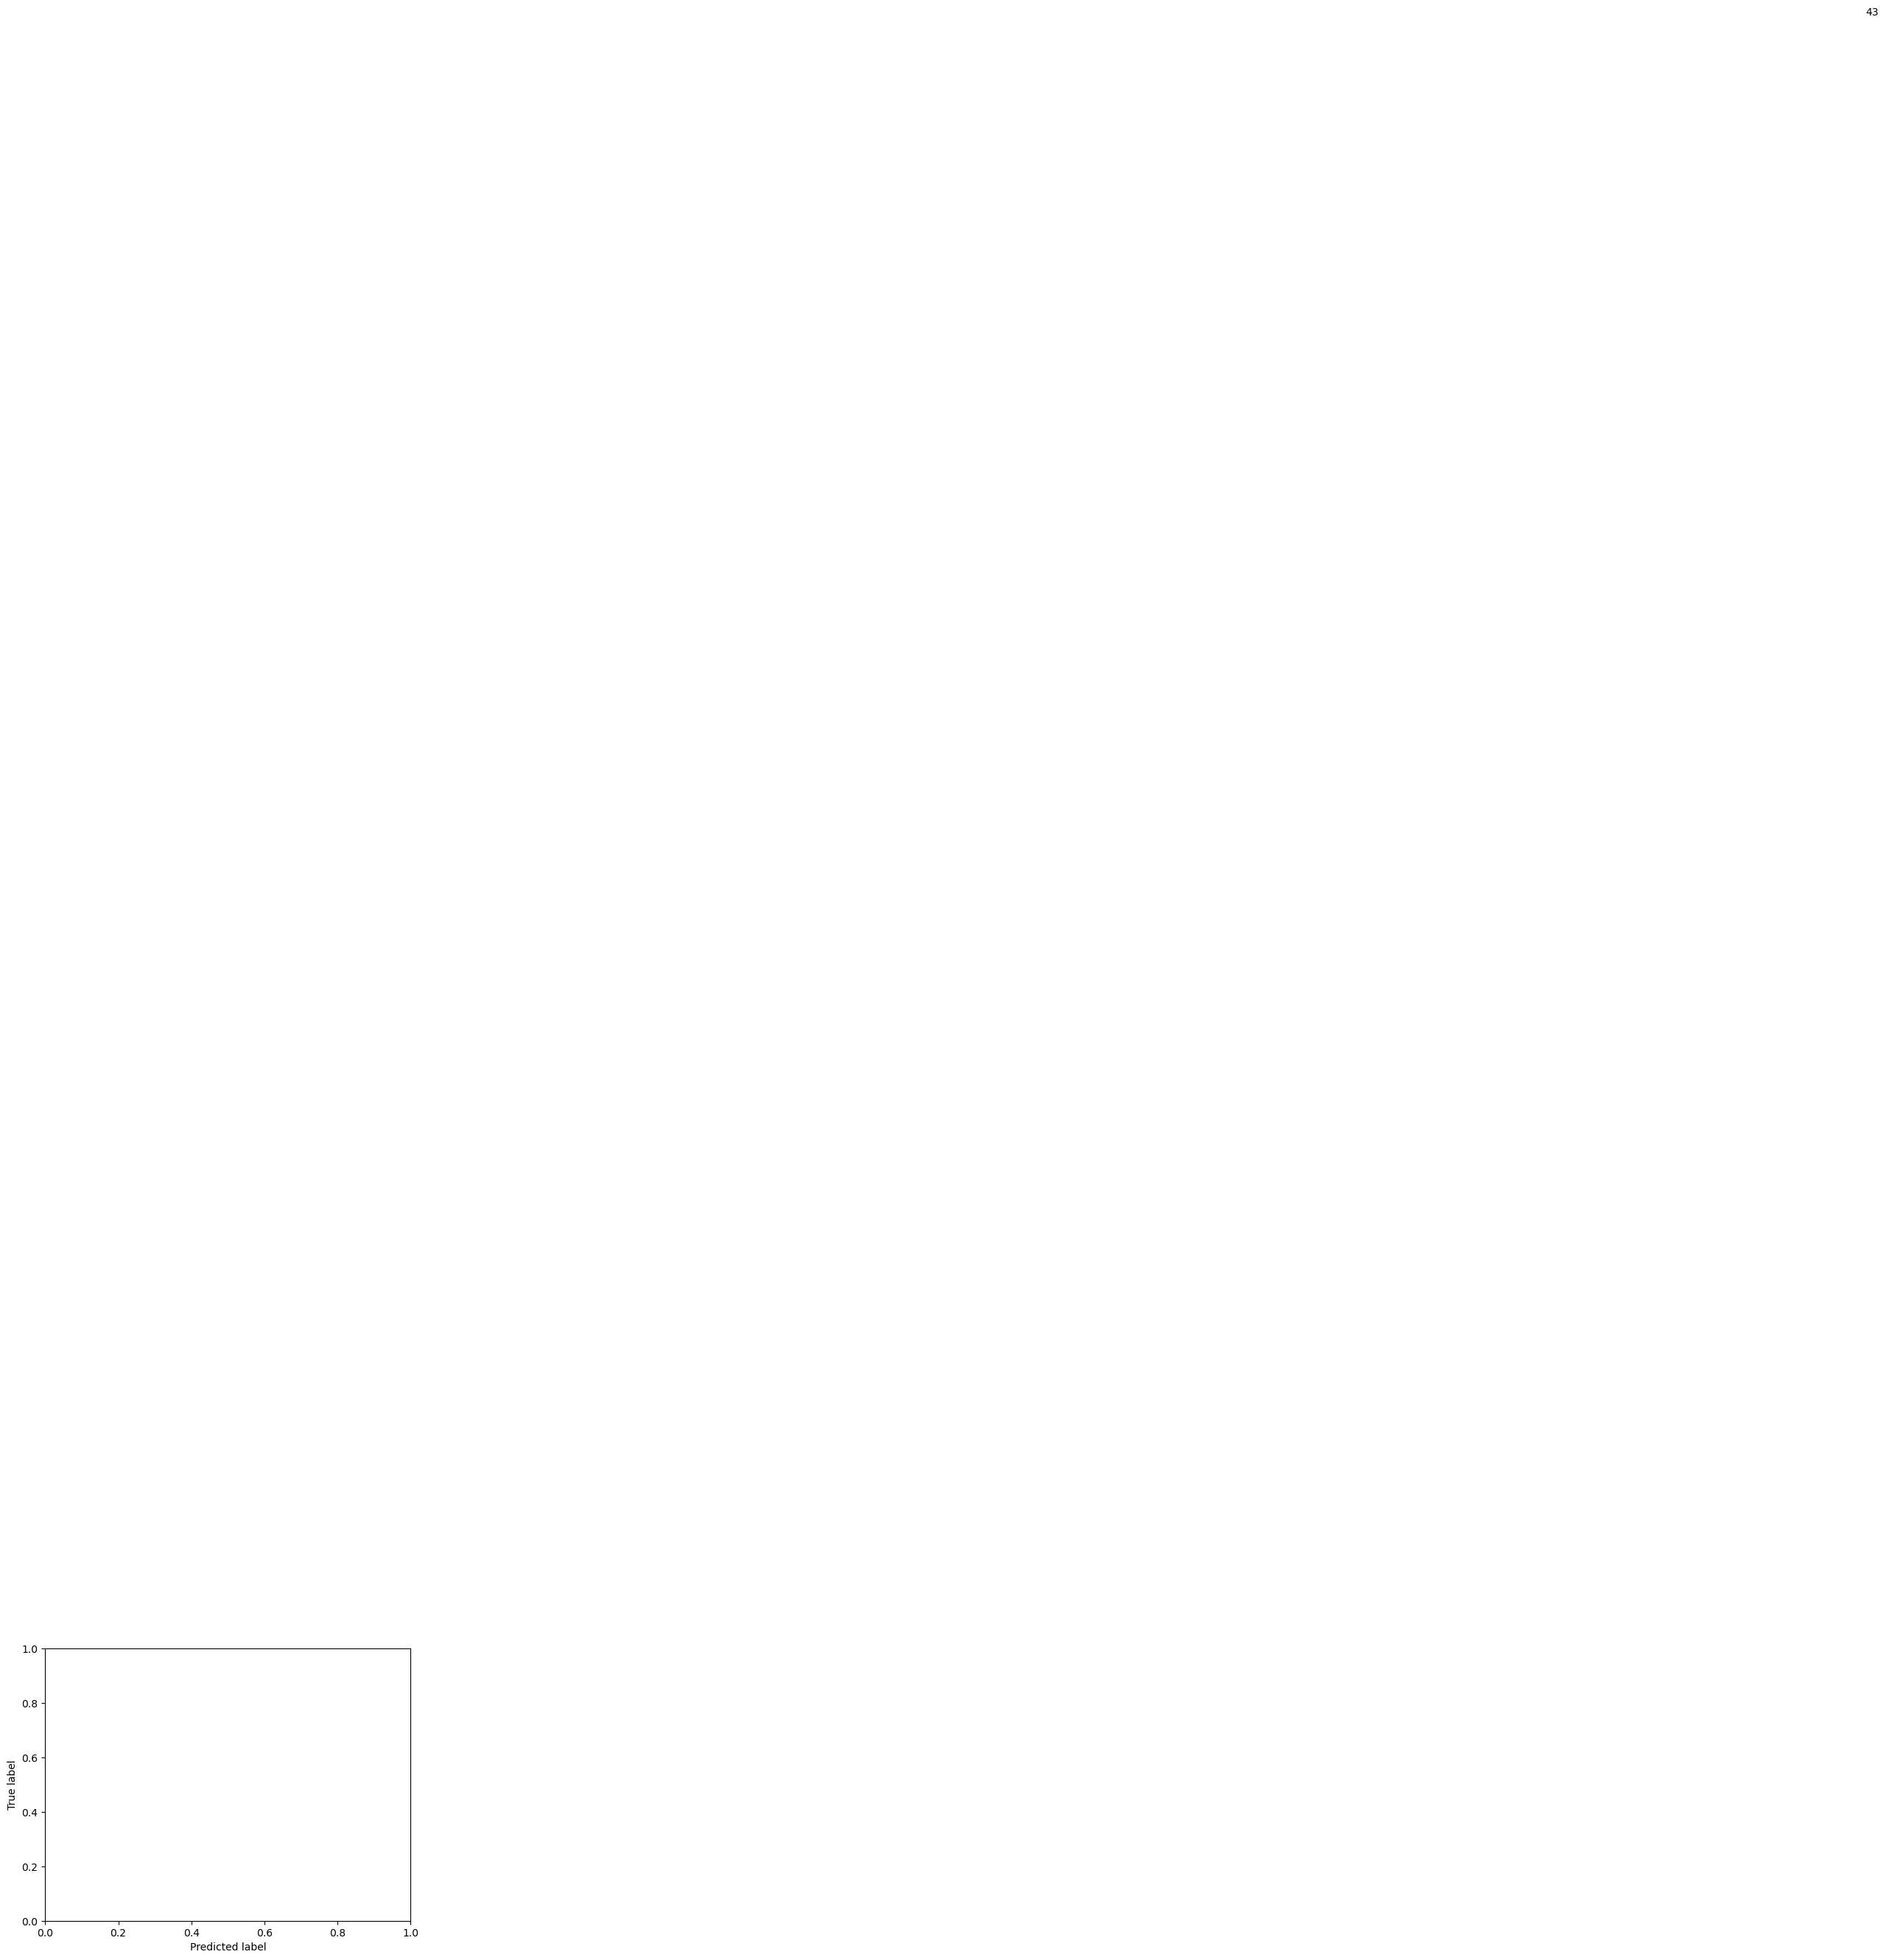

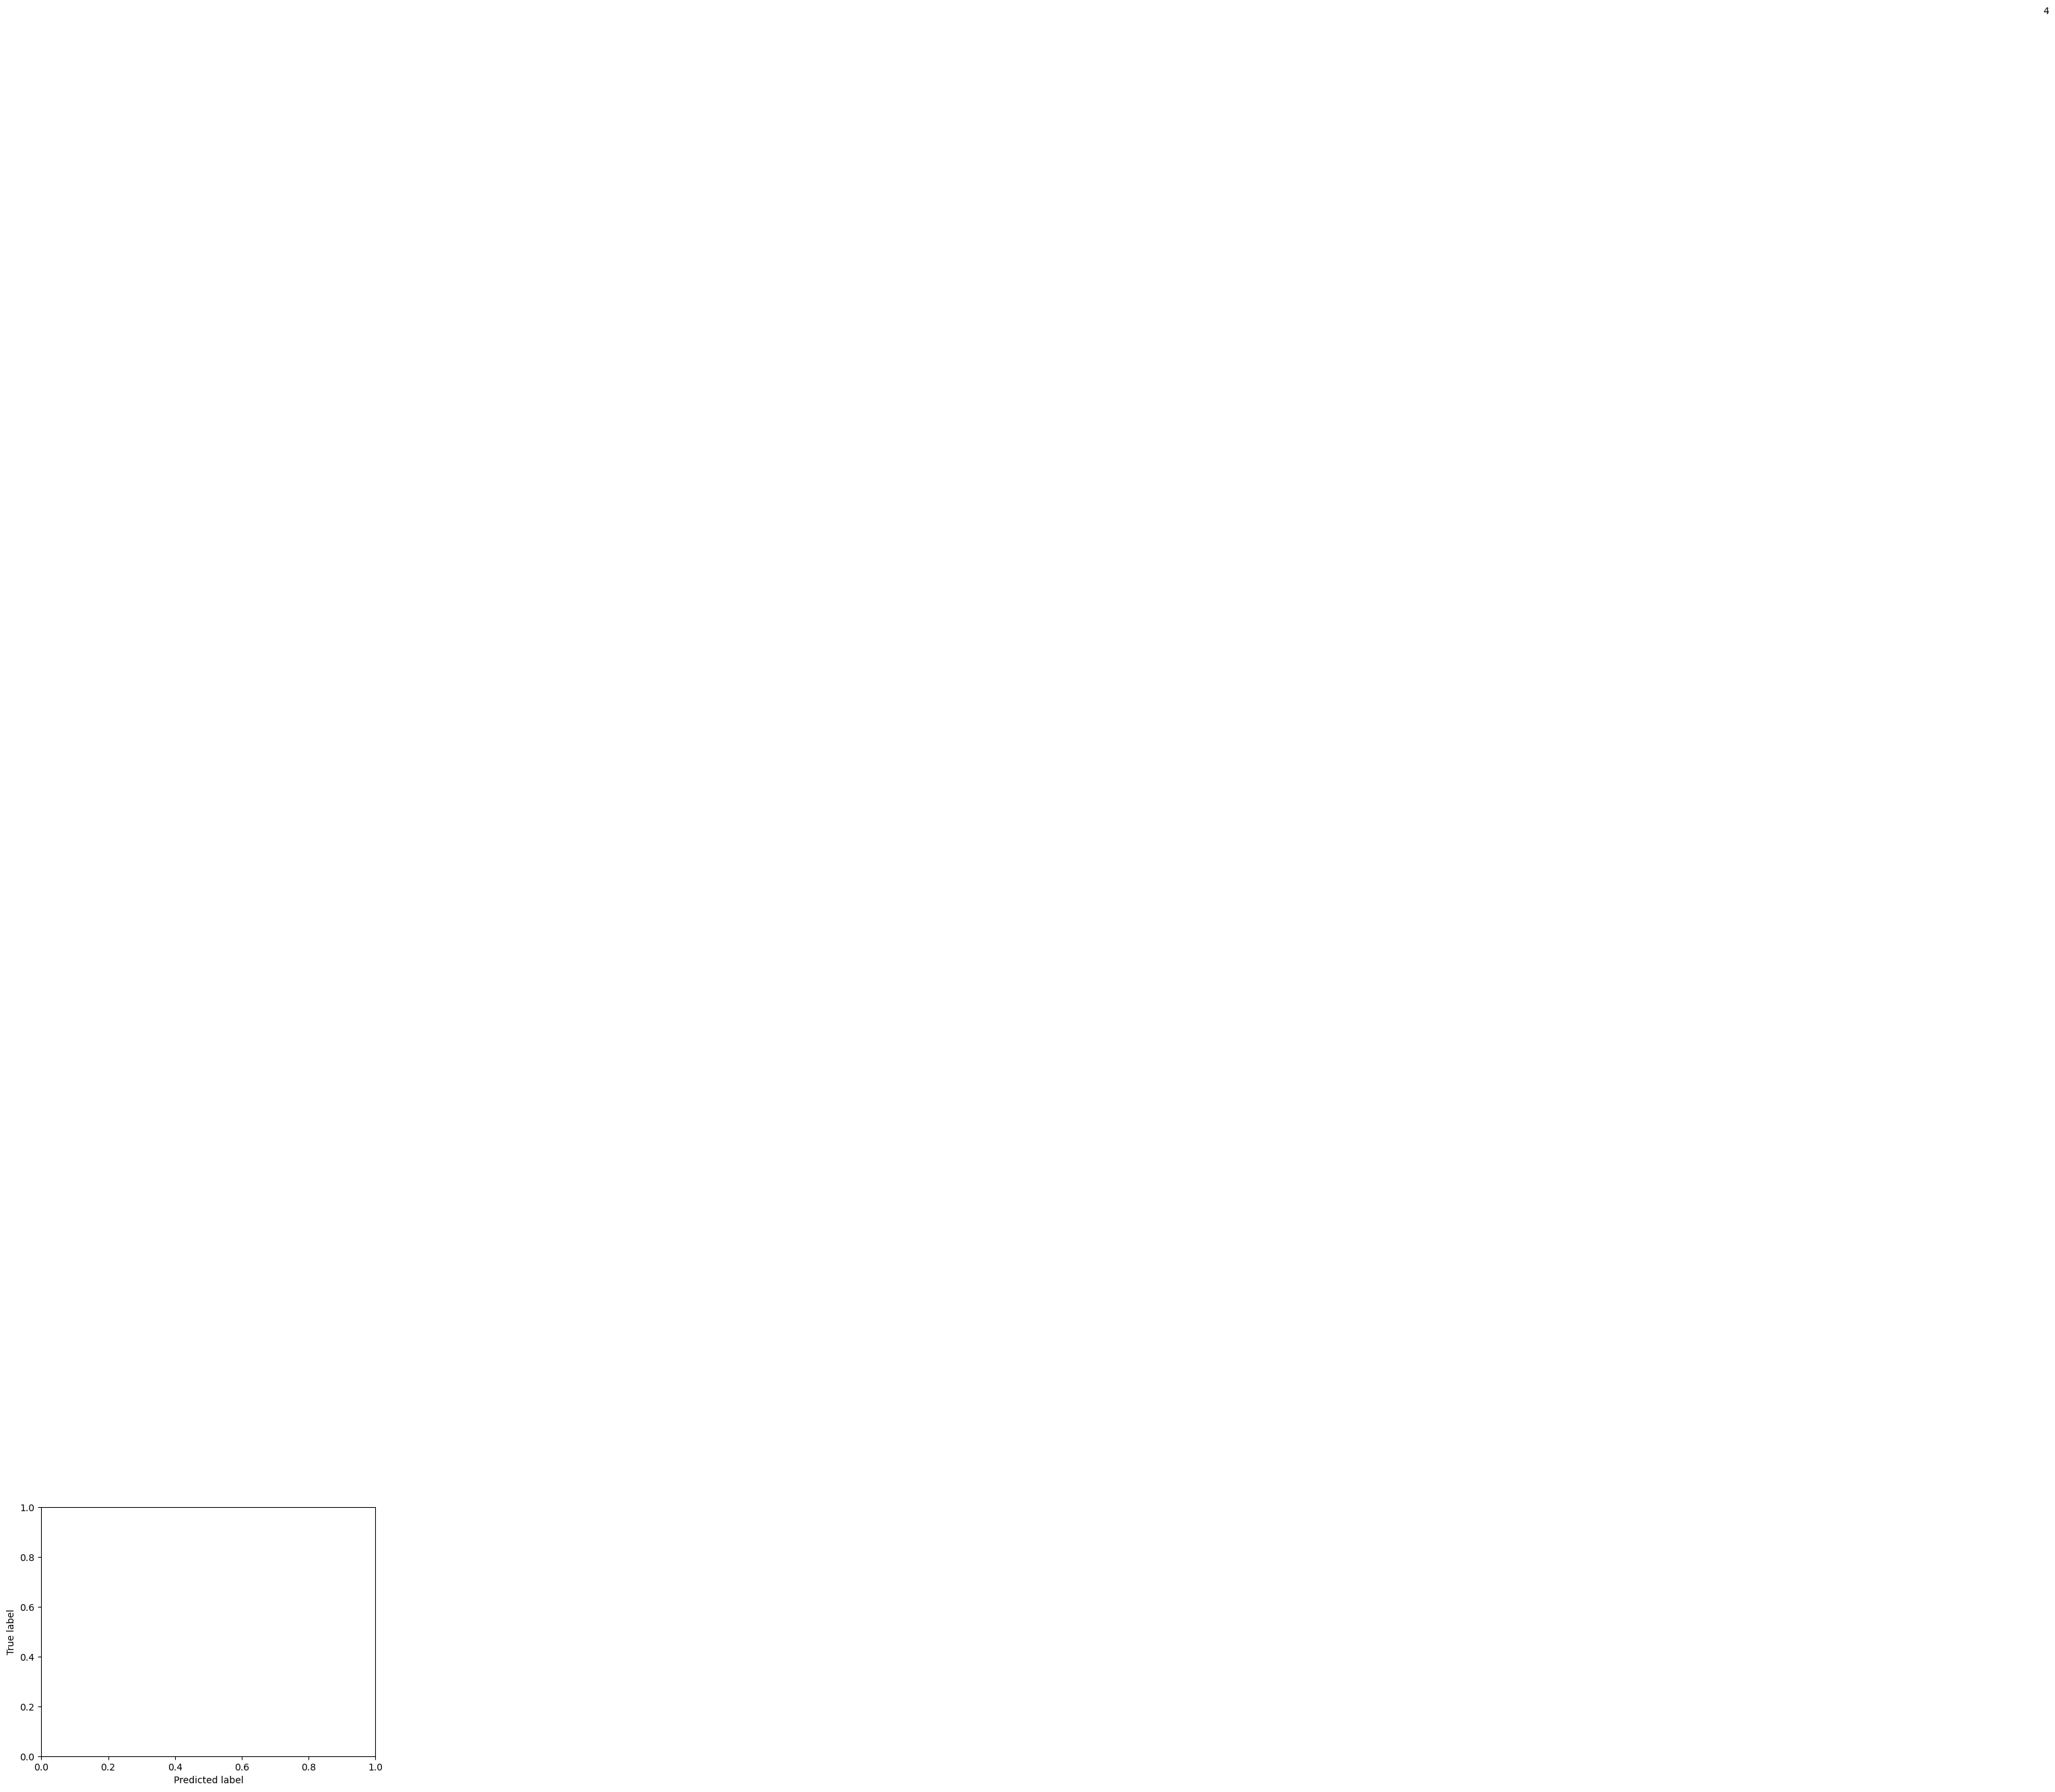

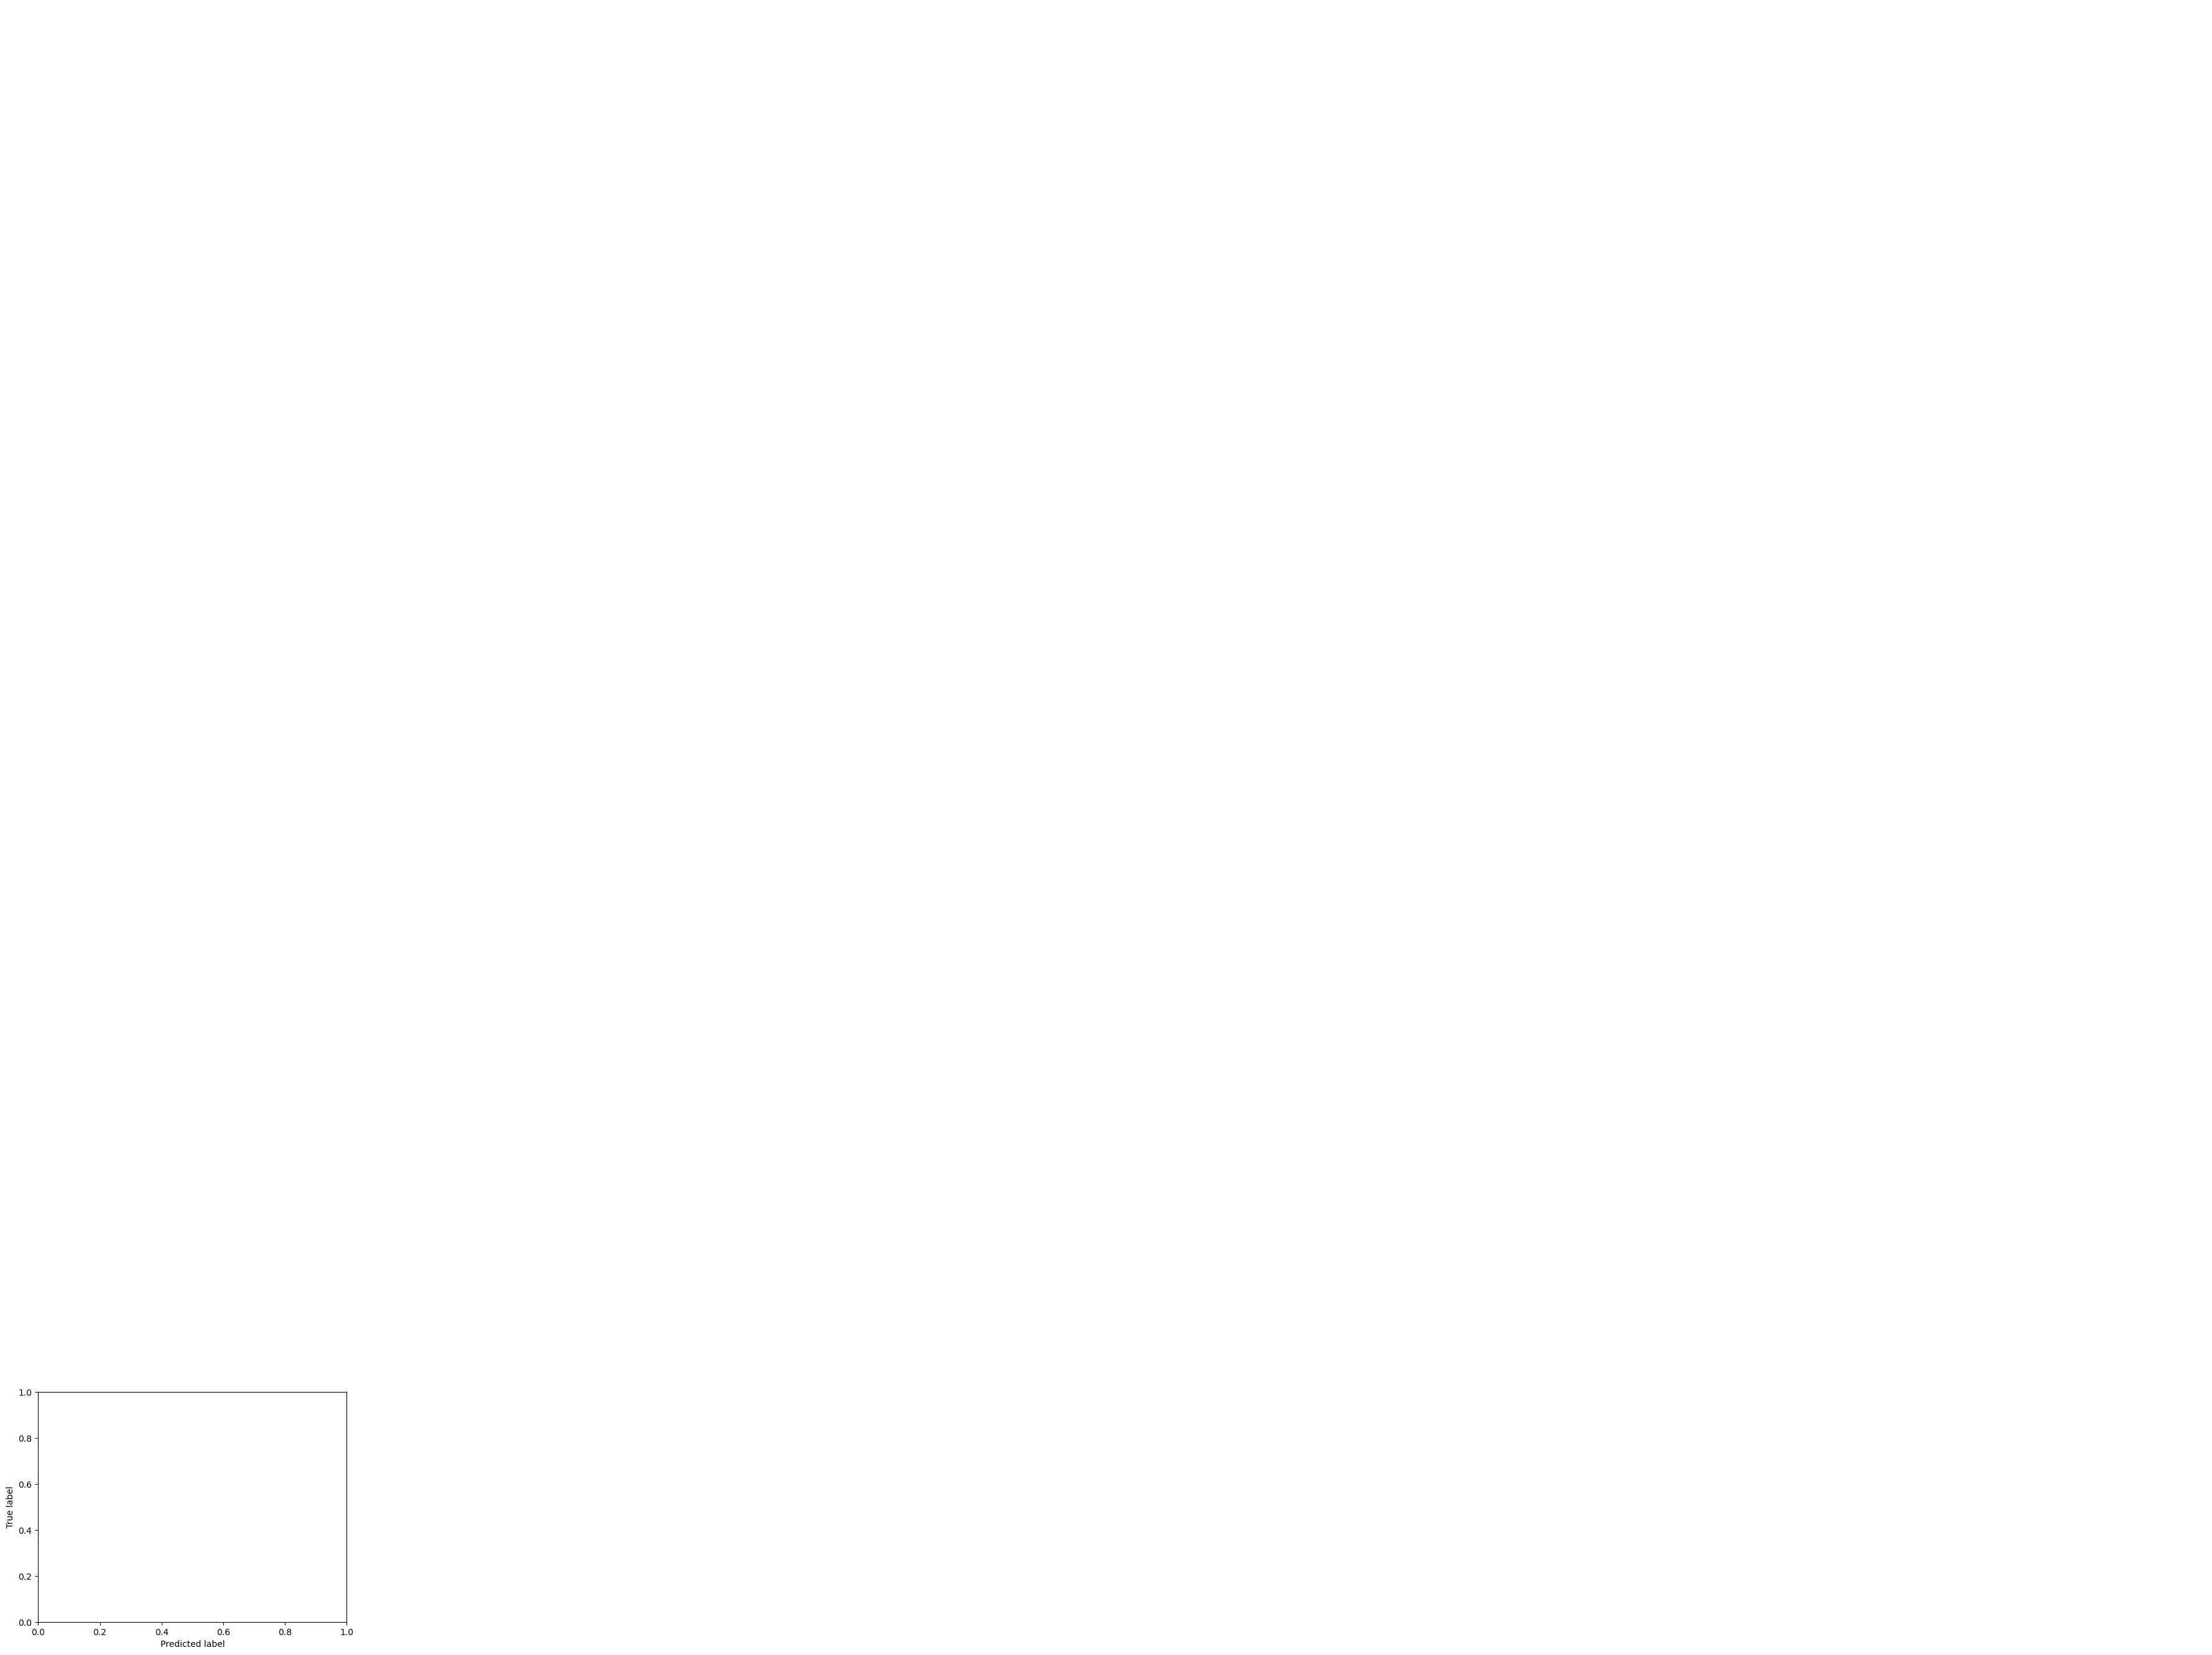

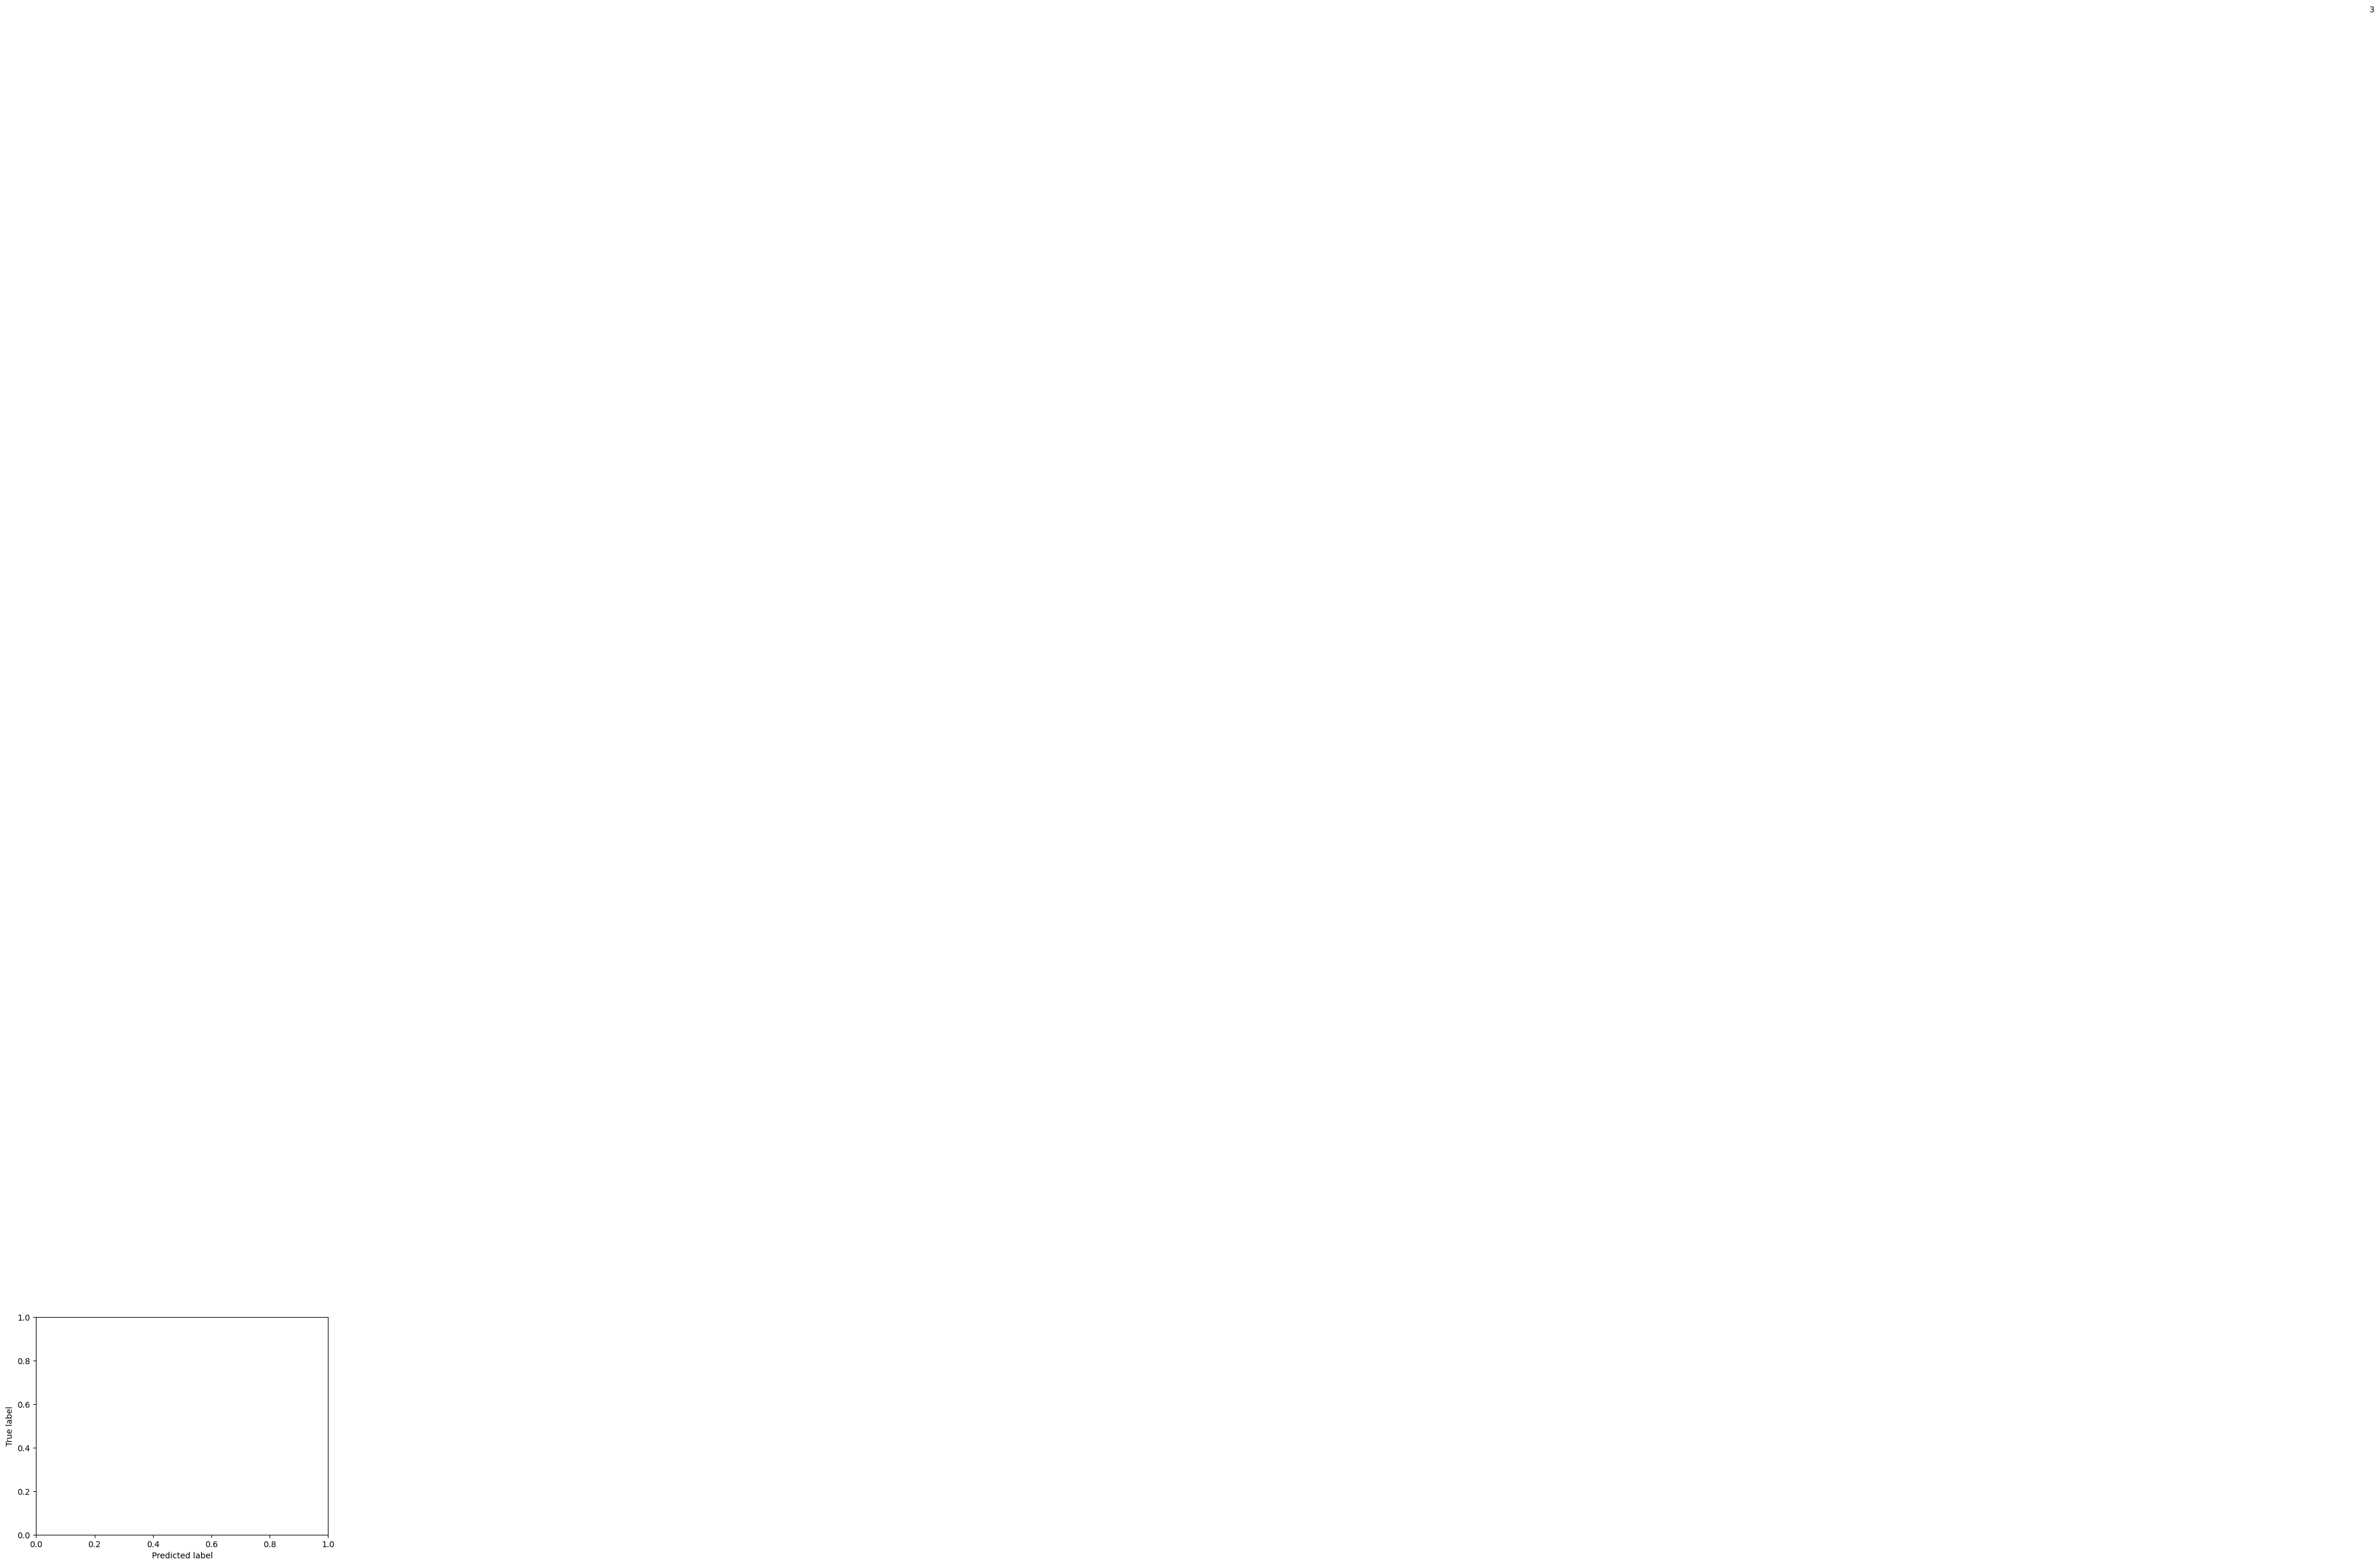

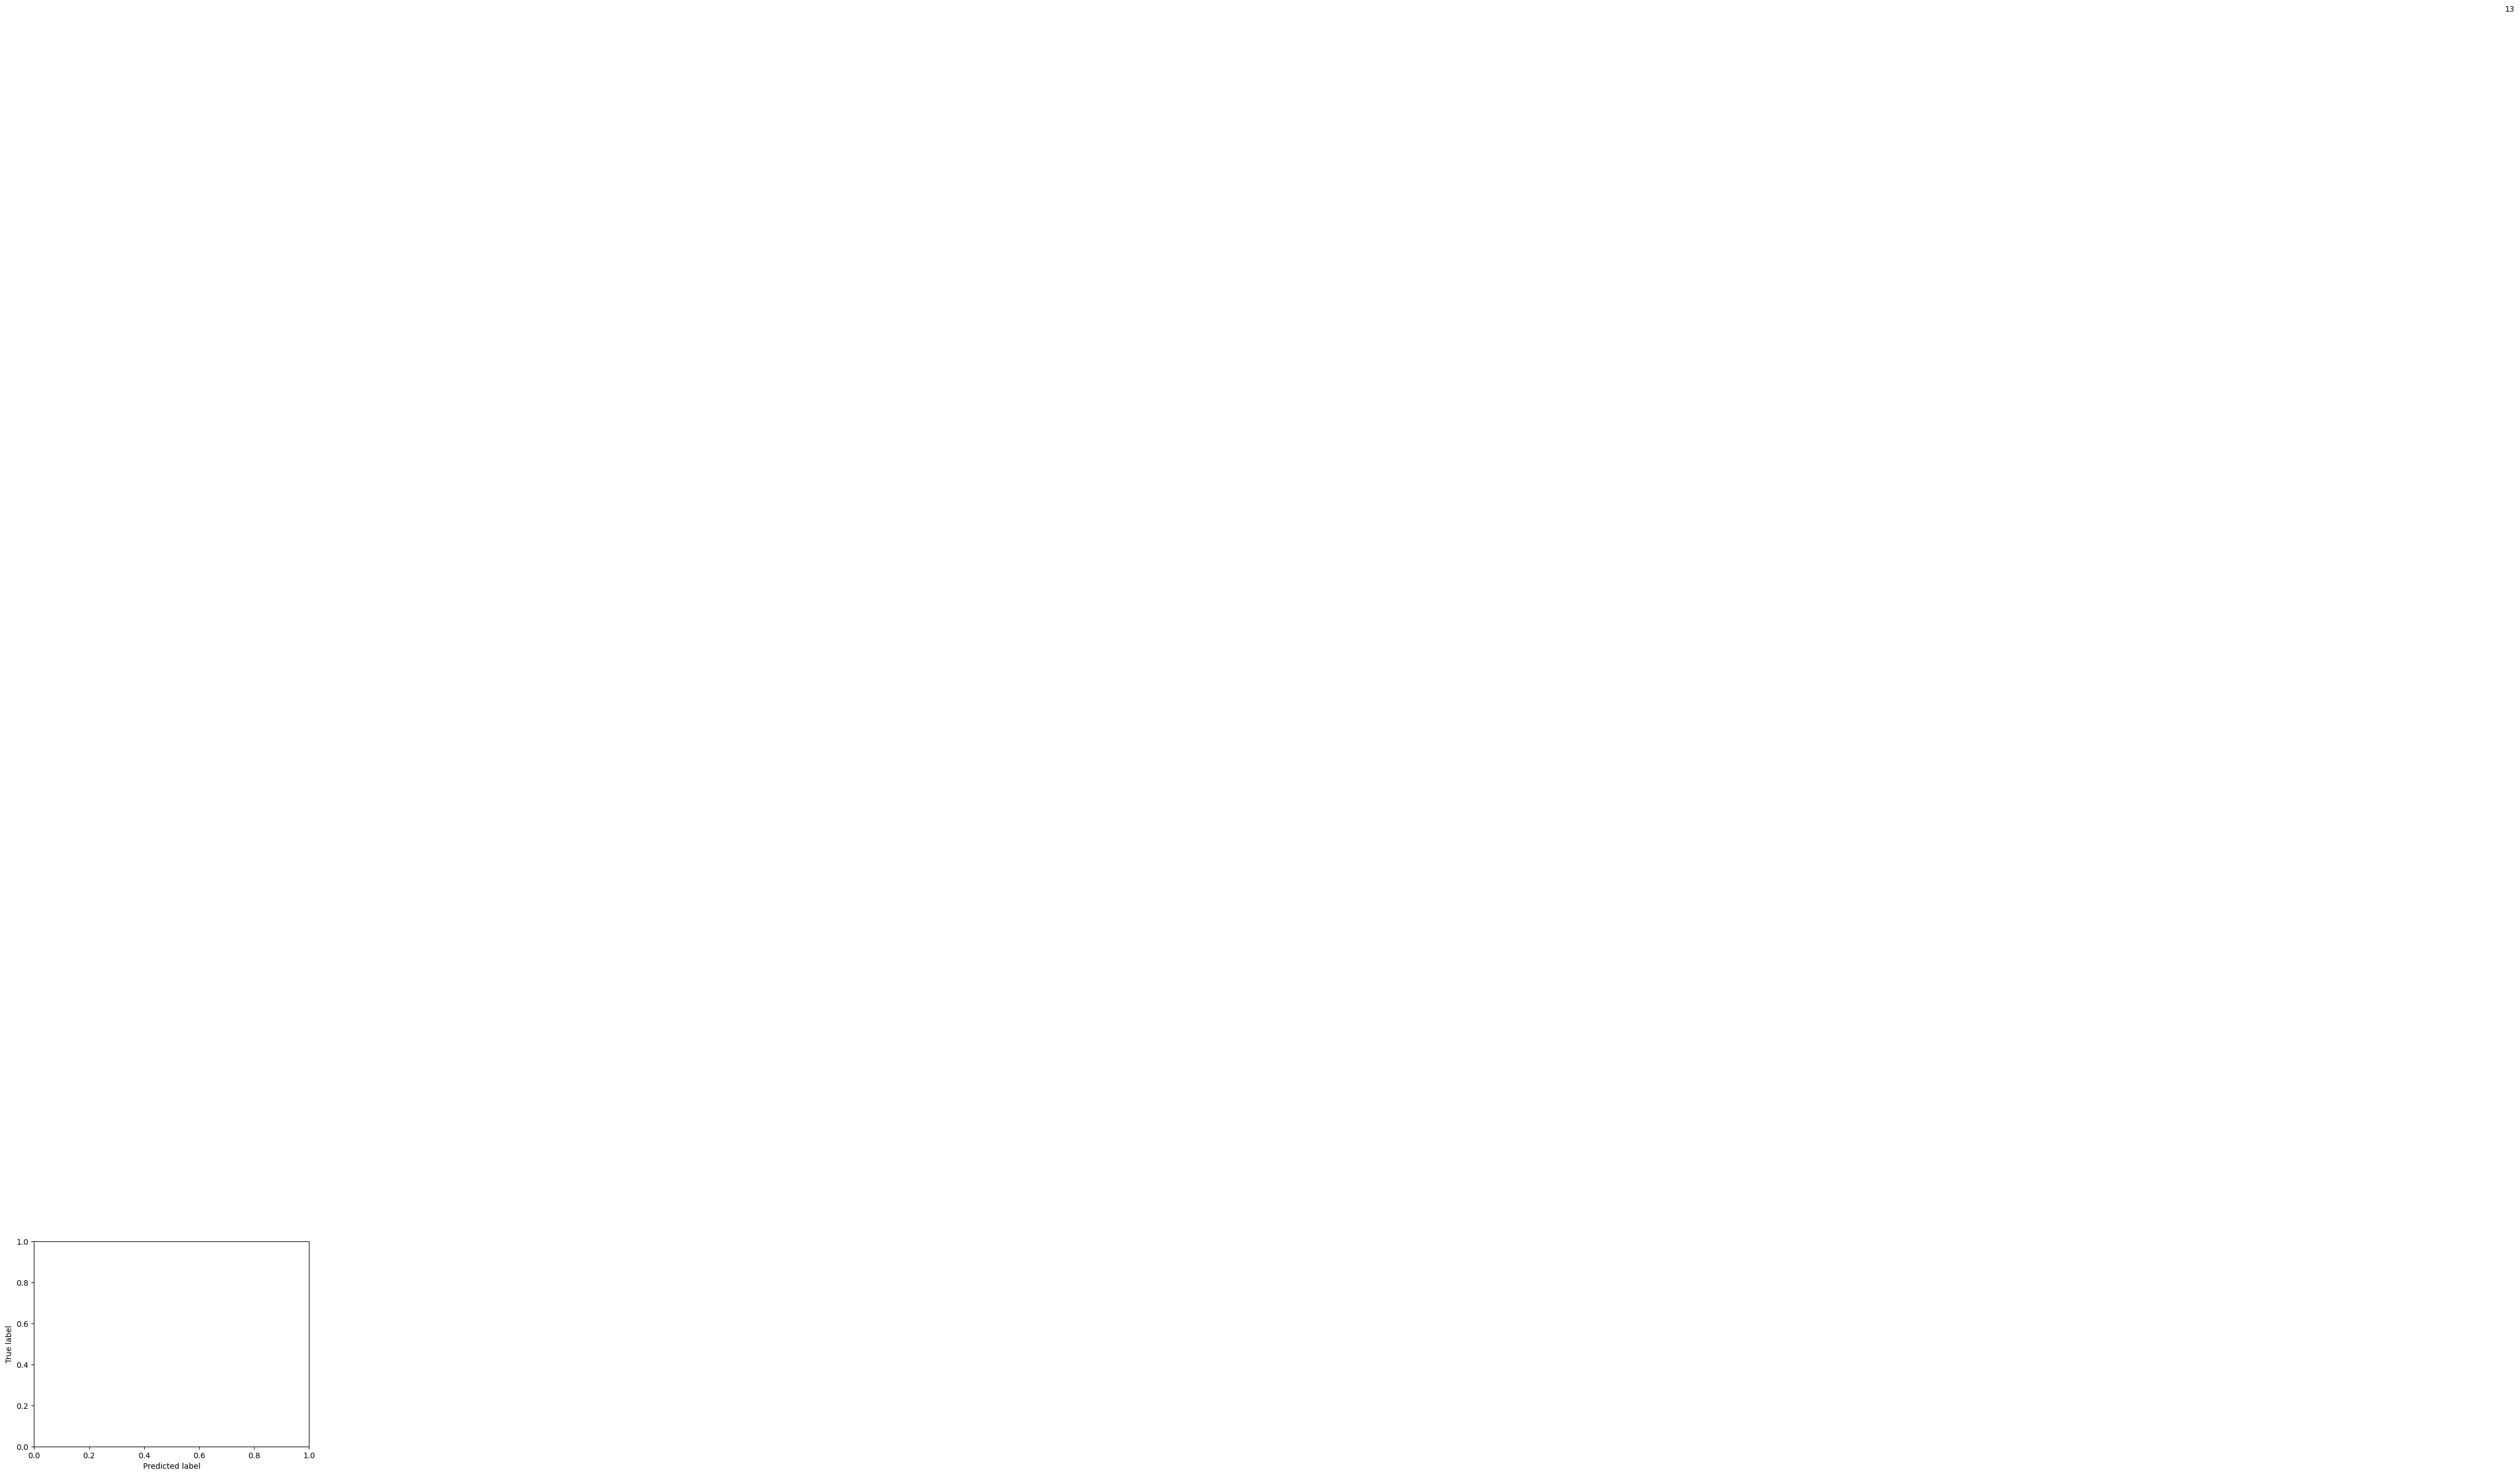

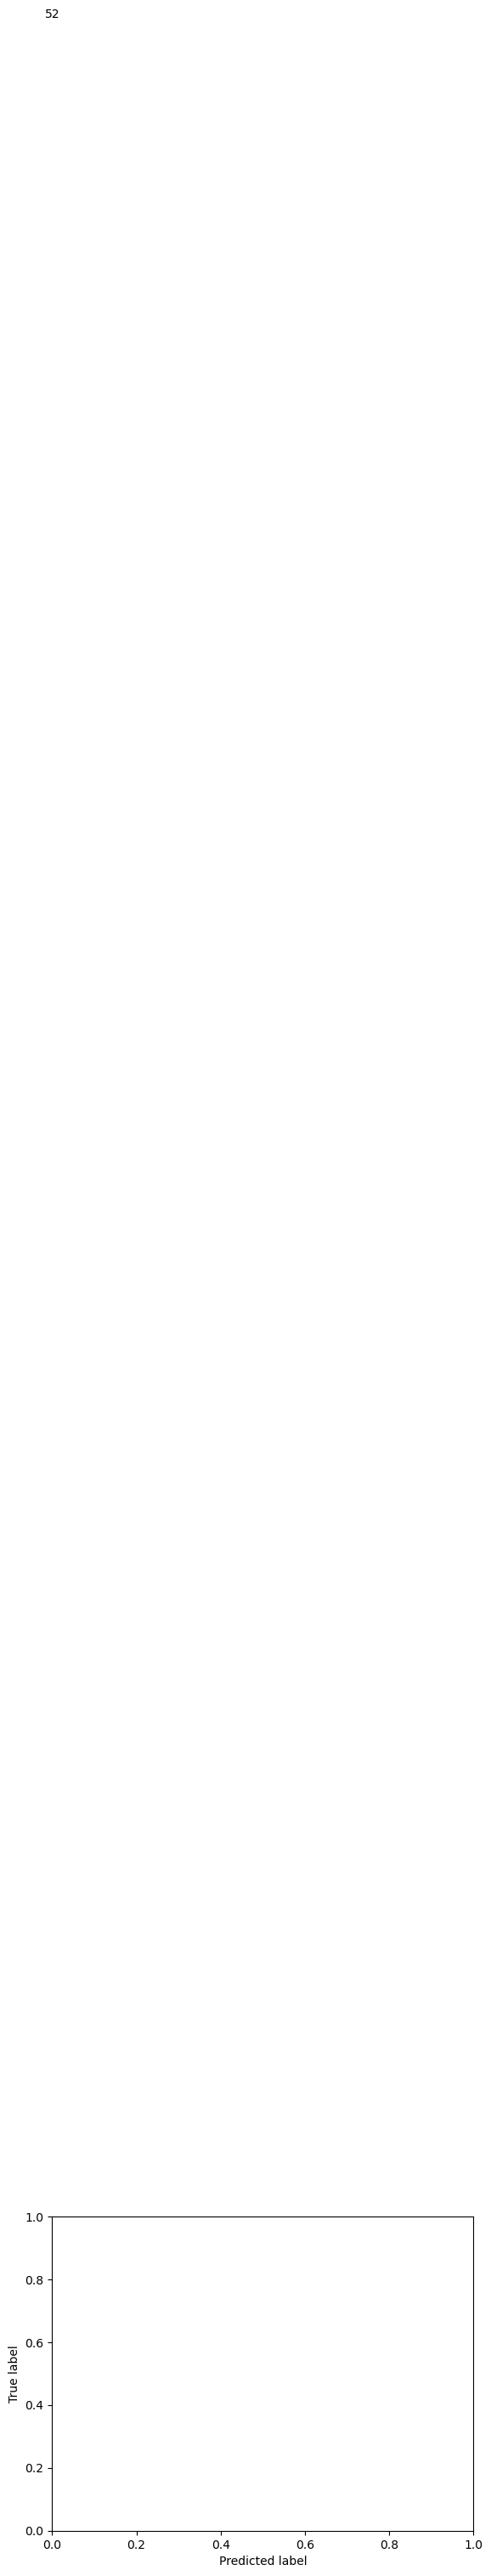

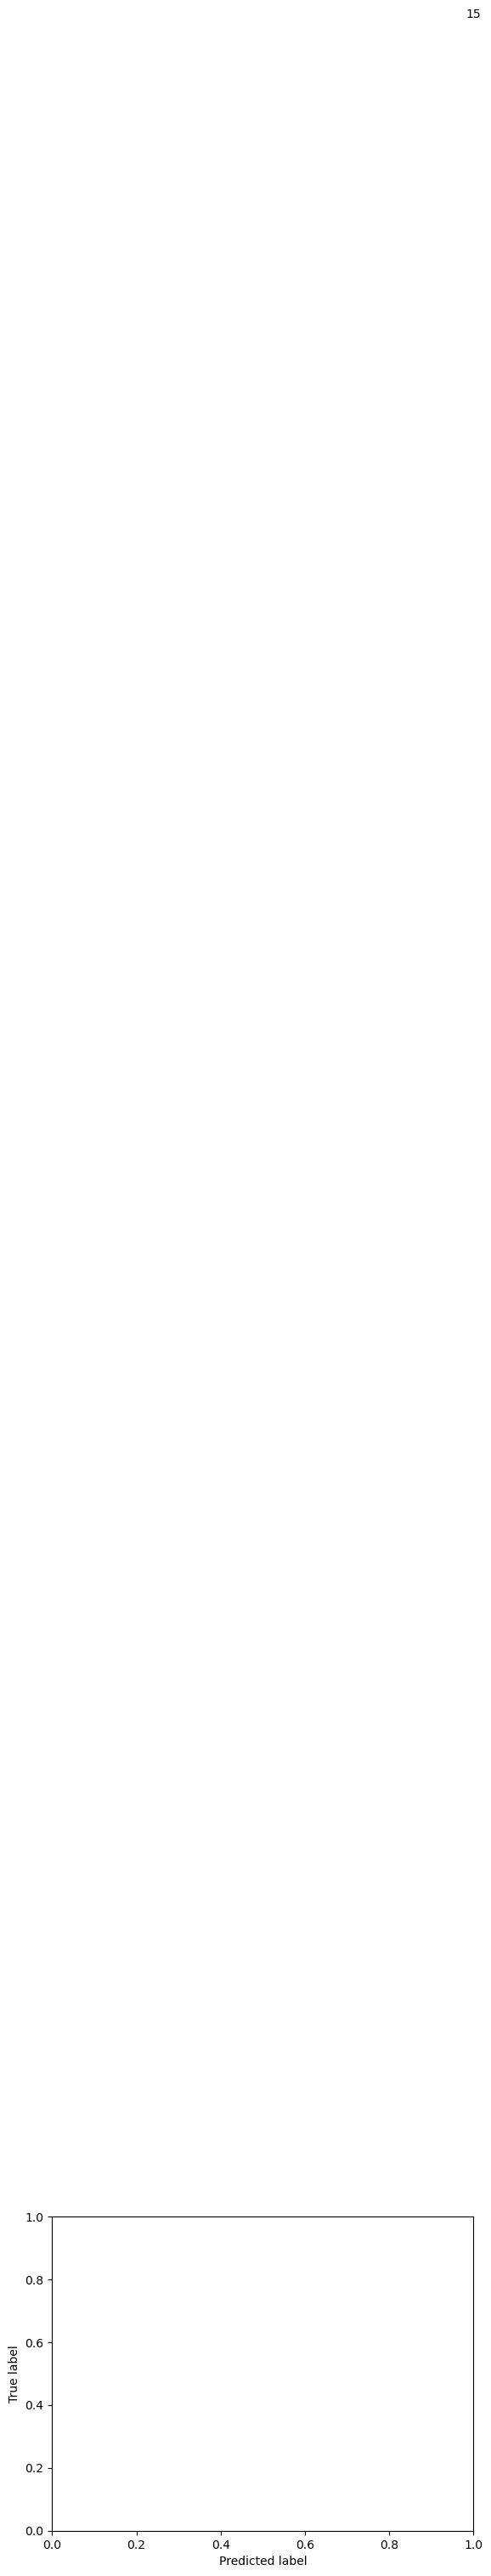

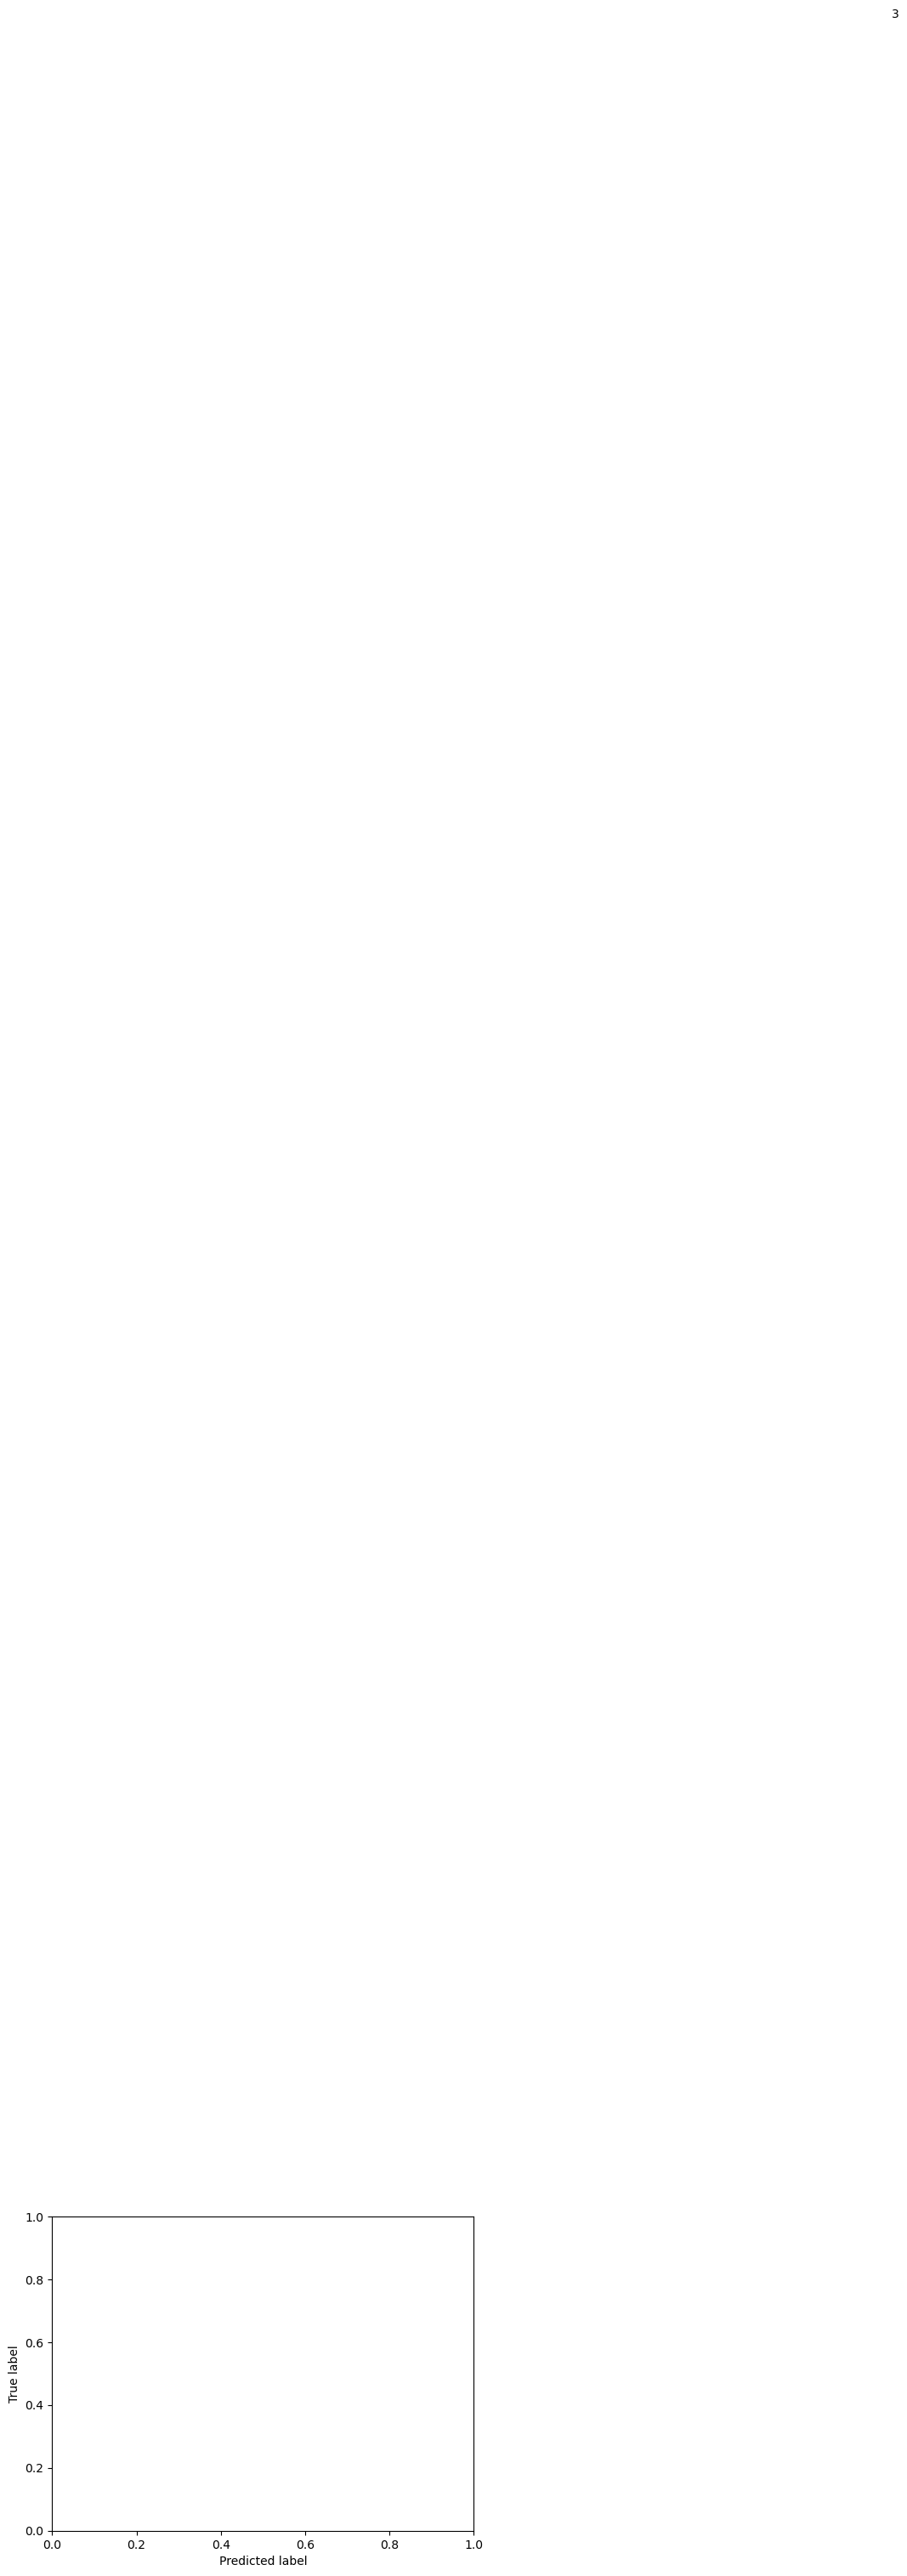

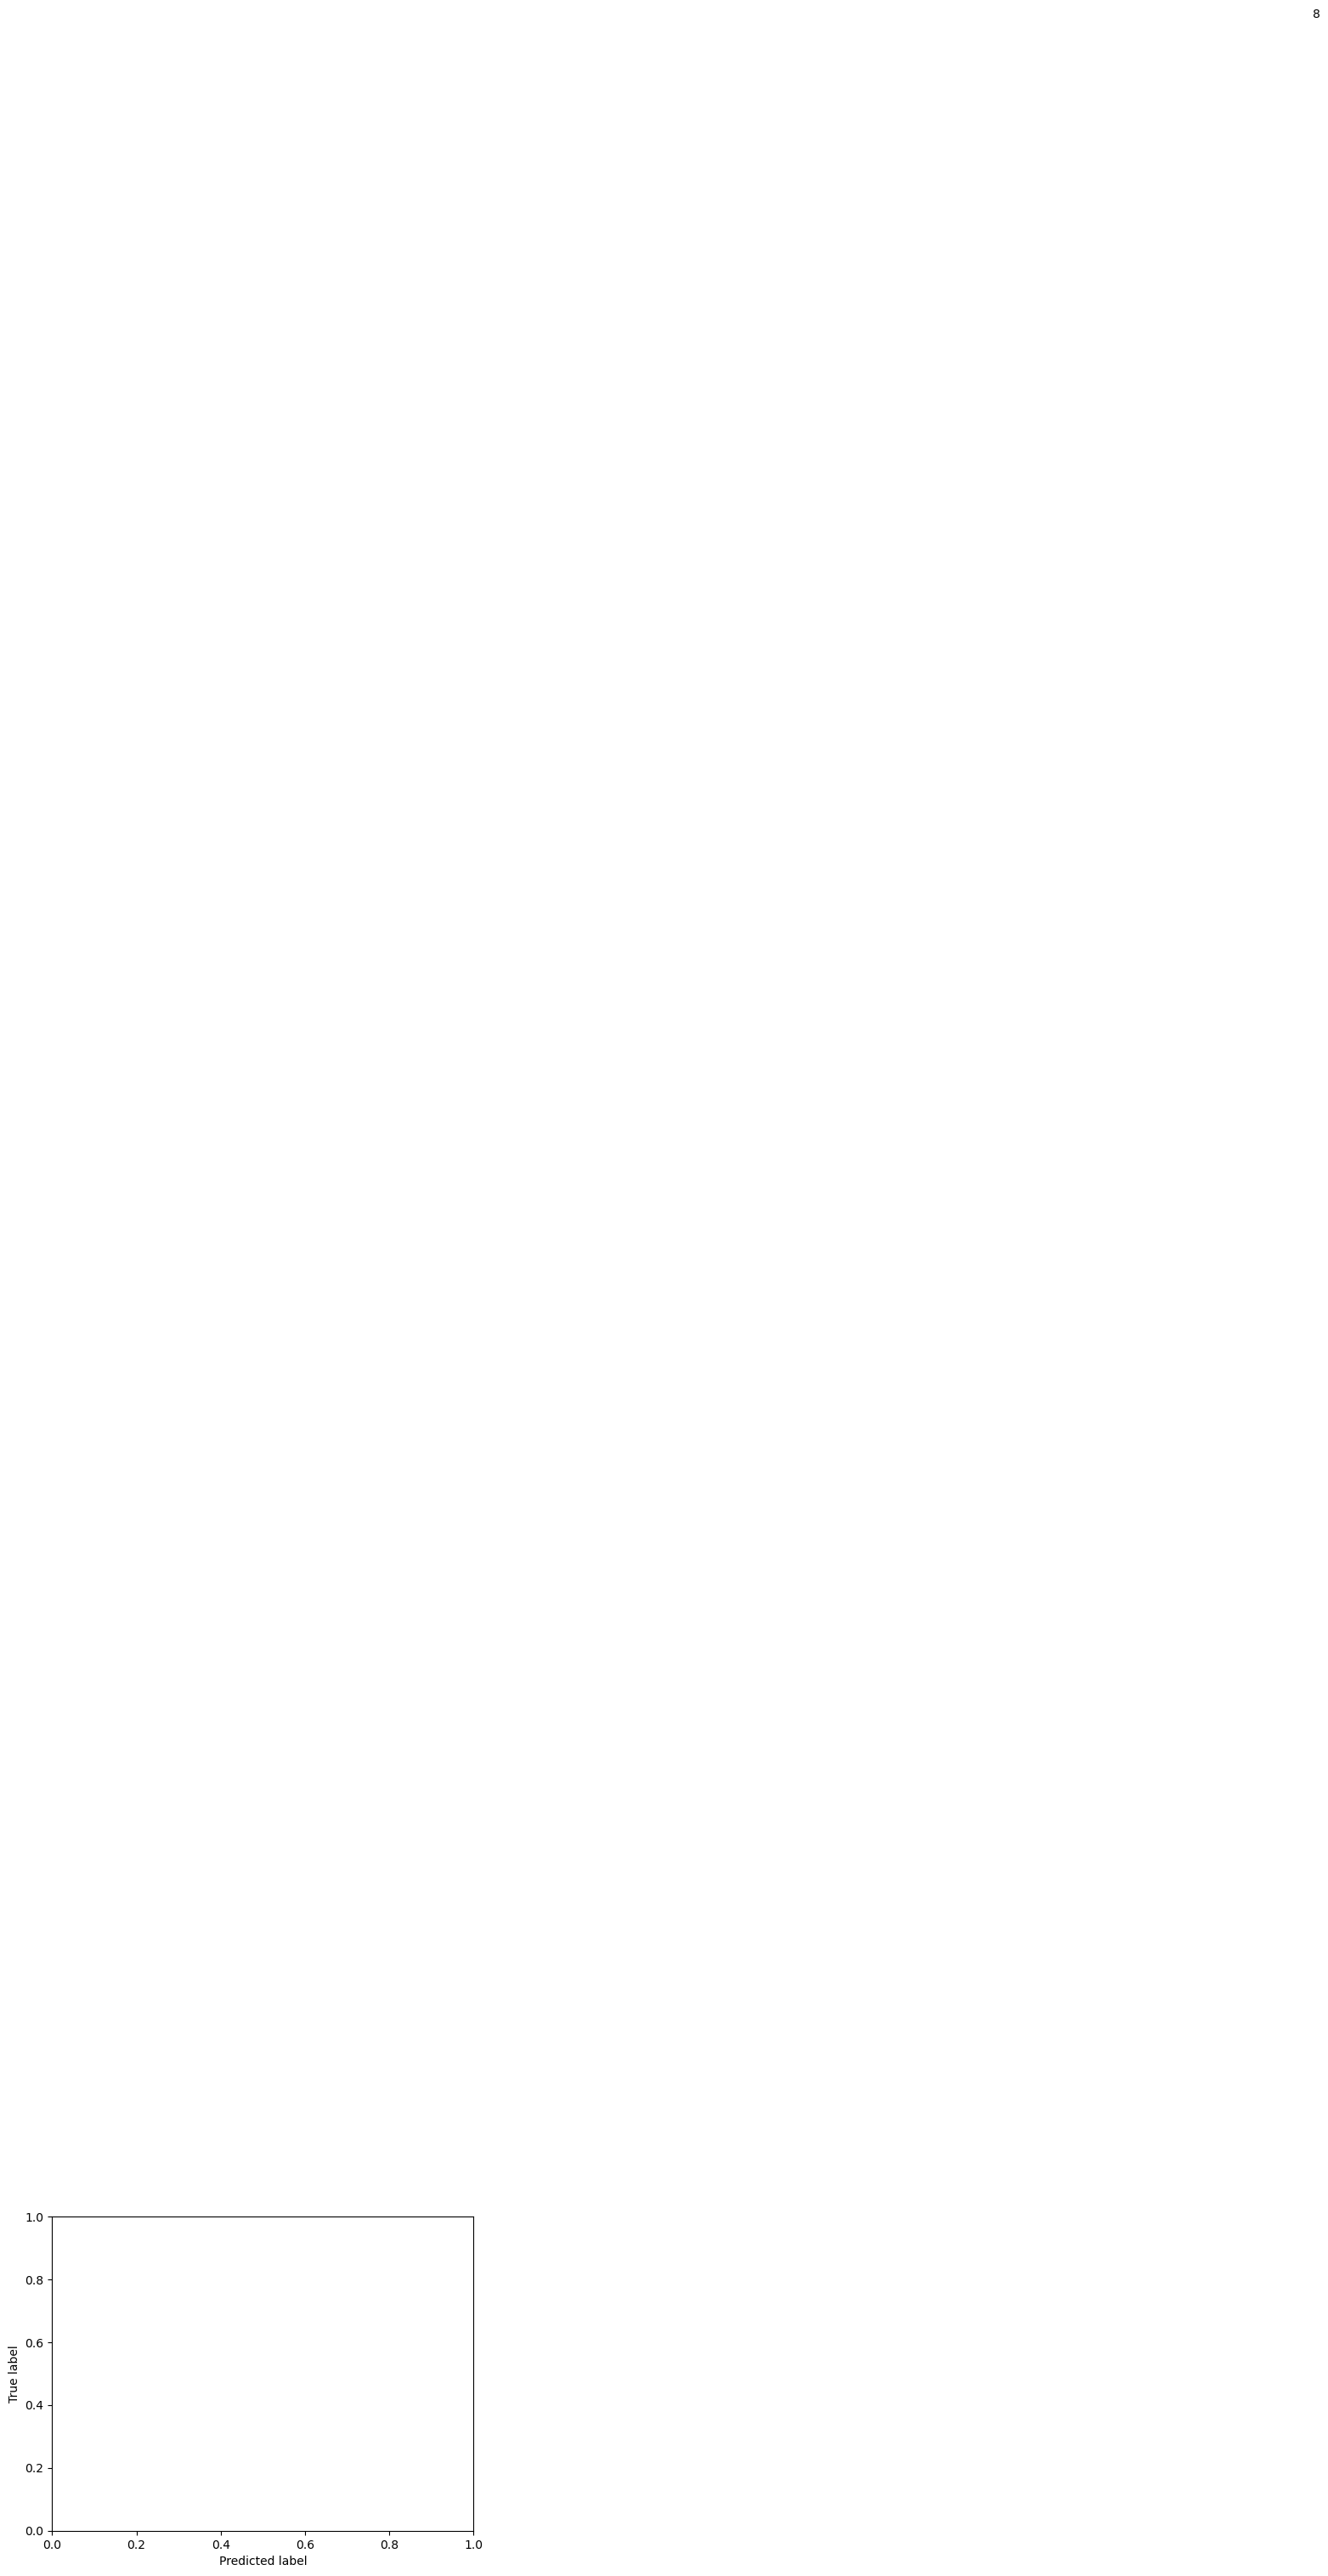

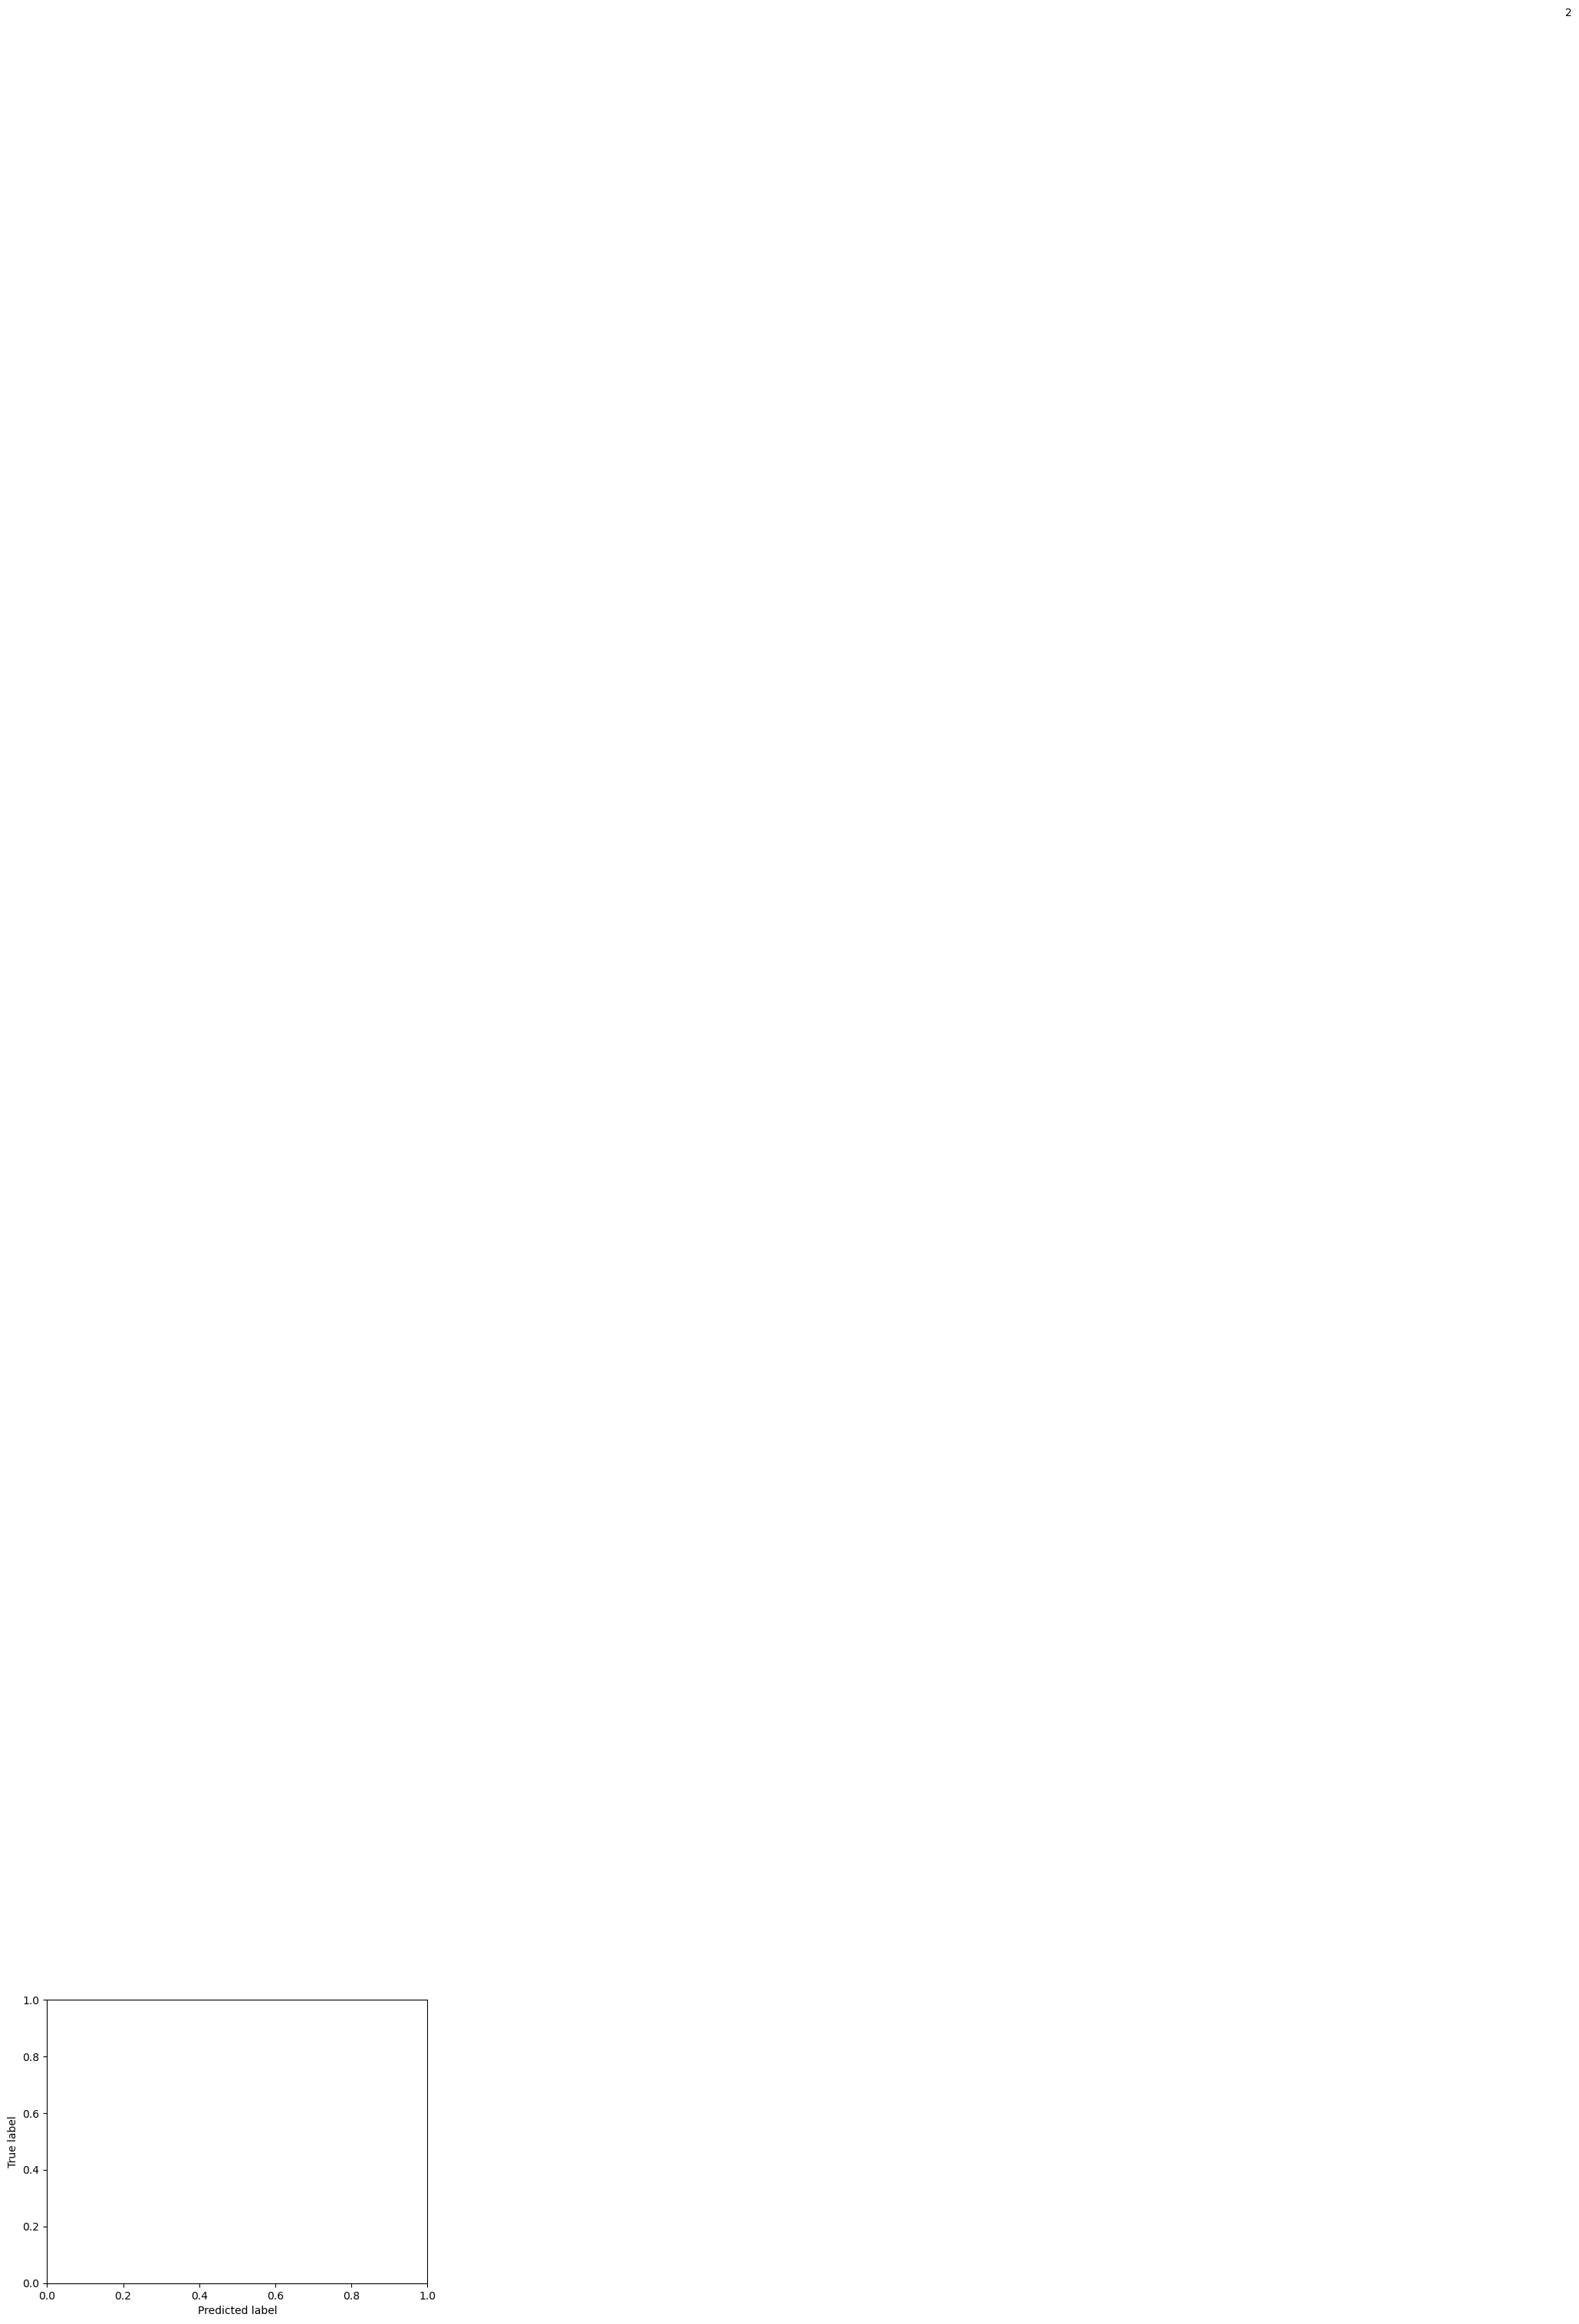

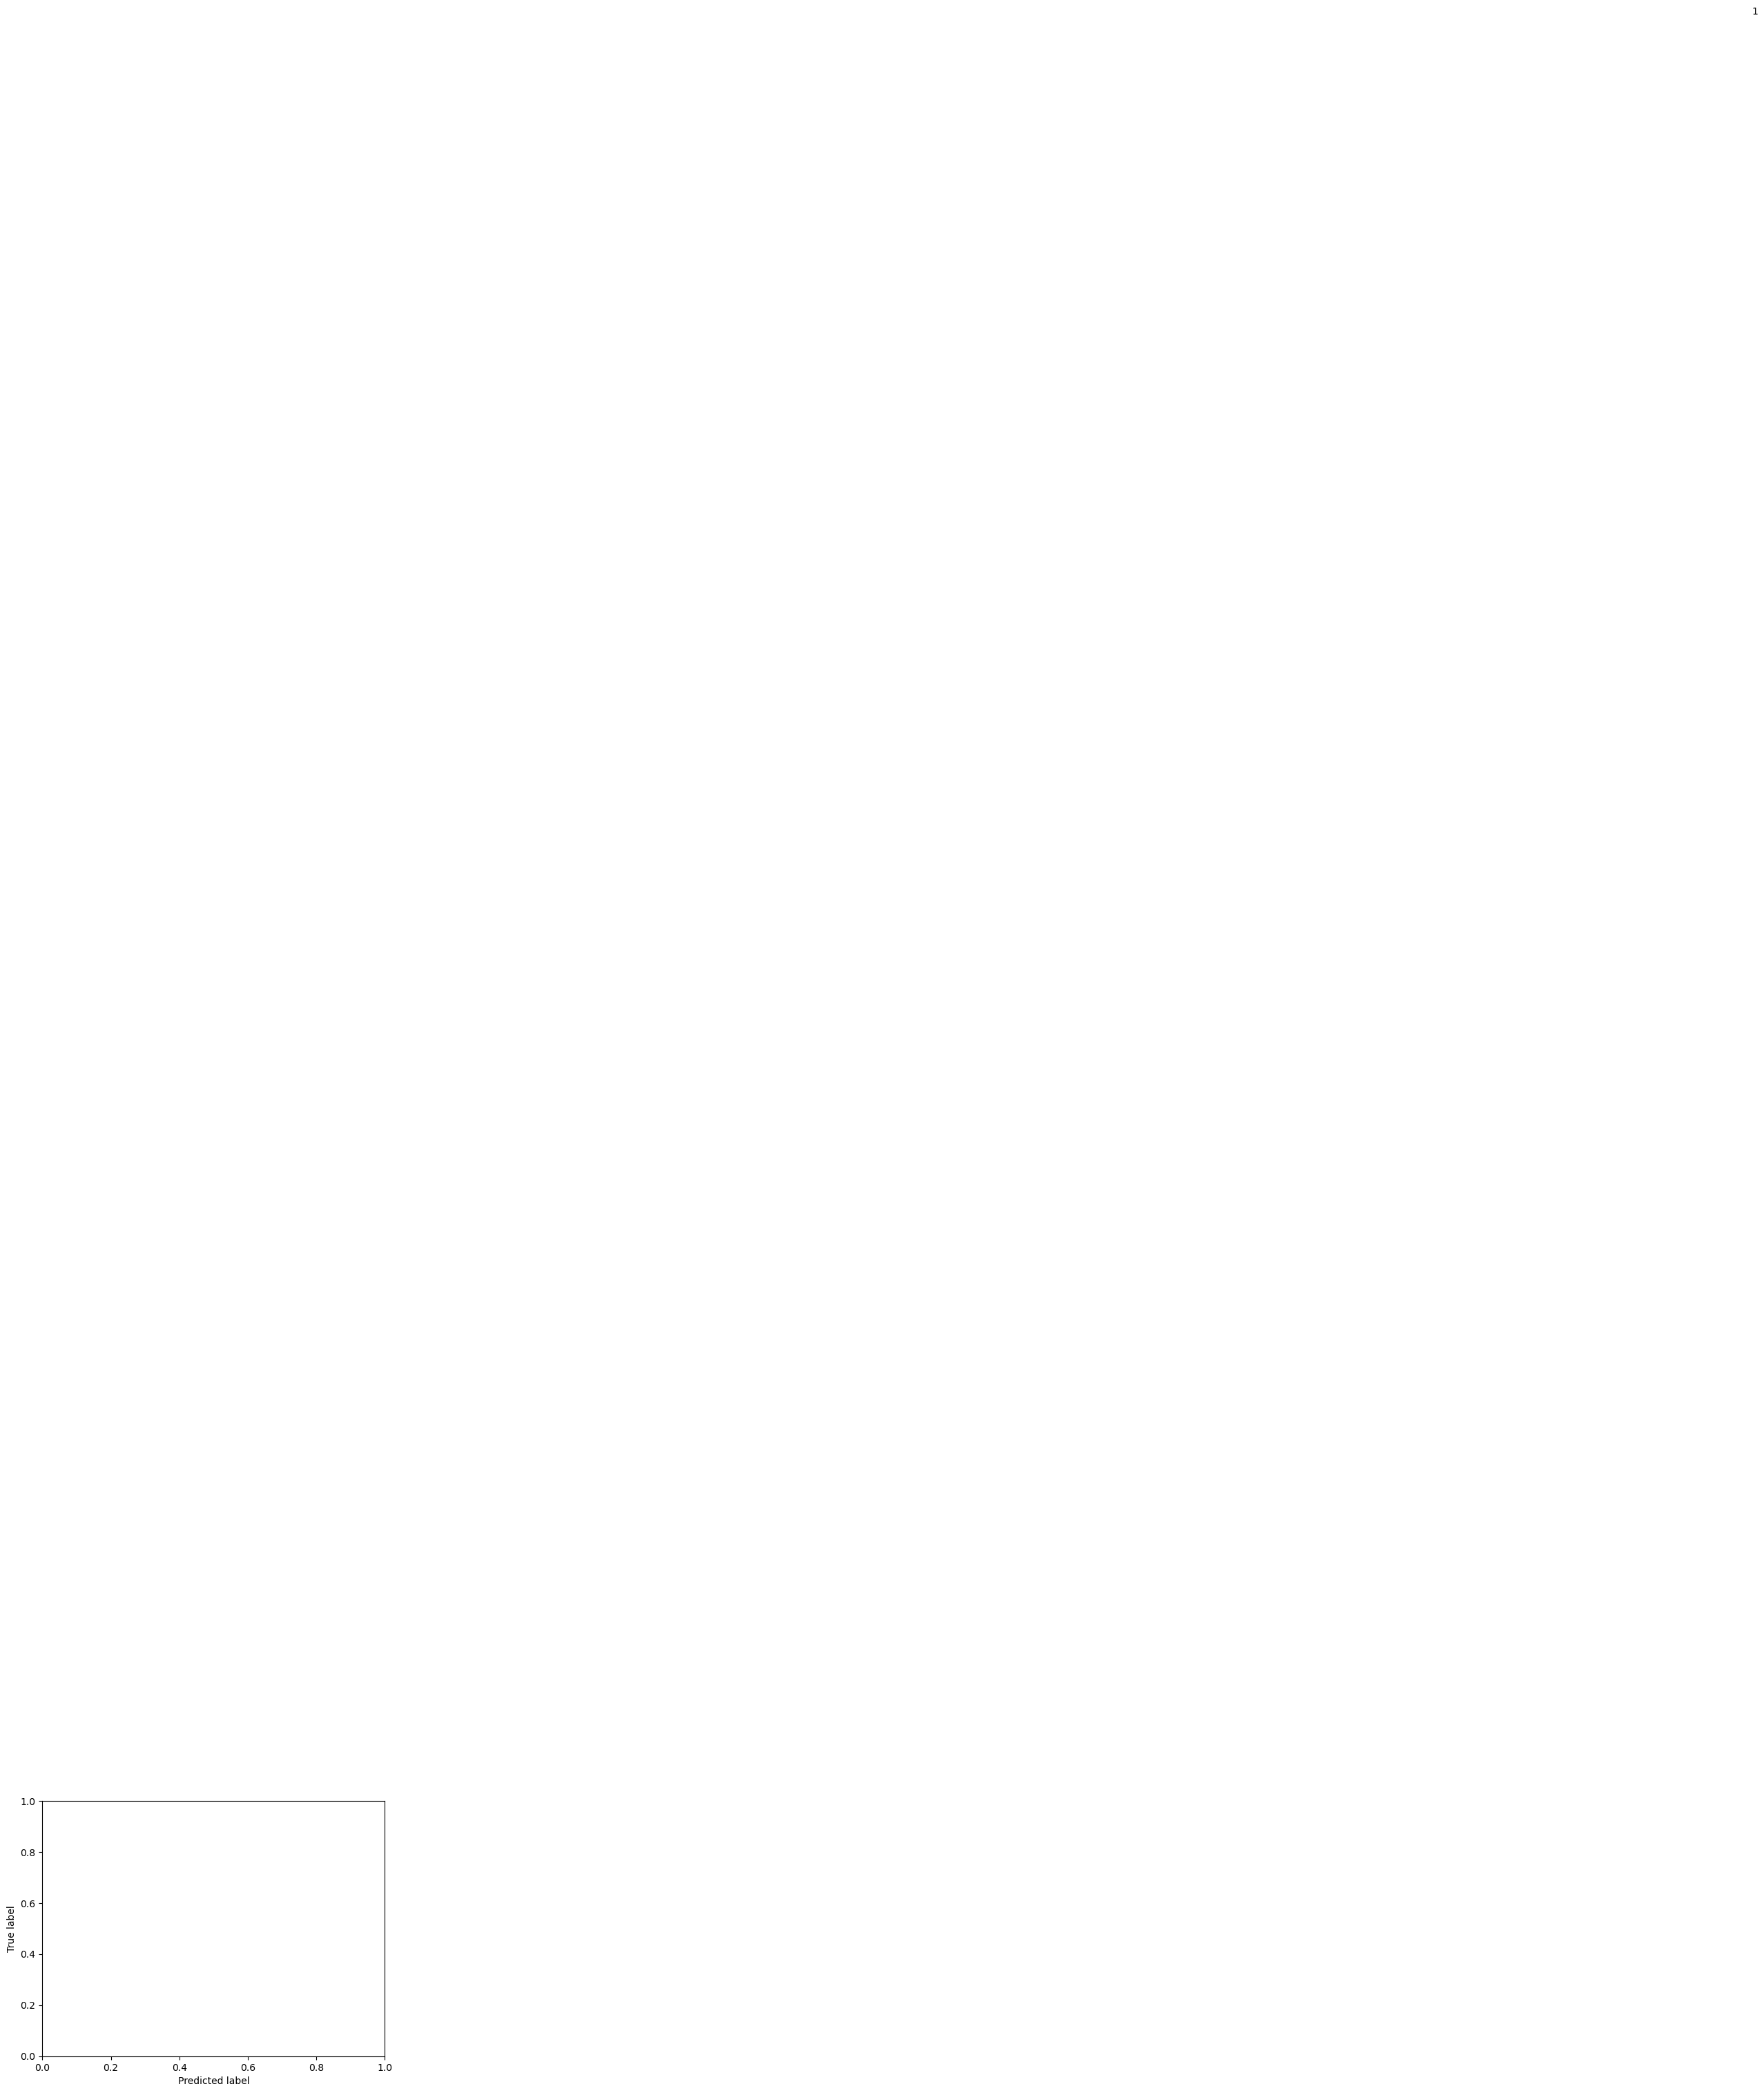

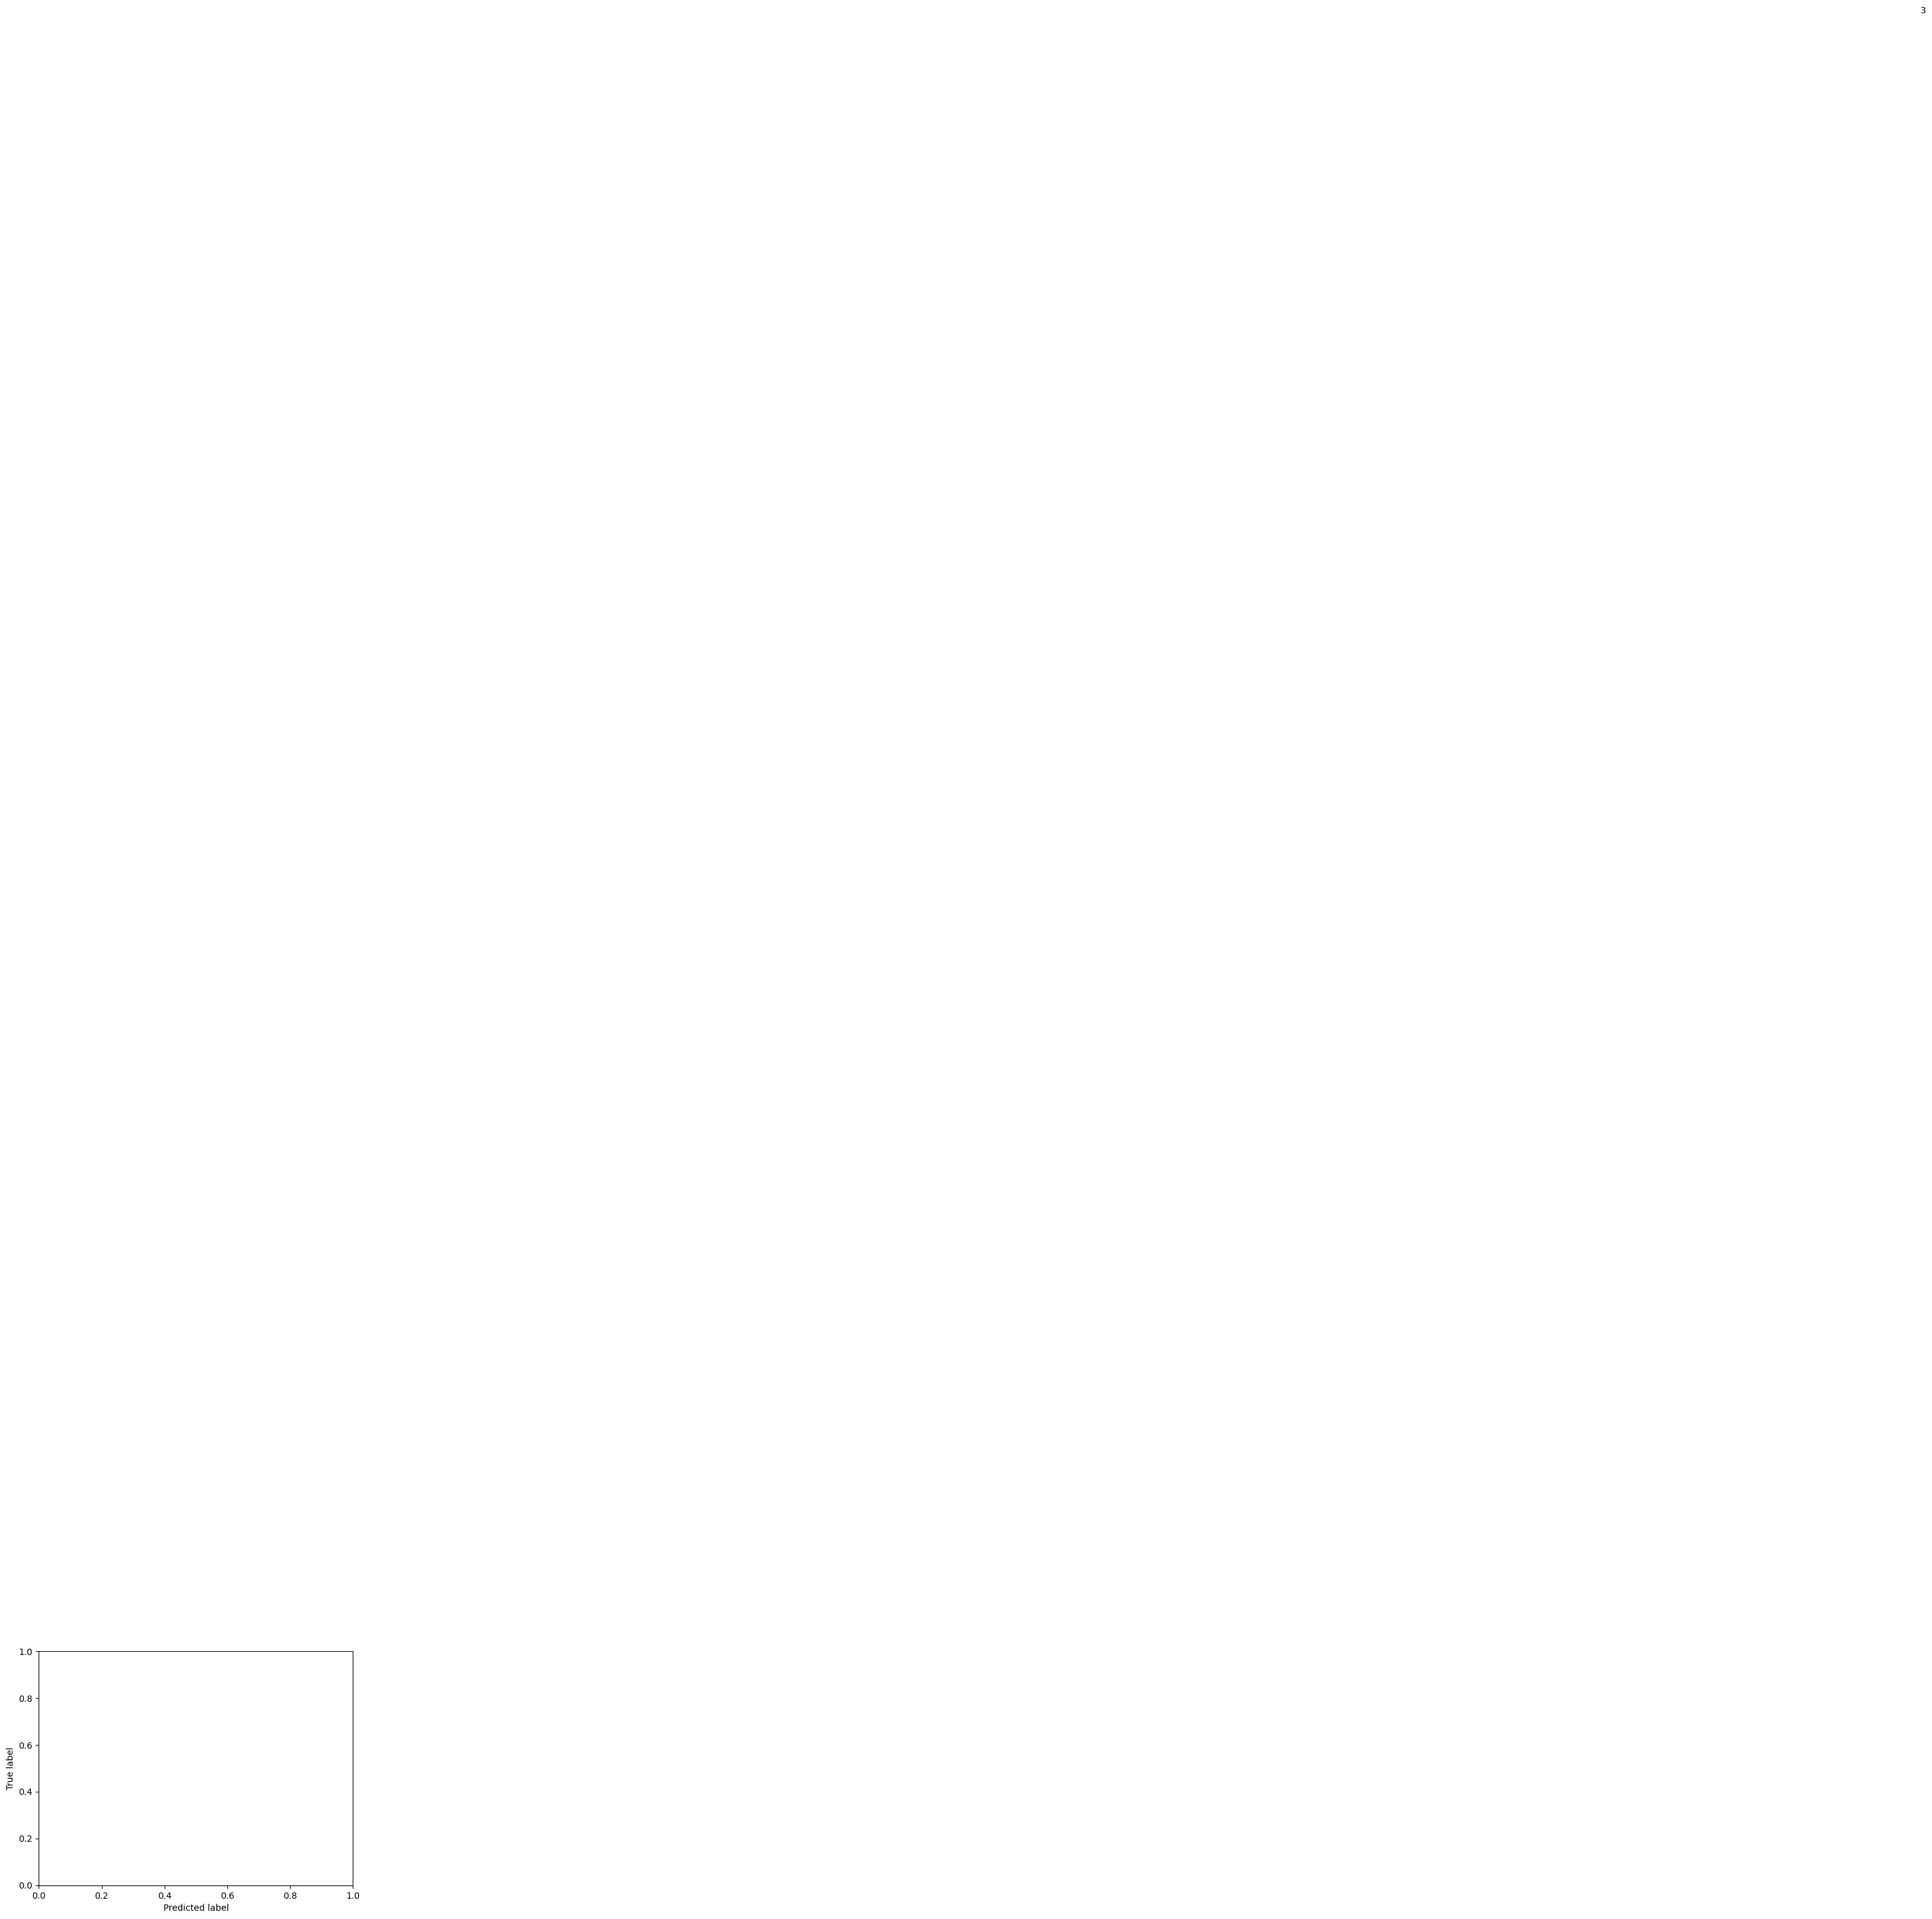

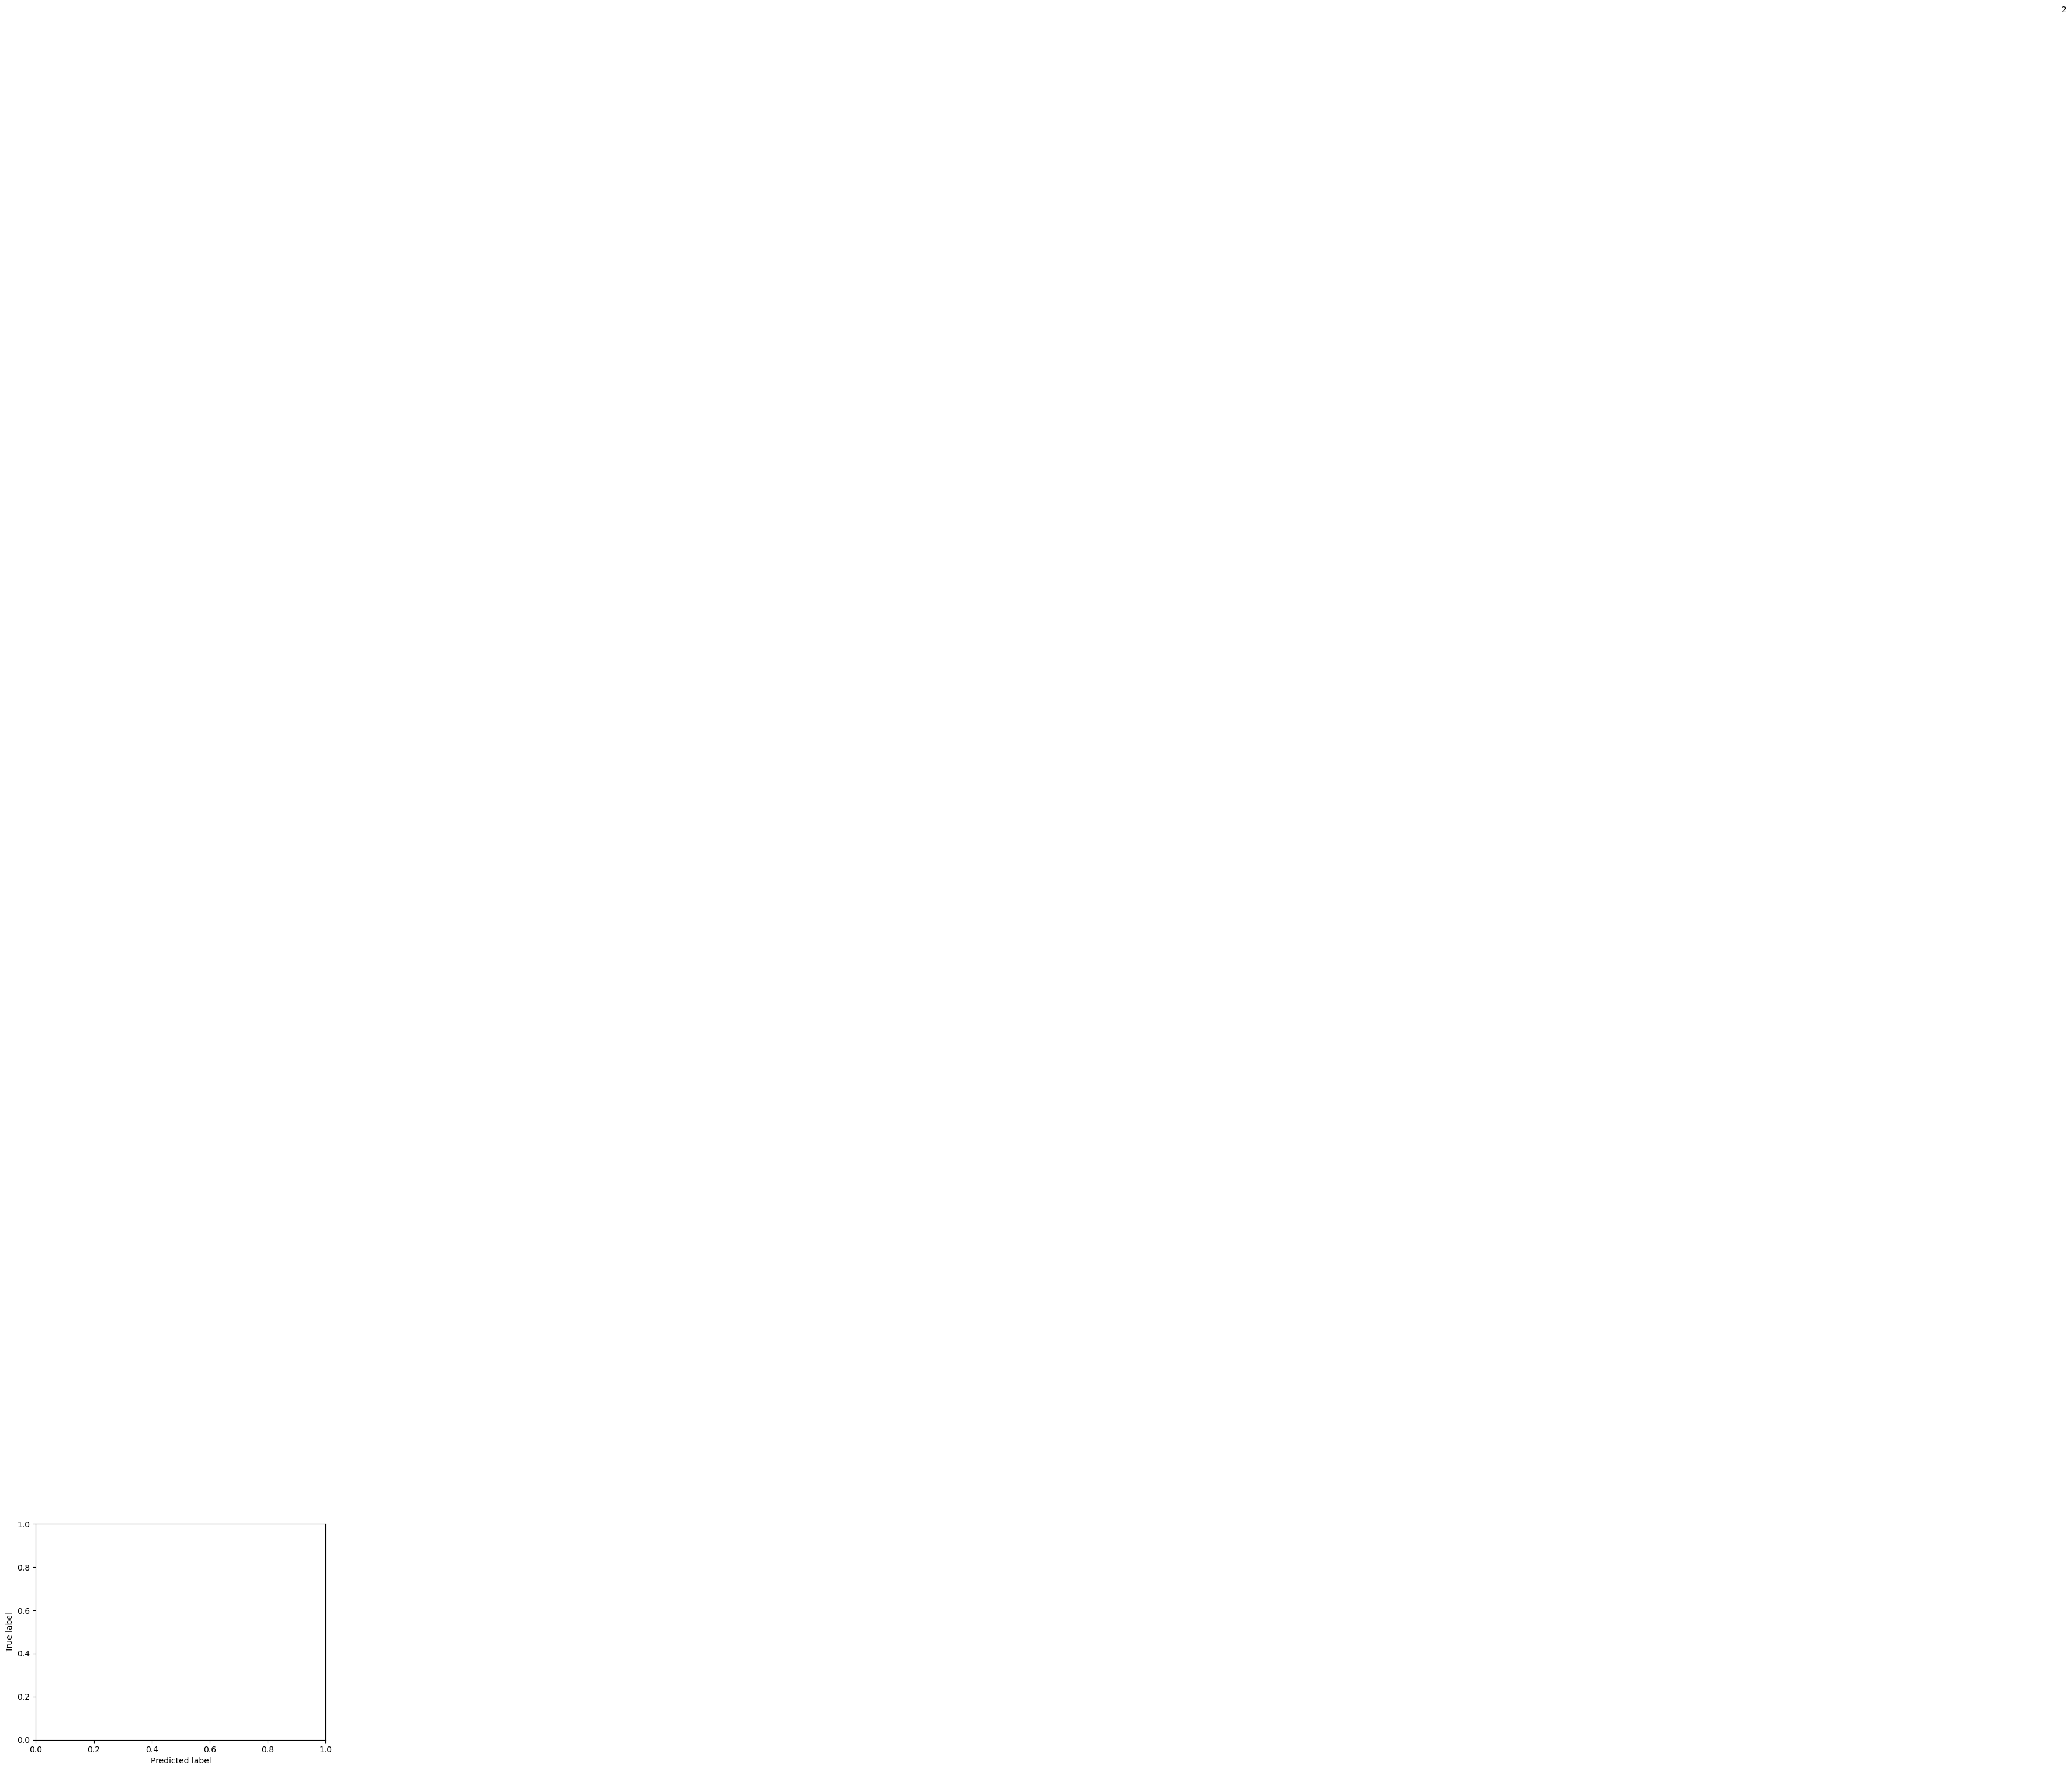

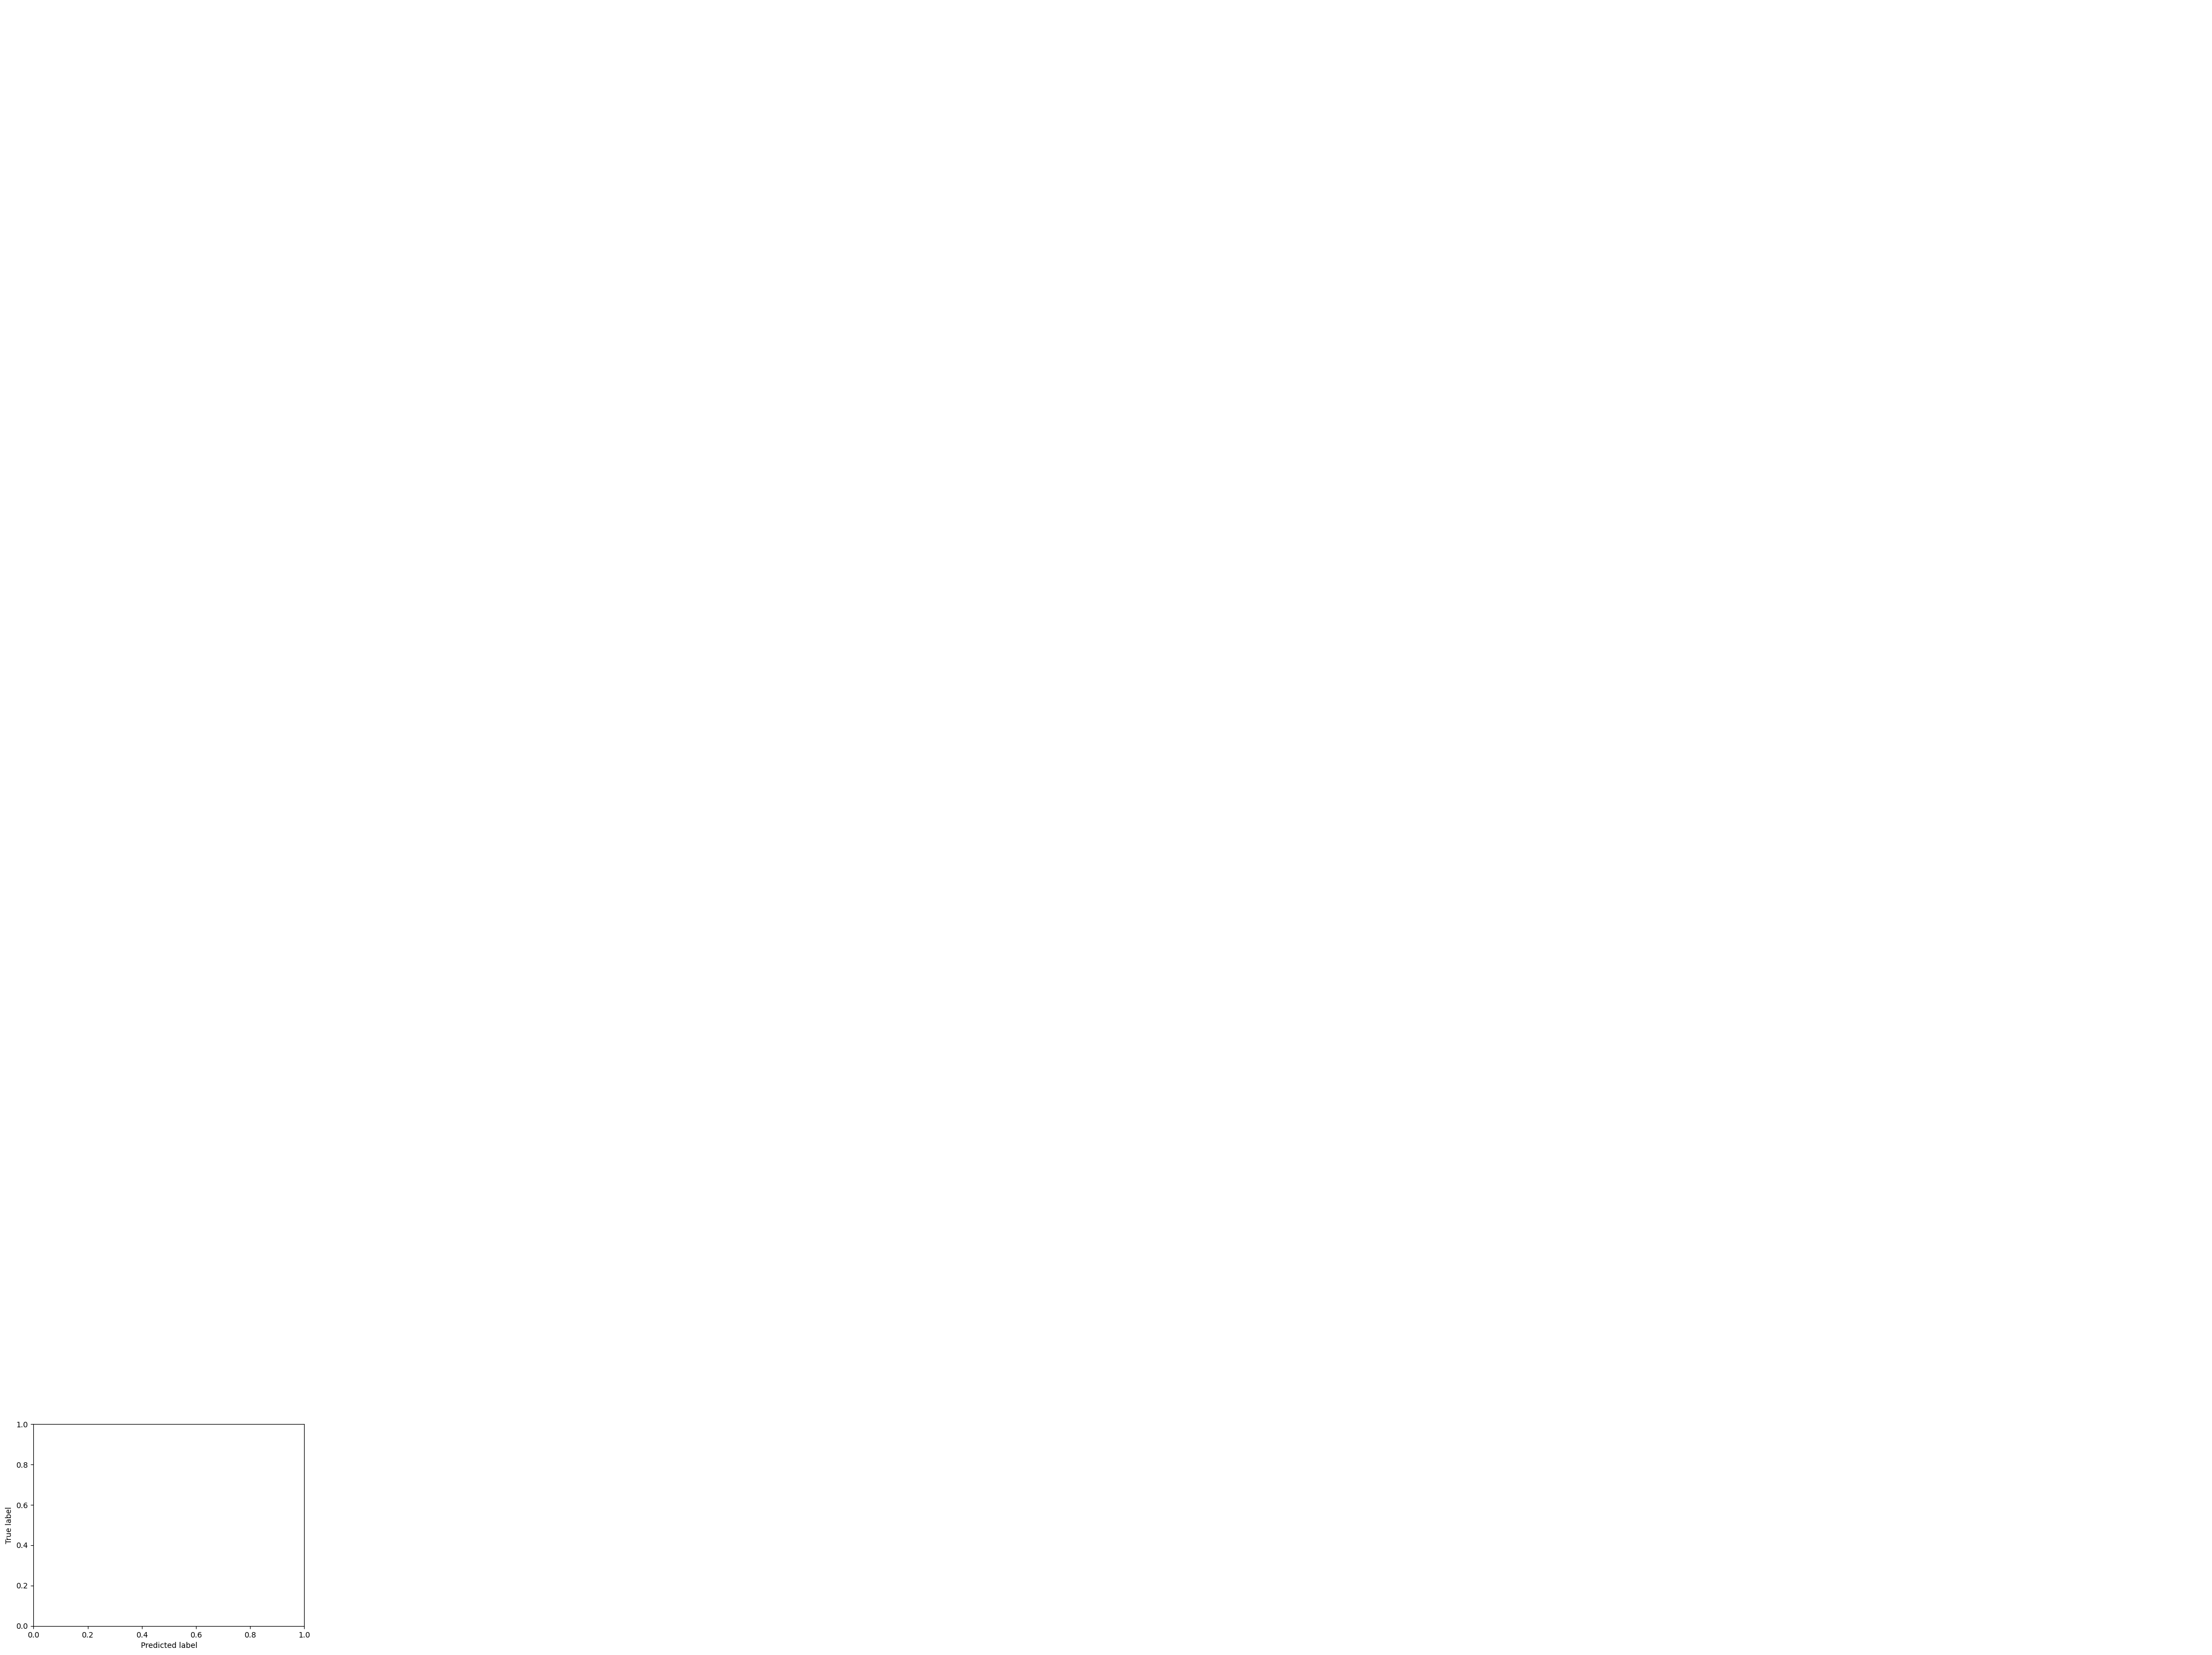

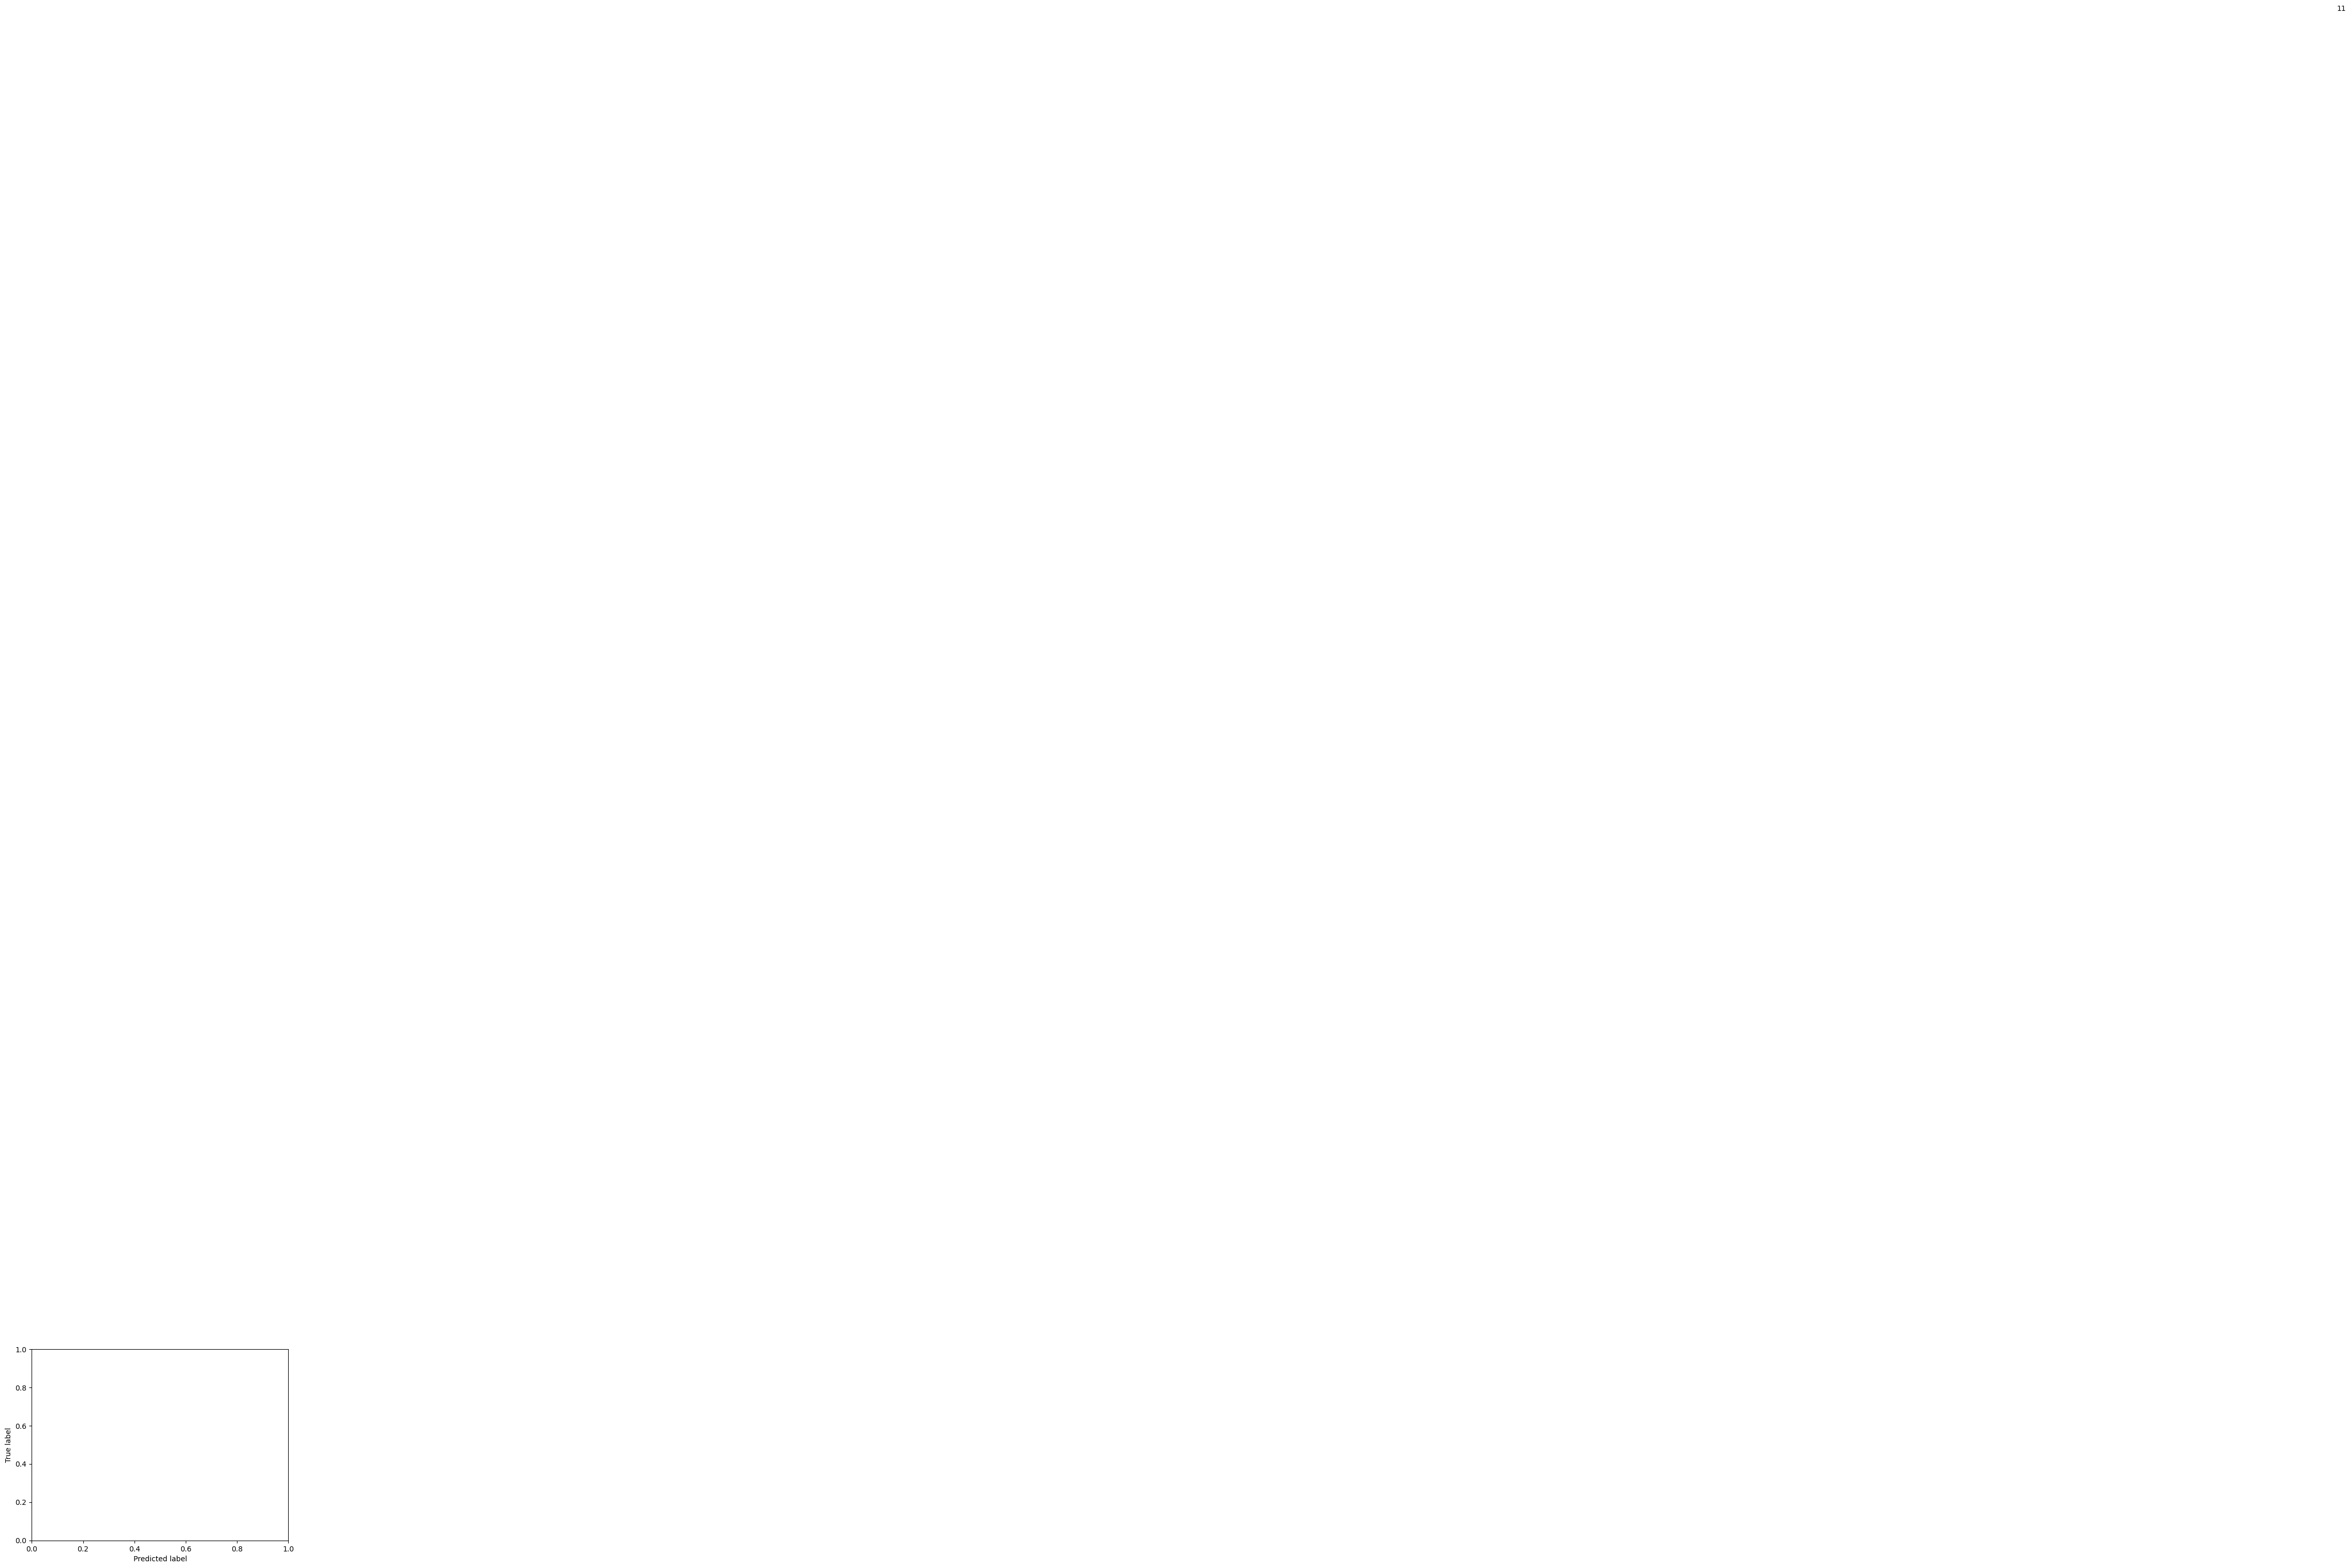

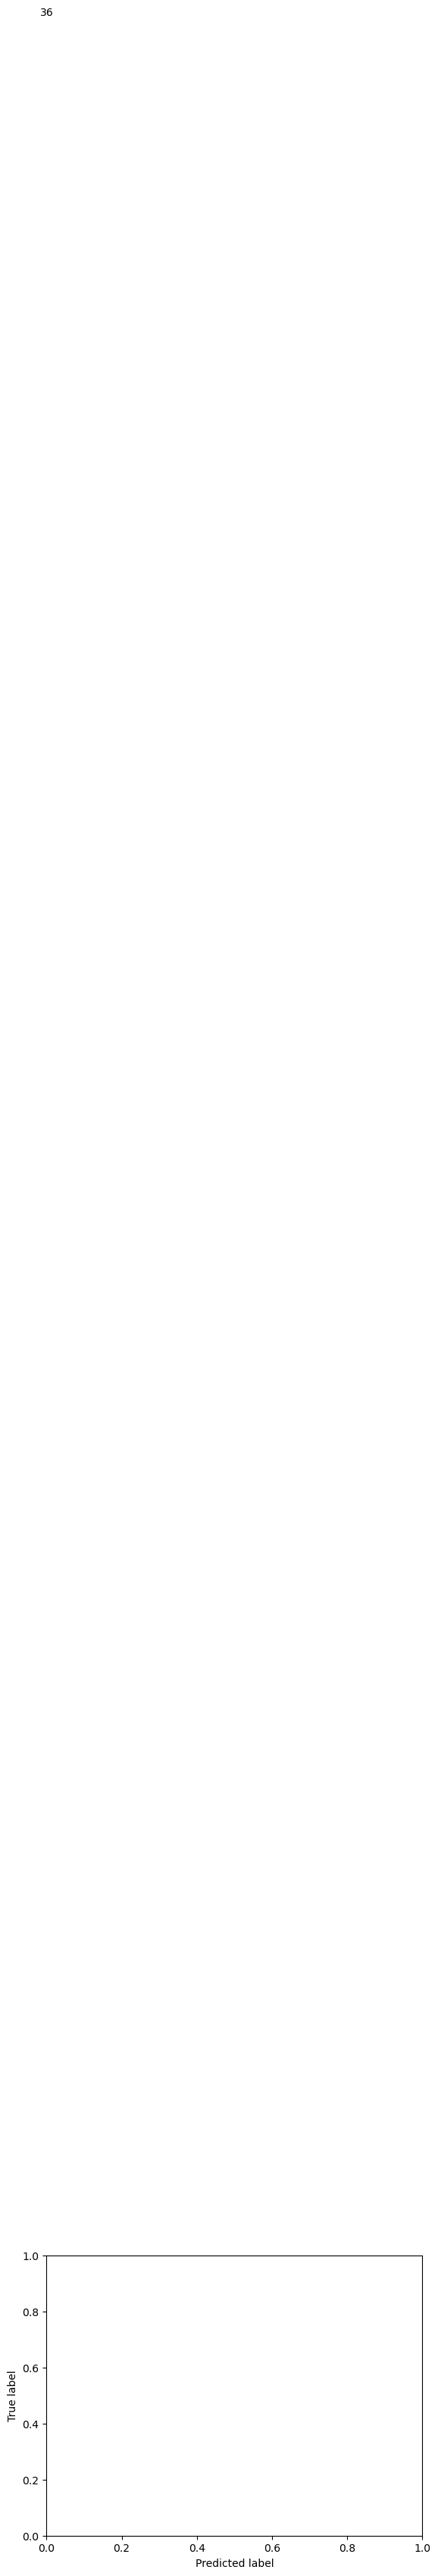

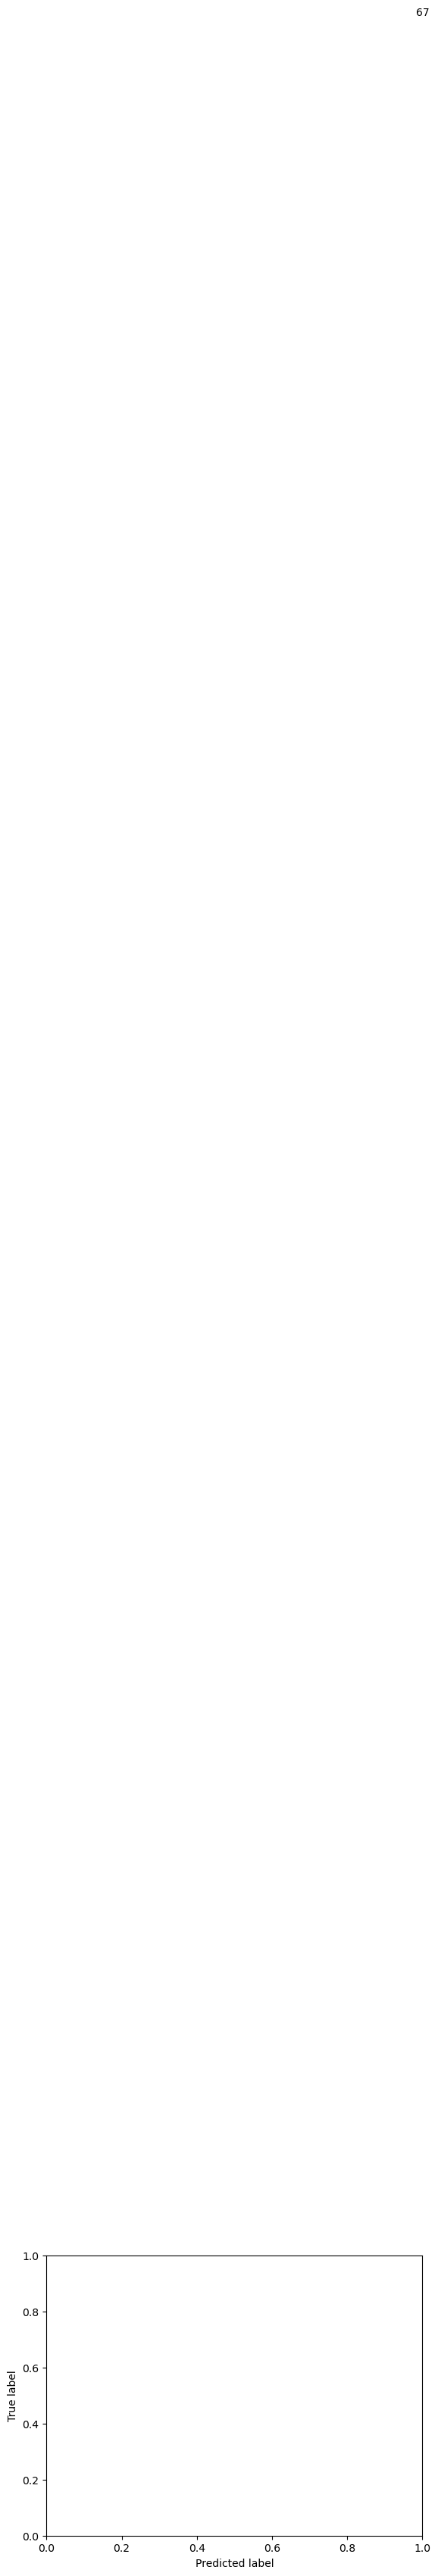

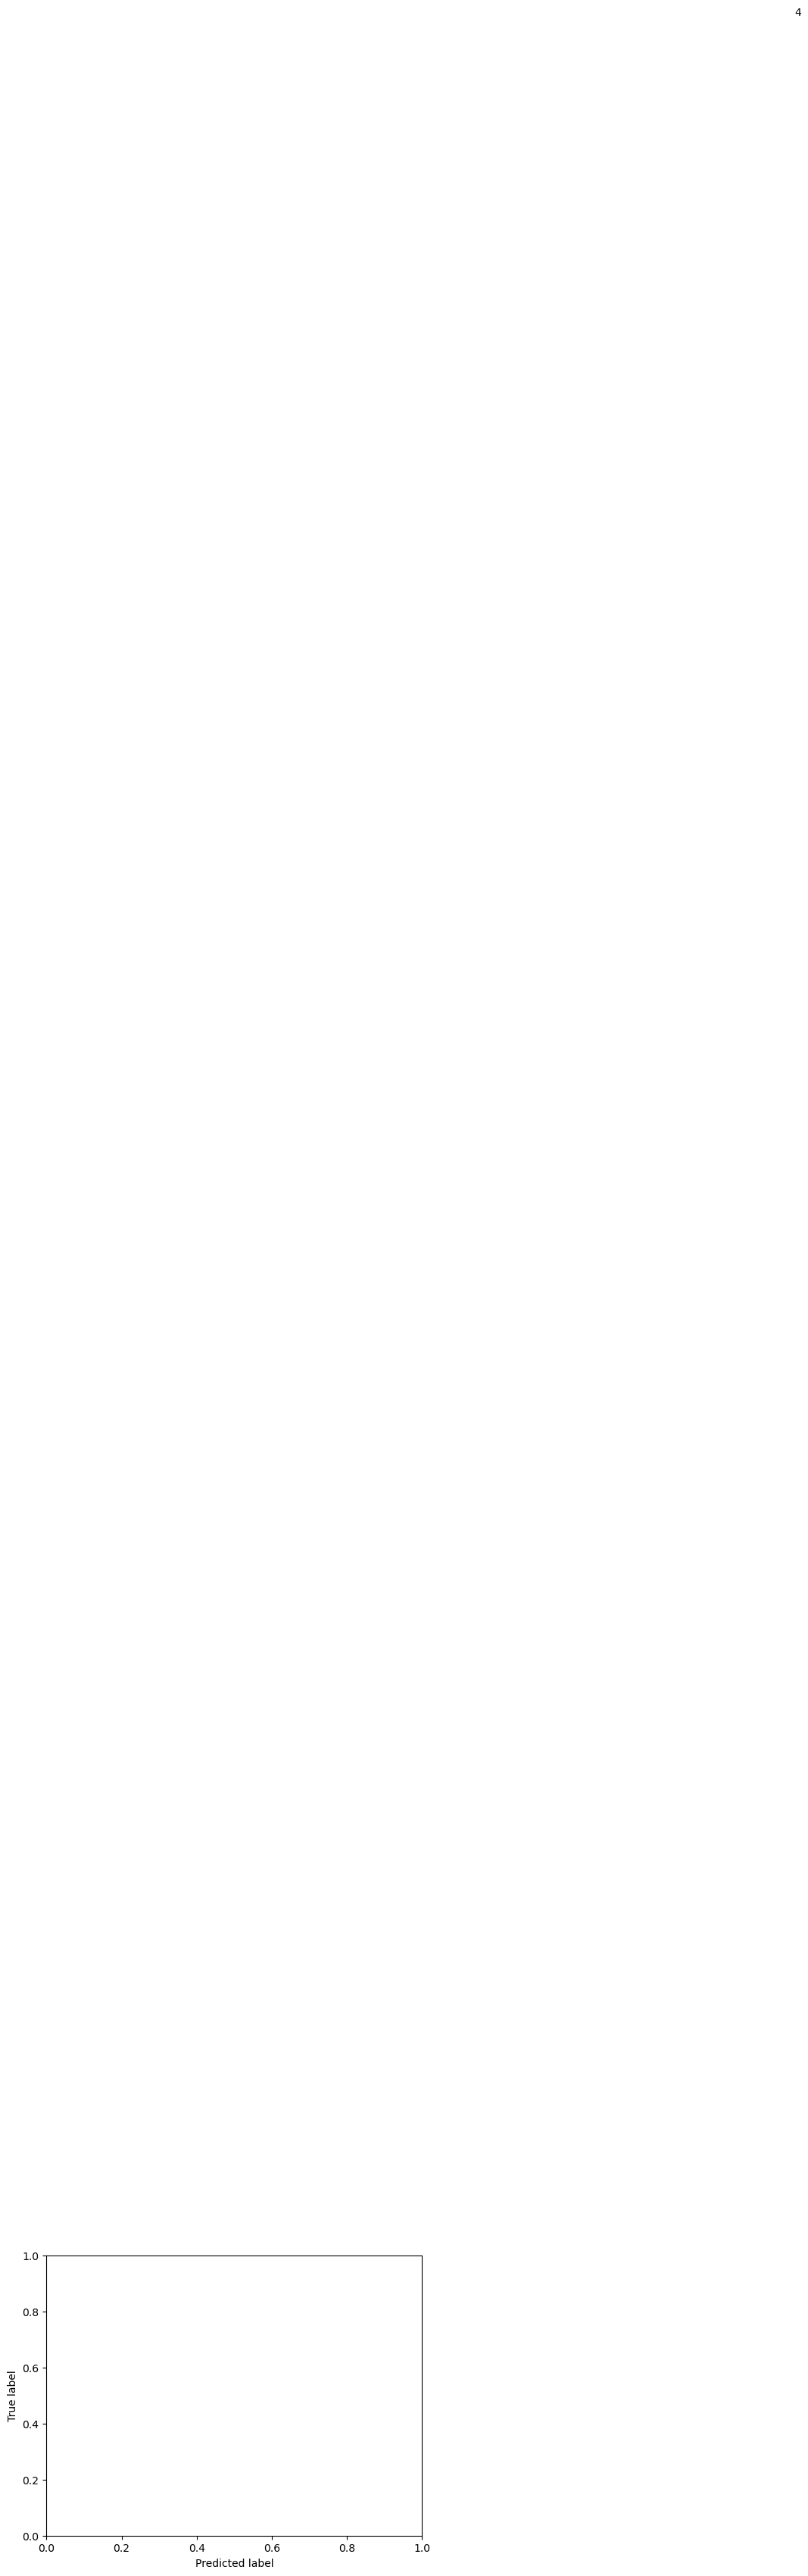

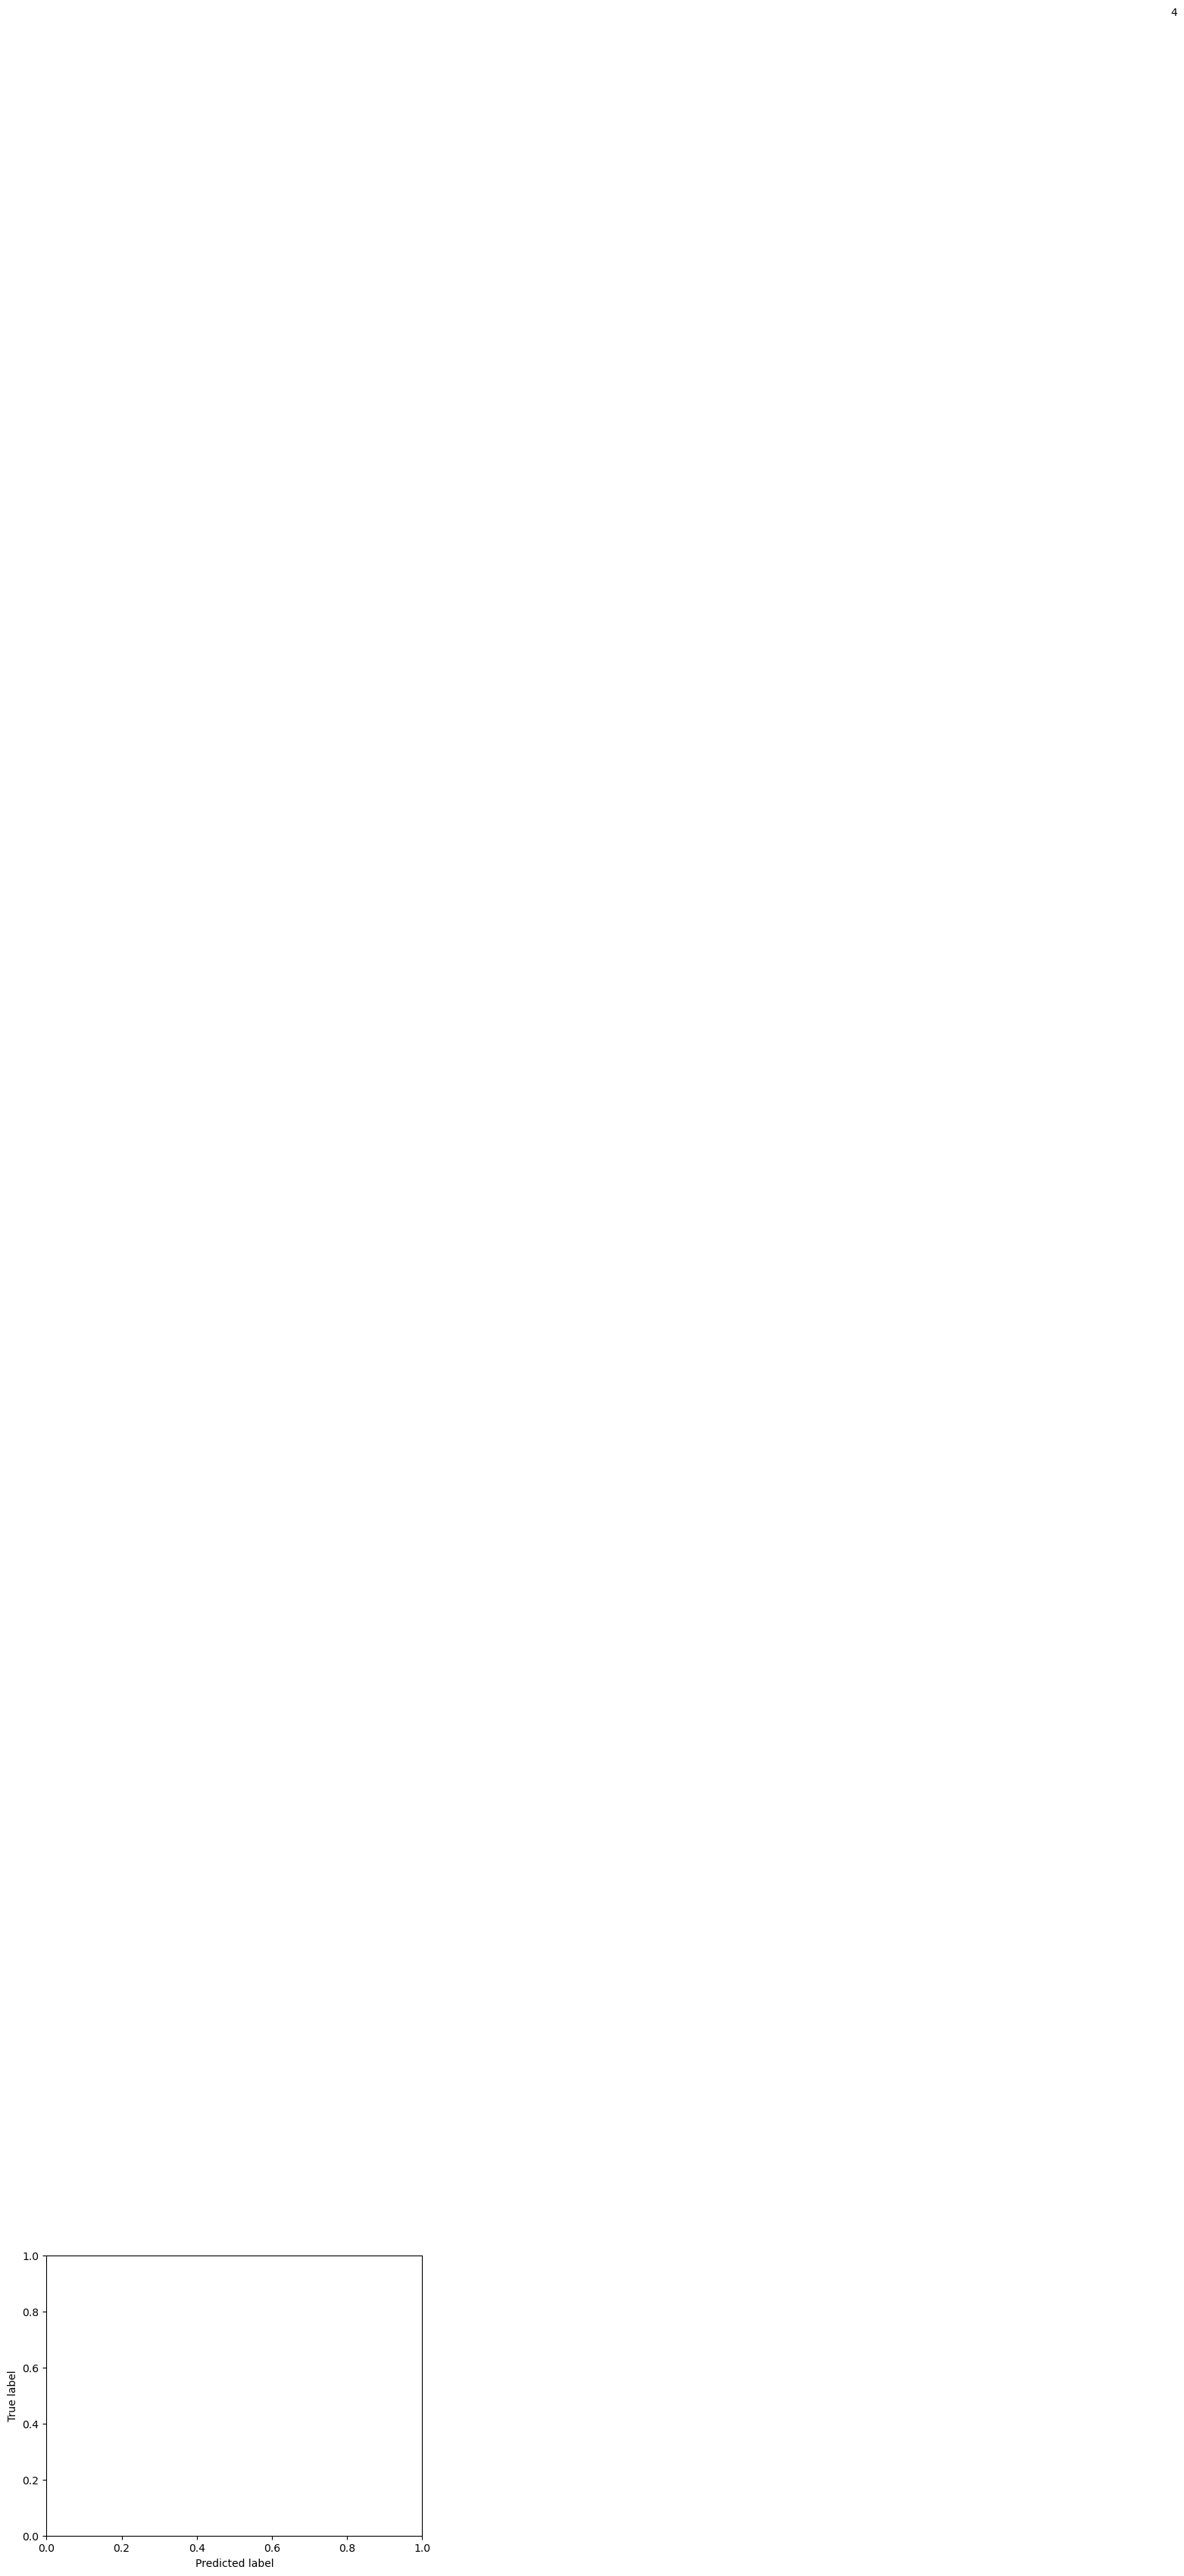

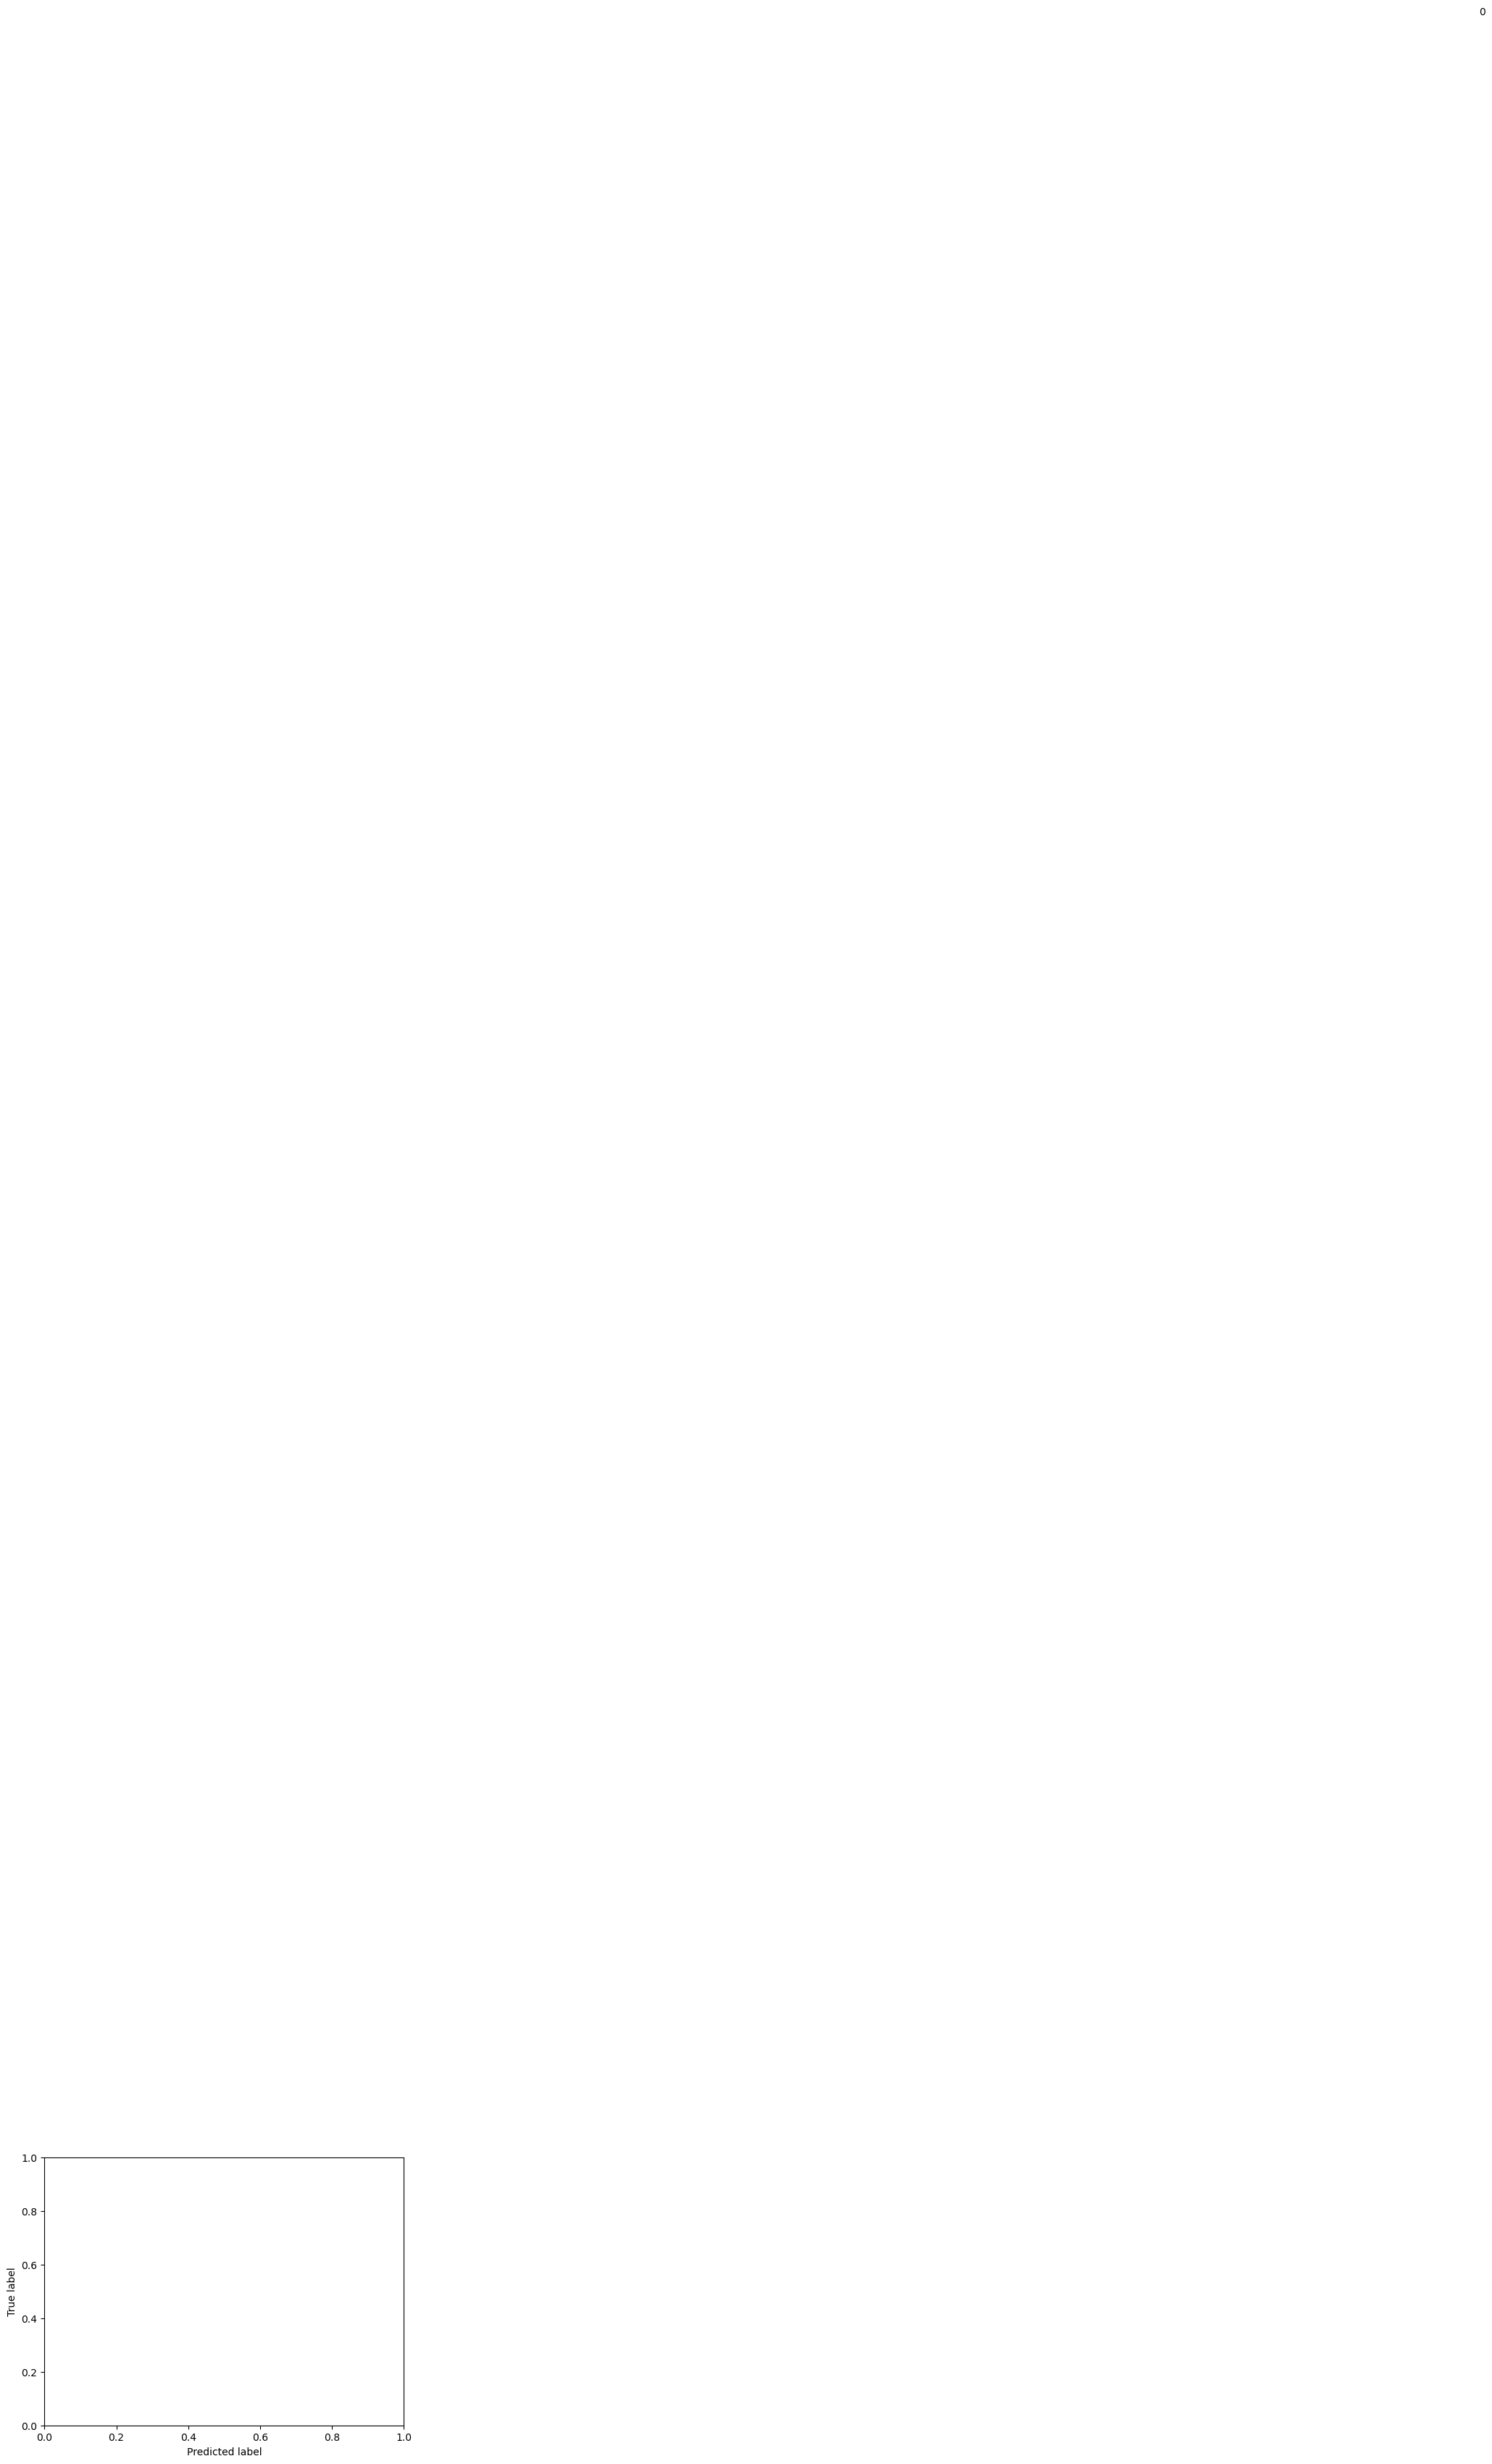

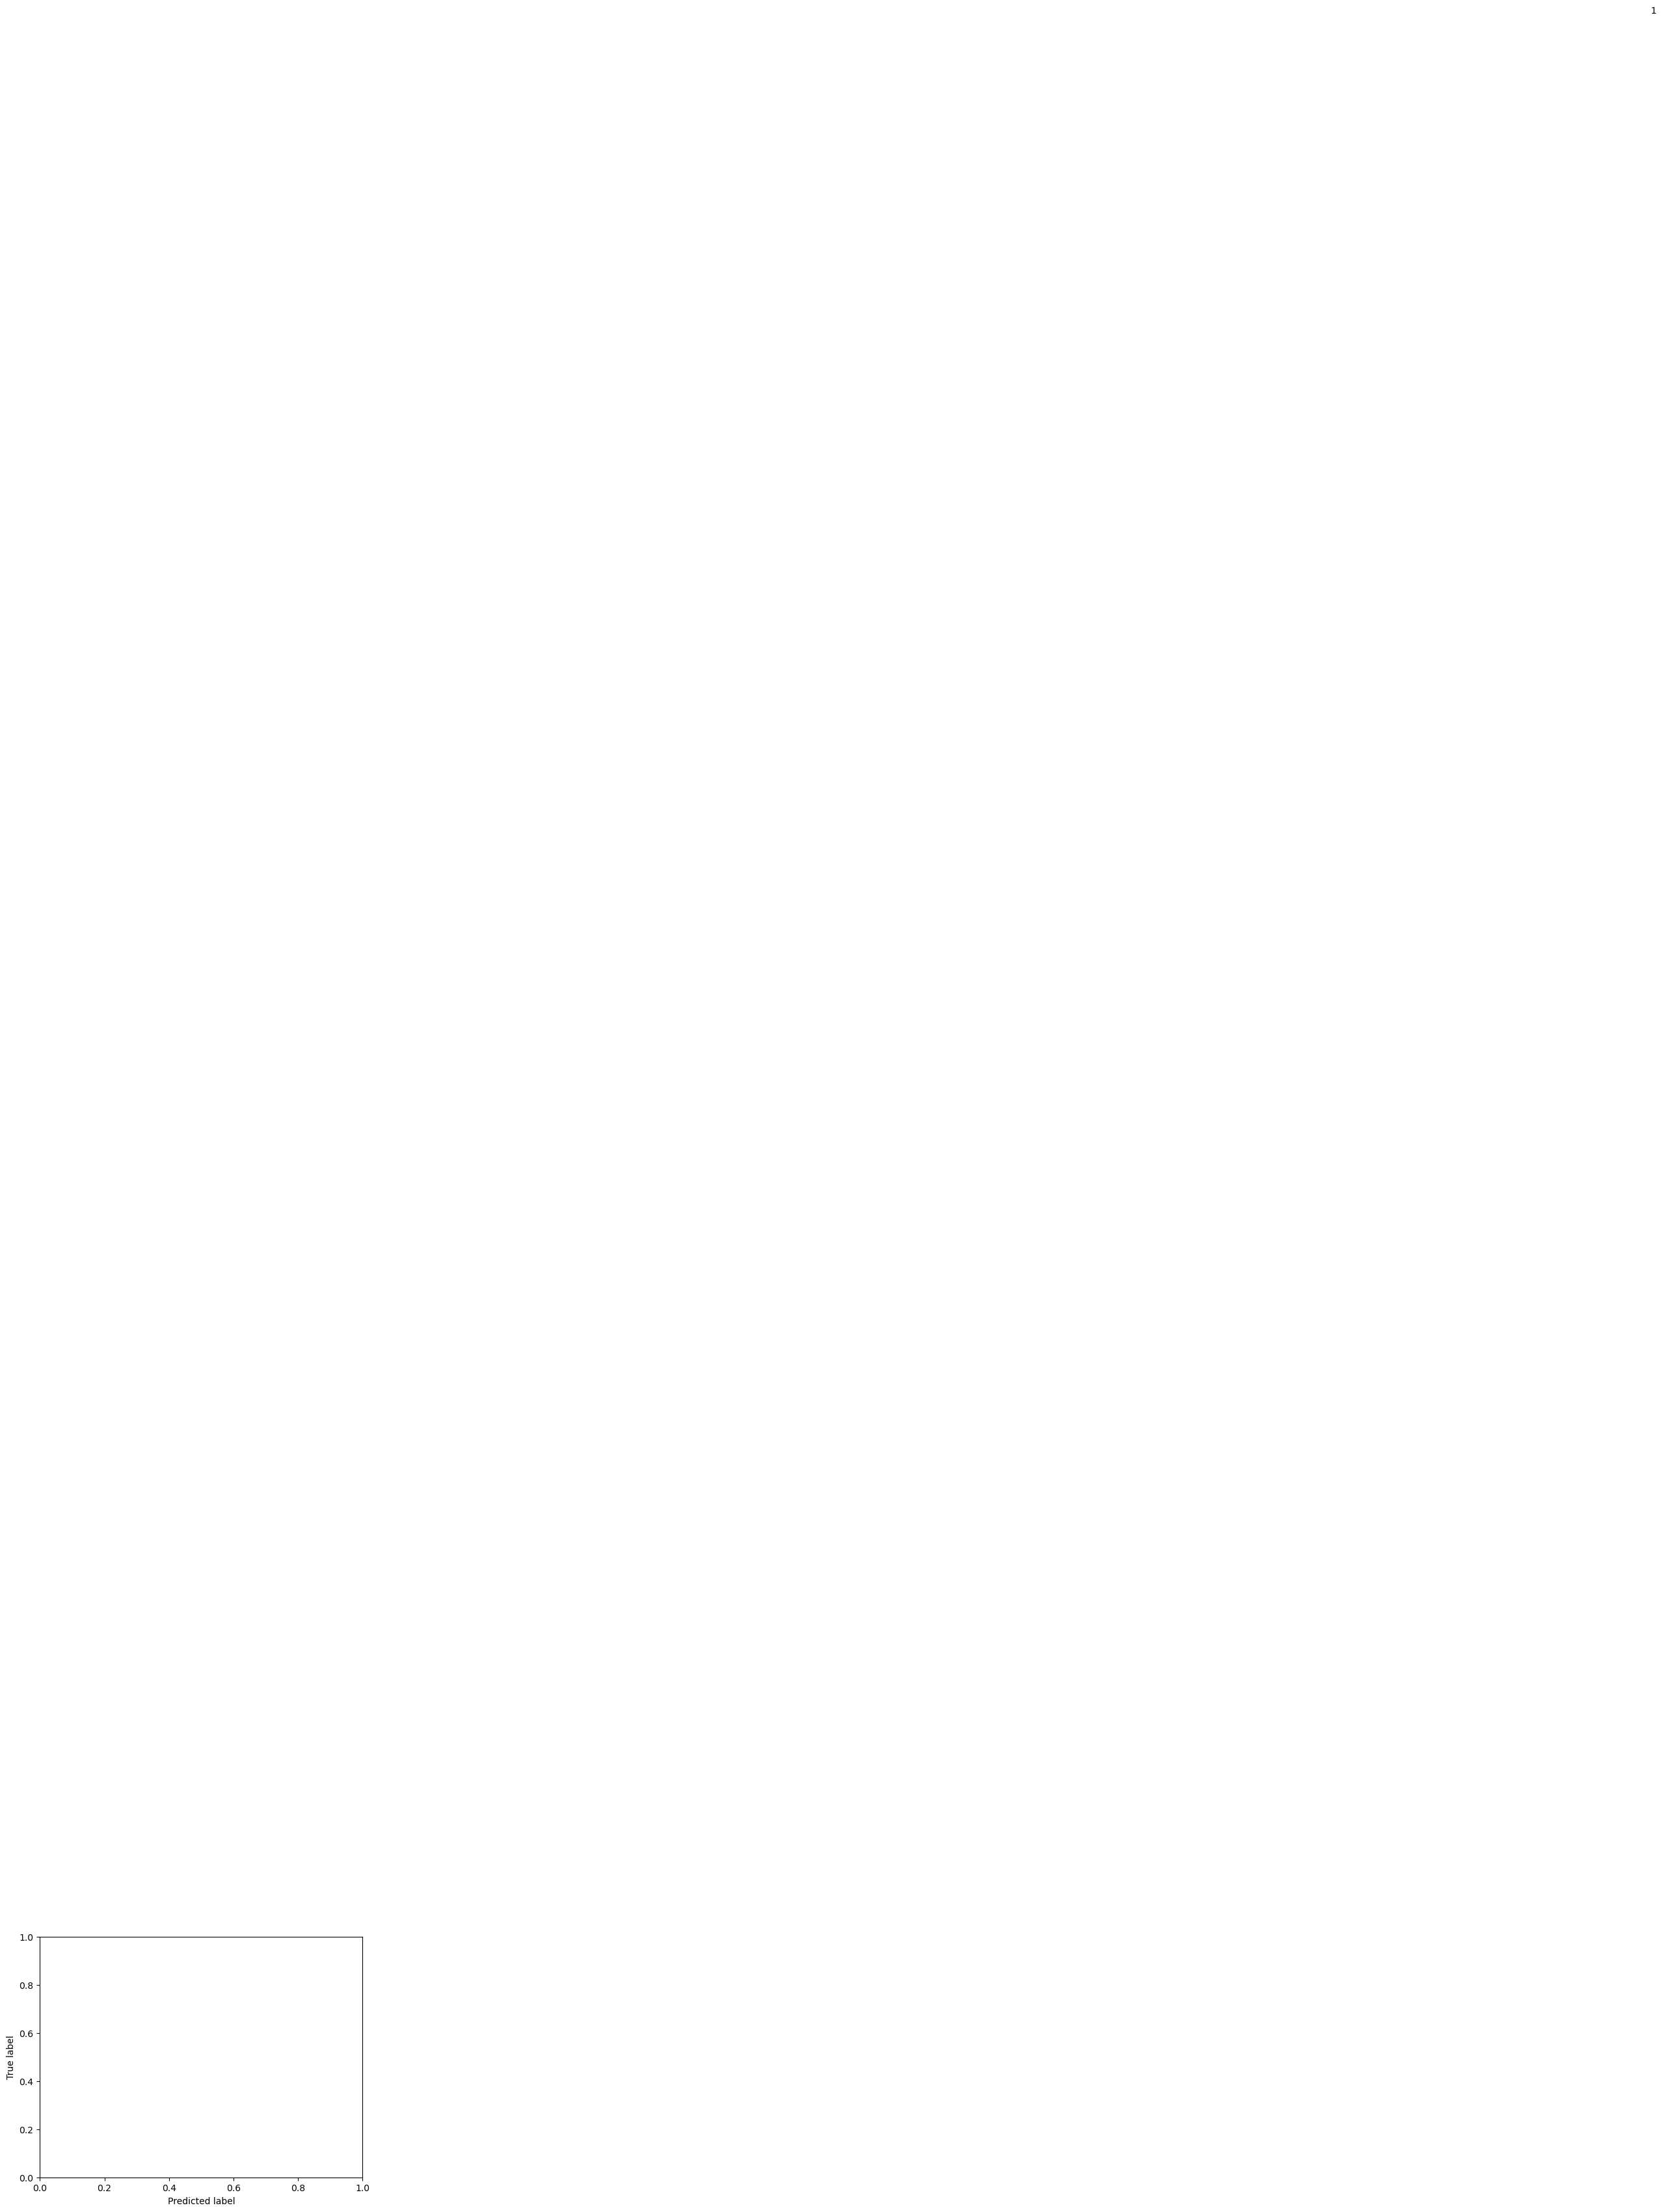

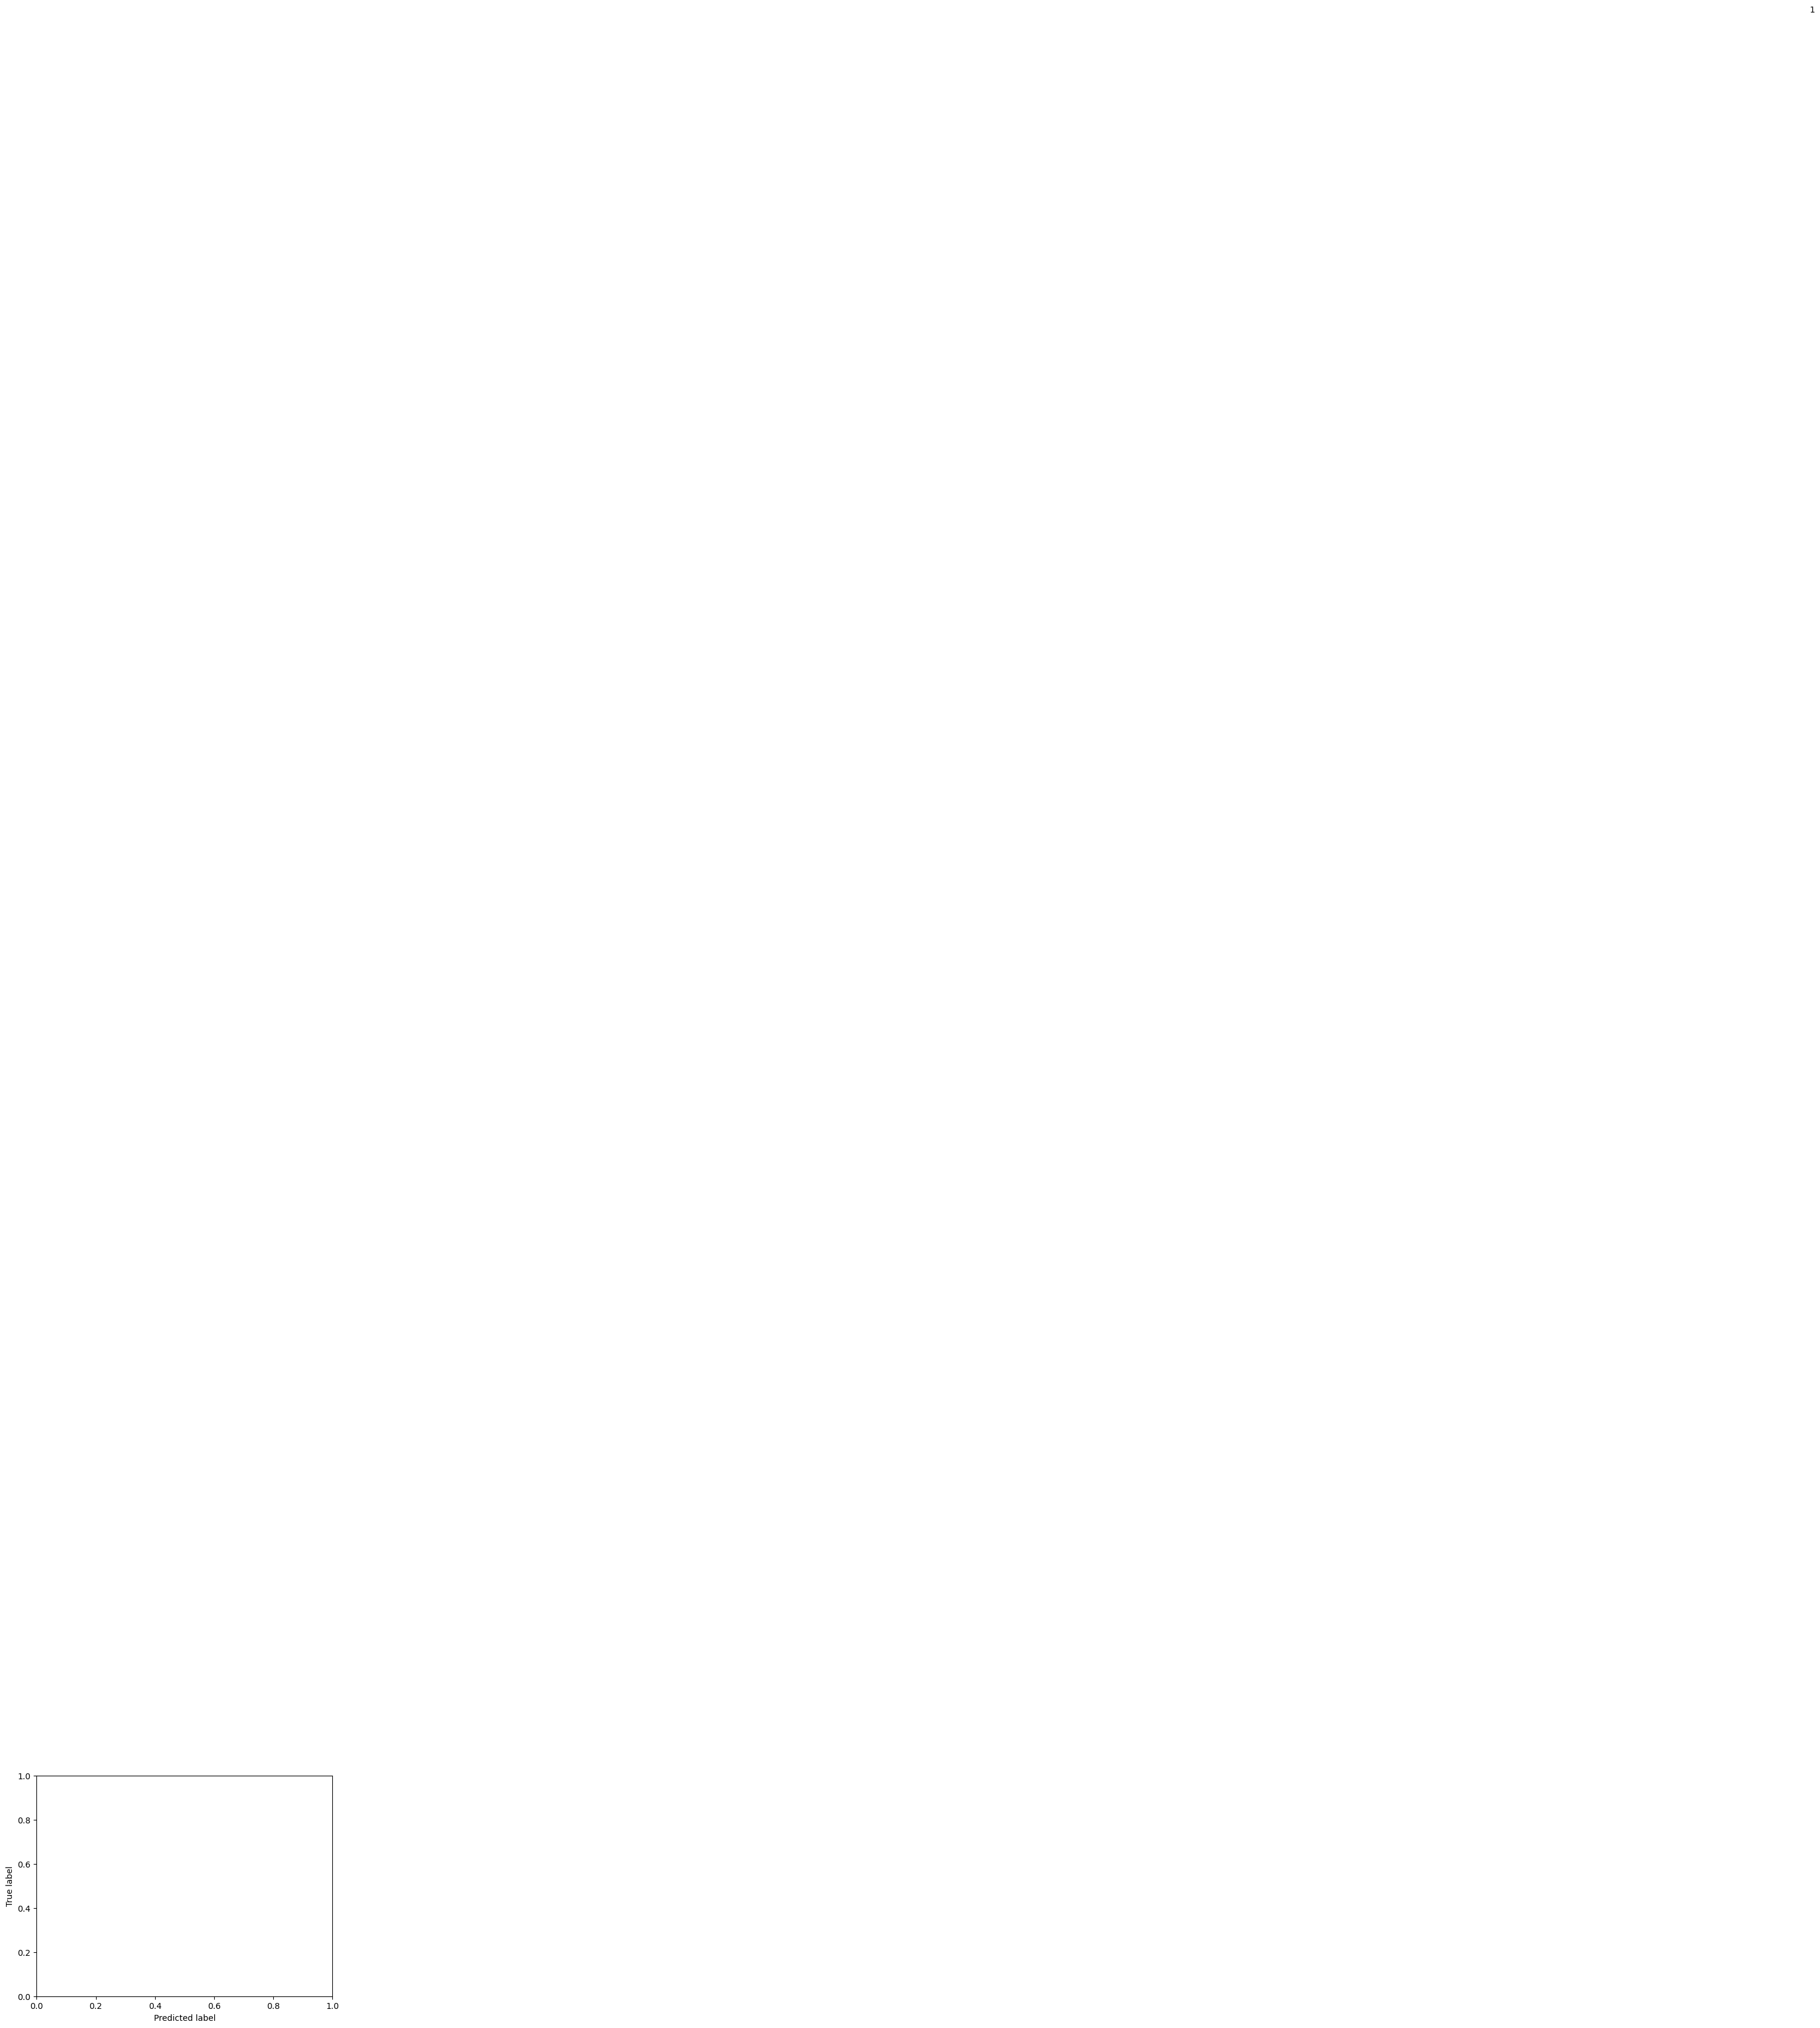

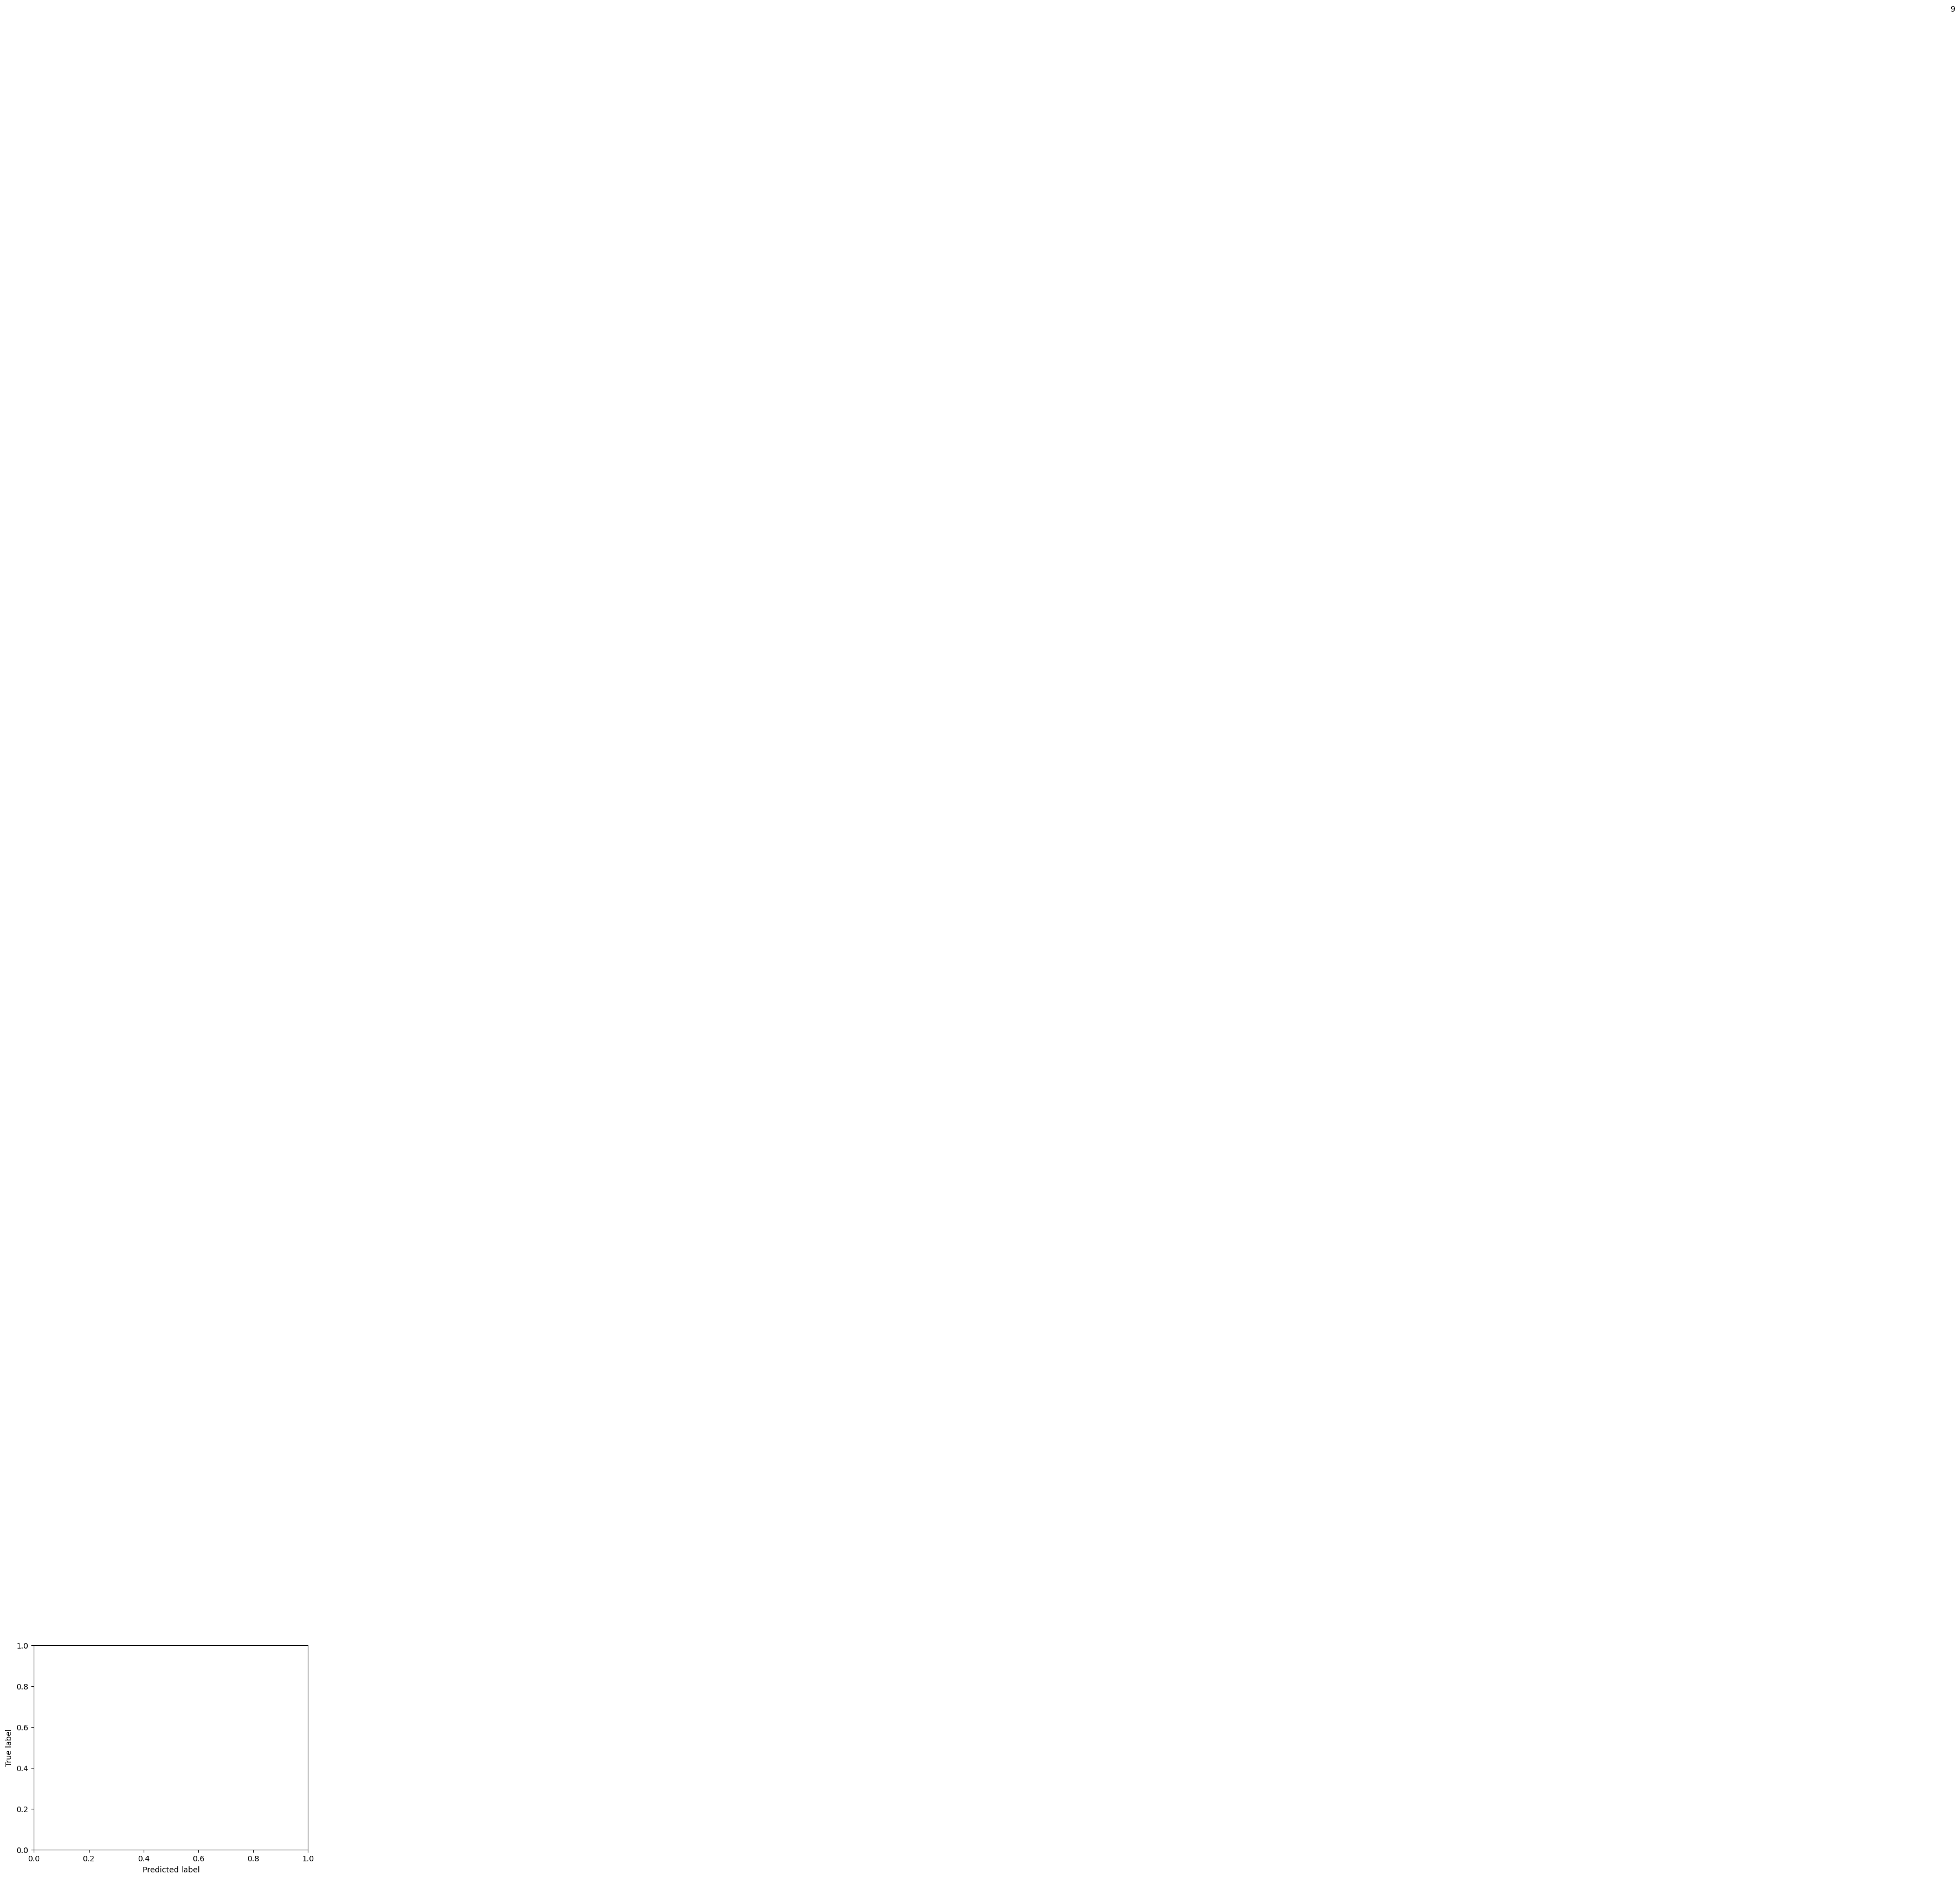

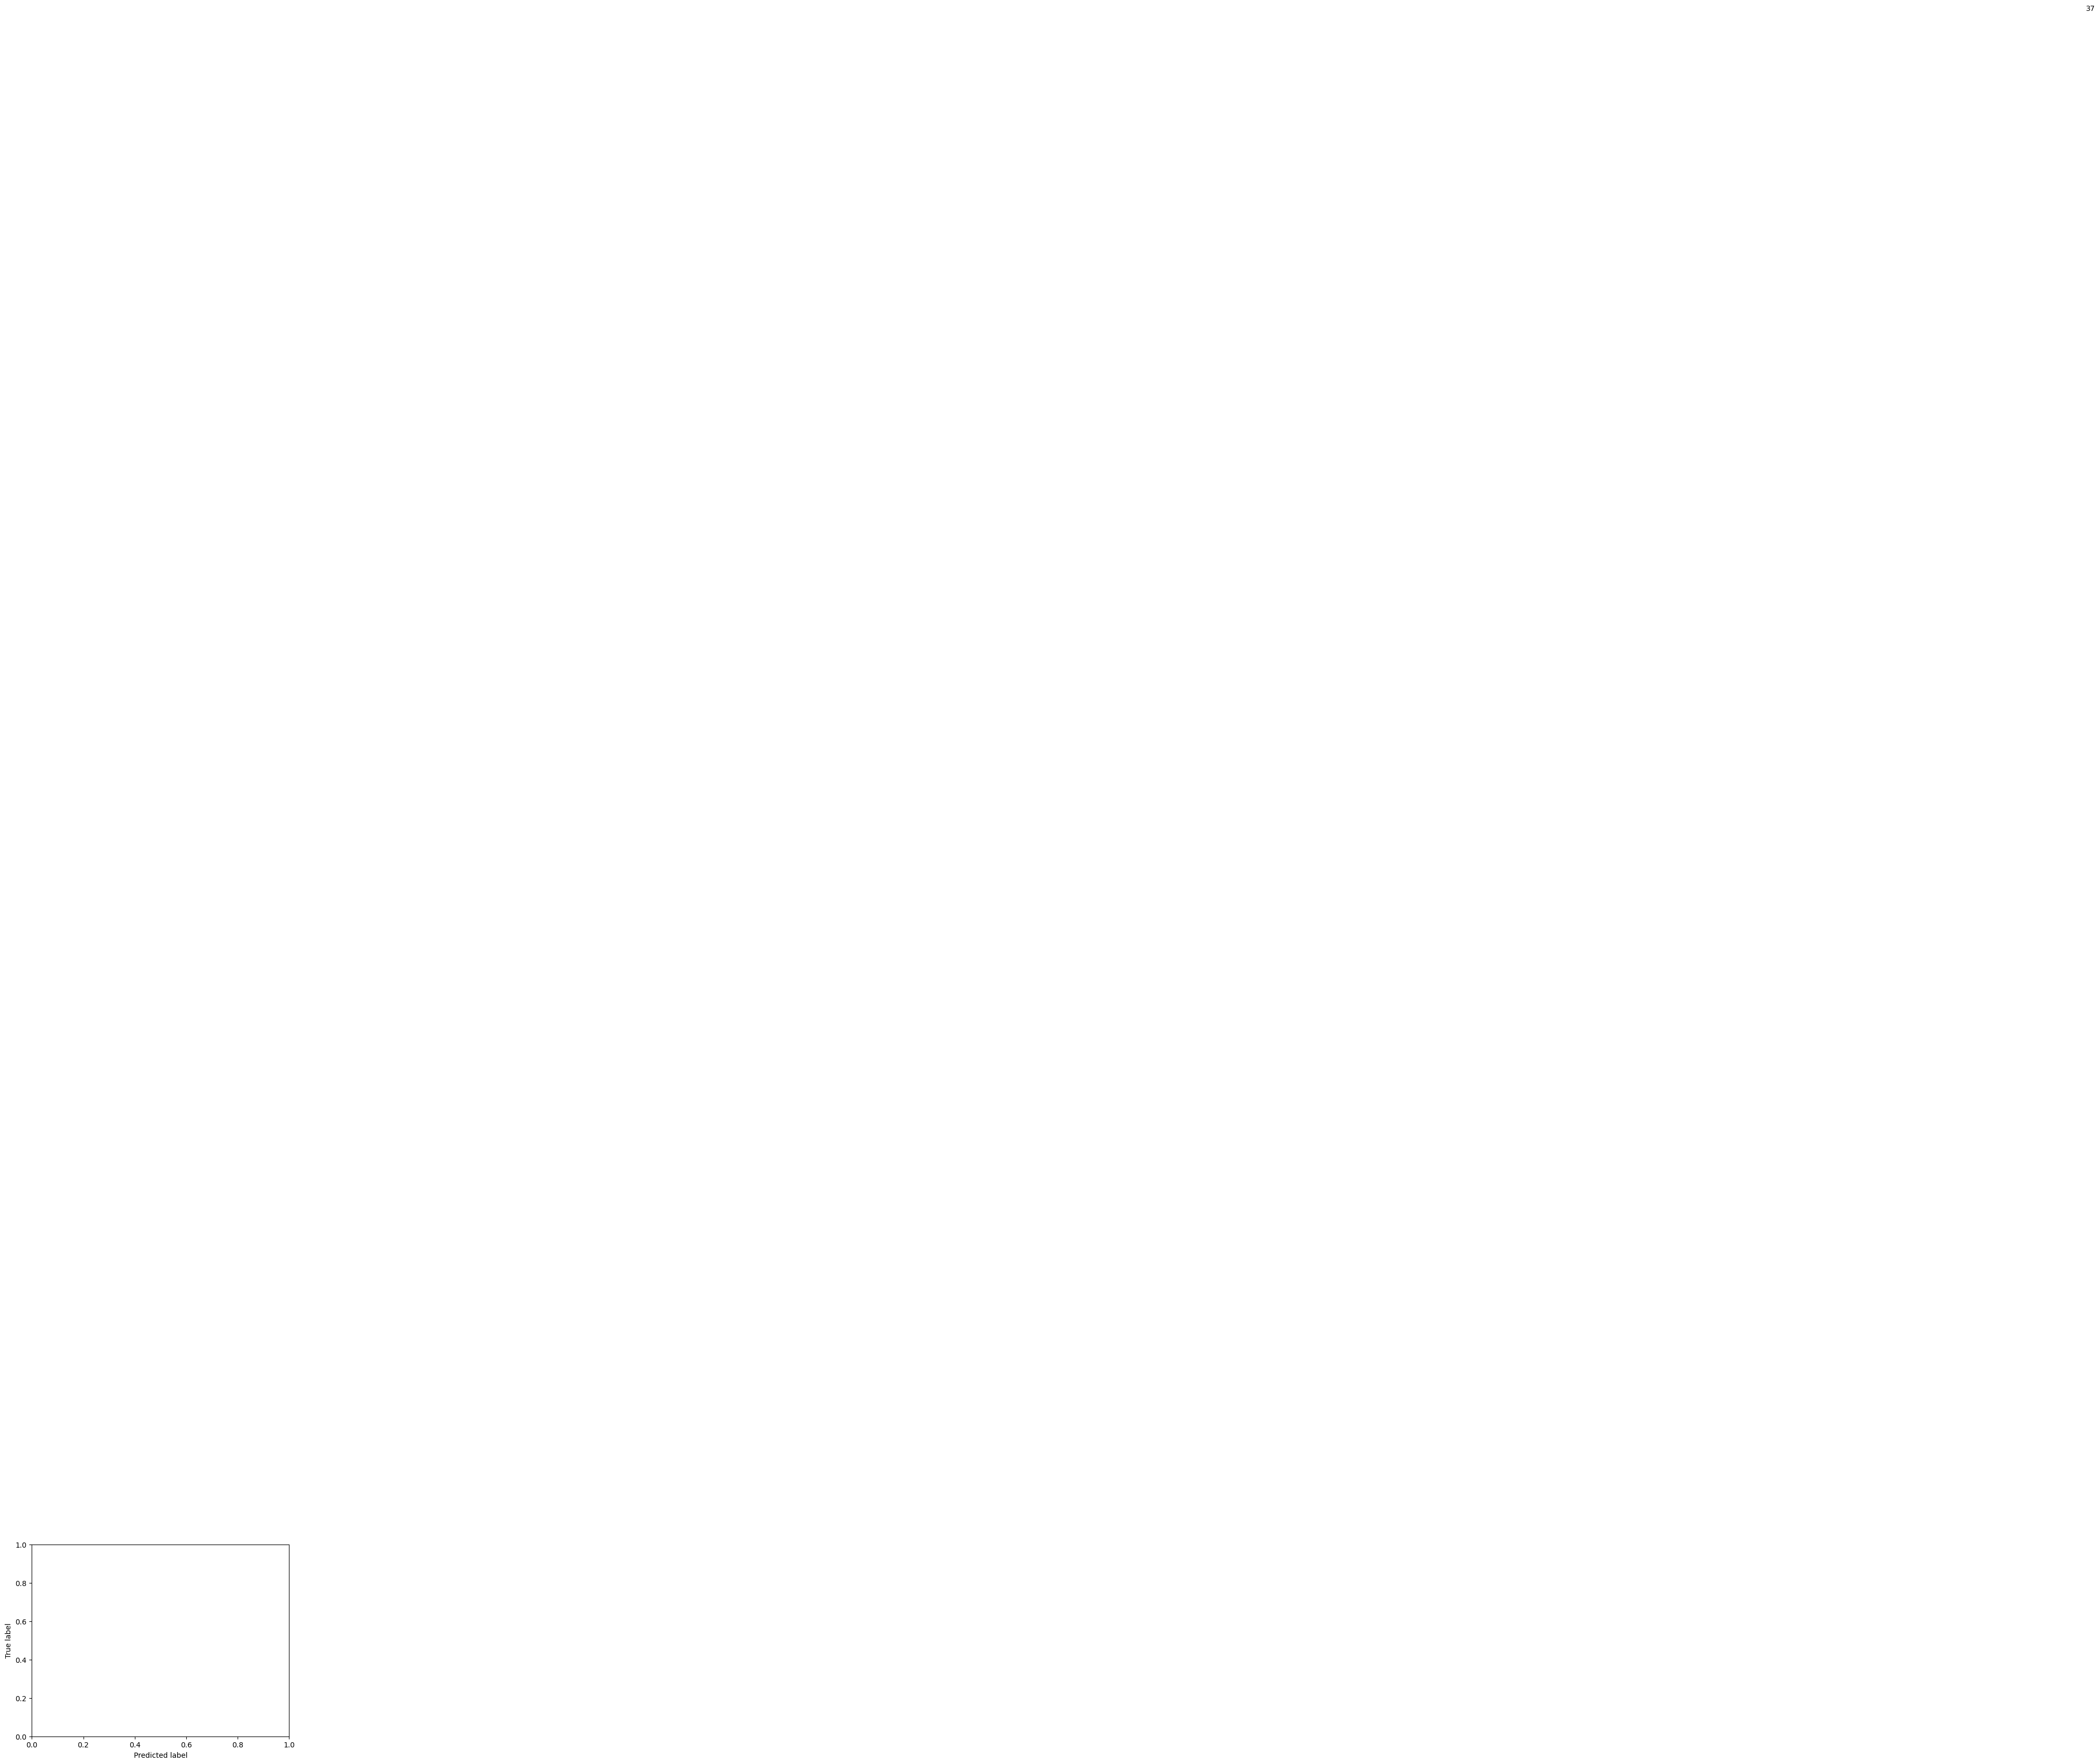

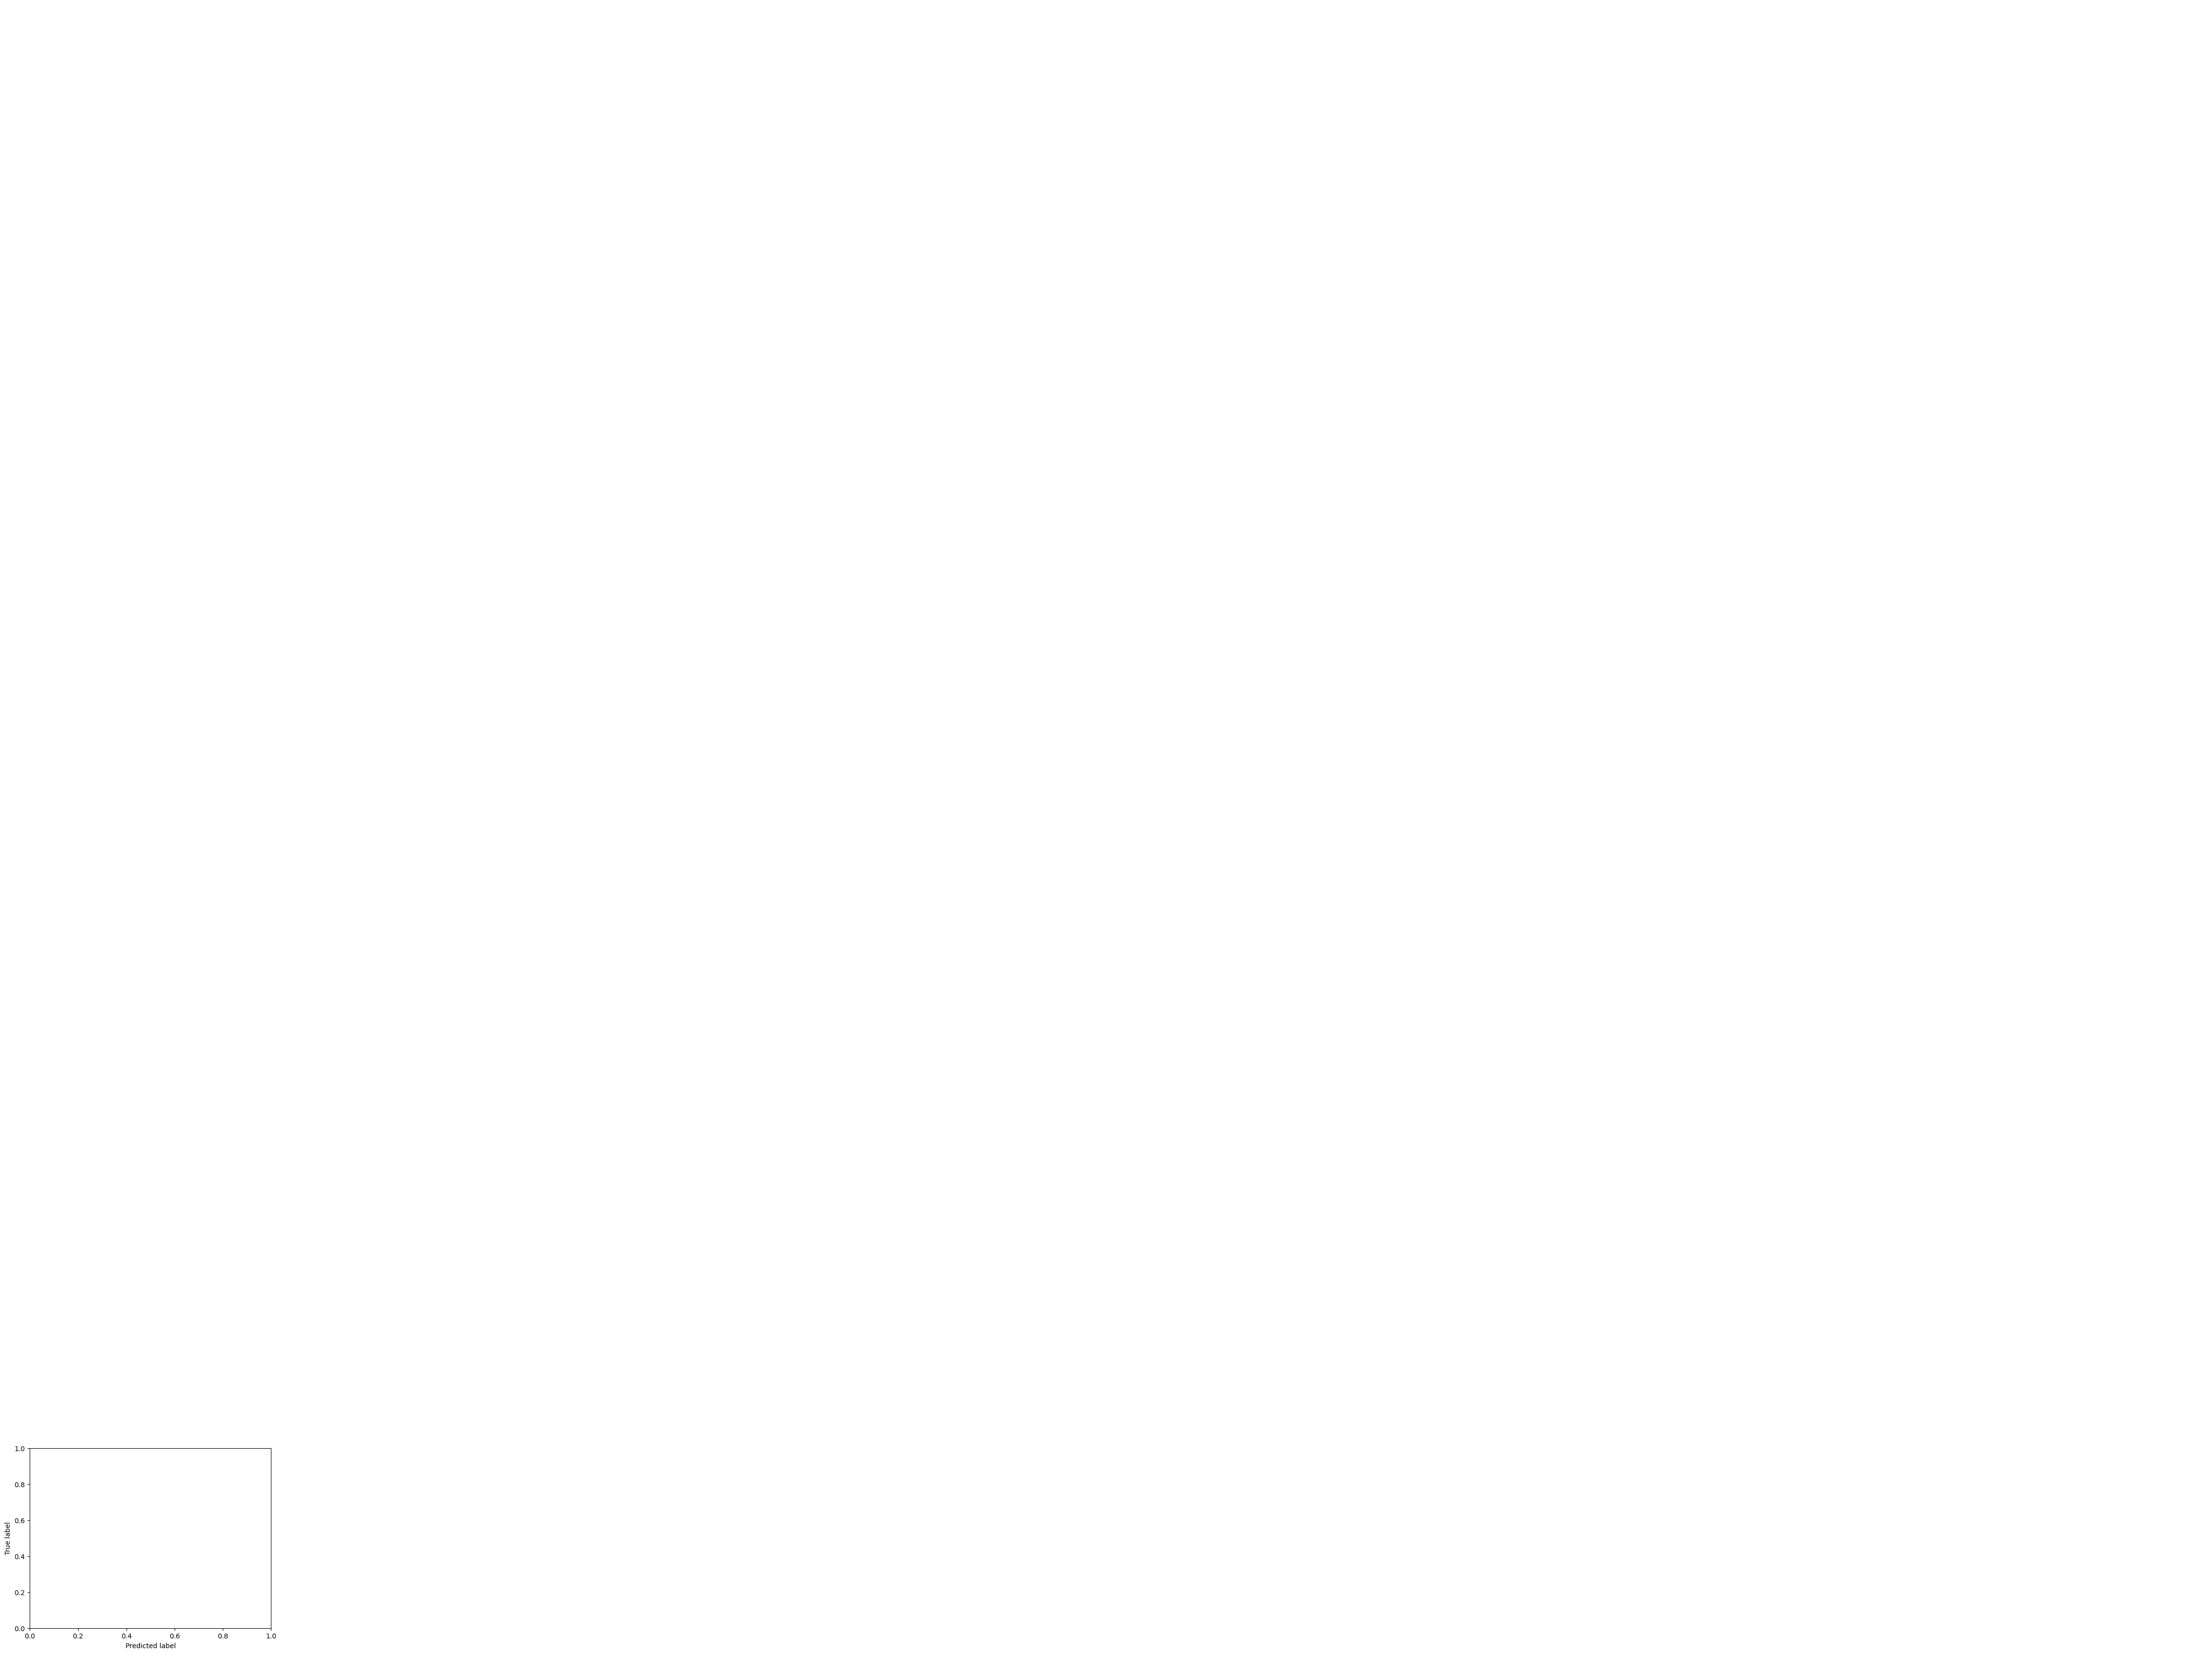

In [52]:
#get all predictions in an array and plot confusion matrix
x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])
for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)

    #Forward pass
    outputs = model(inputs)
    #get predictions
    _, predictions = torch.max(outputs, 1)
    # update p_test
    p_test = np.concatenate((p_test, predictions.cpu().numpy()))
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [53]:
#label mapping 
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

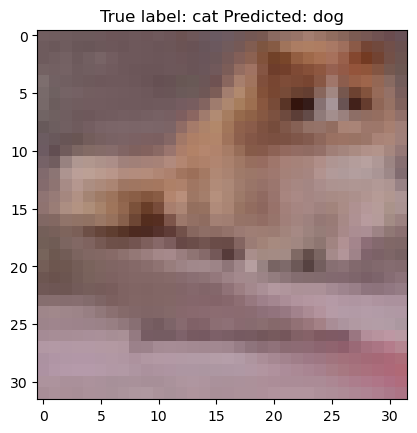

In [59]:
#show some misclassified examples
p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32,32,3))
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));

In [61]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [62]:
from torchsummary import summary
summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
              ReLU-4           [-1, 32, 32, 32]               0
       BatchNorm2d-5           [-1, 32, 32, 32]              64
         MaxPool2d-6           [-1, 32, 16, 16]               0
            Conv2d-7           [-1, 64, 16, 16]          18,496
              ReLU-8           [-1, 64, 16, 16]               0
       BatchNorm2d-9           [-1, 64, 16, 16]             128
           Conv2d-10           [-1, 64, 16, 16]          36,928
             ReLU-11           [-1, 64, 16, 16]               0
      BatchNorm2d-12           [-1, 64, 16, 16]             128
        MaxPool2d-13             [-1, 64, 8, 8]               0
           Conv2d-14            [-1, 12